# ADD Health Depression ML Model  8-Years

## Main Code

#### Imports

In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt


#### Load Data

In [2]:
# List of file numbers
file_numbers = ['0028', '0029', '0030', '0032']

# Load the dataframes with appropriate settings (biometric data)
df_0022 = pd.read_csv(f'./ICPSR_21600/DS0022/21600-0022-Data.tsv', sep='\t', usecols=['AID', 'H4SE1', 'H4ID5H','H4PR','H4PP','H4MAP'], na_values=' ')
df_0028 = pd.read_csv(f'./ICPSR_21600/DS0028/21600-0028-Data.tsv', sep='\t', na_values=' ')
df_0029 = pd.read_csv(f'./ICPSR_21600/DS0029/21600-0029-Data.tsv', sep='\t', na_values=' ')
df_0030 = pd.read_csv(f'./ICPSR_21600/DS0030/21600-0030-Data.tsv', sep='\t', na_values=' ')
df_0032 = pd.read_csv(f'./ICPSR_21600/DS0032/21600-0032-Data.tsv', sep='\t', usecols=['AID', 'H5ID6G', 'H5ID6GM', 'H5ID6GA', 'H5MN8', 'H5OD1Y'], na_values=' ')

df_0028.drop(columns=['CRP_FLAG','EBV_FLAG','C_CRP'],inplace=True)
df_0029.drop(columns=['C_HBA1C','CONVERT','FASTTIME'],inplace=True)
df_0030.drop(columns=['FAST_LIP','TG_FLG', 'TC_FLG', 'HDL_FLG'],inplace=True)

# Load the dataframe with appropriate settings (questionnaire/demographic)
df_0022h = pd.read_csv(f'./ICPSR_21600/DS0022/21600-0022-Data.tsv', sep='\t', usecols=['AID', 'H4GH1', 'H4GH8', 'H4GH9', 'H4GH10', 'H4ID17', 'H4SP5', 'H4SP6'], na_values=' ') #health and diet realted questions
df_0022w = pd.read_csv(f'./ICPSR_21600/DS0022/21600-0022-Data.tsv', sep='\t', usecols=['AID', 'H4MI1', 'H4EC1'], na_values=' ') #income, military
df_0022pa = pd.read_csv(f'./ICPSR_21600/DS0022/21600-0022-Data.tsv', sep='\t', usecols=['AID', 'H4DA1', 'H4DA2', 'H4DA3', 'H4DA4', 'H4DA5', 'H4DA6', 'H4DA7', 'H4DA8', 'H4DA11', 'H4DA13', 'H4DA17'], na_values=' ') #physical activity
df_0022cp = pd.read_csv(f'./ICPSR_21600/DS0022/21600-0022-Data.tsv', sep='\t', usecols=['AID', 'H4DA26', 'H4DA28', 'H4RE9', 'H4RE7'], na_values=' ') #community and politics and religion
df_0022atc = pd.read_csv(f'./ICPSR_21600/DS0022/21600-0022-Data.tsv', sep='\t', usecols=['AID', 'H4TO3', 'H4TO36', 'H4DA22', 'H4DA23', 'C4WD90_1'], na_values=' ') #addictive, technology use, cognitive
df_0022mh = pd.read_csv(f'./ICPSR_21600/DS0022/21600-0022-Data.tsv', sep='\t', usecols=['AID', 'H4MH18', 'H4MH19', 'H4MH20', 'H4MH21', 'H4MH22', 'H4MH23', 'H4MH24', 'H4MH25', 'H4MH26', 'H4MH27', 'H4MH28'], na_values=' ') #mental health WaveIV
df_0032mh = pd.read_csv(f'./ICPSR_21600/DS0032/21600-0032-Data.tsv', sep='\t', usecols=['AID', 'H5SS0A', 'H5SS0B', 'H5SS0C', 'H5SS0D', 'H5SS0E'], na_values=' ') #mental heakth wave V 
df_0032mh[['H5SS0A', 'H5SS0B', 'H5SS0C', 'H5SS0D', 'H5SS0E']] -= 1 #make coding match waveIV
df_0022mh[['H4MH20','H4MH24','H4MH25']] = 3 - df_0022mh[['H4MH20','H4MH24','H4MH25']] #reverse coding H4MH20
df_0032mh['H5SS0C'] = 3 - df_0032mh['H5SS0C'] #reverse coding 

# List of dataframes
dataframes = [df_0022, df_0028, df_0029, df_0030, df_0032, 
              df_0022h, df_0022w, 
              df_0022pa, df_0022cp, 
              df_0022atc, df_0022mh, df_0032mh
             ]
   
for df in dataframes:
    df.set_index('AID', inplace=True)

merged_df = pd.concat(dataframes, axis=1, join='inner')

print("Columns in merge_df after merging:\n", merged_df.columns)
print(merged_df.shape) 


Columns in merge_df after merging:
 Index(['H4ID5H', 'H4SE1', 'H4PR', 'H4PP', 'H4MAP', 'CRP', 'EBV', 'C_SUBCLN',
       'C_INFECT', 'CRP_MED1', 'CRP_MED2', 'CRP_MED3', 'CRP_MED4', 'CRP_MED5',
       'CRP_MED6', 'CRP_MED7', 'CRP_MED8', 'GLUCOSE', 'HBA1C', 'C_FGLU',
       'C_NFGLU', 'C_MED', 'C_JOINT', 'TG', 'TC', 'HDL', 'LDL', 'NON_HDL',
       'TC_HDL', 'C_MED2', 'C_JOINT2', 'FASTTIME', 'H5OD1Y', 'H5ID6G',
       'H5ID6GA', 'H5ID6GM', 'H5MN8', 'H4GH1', 'H4GH8', 'H4GH9', 'H4GH10',
       'H4ID17', 'H4SP5', 'H4SP6', 'H4MI1', 'H4EC1', 'H4DA1', 'H4DA2', 'H4DA3',
       'H4DA4', 'H4DA5', 'H4DA6', 'H4DA7', 'H4DA8', 'H4DA11', 'H4DA13',
       'H4DA17', 'H4RE7', 'H4RE9', 'H4DA26', 'H4DA28', 'C4WD90_1', 'H4TO3',
       'H4TO36', 'H4DA22', 'H4DA23', 'H4MH18', 'H4MH19', 'H4MH20', 'H4MH21',
       'H4MH22', 'H4MH23', 'H4MH24', 'H4MH25', 'H4MH26', 'H4MH27', 'H4MH28',
       'H5SS0A', 'H5SS0B', 'H5SS0C', 'H5SS0D', 'H5SS0E'],
      dtype='object')
(3713, 82)


#### Clean Data and fill in missing data 

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# convert numbers to na to indicate that the numbers mean the data missing.   
values_to_na = {
    'CRP': [999],                   
    'TG': [99],                        
    'GLUCOSE': [999],                 
    'HBA1C': [99],                                        
    'C_FGLU': [9,5],                     
    'C_NFGLU': [9,4],
    'EBV': [9999],
    'TC' : [99],
    'HDL' : [99],
    'LDL' : [99],
    'NON_HDL' : [99],
    'TC_HDL' : [99],
    'FASTTIME': [],
    #income/military
    'H4MI1' : [], # military status 
    'H4EC1' : [96,98], # household income
    #health
    'H4PR' : [996,997,999], # Heartrate
    'H4PP' : [996,997,999], # Blood Presure
    'H4MAP' : [996,997,999], # Blood Presure
    'H4GH1' : [],  # General health
    'H4GH8' : [996,998],  # Fast food consumption
    'H4GH9' : [998],  # Regular sweetened drinks
    'H4GH10' : [996,998],  # Diet or low-calorie drinks
    'H4ID17' : [],  # Hearing ability
    'H4SP5' : [5,8],  # Trouble falling asleep
    'H4SP6' : [5,8],  # Trouble staying asleep
    #physical activity
    'H4DA1' : [996, 998],  # Television or video hours
    'H4DA2' : [96, 98],  # bicycle, skateboard, dance, hike, hunt, yard work
    'H4DA3' : [96, 98],  # roller blade, rollerskate, downhill ski, snow board, play racquet sports, or do aerobics
    'H4DA4' : [96, 98],  # Team sports
    'H4DA5' : [96, 98],  # Individual sports
    'H4DA6' : [96, 98],  # Gymnastics/strength training
    'H4DA7' : [96, 98],  # golf, fishing, bowling, softball, baseball
    'H4DA8' : [96, 98], # walk
    'H4DA11' : [6, 8],  # Vigorous physical activity
    'H4DA13' : [96, 97],  # Use of fitness/recreation center
    'H4DA17' : [995, 996, 997, 998],  # Outdoor hours in summer
    #religion, politics, community
    'H4DA26' : [96, 97, 98],  # Hours volunteer or community service
    'H4DA28' : [96],  # Political orientation (one hot encoding needed, 98 is dont know, should be encoded as its own response, not NA)
    'H4RE9' : [6, 8],  # Importance of religious faith
    'H4RE7' : [8],  # Attendance at religious services
    #addictive, technology use, cognitive
    'H4TO3' : [6, 8],  # cigarette smoking (encode 7 as 0)
    'H4TO36' : [96, 98],  # Usual drink quantity (encode 97 as 0)
    'H4DA22' : [996, 998],  # Internet usage hours (encode 997 as 0)
    'H4DA23' : [996, 998],  # Video/computer games hours (encode 997 as 0)
    'C4WD90_1' : [96, 99],  # Word recall performance
    #mental health WaveIV (cutt-off of 10 or greater for CESD-10)
    'H4MH18' : [6, 8],  # Bothered by things that usually don't bother you  
    'H4MH19' : [6],  # Couldn't shake off the blues (**) 
    'H4MH20' : [6, 8],  # Felt just as good as others  (reverse code)
    'H4MH21' : [6],  # Trouble keeping your mind on tasks  
    'H4MH22' : [6],  # Felt depressed  (**)
    'H4MH23' : [6],  # Too tired to do things  
    'H4MH24' : [6],  # Felt happy  (reverse code)(**)
    'H4MH25' : [6],  # Enjoyed life (reverse code) 
    'H4MH26' : [6],  # Felt sad (**) 
    'H4MH27' : [6, 8],  # Felt disliked  
    'H4MH28' : [6],  # Felt treated with less respect or courtesy
    #metental health WaveV (cut-off 5 or greater for CESD-5)
    'H5SS0A' : [],  # Couldn't shake off the blues (**)
    'H5SS0B' : [],  # Felt depressed (**)
    'H5SS0C' : [],  # Felt happy (reverse coding)(**)
    'H5SS0D' : [],  # Felt sad (**)
    'H5SS0E' : [],  # Felt life was not worth living   
}

merged_df = merged_df.replace(values_to_na, np.nan)

# Find the minimum value for EBV and CRP
min_EBV = merged_df['EBV'].min()
min_CRP = merged_df['CRP'].min()

#set below threshhold replacment values value
below_threshold_EBV_replacment = min_EBV * 0.5  
below_threshold_CRP_replacment = min_CRP * 0.5
#replace values with replacments
values_to_replacment = {
    'CRP': {998: below_threshold_CRP_replacment},
    'EBV': {9998: below_threshold_EBV_replacment},
    'H4PR' : {888: 210},
    'H4TO3': {7: 0},
    'H4TO36': {97: 0},
    'H4DA22': {997: 0},
    'H4DA23': {997: 0}
}

merged_df = merged_df.replace(values_to_replacment)

columns_drop_if_na = [
    'H4MH18', 'H4MH19', 'H4MH20', 'H4MH21', 'H4MH22', 'H4MH23','H4MH24', 'H4MH25', 'H4MH26', 'H4MH27', 'H4MH28', 
    'H5SS0A', 'H5SS0B', 'H5SS0C', 'H5SS0D', 'H5SS0E'
]

merged_df = merged_df.loc[merged_df[columns_drop_if_na].notna().all(axis=1)]


merged_df.drop(columns=['H4ID5H','H4SE1'], inplace=True)

#Remove rows with more than [limit] Null values
null_entry_limit = 10
print("Number of rows with more then",null_entry_limit,"null entries:", (merged_df.isnull().sum(axis=1) > 3).sum())
merged_df = merged_df.loc[merged_df.isnull().sum(axis=1) <= 3]  

#one hot encode H4DA28
encoder = OneHotEncoder(dtype='float64', sparse_output=False)
encoded_H4DA28 = encoder.fit_transform(merged_df[['H4DA28']])

# Convert back to DataFrame
encoded_H4DA28_df = pd.DataFrame(
    encoded_H4DA28, 
    columns=encoder.get_feature_names_out(['H4DA28']),
    index=merged_df.index 
)

merged_df = pd.concat([merged_df, encoded_H4DA28_df], axis=1)

merged_df.drop(columns=['H4DA28'], inplace=True)


Number of rows with more then 10 null entries: 459


#### Engineer Response Variable

In [4]:
# Create the new column DIABET based on the conditions
merged_df['DIABET'] = np.where(
    (merged_df['C_FGLU'] == 1) | (merged_df['C_NFGLU'] == 1), 
    0,  # Set DIABET to 1 (Not Diabetes)
    np.where(
        (merged_df['C_FGLU'] == 2),
        1,  # Set DIABET to 2 (Pre-Diabetes)
        np.where(
            (merged_df['C_FGLU'] == 3) | (merged_df['C_NFGLU'] == 2),
            2,  # Set DIABET to 3 (Diabetes)
            np.nan  # If none of the conditions are met, set DIABET to NaN
        )
    )
)

#Drop orginal glucose classificaiton columns
merged_df.drop(columns=['C_FGLU','C_NFGLU'], inplace=True)

#create new column with mean score
merged_df['mh_avg_iv'] = merged_df[['H4MH19', 'H4MH22', 'H4MH24', 'H4MH26']].mean(axis=1)
merged_df['mh_avg_v'] = merged_df[['H5SS0A', 'H5SS0B', 'H5SS0C', 'H5SS0D']].mean(axis=1)
#create response variable that is the difference of waveiv and wavev scores
merged_df['y'] = merged_df['mh_avg_v'] - merged_df['mh_avg_iv']
merged_df.drop(columns=['mh_avg_iv','mh_avg_v'], inplace=True)
#drop unneeded columns
merged_df.drop(columns=['H5MN8','H5ID6G','H5ID6GM','H5ID6GA','H5OD1Y'], inplace=True)
merged_df.drop(columns=['H5SS0A','H5SS0B','H5SS0C','H5SS0D','H4MH19','H4MH22','H4MH24','H4MH26'], inplace=True)



#### Prepare Data for Model

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import make_pipeline

#train test split
# Separate features and target variable
X = merged_df.drop(columns=['y']) 
y = merged_df['y']
print(X.shape)
# First split: 80% train_val, 20% test (stratified)
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, #stratify = y
)
# Secount split: 70% train, 15% val, 15% test (stratified) - calculated %17.65 of %85 is aprox. %15)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, #stratify = y_train_val
)


#correct skews
pt = PowerTransformer(method='yeo-johnson') #initilize transformer
cols_to_transform = ['EBV', 'GLUCOSE', 'HBA1C']
for col in cols_to_transform: #log transform
    X_train[col] = np.log1p(X_train[col]) 
columns_to_transform = [
    'H4GH8', 'H4GH9', 'H4GH10', 'H4ID17', 'H4SP5', 
    'H4DA1', 'H4DA2', 'H4DA3', 'H4DA4', 'H4DA5', 
    'H4DA6', 'H4DA7', 'H4DA17', 'H4DA26', 'H4TO36', 
    'H4DA23', 'DIABET','FASTTIME','CRP'
    ]
#yeo-johnson power transformer
X_train[columns_to_transform] = pt.fit_transform(X_train[columns_to_transform])
X_val[columns_to_transform] = pt.transform(X_val[columns_to_transform])
X_test[columns_to_transform] = pt.transform(X_test[columns_to_transform])

# preprocessing
preprocessing = make_pipeline(IterativeImputer(initial_strategy="median", max_iter=50),
                             PolynomialFeatures(degree=2, include_bias=False), #create polynomial featuers
                             StandardScaler()) #standar scalar
# Secount split: 70% train, 15% val, 15% test (stratified) - calculated %17.65 of %85 is aprox. %15)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1765, #stratify = y_train_val
)

X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)
X_val = preprocessing.transform(X_val) 

(3193, 72)


#### PCA

In [6]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42, n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
X_val_reduced = pca.transform(X_val)

cumsum = np.cumsum(pca.explained_variance_ratio_)

print(pca.n_components_)

print(X_train_reduced.shape)

508
(2234, 508)


#### Manual Search with Early Stopping

In [7]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ParameterSampler
import numpy as np
from copy import deepcopy

# Define the hyperparameter grid
param_grid = {
    'alpha': np.logspace(-3, 3, 15),
    'l1_ratio': np.linspace(0, 1, 10),
    'eta0': [0.001, 0.01, 0.1],
}

param_sampler = ParameterSampler(param_grid, n_iter=100, random_state=42)

# Initialize variables for early stopping and best model tracking
global_best_rmse = float('inf')
global_best_model = None
model_results = []  # store all models and their RMSE scores
n_epochs = 5000  # Maximum number of epochs
param_index = 1
# Training loop over sampled hyperparameters
for params in param_sampler:
    print(f"Param number {param_index} Testing parameters: {params}")

    # Initialize the model with the current parameters
    sgd = SGDRegressor(
        penalty='elasticnet',
        warm_start=True, 
        max_iter=1, 
        random_state=42,
        **params
    )

    best_val_rmse = float('inf')  # Best RMSE for current parameter set
    no_improvement_count = 0  # Track consecutive epochs without improvement

    # Train the model for multiple epochs with early stopping
    for epoch in range(n_epochs):
        sgd.partial_fit(X_train_reduced, y_train)

        # Predict on validation set and calculate RMSE
        y_val_predict = sgd.predict(X_val_reduced)
        val_error = np.sqrt(mean_squared_error(y_val, y_val_predict))

        # Check for improvement
        if val_error < best_val_rmse:
            best_val_rmse = val_error
            best_model = deepcopy(sgd)  # Save the best model for these params
            print(f"New best RMSE: {val_error:.6f} at {epoch}" )
            no_improvement_count = 0  # Reset counter
        else:
            no_improvement_count += 1

        # Early stopping if no improvement for 5 epochs
        if no_improvement_count >= 5:
            print(f"Early stopping... after {epoch} epochs")
            break
    param_index += 1
    # Store the results for this parameter set
    model_results.append({
        'params': params,
        'rmse': best_val_rmse
    })

    # Update the global best model if this one is the best so far
    if best_val_rmse < global_best_rmse:
        global_best_rmse = best_val_rmse
        global_best_model = best_model

# Print the best RMSE across all parameter sets
print(f"Global Best Validation RMSE: {global_best_rmse:.6f}")
print(f"Global Best Parameters: {global_best_model.get_params()}")

results_df = pd.DataFrame(model_results)
results_df.to_csv('parametersearch2.csv', index=False)
print("csv saved")

Param number 1 Testing parameters: {'l1_ratio': 0.7777777777777777, 'eta0': 0.01, 'alpha': 372.7593720314938}
New best RMSE: 0.652767 at 0
New best RMSE: 0.652763 at 2
New best RMSE: 0.652755 at 3
New best RMSE: 0.652750 at 4
New best RMSE: 0.652746 at 5
New best RMSE: 0.652742 at 6
New best RMSE: 0.652740 at 7
New best RMSE: 0.652737 at 8
New best RMSE: 0.652736 at 9
New best RMSE: 0.652734 at 10
New best RMSE: 0.652733 at 11
New best RMSE: 0.652731 at 12
New best RMSE: 0.652730 at 13
New best RMSE: 0.652729 at 14
New best RMSE: 0.652728 at 15
New best RMSE: 0.652727 at 16
New best RMSE: 0.652727 at 17
New best RMSE: 0.652726 at 18
New best RMSE: 0.652725 at 19
New best RMSE: 0.652725 at 20
New best RMSE: 0.652724 at 21
New best RMSE: 0.652724 at 22
New best RMSE: 0.652723 at 23
New best RMSE: 0.652723 at 24
New best RMSE: 0.652722 at 25
New best RMSE: 0.652722 at 26
New best RMSE: 0.652721 at 27
New best RMSE: 0.652721 at 28
New best RMSE: 0.652721 at 29
New best RMSE: 0.652720 at 30

New best RMSE: 0.652707 at 273
New best RMSE: 0.652707 at 274
New best RMSE: 0.652707 at 275
New best RMSE: 0.652706 at 276
New best RMSE: 0.652706 at 277
New best RMSE: 0.652706 at 278
New best RMSE: 0.652706 at 279
New best RMSE: 0.652706 at 280
New best RMSE: 0.652706 at 281
New best RMSE: 0.652706 at 282
New best RMSE: 0.652706 at 283
New best RMSE: 0.652706 at 284
New best RMSE: 0.652706 at 285
New best RMSE: 0.652706 at 286
New best RMSE: 0.652706 at 287
New best RMSE: 0.652706 at 288
New best RMSE: 0.652706 at 289
New best RMSE: 0.652706 at 290
New best RMSE: 0.652706 at 291
New best RMSE: 0.652706 at 292
New best RMSE: 0.652706 at 293
New best RMSE: 0.652706 at 294
New best RMSE: 0.652706 at 295
New best RMSE: 0.652706 at 296
New best RMSE: 0.652706 at 297
New best RMSE: 0.652706 at 298
New best RMSE: 0.652706 at 299
New best RMSE: 0.652706 at 300
New best RMSE: 0.652706 at 301
New best RMSE: 0.652706 at 302
New best RMSE: 0.652706 at 303
New best RMSE: 0.652706 at 304
New best

New best RMSE: 0.652704 at 542
New best RMSE: 0.652704 at 543
New best RMSE: 0.652704 at 544
New best RMSE: 0.652704 at 545
New best RMSE: 0.652704 at 546
New best RMSE: 0.652704 at 547
New best RMSE: 0.652704 at 548
New best RMSE: 0.652704 at 549
New best RMSE: 0.652704 at 550
New best RMSE: 0.652704 at 551
New best RMSE: 0.652704 at 552
New best RMSE: 0.652704 at 553
New best RMSE: 0.652704 at 554
New best RMSE: 0.652704 at 555
New best RMSE: 0.652704 at 556
New best RMSE: 0.652704 at 557
New best RMSE: 0.652704 at 558
New best RMSE: 0.652704 at 559
New best RMSE: 0.652704 at 560
New best RMSE: 0.652704 at 561
New best RMSE: 0.652704 at 562
New best RMSE: 0.652704 at 563
New best RMSE: 0.652704 at 564
New best RMSE: 0.652704 at 565
New best RMSE: 0.652704 at 566
New best RMSE: 0.652704 at 567
New best RMSE: 0.652704 at 568
New best RMSE: 0.652704 at 569
New best RMSE: 0.652704 at 570
New best RMSE: 0.652704 at 571
New best RMSE: 0.652704 at 572
New best RMSE: 0.652704 at 573
New best

New best RMSE: 0.652703 at 812
New best RMSE: 0.652703 at 813
New best RMSE: 0.652703 at 814
New best RMSE: 0.652703 at 815
New best RMSE: 0.652703 at 816
New best RMSE: 0.652703 at 817
New best RMSE: 0.652703 at 818
New best RMSE: 0.652703 at 819
New best RMSE: 0.652703 at 820
New best RMSE: 0.652703 at 821
New best RMSE: 0.652703 at 822
New best RMSE: 0.652703 at 823
New best RMSE: 0.652703 at 824
New best RMSE: 0.652703 at 825
New best RMSE: 0.652703 at 826
New best RMSE: 0.652703 at 827
New best RMSE: 0.652703 at 828
New best RMSE: 0.652703 at 829
New best RMSE: 0.652703 at 830
New best RMSE: 0.652703 at 831
New best RMSE: 0.652703 at 832
New best RMSE: 0.652703 at 833
New best RMSE: 0.652703 at 834
New best RMSE: 0.652703 at 835
New best RMSE: 0.652703 at 836
New best RMSE: 0.652703 at 837
New best RMSE: 0.652703 at 838
New best RMSE: 0.652703 at 839
New best RMSE: 0.652703 at 840
New best RMSE: 0.652703 at 841
New best RMSE: 0.652703 at 842
New best RMSE: 0.652703 at 843
New best

New best RMSE: 0.652703 at 1078
New best RMSE: 0.652703 at 1079
New best RMSE: 0.652703 at 1080
New best RMSE: 0.652703 at 1081
New best RMSE: 0.652703 at 1082
New best RMSE: 0.652703 at 1083
New best RMSE: 0.652703 at 1084
New best RMSE: 0.652703 at 1085
New best RMSE: 0.652703 at 1086
New best RMSE: 0.652703 at 1087
New best RMSE: 0.652703 at 1088
New best RMSE: 0.652703 at 1089
New best RMSE: 0.652703 at 1090
New best RMSE: 0.652703 at 1091
New best RMSE: 0.652703 at 1092
New best RMSE: 0.652703 at 1093
New best RMSE: 0.652703 at 1094
New best RMSE: 0.652703 at 1095
New best RMSE: 0.652703 at 1096
New best RMSE: 0.652703 at 1097
New best RMSE: 0.652703 at 1098
New best RMSE: 0.652703 at 1099
New best RMSE: 0.652703 at 1100
New best RMSE: 0.652703 at 1101
New best RMSE: 0.652703 at 1102
New best RMSE: 0.652703 at 1103
New best RMSE: 0.652703 at 1104
New best RMSE: 0.652703 at 1105
New best RMSE: 0.652703 at 1106
New best RMSE: 0.652703 at 1107
New best RMSE: 0.652703 at 1108
New best

New best RMSE: 0.652702 at 1338
New best RMSE: 0.652702 at 1339
New best RMSE: 0.652702 at 1340
New best RMSE: 0.652702 at 1341
New best RMSE: 0.652702 at 1342
New best RMSE: 0.652702 at 1343
New best RMSE: 0.652702 at 1344
New best RMSE: 0.652702 at 1345
New best RMSE: 0.652702 at 1346
New best RMSE: 0.652702 at 1347
New best RMSE: 0.652702 at 1348
New best RMSE: 0.652702 at 1349
New best RMSE: 0.652702 at 1350
New best RMSE: 0.652702 at 1351
New best RMSE: 0.652702 at 1352
New best RMSE: 0.652702 at 1353
New best RMSE: 0.652702 at 1354
New best RMSE: 0.652702 at 1355
New best RMSE: 0.652702 at 1356
New best RMSE: 0.652702 at 1357
New best RMSE: 0.652702 at 1358
New best RMSE: 0.652702 at 1359
New best RMSE: 0.652702 at 1360
New best RMSE: 0.652702 at 1361
New best RMSE: 0.652702 at 1362
New best RMSE: 0.652702 at 1363
New best RMSE: 0.652702 at 1364
New best RMSE: 0.652702 at 1365
New best RMSE: 0.652702 at 1366
New best RMSE: 0.652702 at 1367
New best RMSE: 0.652702 at 1368
New best

New best RMSE: 0.652702 at 1601
New best RMSE: 0.652702 at 1602
New best RMSE: 0.652702 at 1603
New best RMSE: 0.652702 at 1604
New best RMSE: 0.652702 at 1605
New best RMSE: 0.652702 at 1606
New best RMSE: 0.652702 at 1607
New best RMSE: 0.652702 at 1608
New best RMSE: 0.652702 at 1609
New best RMSE: 0.652702 at 1610
New best RMSE: 0.652702 at 1611
New best RMSE: 0.652702 at 1612
New best RMSE: 0.652702 at 1613
New best RMSE: 0.652702 at 1614
New best RMSE: 0.652702 at 1615
New best RMSE: 0.652702 at 1616
New best RMSE: 0.652702 at 1617
New best RMSE: 0.652702 at 1618
New best RMSE: 0.652702 at 1619
New best RMSE: 0.652702 at 1620
New best RMSE: 0.652702 at 1621
New best RMSE: 0.652702 at 1622
New best RMSE: 0.652702 at 1623
New best RMSE: 0.652702 at 1624
New best RMSE: 0.652702 at 1625
New best RMSE: 0.652702 at 1626
New best RMSE: 0.652702 at 1627
New best RMSE: 0.652702 at 1628
New best RMSE: 0.652702 at 1629
New best RMSE: 0.652702 at 1630
New best RMSE: 0.652702 at 1631
New best

New best RMSE: 0.652702 at 1860
New best RMSE: 0.652702 at 1861
New best RMSE: 0.652702 at 1862
New best RMSE: 0.652702 at 1863
New best RMSE: 0.652702 at 1864
New best RMSE: 0.652702 at 1865
New best RMSE: 0.652702 at 1866
New best RMSE: 0.652702 at 1867
New best RMSE: 0.652702 at 1868
New best RMSE: 0.652702 at 1869
New best RMSE: 0.652702 at 1870
New best RMSE: 0.652702 at 1871
New best RMSE: 0.652702 at 1872
New best RMSE: 0.652702 at 1873
New best RMSE: 0.652702 at 1874
New best RMSE: 0.652702 at 1875
New best RMSE: 0.652702 at 1876
New best RMSE: 0.652702 at 1877
New best RMSE: 0.652702 at 1878
New best RMSE: 0.652702 at 1879
New best RMSE: 0.652702 at 1880
New best RMSE: 0.652702 at 1881
New best RMSE: 0.652702 at 1882
New best RMSE: 0.652702 at 1883
New best RMSE: 0.652702 at 1884
New best RMSE: 0.652702 at 1885
New best RMSE: 0.652702 at 1886
New best RMSE: 0.652702 at 1887
New best RMSE: 0.652702 at 1888
New best RMSE: 0.652702 at 1889
New best RMSE: 0.652702 at 1890
New best

New best RMSE: 0.652702 at 2119
New best RMSE: 0.652702 at 2120
New best RMSE: 0.652702 at 2121
New best RMSE: 0.652702 at 2122
New best RMSE: 0.652702 at 2123
New best RMSE: 0.652702 at 2124
New best RMSE: 0.652702 at 2125
New best RMSE: 0.652702 at 2126
New best RMSE: 0.652702 at 2127
New best RMSE: 0.652702 at 2128
New best RMSE: 0.652702 at 2129
New best RMSE: 0.652702 at 2130
New best RMSE: 0.652702 at 2131
New best RMSE: 0.652702 at 2132
New best RMSE: 0.652702 at 2133
New best RMSE: 0.652702 at 2134
New best RMSE: 0.652702 at 2135
New best RMSE: 0.652702 at 2136
New best RMSE: 0.652702 at 2137
New best RMSE: 0.652702 at 2138
New best RMSE: 0.652702 at 2139
New best RMSE: 0.652702 at 2140
New best RMSE: 0.652702 at 2141
New best RMSE: 0.652702 at 2142
New best RMSE: 0.652702 at 2143
New best RMSE: 0.652702 at 2144
New best RMSE: 0.652702 at 2145
New best RMSE: 0.652702 at 2146
New best RMSE: 0.652702 at 2147
New best RMSE: 0.652702 at 2148
New best RMSE: 0.652702 at 2149
New best

New best RMSE: 0.652702 at 2383
New best RMSE: 0.652702 at 2384
New best RMSE: 0.652702 at 2385
New best RMSE: 0.652702 at 2386
New best RMSE: 0.652702 at 2387
New best RMSE: 0.652702 at 2388
New best RMSE: 0.652702 at 2389
New best RMSE: 0.652702 at 2390
New best RMSE: 0.652702 at 2391
New best RMSE: 0.652702 at 2392
New best RMSE: 0.652702 at 2393
New best RMSE: 0.652702 at 2394
New best RMSE: 0.652702 at 2395
New best RMSE: 0.652702 at 2396
New best RMSE: 0.652702 at 2397
New best RMSE: 0.652702 at 2398
New best RMSE: 0.652702 at 2399
New best RMSE: 0.652702 at 2400
New best RMSE: 0.652702 at 2401
New best RMSE: 0.652702 at 2402
New best RMSE: 0.652702 at 2403
New best RMSE: 0.652702 at 2404
New best RMSE: 0.652702 at 2405
New best RMSE: 0.652702 at 2406
New best RMSE: 0.652702 at 2407
New best RMSE: 0.652702 at 2408
New best RMSE: 0.652701 at 2409
New best RMSE: 0.652701 at 2410
New best RMSE: 0.652701 at 2411
New best RMSE: 0.652701 at 2412
New best RMSE: 0.652701 at 2413
New best

New best RMSE: 0.652701 at 2646
New best RMSE: 0.652701 at 2647
New best RMSE: 0.652701 at 2648
New best RMSE: 0.652701 at 2649
New best RMSE: 0.652701 at 2650
New best RMSE: 0.652701 at 2651
New best RMSE: 0.652701 at 2652
New best RMSE: 0.652701 at 2653
New best RMSE: 0.652701 at 2654
New best RMSE: 0.652701 at 2655
New best RMSE: 0.652701 at 2656
New best RMSE: 0.652701 at 2657
New best RMSE: 0.652701 at 2658
New best RMSE: 0.652701 at 2659
New best RMSE: 0.652701 at 2660
New best RMSE: 0.652701 at 2661
New best RMSE: 0.652701 at 2662
New best RMSE: 0.652701 at 2663
New best RMSE: 0.652701 at 2664
New best RMSE: 0.652701 at 2665
New best RMSE: 0.652701 at 2666
New best RMSE: 0.652701 at 2667
New best RMSE: 0.652701 at 2668
New best RMSE: 0.652701 at 2669
New best RMSE: 0.652701 at 2670
New best RMSE: 0.652701 at 2671
New best RMSE: 0.652701 at 2672
New best RMSE: 0.652701 at 2673
New best RMSE: 0.652701 at 2674
New best RMSE: 0.652701 at 2675
New best RMSE: 0.652701 at 2676
New best

New best RMSE: 0.652701 at 2909
New best RMSE: 0.652701 at 2910
New best RMSE: 0.652701 at 2911
New best RMSE: 0.652701 at 2912
New best RMSE: 0.652701 at 2913
New best RMSE: 0.652701 at 2914
New best RMSE: 0.652701 at 2915
New best RMSE: 0.652701 at 2916
New best RMSE: 0.652701 at 2917
New best RMSE: 0.652701 at 2918
New best RMSE: 0.652701 at 2919
New best RMSE: 0.652701 at 2920
New best RMSE: 0.652701 at 2921
New best RMSE: 0.652701 at 2922
New best RMSE: 0.652701 at 2923
New best RMSE: 0.652701 at 2924
New best RMSE: 0.652701 at 2925
New best RMSE: 0.652701 at 2926
New best RMSE: 0.652701 at 2927
New best RMSE: 0.652701 at 2928
New best RMSE: 0.652701 at 2929
New best RMSE: 0.652701 at 2930
New best RMSE: 0.652701 at 2931
New best RMSE: 0.652701 at 2932
New best RMSE: 0.652701 at 2933
New best RMSE: 0.652701 at 2934
New best RMSE: 0.652701 at 2935
New best RMSE: 0.652701 at 2936
New best RMSE: 0.652701 at 2937
New best RMSE: 0.652701 at 2938
New best RMSE: 0.652701 at 2939
New best

New best RMSE: 0.652701 at 3169
New best RMSE: 0.652701 at 3170
New best RMSE: 0.652701 at 3171
New best RMSE: 0.652701 at 3172
New best RMSE: 0.652701 at 3173
New best RMSE: 0.652701 at 3174
New best RMSE: 0.652701 at 3175
New best RMSE: 0.652701 at 3176
New best RMSE: 0.652701 at 3177
New best RMSE: 0.652701 at 3178
New best RMSE: 0.652701 at 3179
New best RMSE: 0.652701 at 3180
New best RMSE: 0.652701 at 3181
New best RMSE: 0.652701 at 3182
New best RMSE: 0.652701 at 3183
New best RMSE: 0.652701 at 3184
New best RMSE: 0.652701 at 3185
New best RMSE: 0.652701 at 3186
New best RMSE: 0.652701 at 3187
New best RMSE: 0.652701 at 3188
New best RMSE: 0.652701 at 3189
New best RMSE: 0.652701 at 3190
New best RMSE: 0.652701 at 3191
New best RMSE: 0.652701 at 3192
New best RMSE: 0.652701 at 3193
New best RMSE: 0.652701 at 3194
New best RMSE: 0.652701 at 3195
New best RMSE: 0.652701 at 3196
New best RMSE: 0.652701 at 3197
New best RMSE: 0.652701 at 3198
New best RMSE: 0.652701 at 3199
New best

New best RMSE: 0.652701 at 3426
New best RMSE: 0.652701 at 3427
New best RMSE: 0.652701 at 3428
New best RMSE: 0.652701 at 3429
New best RMSE: 0.652701 at 3430
New best RMSE: 0.652701 at 3431
New best RMSE: 0.652701 at 3432
New best RMSE: 0.652701 at 3433
New best RMSE: 0.652701 at 3434
New best RMSE: 0.652701 at 3435
New best RMSE: 0.652701 at 3436
New best RMSE: 0.652701 at 3437
New best RMSE: 0.652701 at 3438
New best RMSE: 0.652701 at 3439
New best RMSE: 0.652701 at 3440
New best RMSE: 0.652701 at 3441
New best RMSE: 0.652701 at 3442
New best RMSE: 0.652701 at 3443
New best RMSE: 0.652701 at 3444
New best RMSE: 0.652701 at 3445
New best RMSE: 0.652701 at 3446
New best RMSE: 0.652701 at 3447
New best RMSE: 0.652701 at 3448
New best RMSE: 0.652701 at 3449
New best RMSE: 0.652701 at 3450
New best RMSE: 0.652701 at 3451
New best RMSE: 0.652701 at 3452
New best RMSE: 0.652701 at 3453
New best RMSE: 0.652701 at 3454
New best RMSE: 0.652701 at 3455
New best RMSE: 0.652701 at 3456
New best

New best RMSE: 0.652701 at 3688
New best RMSE: 0.652701 at 3689
New best RMSE: 0.652701 at 3690
New best RMSE: 0.652701 at 3691
New best RMSE: 0.652701 at 3692
New best RMSE: 0.652701 at 3693
New best RMSE: 0.652701 at 3694
New best RMSE: 0.652701 at 3695
New best RMSE: 0.652701 at 3696
New best RMSE: 0.652701 at 3697
New best RMSE: 0.652701 at 3698
New best RMSE: 0.652701 at 3699
New best RMSE: 0.652701 at 3700
New best RMSE: 0.652701 at 3701
New best RMSE: 0.652701 at 3702
New best RMSE: 0.652701 at 3703
New best RMSE: 0.652701 at 3704
New best RMSE: 0.652701 at 3705
New best RMSE: 0.652701 at 3706
New best RMSE: 0.652701 at 3707
New best RMSE: 0.652701 at 3708
New best RMSE: 0.652701 at 3709
New best RMSE: 0.652701 at 3710
New best RMSE: 0.652701 at 3711
New best RMSE: 0.652701 at 3712
New best RMSE: 0.652701 at 3713
New best RMSE: 0.652701 at 3714
New best RMSE: 0.652701 at 3715
New best RMSE: 0.652701 at 3716
New best RMSE: 0.652701 at 3717
New best RMSE: 0.652701 at 3718
New best

New best RMSE: 0.652701 at 3953
New best RMSE: 0.652701 at 3954
New best RMSE: 0.652701 at 3955
New best RMSE: 0.652701 at 3956
New best RMSE: 0.652701 at 3957
New best RMSE: 0.652701 at 3958
New best RMSE: 0.652701 at 3959
New best RMSE: 0.652701 at 3960
New best RMSE: 0.652701 at 3961
New best RMSE: 0.652701 at 3962
New best RMSE: 0.652701 at 3963
New best RMSE: 0.652701 at 3964
New best RMSE: 0.652701 at 3965
New best RMSE: 0.652701 at 3966
New best RMSE: 0.652701 at 3967
New best RMSE: 0.652701 at 3968
New best RMSE: 0.652701 at 3969
New best RMSE: 0.652701 at 3970
New best RMSE: 0.652701 at 3971
New best RMSE: 0.652701 at 3972
New best RMSE: 0.652701 at 3973
New best RMSE: 0.652701 at 3974
New best RMSE: 0.652701 at 3975
New best RMSE: 0.652701 at 3976
New best RMSE: 0.652701 at 3977
New best RMSE: 0.652701 at 3978
New best RMSE: 0.652701 at 3979
New best RMSE: 0.652701 at 3980
New best RMSE: 0.652701 at 3981
New best RMSE: 0.652701 at 3982
New best RMSE: 0.652701 at 3983
New best

New best RMSE: 0.652701 at 4216
New best RMSE: 0.652701 at 4217
New best RMSE: 0.652701 at 4218
New best RMSE: 0.652701 at 4219
New best RMSE: 0.652701 at 4220
New best RMSE: 0.652701 at 4221
New best RMSE: 0.652701 at 4222
New best RMSE: 0.652701 at 4223
New best RMSE: 0.652701 at 4224
New best RMSE: 0.652701 at 4225
New best RMSE: 0.652701 at 4226
New best RMSE: 0.652701 at 4227
New best RMSE: 0.652701 at 4228
New best RMSE: 0.652701 at 4229
New best RMSE: 0.652701 at 4230
New best RMSE: 0.652701 at 4231
New best RMSE: 0.652701 at 4232
New best RMSE: 0.652701 at 4233
New best RMSE: 0.652701 at 4234
New best RMSE: 0.652701 at 4235
New best RMSE: 0.652701 at 4236
New best RMSE: 0.652701 at 4237
New best RMSE: 0.652701 at 4238
New best RMSE: 0.652701 at 4239
New best RMSE: 0.652701 at 4240
New best RMSE: 0.652701 at 4241
New best RMSE: 0.652701 at 4242
New best RMSE: 0.652701 at 4243
New best RMSE: 0.652701 at 4244
New best RMSE: 0.652701 at 4245
New best RMSE: 0.652701 at 4246
New best

New best RMSE: 0.652701 at 4473
New best RMSE: 0.652701 at 4474
New best RMSE: 0.652701 at 4475
New best RMSE: 0.652701 at 4476
New best RMSE: 0.652701 at 4477
New best RMSE: 0.652701 at 4478
New best RMSE: 0.652701 at 4479
New best RMSE: 0.652701 at 4480
New best RMSE: 0.652701 at 4481
New best RMSE: 0.652701 at 4482
New best RMSE: 0.652701 at 4483
New best RMSE: 0.652701 at 4484
New best RMSE: 0.652701 at 4485
New best RMSE: 0.652701 at 4486
New best RMSE: 0.652701 at 4487
New best RMSE: 0.652701 at 4488
New best RMSE: 0.652701 at 4489
New best RMSE: 0.652701 at 4490
New best RMSE: 0.652701 at 4491
New best RMSE: 0.652701 at 4492
New best RMSE: 0.652701 at 4493
New best RMSE: 0.652701 at 4494
New best RMSE: 0.652701 at 4495
New best RMSE: 0.652701 at 4496
New best RMSE: 0.652701 at 4497
New best RMSE: 0.652701 at 4498
New best RMSE: 0.652701 at 4499
New best RMSE: 0.652701 at 4500
New best RMSE: 0.652701 at 4501
New best RMSE: 0.652701 at 4502
New best RMSE: 0.652701 at 4503
New best

New best RMSE: 0.652701 at 4730
New best RMSE: 0.652701 at 4731
New best RMSE: 0.652701 at 4732
New best RMSE: 0.652701 at 4733
New best RMSE: 0.652701 at 4734
New best RMSE: 0.652701 at 4735
New best RMSE: 0.652701 at 4736
New best RMSE: 0.652701 at 4737
New best RMSE: 0.652701 at 4738
New best RMSE: 0.652701 at 4739
New best RMSE: 0.652701 at 4740
New best RMSE: 0.652701 at 4741
New best RMSE: 0.652701 at 4742
New best RMSE: 0.652701 at 4743
New best RMSE: 0.652701 at 4744
New best RMSE: 0.652701 at 4745
New best RMSE: 0.652701 at 4746
New best RMSE: 0.652701 at 4747
New best RMSE: 0.652701 at 4748
New best RMSE: 0.652701 at 4749
New best RMSE: 0.652701 at 4750
New best RMSE: 0.652701 at 4751
New best RMSE: 0.652701 at 4752
New best RMSE: 0.652701 at 4753
New best RMSE: 0.652701 at 4754
New best RMSE: 0.652701 at 4755
New best RMSE: 0.652701 at 4756
New best RMSE: 0.652701 at 4757
New best RMSE: 0.652701 at 4758
New best RMSE: 0.652701 at 4759
New best RMSE: 0.652701 at 4760
New best

New best RMSE: 0.652701 at 4994
New best RMSE: 0.652701 at 4995
New best RMSE: 0.652701 at 4996
New best RMSE: 0.652701 at 4997
New best RMSE: 0.652701 at 4998
New best RMSE: 0.652701 at 4999
Param number 2 Testing parameters: {'l1_ratio': 0.4444444444444444, 'eta0': 0.1, 'alpha': 1000.0}
New best RMSE: 0.663844 at 0
New best RMSE: 0.661180 at 1
New best RMSE: 0.659839 at 2
New best RMSE: 0.658985 at 3
New best RMSE: 0.658376 at 4
New best RMSE: 0.657914 at 5
New best RMSE: 0.657546 at 6
New best RMSE: 0.657244 at 7
New best RMSE: 0.656991 at 8
New best RMSE: 0.656775 at 9
New best RMSE: 0.656587 at 10
New best RMSE: 0.656422 at 11
New best RMSE: 0.656275 at 12
New best RMSE: 0.656144 at 13
New best RMSE: 0.656026 at 14
New best RMSE: 0.655918 at 15
New best RMSE: 0.655820 at 16
New best RMSE: 0.655730 at 17
New best RMSE: 0.655647 at 18
New best RMSE: 0.655570 at 19
New best RMSE: 0.655498 at 20
New best RMSE: 0.655431 at 21
New best RMSE: 0.655369 at 22
New best RMSE: 0.655310 at 23


New best RMSE: 0.653430 at 260
New best RMSE: 0.653428 at 261
New best RMSE: 0.653427 at 262
New best RMSE: 0.653425 at 263
New best RMSE: 0.653424 at 264
New best RMSE: 0.653422 at 265
New best RMSE: 0.653421 at 266
New best RMSE: 0.653419 at 267
New best RMSE: 0.653418 at 268
New best RMSE: 0.653416 at 269
New best RMSE: 0.653415 at 270
New best RMSE: 0.653414 at 271
New best RMSE: 0.653412 at 272
New best RMSE: 0.653411 at 273
New best RMSE: 0.653409 at 274
New best RMSE: 0.653408 at 275
New best RMSE: 0.653407 at 276
New best RMSE: 0.653405 at 277
New best RMSE: 0.653404 at 278
New best RMSE: 0.653403 at 279
New best RMSE: 0.653401 at 280
New best RMSE: 0.653400 at 281
New best RMSE: 0.653399 at 282
New best RMSE: 0.653397 at 283
New best RMSE: 0.653396 at 284
New best RMSE: 0.653395 at 285
New best RMSE: 0.653394 at 286
New best RMSE: 0.653392 at 287
New best RMSE: 0.653391 at 288
New best RMSE: 0.653390 at 289
New best RMSE: 0.653388 at 290
New best RMSE: 0.653387 at 291
New best

New best RMSE: 0.653200 at 531
New best RMSE: 0.653200 at 532
New best RMSE: 0.653199 at 533
New best RMSE: 0.653199 at 534
New best RMSE: 0.653198 at 535
New best RMSE: 0.653198 at 536
New best RMSE: 0.653197 at 537
New best RMSE: 0.653197 at 538
New best RMSE: 0.653196 at 539
New best RMSE: 0.653196 at 540
New best RMSE: 0.653196 at 541
New best RMSE: 0.653195 at 542
New best RMSE: 0.653195 at 543
New best RMSE: 0.653194 at 544
New best RMSE: 0.653194 at 545
New best RMSE: 0.653193 at 546
New best RMSE: 0.653193 at 547
New best RMSE: 0.653192 at 548
New best RMSE: 0.653192 at 549
New best RMSE: 0.653191 at 550
New best RMSE: 0.653191 at 551
New best RMSE: 0.653190 at 552
New best RMSE: 0.653190 at 553
New best RMSE: 0.653189 at 554
New best RMSE: 0.653189 at 555
New best RMSE: 0.653188 at 556
New best RMSE: 0.653188 at 557
New best RMSE: 0.653188 at 558
New best RMSE: 0.653187 at 559
New best RMSE: 0.653187 at 560
New best RMSE: 0.653186 at 561
New best RMSE: 0.653186 at 562
New best

New best RMSE: 0.653104 at 799
New best RMSE: 0.653104 at 800
New best RMSE: 0.653104 at 801
New best RMSE: 0.653103 at 802
New best RMSE: 0.653103 at 803
New best RMSE: 0.653103 at 804
New best RMSE: 0.653103 at 805
New best RMSE: 0.653102 at 806
New best RMSE: 0.653102 at 807
New best RMSE: 0.653102 at 808
New best RMSE: 0.653102 at 809
New best RMSE: 0.653101 at 810
New best RMSE: 0.653101 at 811
New best RMSE: 0.653101 at 812
New best RMSE: 0.653101 at 813
New best RMSE: 0.653100 at 814
New best RMSE: 0.653100 at 815
New best RMSE: 0.653100 at 816
New best RMSE: 0.653100 at 817
New best RMSE: 0.653099 at 818
New best RMSE: 0.653099 at 819
New best RMSE: 0.653099 at 820
New best RMSE: 0.653099 at 821
New best RMSE: 0.653098 at 822
New best RMSE: 0.653098 at 823
New best RMSE: 0.653098 at 824
New best RMSE: 0.653098 at 825
New best RMSE: 0.653097 at 826
New best RMSE: 0.653097 at 827
New best RMSE: 0.653097 at 828
New best RMSE: 0.653097 at 829
New best RMSE: 0.653096 at 830
New best

New best RMSE: 0.653048 at 1066
New best RMSE: 0.653048 at 1067
New best RMSE: 0.653048 at 1068
New best RMSE: 0.653048 at 1069
New best RMSE: 0.653048 at 1070
New best RMSE: 0.653047 at 1071
New best RMSE: 0.653047 at 1072
New best RMSE: 0.653047 at 1073
New best RMSE: 0.653047 at 1074
New best RMSE: 0.653047 at 1075
New best RMSE: 0.653047 at 1076
New best RMSE: 0.653046 at 1077
New best RMSE: 0.653046 at 1078
New best RMSE: 0.653046 at 1079
New best RMSE: 0.653046 at 1080
New best RMSE: 0.653046 at 1081
New best RMSE: 0.653046 at 1082
New best RMSE: 0.653045 at 1083
New best RMSE: 0.653045 at 1084
New best RMSE: 0.653045 at 1085
New best RMSE: 0.653045 at 1086
New best RMSE: 0.653045 at 1087
New best RMSE: 0.653045 at 1088
New best RMSE: 0.653044 at 1089
New best RMSE: 0.653044 at 1090
New best RMSE: 0.653044 at 1091
New best RMSE: 0.653044 at 1092
New best RMSE: 0.653044 at 1093
New best RMSE: 0.653044 at 1094
New best RMSE: 0.653043 at 1095
New best RMSE: 0.653043 at 1096
New best

New best RMSE: 0.653011 at 1325
New best RMSE: 0.653011 at 1326
New best RMSE: 0.653011 at 1327
New best RMSE: 0.653011 at 1328
New best RMSE: 0.653011 at 1329
New best RMSE: 0.653011 at 1330
New best RMSE: 0.653011 at 1331
New best RMSE: 0.653010 at 1332
New best RMSE: 0.653010 at 1333
New best RMSE: 0.653010 at 1334
New best RMSE: 0.653010 at 1335
New best RMSE: 0.653010 at 1336
New best RMSE: 0.653010 at 1337
New best RMSE: 0.653010 at 1338
New best RMSE: 0.653010 at 1339
New best RMSE: 0.653010 at 1340
New best RMSE: 0.653009 at 1341
New best RMSE: 0.653009 at 1342
New best RMSE: 0.653009 at 1343
New best RMSE: 0.653009 at 1344
New best RMSE: 0.653009 at 1345
New best RMSE: 0.653009 at 1346
New best RMSE: 0.653009 at 1347
New best RMSE: 0.653009 at 1348
New best RMSE: 0.653008 at 1349
New best RMSE: 0.653008 at 1350
New best RMSE: 0.653008 at 1351
New best RMSE: 0.653008 at 1352
New best RMSE: 0.653008 at 1353
New best RMSE: 0.653008 at 1354
New best RMSE: 0.653008 at 1355
New best

New best RMSE: 0.652984 at 1589
New best RMSE: 0.652984 at 1590
New best RMSE: 0.652983 at 1591
New best RMSE: 0.652983 at 1592
New best RMSE: 0.652983 at 1593
New best RMSE: 0.652983 at 1594
New best RMSE: 0.652983 at 1595
New best RMSE: 0.652983 at 1596
New best RMSE: 0.652983 at 1597
New best RMSE: 0.652983 at 1598
New best RMSE: 0.652983 at 1599
New best RMSE: 0.652983 at 1600
New best RMSE: 0.652983 at 1601
New best RMSE: 0.652982 at 1602
New best RMSE: 0.652982 at 1603
New best RMSE: 0.652982 at 1604
New best RMSE: 0.652982 at 1605
New best RMSE: 0.652982 at 1606
New best RMSE: 0.652982 at 1607
New best RMSE: 0.652982 at 1608
New best RMSE: 0.652982 at 1609
New best RMSE: 0.652982 at 1610
New best RMSE: 0.652982 at 1611
New best RMSE: 0.652982 at 1612
New best RMSE: 0.652981 at 1613
New best RMSE: 0.652981 at 1614
New best RMSE: 0.652981 at 1615
New best RMSE: 0.652981 at 1616
New best RMSE: 0.652981 at 1617
New best RMSE: 0.652981 at 1618
New best RMSE: 0.652981 at 1619
New best

New best RMSE: 0.652962 at 1849
New best RMSE: 0.652962 at 1850
New best RMSE: 0.652962 at 1851
New best RMSE: 0.652962 at 1852
New best RMSE: 0.652962 at 1853
New best RMSE: 0.652962 at 1854
New best RMSE: 0.652962 at 1855
New best RMSE: 0.652962 at 1856
New best RMSE: 0.652962 at 1857
New best RMSE: 0.652962 at 1858
New best RMSE: 0.652962 at 1859
New best RMSE: 0.652962 at 1860
New best RMSE: 0.652962 at 1861
New best RMSE: 0.652962 at 1862
New best RMSE: 0.652961 at 1863
New best RMSE: 0.652961 at 1864
New best RMSE: 0.652961 at 1865
New best RMSE: 0.652961 at 1866
New best RMSE: 0.652961 at 1867
New best RMSE: 0.652961 at 1868
New best RMSE: 0.652961 at 1869
New best RMSE: 0.652961 at 1870
New best RMSE: 0.652961 at 1871
New best RMSE: 0.652961 at 1872
New best RMSE: 0.652961 at 1873
New best RMSE: 0.652961 at 1874
New best RMSE: 0.652961 at 1875
New best RMSE: 0.652961 at 1876
New best RMSE: 0.652960 at 1877
New best RMSE: 0.652960 at 1878
New best RMSE: 0.652960 at 1879
New best

New best RMSE: 0.652946 at 2106
New best RMSE: 0.652946 at 2107
New best RMSE: 0.652946 at 2108
New best RMSE: 0.652945 at 2109
New best RMSE: 0.652945 at 2110
New best RMSE: 0.652945 at 2111
New best RMSE: 0.652945 at 2112
New best RMSE: 0.652945 at 2113
New best RMSE: 0.652945 at 2114
New best RMSE: 0.652945 at 2115
New best RMSE: 0.652945 at 2116
New best RMSE: 0.652945 at 2117
New best RMSE: 0.652945 at 2118
New best RMSE: 0.652945 at 2119
New best RMSE: 0.652945 at 2120
New best RMSE: 0.652945 at 2121
New best RMSE: 0.652945 at 2122
New best RMSE: 0.652945 at 2123
New best RMSE: 0.652945 at 2124
New best RMSE: 0.652945 at 2125
New best RMSE: 0.652944 at 2126
New best RMSE: 0.652944 at 2127
New best RMSE: 0.652944 at 2128
New best RMSE: 0.652944 at 2129
New best RMSE: 0.652944 at 2130
New best RMSE: 0.652944 at 2131
New best RMSE: 0.652944 at 2132
New best RMSE: 0.652944 at 2133
New best RMSE: 0.652944 at 2134
New best RMSE: 0.652944 at 2135
New best RMSE: 0.652944 at 2136
New best

New best RMSE: 0.652932 at 2365
New best RMSE: 0.652932 at 2366
New best RMSE: 0.652931 at 2367
New best RMSE: 0.652931 at 2368
New best RMSE: 0.652931 at 2369
New best RMSE: 0.652931 at 2370
New best RMSE: 0.652931 at 2371
New best RMSE: 0.652931 at 2372
New best RMSE: 0.652931 at 2373
New best RMSE: 0.652931 at 2374
New best RMSE: 0.652931 at 2375
New best RMSE: 0.652931 at 2376
New best RMSE: 0.652931 at 2377
New best RMSE: 0.652931 at 2378
New best RMSE: 0.652931 at 2379
New best RMSE: 0.652931 at 2380
New best RMSE: 0.652931 at 2381
New best RMSE: 0.652931 at 2382
New best RMSE: 0.652931 at 2383
New best RMSE: 0.652931 at 2384
New best RMSE: 0.652931 at 2385
New best RMSE: 0.652931 at 2386
New best RMSE: 0.652930 at 2387
New best RMSE: 0.652930 at 2388
New best RMSE: 0.652930 at 2389
New best RMSE: 0.652930 at 2390
New best RMSE: 0.652930 at 2391
New best RMSE: 0.652930 at 2392
New best RMSE: 0.652930 at 2393
New best RMSE: 0.652930 at 2394
New best RMSE: 0.652930 at 2395
New best

New best RMSE: 0.652920 at 2628
New best RMSE: 0.652919 at 2629
New best RMSE: 0.652919 at 2630
New best RMSE: 0.652919 at 2631
New best RMSE: 0.652919 at 2632
New best RMSE: 0.652919 at 2633
New best RMSE: 0.652919 at 2634
New best RMSE: 0.652919 at 2635
New best RMSE: 0.652919 at 2636
New best RMSE: 0.652919 at 2637
New best RMSE: 0.652919 at 2638
New best RMSE: 0.652919 at 2639
New best RMSE: 0.652919 at 2640
New best RMSE: 0.652919 at 2641
New best RMSE: 0.652919 at 2642
New best RMSE: 0.652919 at 2643
New best RMSE: 0.652919 at 2644
New best RMSE: 0.652919 at 2645
New best RMSE: 0.652919 at 2646
New best RMSE: 0.652919 at 2647
New best RMSE: 0.652919 at 2648
New best RMSE: 0.652919 at 2649
New best RMSE: 0.652919 at 2650
New best RMSE: 0.652919 at 2651
New best RMSE: 0.652919 at 2652
New best RMSE: 0.652918 at 2653
New best RMSE: 0.652918 at 2654
New best RMSE: 0.652918 at 2655
New best RMSE: 0.652918 at 2656
New best RMSE: 0.652918 at 2657
New best RMSE: 0.652918 at 2658
New best

New best RMSE: 0.652909 at 2893
New best RMSE: 0.652909 at 2894
New best RMSE: 0.652909 at 2895
New best RMSE: 0.652909 at 2896
New best RMSE: 0.652909 at 2897
New best RMSE: 0.652909 at 2898
New best RMSE: 0.652909 at 2899
New best RMSE: 0.652909 at 2900
New best RMSE: 0.652909 at 2901
New best RMSE: 0.652909 at 2902
New best RMSE: 0.652909 at 2903
New best RMSE: 0.652909 at 2904
New best RMSE: 0.652909 at 2905
New best RMSE: 0.652909 at 2906
New best RMSE: 0.652909 at 2907
New best RMSE: 0.652909 at 2908
New best RMSE: 0.652909 at 2909
New best RMSE: 0.652908 at 2910
New best RMSE: 0.652908 at 2911
New best RMSE: 0.652908 at 2912
New best RMSE: 0.652908 at 2913
New best RMSE: 0.652908 at 2914
New best RMSE: 0.652908 at 2915
New best RMSE: 0.652908 at 2916
New best RMSE: 0.652908 at 2917
New best RMSE: 0.652908 at 2918
New best RMSE: 0.652908 at 2919
New best RMSE: 0.652908 at 2920
New best RMSE: 0.652908 at 2921
New best RMSE: 0.652908 at 2922
New best RMSE: 0.652908 at 2923
New best

New best RMSE: 0.652900 at 3153
New best RMSE: 0.652900 at 3154
New best RMSE: 0.652900 at 3155
New best RMSE: 0.652900 at 3156
New best RMSE: 0.652900 at 3157
New best RMSE: 0.652900 at 3158
New best RMSE: 0.652900 at 3159
New best RMSE: 0.652900 at 3160
New best RMSE: 0.652900 at 3161
New best RMSE: 0.652900 at 3162
New best RMSE: 0.652900 at 3163
New best RMSE: 0.652900 at 3164
New best RMSE: 0.652900 at 3165
New best RMSE: 0.652900 at 3166
New best RMSE: 0.652900 at 3167
New best RMSE: 0.652900 at 3168
New best RMSE: 0.652900 at 3169
New best RMSE: 0.652900 at 3170
New best RMSE: 0.652900 at 3171
New best RMSE: 0.652900 at 3172
New best RMSE: 0.652900 at 3173
New best RMSE: 0.652900 at 3174
New best RMSE: 0.652900 at 3175
New best RMSE: 0.652899 at 3176
New best RMSE: 0.652899 at 3177
New best RMSE: 0.652899 at 3178
New best RMSE: 0.652899 at 3179
New best RMSE: 0.652899 at 3180
New best RMSE: 0.652899 at 3181
New best RMSE: 0.652899 at 3182
New best RMSE: 0.652899 at 3183
New best

New best RMSE: 0.652892 at 3414
New best RMSE: 0.652892 at 3415
New best RMSE: 0.652892 at 3416
New best RMSE: 0.652892 at 3417
New best RMSE: 0.652892 at 3418
New best RMSE: 0.652892 at 3419
New best RMSE: 0.652892 at 3420
New best RMSE: 0.652892 at 3421
New best RMSE: 0.652892 at 3422
New best RMSE: 0.652892 at 3423
New best RMSE: 0.652892 at 3424
New best RMSE: 0.652892 at 3425
New best RMSE: 0.652892 at 3426
New best RMSE: 0.652892 at 3427
New best RMSE: 0.652892 at 3428
New best RMSE: 0.652892 at 3429
New best RMSE: 0.652892 at 3430
New best RMSE: 0.652892 at 3431
New best RMSE: 0.652892 at 3432
New best RMSE: 0.652892 at 3433
New best RMSE: 0.652892 at 3434
New best RMSE: 0.652892 at 3435
New best RMSE: 0.652892 at 3436
New best RMSE: 0.652892 at 3437
New best RMSE: 0.652892 at 3438
New best RMSE: 0.652892 at 3439
New best RMSE: 0.652892 at 3440
New best RMSE: 0.652892 at 3441
New best RMSE: 0.652892 at 3442
New best RMSE: 0.652892 at 3443
New best RMSE: 0.652891 at 3444
New best

New best RMSE: 0.652885 at 3679
New best RMSE: 0.652885 at 3680
New best RMSE: 0.652885 at 3681
New best RMSE: 0.652885 at 3682
New best RMSE: 0.652885 at 3683
New best RMSE: 0.652885 at 3684
New best RMSE: 0.652885 at 3685
New best RMSE: 0.652885 at 3686
New best RMSE: 0.652885 at 3687
New best RMSE: 0.652885 at 3688
New best RMSE: 0.652885 at 3689
New best RMSE: 0.652885 at 3690
New best RMSE: 0.652885 at 3691
New best RMSE: 0.652885 at 3692
New best RMSE: 0.652885 at 3693
New best RMSE: 0.652885 at 3694
New best RMSE: 0.652885 at 3695
New best RMSE: 0.652885 at 3696
New best RMSE: 0.652885 at 3697
New best RMSE: 0.652885 at 3698
New best RMSE: 0.652885 at 3699
New best RMSE: 0.652885 at 3700
New best RMSE: 0.652885 at 3701
New best RMSE: 0.652885 at 3702
New best RMSE: 0.652885 at 3703
New best RMSE: 0.652885 at 3704
New best RMSE: 0.652885 at 3705
New best RMSE: 0.652885 at 3706
New best RMSE: 0.652885 at 3707
New best RMSE: 0.652884 at 3708
New best RMSE: 0.652884 at 3709
New best

New best RMSE: 0.652879 at 3936
New best RMSE: 0.652879 at 3937
New best RMSE: 0.652879 at 3938
New best RMSE: 0.652879 at 3939
New best RMSE: 0.652879 at 3940
New best RMSE: 0.652879 at 3941
New best RMSE: 0.652879 at 3942
New best RMSE: 0.652879 at 3943
New best RMSE: 0.652879 at 3944
New best RMSE: 0.652879 at 3945
New best RMSE: 0.652879 at 3946
New best RMSE: 0.652879 at 3947
New best RMSE: 0.652879 at 3948
New best RMSE: 0.652879 at 3949
New best RMSE: 0.652879 at 3950
New best RMSE: 0.652879 at 3951
New best RMSE: 0.652879 at 3952
New best RMSE: 0.652879 at 3953
New best RMSE: 0.652879 at 3954
New best RMSE: 0.652879 at 3955
New best RMSE: 0.652879 at 3956
New best RMSE: 0.652879 at 3957
New best RMSE: 0.652879 at 3958
New best RMSE: 0.652879 at 3959
New best RMSE: 0.652878 at 3960
New best RMSE: 0.652878 at 3961
New best RMSE: 0.652878 at 3962
New best RMSE: 0.652878 at 3963
New best RMSE: 0.652878 at 3964
New best RMSE: 0.652878 at 3965
New best RMSE: 0.652878 at 3966
New best

New best RMSE: 0.652873 at 4199
New best RMSE: 0.652873 at 4200
New best RMSE: 0.652873 at 4201
New best RMSE: 0.652873 at 4202
New best RMSE: 0.652873 at 4203
New best RMSE: 0.652873 at 4204
New best RMSE: 0.652873 at 4205
New best RMSE: 0.652873 at 4206
New best RMSE: 0.652873 at 4207
New best RMSE: 0.652873 at 4208
New best RMSE: 0.652873 at 4209
New best RMSE: 0.652873 at 4210
New best RMSE: 0.652873 at 4211
New best RMSE: 0.652873 at 4212
New best RMSE: 0.652873 at 4213
New best RMSE: 0.652873 at 4214
New best RMSE: 0.652873 at 4215
New best RMSE: 0.652873 at 4216
New best RMSE: 0.652873 at 4217
New best RMSE: 0.652873 at 4218
New best RMSE: 0.652873 at 4219
New best RMSE: 0.652873 at 4220
New best RMSE: 0.652873 at 4221
New best RMSE: 0.652873 at 4222
New best RMSE: 0.652873 at 4223
New best RMSE: 0.652873 at 4224
New best RMSE: 0.652873 at 4225
New best RMSE: 0.652873 at 4226
New best RMSE: 0.652873 at 4227
New best RMSE: 0.652873 at 4228
New best RMSE: 0.652873 at 4229
New best

New best RMSE: 0.652868 at 4463
New best RMSE: 0.652868 at 4464
New best RMSE: 0.652868 at 4465
New best RMSE: 0.652868 at 4466
New best RMSE: 0.652868 at 4467
New best RMSE: 0.652868 at 4468
New best RMSE: 0.652868 at 4469
New best RMSE: 0.652868 at 4470
New best RMSE: 0.652868 at 4471
New best RMSE: 0.652868 at 4472
New best RMSE: 0.652868 at 4473
New best RMSE: 0.652868 at 4474
New best RMSE: 0.652868 at 4475
New best RMSE: 0.652868 at 4476
New best RMSE: 0.652868 at 4477
New best RMSE: 0.652868 at 4478
New best RMSE: 0.652868 at 4479
New best RMSE: 0.652868 at 4480
New best RMSE: 0.652868 at 4481
New best RMSE: 0.652868 at 4482
New best RMSE: 0.652868 at 4483
New best RMSE: 0.652868 at 4484
New best RMSE: 0.652868 at 4485
New best RMSE: 0.652868 at 4486
New best RMSE: 0.652868 at 4487
New best RMSE: 0.652868 at 4488
New best RMSE: 0.652868 at 4489
New best RMSE: 0.652868 at 4490
New best RMSE: 0.652868 at 4491
New best RMSE: 0.652868 at 4492
New best RMSE: 0.652868 at 4493
New best

New best RMSE: 0.652863 at 4722
New best RMSE: 0.652863 at 4723
New best RMSE: 0.652863 at 4724
New best RMSE: 0.652863 at 4725
New best RMSE: 0.652863 at 4726
New best RMSE: 0.652863 at 4727
New best RMSE: 0.652863 at 4728
New best RMSE: 0.652863 at 4729
New best RMSE: 0.652863 at 4730
New best RMSE: 0.652863 at 4731
New best RMSE: 0.652863 at 4732
New best RMSE: 0.652863 at 4733
New best RMSE: 0.652863 at 4734
New best RMSE: 0.652863 at 4735
New best RMSE: 0.652863 at 4736
New best RMSE: 0.652863 at 4737
New best RMSE: 0.652863 at 4738
New best RMSE: 0.652863 at 4739
New best RMSE: 0.652863 at 4740
New best RMSE: 0.652863 at 4741
New best RMSE: 0.652863 at 4742
New best RMSE: 0.652863 at 4743
New best RMSE: 0.652863 at 4744
New best RMSE: 0.652863 at 4745
New best RMSE: 0.652863 at 4746
New best RMSE: 0.652863 at 4747
New best RMSE: 0.652863 at 4748
New best RMSE: 0.652863 at 4749
New best RMSE: 0.652863 at 4750
New best RMSE: 0.652863 at 4751
New best RMSE: 0.652863 at 4752
New best

New best RMSE: 0.652859 at 4985
New best RMSE: 0.652859 at 4986
New best RMSE: 0.652859 at 4987
New best RMSE: 0.652859 at 4988
New best RMSE: 0.652859 at 4989
New best RMSE: 0.652859 at 4990
New best RMSE: 0.652859 at 4991
New best RMSE: 0.652859 at 4992
New best RMSE: 0.652859 at 4993
New best RMSE: 0.652859 at 4994
New best RMSE: 0.652859 at 4995
New best RMSE: 0.652859 at 4996
New best RMSE: 0.652859 at 4997
New best RMSE: 0.652859 at 4998
New best RMSE: 0.652859 at 4999
Param number 3 Testing parameters: {'l1_ratio': 0.7777777777777777, 'eta0': 0.1, 'alpha': 0.019306977288832496}
New best RMSE: 38184956928156.250000 at 0
New best RMSE: 23914723943443.031250 at 1
New best RMSE: 19689765103375.335938 at 2
New best RMSE: 18024735865679.503906 at 3
New best RMSE: 14844760546877.921875 at 4
New best RMSE: 14202284465545.806641 at 8
New best RMSE: 13493750338603.589844 at 9
New best RMSE: 11685354941424.578125 at 13
New best RMSE: 9256411347717.449219 at 16
Early stopping... after 21 ep

New best RMSE: 0.653484 at 227
New best RMSE: 0.653482 at 228
New best RMSE: 0.653480 at 229
New best RMSE: 0.653479 at 230
New best RMSE: 0.653477 at 231
New best RMSE: 0.653475 at 232
New best RMSE: 0.653473 at 233
New best RMSE: 0.653472 at 234
New best RMSE: 0.653470 at 235
New best RMSE: 0.653468 at 236
New best RMSE: 0.653466 at 237
New best RMSE: 0.653465 at 238
New best RMSE: 0.653463 at 239
New best RMSE: 0.653461 at 240
New best RMSE: 0.653460 at 241
New best RMSE: 0.653458 at 242
New best RMSE: 0.653456 at 243
New best RMSE: 0.653455 at 244
New best RMSE: 0.653453 at 245
New best RMSE: 0.653451 at 246
New best RMSE: 0.653450 at 247
New best RMSE: 0.653448 at 248
New best RMSE: 0.653446 at 249
New best RMSE: 0.653445 at 250
New best RMSE: 0.653443 at 251
New best RMSE: 0.653442 at 252
New best RMSE: 0.653440 at 253
New best RMSE: 0.653439 at 254
New best RMSE: 0.653437 at 255
New best RMSE: 0.653436 at 256
New best RMSE: 0.653434 at 257
New best RMSE: 0.653433 at 258
New best

New best RMSE: 0.653217 at 499
New best RMSE: 0.653216 at 500
New best RMSE: 0.653216 at 501
New best RMSE: 0.653215 at 502
New best RMSE: 0.653215 at 503
New best RMSE: 0.653214 at 504
New best RMSE: 0.653214 at 505
New best RMSE: 0.653213 at 506
New best RMSE: 0.653213 at 507
New best RMSE: 0.653212 at 508
New best RMSE: 0.653212 at 509
New best RMSE: 0.653211 at 510
New best RMSE: 0.653211 at 511
New best RMSE: 0.653210 at 512
New best RMSE: 0.653210 at 513
New best RMSE: 0.653209 at 514
New best RMSE: 0.653208 at 515
New best RMSE: 0.653208 at 516
New best RMSE: 0.653207 at 517
New best RMSE: 0.653207 at 518
New best RMSE: 0.653206 at 519
New best RMSE: 0.653206 at 520
New best RMSE: 0.653205 at 521
New best RMSE: 0.653205 at 522
New best RMSE: 0.653204 at 523
New best RMSE: 0.653204 at 524
New best RMSE: 0.653203 at 525
New best RMSE: 0.653203 at 526
New best RMSE: 0.653202 at 527
New best RMSE: 0.653202 at 528
New best RMSE: 0.653201 at 529
New best RMSE: 0.653201 at 530
New best

New best RMSE: 0.653113 at 766
New best RMSE: 0.653113 at 767
New best RMSE: 0.653113 at 768
New best RMSE: 0.653112 at 769
New best RMSE: 0.653112 at 770
New best RMSE: 0.653112 at 771
New best RMSE: 0.653112 at 772
New best RMSE: 0.653111 at 773
New best RMSE: 0.653111 at 774
New best RMSE: 0.653111 at 775
New best RMSE: 0.653110 at 776
New best RMSE: 0.653110 at 777
New best RMSE: 0.653110 at 778
New best RMSE: 0.653110 at 779
New best RMSE: 0.653109 at 780
New best RMSE: 0.653109 at 781
New best RMSE: 0.653109 at 782
New best RMSE: 0.653109 at 783
New best RMSE: 0.653108 at 784
New best RMSE: 0.653108 at 785
New best RMSE: 0.653108 at 786
New best RMSE: 0.653107 at 787
New best RMSE: 0.653107 at 788
New best RMSE: 0.653107 at 789
New best RMSE: 0.653107 at 790
New best RMSE: 0.653106 at 791
New best RMSE: 0.653106 at 792
New best RMSE: 0.653106 at 793
New best RMSE: 0.653106 at 794
New best RMSE: 0.653105 at 795
New best RMSE: 0.653105 at 796
New best RMSE: 0.653105 at 797
New best

New best RMSE: 0.653054 at 1031
New best RMSE: 0.653054 at 1032
New best RMSE: 0.653054 at 1033
New best RMSE: 0.653054 at 1034
New best RMSE: 0.653054 at 1035
New best RMSE: 0.653053 at 1036
New best RMSE: 0.653053 at 1037
New best RMSE: 0.653053 at 1038
New best RMSE: 0.653053 at 1039
New best RMSE: 0.653053 at 1040
New best RMSE: 0.653052 at 1041
New best RMSE: 0.653052 at 1042
New best RMSE: 0.653052 at 1043
New best RMSE: 0.653052 at 1044
New best RMSE: 0.653052 at 1045
New best RMSE: 0.653052 at 1046
New best RMSE: 0.653051 at 1047
New best RMSE: 0.653051 at 1048
New best RMSE: 0.653051 at 1049
New best RMSE: 0.653051 at 1050
New best RMSE: 0.653051 at 1051
New best RMSE: 0.653051 at 1052
New best RMSE: 0.653050 at 1053
New best RMSE: 0.653050 at 1054
New best RMSE: 0.653050 at 1055
New best RMSE: 0.653050 at 1056
New best RMSE: 0.653050 at 1057
New best RMSE: 0.653050 at 1058
New best RMSE: 0.653049 at 1059
New best RMSE: 0.653049 at 1060
New best RMSE: 0.653049 at 1061
New best

New best RMSE: 0.653015 at 1291
New best RMSE: 0.653015 at 1292
New best RMSE: 0.653015 at 1293
New best RMSE: 0.653015 at 1294
New best RMSE: 0.653015 at 1295
New best RMSE: 0.653015 at 1296
New best RMSE: 0.653015 at 1297
New best RMSE: 0.653015 at 1298
New best RMSE: 0.653014 at 1299
New best RMSE: 0.653014 at 1300
New best RMSE: 0.653014 at 1301
New best RMSE: 0.653014 at 1302
New best RMSE: 0.653014 at 1303
New best RMSE: 0.653014 at 1304
New best RMSE: 0.653014 at 1305
New best RMSE: 0.653014 at 1306
New best RMSE: 0.653013 at 1307
New best RMSE: 0.653013 at 1308
New best RMSE: 0.653013 at 1309
New best RMSE: 0.653013 at 1310
New best RMSE: 0.653013 at 1311
New best RMSE: 0.653013 at 1312
New best RMSE: 0.653013 at 1313
New best RMSE: 0.653013 at 1314
New best RMSE: 0.653013 at 1315
New best RMSE: 0.653012 at 1316
New best RMSE: 0.653012 at 1317
New best RMSE: 0.653012 at 1318
New best RMSE: 0.653012 at 1319
New best RMSE: 0.653012 at 1320
New best RMSE: 0.653012 at 1321
New best

New best RMSE: 0.652987 at 1552
New best RMSE: 0.652987 at 1553
New best RMSE: 0.652987 at 1554
New best RMSE: 0.652987 at 1555
New best RMSE: 0.652987 at 1556
New best RMSE: 0.652987 at 1557
New best RMSE: 0.652986 at 1558
New best RMSE: 0.652986 at 1559
New best RMSE: 0.652986 at 1560
New best RMSE: 0.652986 at 1561
New best RMSE: 0.652986 at 1562
New best RMSE: 0.652986 at 1563
New best RMSE: 0.652986 at 1564
New best RMSE: 0.652986 at 1565
New best RMSE: 0.652986 at 1566
New best RMSE: 0.652986 at 1567
New best RMSE: 0.652986 at 1568
New best RMSE: 0.652985 at 1569
New best RMSE: 0.652985 at 1570
New best RMSE: 0.652985 at 1571
New best RMSE: 0.652985 at 1572
New best RMSE: 0.652985 at 1573
New best RMSE: 0.652985 at 1574
New best RMSE: 0.652985 at 1575
New best RMSE: 0.652985 at 1576
New best RMSE: 0.652985 at 1577
New best RMSE: 0.652985 at 1578
New best RMSE: 0.652985 at 1579
New best RMSE: 0.652984 at 1580
New best RMSE: 0.652984 at 1581
New best RMSE: 0.652984 at 1582
New best

New best RMSE: 0.652965 at 1809
New best RMSE: 0.652965 at 1810
New best RMSE: 0.652965 at 1811
New best RMSE: 0.652965 at 1812
New best RMSE: 0.652965 at 1813
New best RMSE: 0.652965 at 1814
New best RMSE: 0.652965 at 1815
New best RMSE: 0.652965 at 1816
New best RMSE: 0.652965 at 1817
New best RMSE: 0.652965 at 1818
New best RMSE: 0.652965 at 1819
New best RMSE: 0.652965 at 1820
New best RMSE: 0.652965 at 1821
New best RMSE: 0.652964 at 1822
New best RMSE: 0.652964 at 1823
New best RMSE: 0.652964 at 1824
New best RMSE: 0.652964 at 1825
New best RMSE: 0.652964 at 1826
New best RMSE: 0.652964 at 1827
New best RMSE: 0.652964 at 1828
New best RMSE: 0.652964 at 1829
New best RMSE: 0.652964 at 1830
New best RMSE: 0.652964 at 1831
New best RMSE: 0.652964 at 1832
New best RMSE: 0.652964 at 1833
New best RMSE: 0.652964 at 1834
New best RMSE: 0.652963 at 1835
New best RMSE: 0.652963 at 1836
New best RMSE: 0.652963 at 1837
New best RMSE: 0.652963 at 1838
New best RMSE: 0.652963 at 1839
New best

New best RMSE: 0.652948 at 2069
New best RMSE: 0.652948 at 2070
New best RMSE: 0.652948 at 2071
New best RMSE: 0.652948 at 2072
New best RMSE: 0.652948 at 2073
New best RMSE: 0.652948 at 2074
New best RMSE: 0.652948 at 2075
New best RMSE: 0.652947 at 2076
New best RMSE: 0.652947 at 2077
New best RMSE: 0.652947 at 2078
New best RMSE: 0.652947 at 2079
New best RMSE: 0.652947 at 2080
New best RMSE: 0.652947 at 2081
New best RMSE: 0.652947 at 2082
New best RMSE: 0.652947 at 2083
New best RMSE: 0.652947 at 2084
New best RMSE: 0.652947 at 2085
New best RMSE: 0.652947 at 2086
New best RMSE: 0.652947 at 2087
New best RMSE: 0.652947 at 2088
New best RMSE: 0.652947 at 2089
New best RMSE: 0.652947 at 2090
New best RMSE: 0.652947 at 2091
New best RMSE: 0.652946 at 2092
New best RMSE: 0.652946 at 2093
New best RMSE: 0.652946 at 2094
New best RMSE: 0.652946 at 2095
New best RMSE: 0.652946 at 2096
New best RMSE: 0.652946 at 2097
New best RMSE: 0.652946 at 2098
New best RMSE: 0.652946 at 2099
New best

New best RMSE: 0.652933 at 2330
New best RMSE: 0.652933 at 2331
New best RMSE: 0.652933 at 2332
New best RMSE: 0.652933 at 2333
New best RMSE: 0.652933 at 2334
New best RMSE: 0.652933 at 2335
New best RMSE: 0.652933 at 2336
New best RMSE: 0.652933 at 2337
New best RMSE: 0.652933 at 2338
New best RMSE: 0.652933 at 2339
New best RMSE: 0.652933 at 2340
New best RMSE: 0.652933 at 2341
New best RMSE: 0.652933 at 2342
New best RMSE: 0.652933 at 2343
New best RMSE: 0.652933 at 2344
New best RMSE: 0.652933 at 2345
New best RMSE: 0.652933 at 2346
New best RMSE: 0.652932 at 2347
New best RMSE: 0.652932 at 2348
New best RMSE: 0.652932 at 2349
New best RMSE: 0.652932 at 2350
New best RMSE: 0.652932 at 2351
New best RMSE: 0.652932 at 2352
New best RMSE: 0.652932 at 2353
New best RMSE: 0.652932 at 2354
New best RMSE: 0.652932 at 2355
New best RMSE: 0.652932 at 2356
New best RMSE: 0.652932 at 2357
New best RMSE: 0.652932 at 2358
New best RMSE: 0.652932 at 2359
New best RMSE: 0.652932 at 2360
New best

New best RMSE: 0.652921 at 2589
New best RMSE: 0.652921 at 2590
New best RMSE: 0.652921 at 2591
New best RMSE: 0.652921 at 2592
New best RMSE: 0.652921 at 2593
New best RMSE: 0.652921 at 2594
New best RMSE: 0.652921 at 2595
New best RMSE: 0.652921 at 2596
New best RMSE: 0.652921 at 2597
New best RMSE: 0.652921 at 2598
New best RMSE: 0.652921 at 2599
New best RMSE: 0.652921 at 2600
New best RMSE: 0.652921 at 2601
New best RMSE: 0.652921 at 2602
New best RMSE: 0.652921 at 2603
New best RMSE: 0.652921 at 2604
New best RMSE: 0.652921 at 2605
New best RMSE: 0.652920 at 2606
New best RMSE: 0.652920 at 2607
New best RMSE: 0.652920 at 2608
New best RMSE: 0.652920 at 2609
New best RMSE: 0.652920 at 2610
New best RMSE: 0.652920 at 2611
New best RMSE: 0.652920 at 2612
New best RMSE: 0.652920 at 2613
New best RMSE: 0.652920 at 2614
New best RMSE: 0.652920 at 2615
New best RMSE: 0.652920 at 2616
New best RMSE: 0.652920 at 2617
New best RMSE: 0.652920 at 2618
New best RMSE: 0.652920 at 2619
New best

New best RMSE: 0.652911 at 2849
New best RMSE: 0.652911 at 2850
New best RMSE: 0.652911 at 2851
New best RMSE: 0.652911 at 2852
New best RMSE: 0.652911 at 2853
New best RMSE: 0.652911 at 2854
New best RMSE: 0.652911 at 2855
New best RMSE: 0.652910 at 2856
New best RMSE: 0.652910 at 2857
New best RMSE: 0.652910 at 2858
New best RMSE: 0.652910 at 2859
New best RMSE: 0.652910 at 2860
New best RMSE: 0.652910 at 2861
New best RMSE: 0.652910 at 2862
New best RMSE: 0.652910 at 2863
New best RMSE: 0.652910 at 2864
New best RMSE: 0.652910 at 2865
New best RMSE: 0.652910 at 2866
New best RMSE: 0.652910 at 2867
New best RMSE: 0.652910 at 2868
New best RMSE: 0.652910 at 2869
New best RMSE: 0.652910 at 2870
New best RMSE: 0.652910 at 2871
New best RMSE: 0.652910 at 2872
New best RMSE: 0.652910 at 2873
New best RMSE: 0.652910 at 2874
New best RMSE: 0.652910 at 2875
New best RMSE: 0.652910 at 2876
New best RMSE: 0.652910 at 2877
New best RMSE: 0.652910 at 2878
New best RMSE: 0.652910 at 2879
New best

New best RMSE: 0.652901 at 3115
New best RMSE: 0.652901 at 3116
New best RMSE: 0.652901 at 3117
New best RMSE: 0.652901 at 3118
New best RMSE: 0.652901 at 3119
New best RMSE: 0.652901 at 3120
New best RMSE: 0.652901 at 3121
New best RMSE: 0.652901 at 3122
New best RMSE: 0.652901 at 3123
New best RMSE: 0.652901 at 3124
New best RMSE: 0.652901 at 3125
New best RMSE: 0.652901 at 3126
New best RMSE: 0.652901 at 3127
New best RMSE: 0.652901 at 3128
New best RMSE: 0.652901 at 3129
New best RMSE: 0.652901 at 3130
New best RMSE: 0.652901 at 3131
New best RMSE: 0.652901 at 3132
New best RMSE: 0.652901 at 3133
New best RMSE: 0.652901 at 3134
New best RMSE: 0.652901 at 3135
New best RMSE: 0.652901 at 3136
New best RMSE: 0.652901 at 3137
New best RMSE: 0.652901 at 3138
New best RMSE: 0.652901 at 3139
New best RMSE: 0.652901 at 3140
New best RMSE: 0.652901 at 3141
New best RMSE: 0.652901 at 3142
New best RMSE: 0.652901 at 3143
New best RMSE: 0.652900 at 3144
New best RMSE: 0.652900 at 3145
New best

New best RMSE: 0.652893 at 3376
New best RMSE: 0.652893 at 3377
New best RMSE: 0.652893 at 3378
New best RMSE: 0.652893 at 3379
New best RMSE: 0.652893 at 3380
New best RMSE: 0.652893 at 3381
New best RMSE: 0.652893 at 3382
New best RMSE: 0.652893 at 3383
New best RMSE: 0.652893 at 3384
New best RMSE: 0.652893 at 3385
New best RMSE: 0.652893 at 3386
New best RMSE: 0.652893 at 3387
New best RMSE: 0.652893 at 3388
New best RMSE: 0.652893 at 3389
New best RMSE: 0.652893 at 3390
New best RMSE: 0.652893 at 3391
New best RMSE: 0.652893 at 3392
New best RMSE: 0.652893 at 3393
New best RMSE: 0.652893 at 3394
New best RMSE: 0.652893 at 3395
New best RMSE: 0.652893 at 3396
New best RMSE: 0.652893 at 3397
New best RMSE: 0.652893 at 3398
New best RMSE: 0.652893 at 3399
New best RMSE: 0.652893 at 3400
New best RMSE: 0.652893 at 3401
New best RMSE: 0.652893 at 3402
New best RMSE: 0.652893 at 3403
New best RMSE: 0.652893 at 3404
New best RMSE: 0.652893 at 3405
New best RMSE: 0.652893 at 3406
New best

New best RMSE: 0.652886 at 3637
New best RMSE: 0.652886 at 3638
New best RMSE: 0.652886 at 3639
New best RMSE: 0.652886 at 3640
New best RMSE: 0.652886 at 3641
New best RMSE: 0.652886 at 3642
New best RMSE: 0.652886 at 3643
New best RMSE: 0.652886 at 3644
New best RMSE: 0.652886 at 3645
New best RMSE: 0.652886 at 3646
New best RMSE: 0.652886 at 3647
New best RMSE: 0.652886 at 3648
New best RMSE: 0.652886 at 3649
New best RMSE: 0.652886 at 3650
New best RMSE: 0.652886 at 3651
New best RMSE: 0.652886 at 3652
New best RMSE: 0.652886 at 3653
New best RMSE: 0.652886 at 3654
New best RMSE: 0.652886 at 3655
New best RMSE: 0.652886 at 3656
New best RMSE: 0.652886 at 3657
New best RMSE: 0.652886 at 3658
New best RMSE: 0.652886 at 3659
New best RMSE: 0.652886 at 3660
New best RMSE: 0.652886 at 3661
New best RMSE: 0.652886 at 3662
New best RMSE: 0.652886 at 3663
New best RMSE: 0.652886 at 3664
New best RMSE: 0.652886 at 3665
New best RMSE: 0.652886 at 3666
New best RMSE: 0.652886 at 3667
New best

New best RMSE: 0.652880 at 3897
New best RMSE: 0.652880 at 3898
New best RMSE: 0.652880 at 3899
New best RMSE: 0.652880 at 3900
New best RMSE: 0.652880 at 3901
New best RMSE: 0.652880 at 3902
New best RMSE: 0.652880 at 3903
New best RMSE: 0.652880 at 3904
New best RMSE: 0.652880 at 3905
New best RMSE: 0.652880 at 3906
New best RMSE: 0.652880 at 3907
New best RMSE: 0.652880 at 3908
New best RMSE: 0.652880 at 3909
New best RMSE: 0.652880 at 3910
New best RMSE: 0.652880 at 3911
New best RMSE: 0.652880 at 3912
New best RMSE: 0.652880 at 3913
New best RMSE: 0.652880 at 3914
New best RMSE: 0.652880 at 3915
New best RMSE: 0.652879 at 3916
New best RMSE: 0.652879 at 3917
New best RMSE: 0.652879 at 3918
New best RMSE: 0.652879 at 3919
New best RMSE: 0.652879 at 3920
New best RMSE: 0.652879 at 3921
New best RMSE: 0.652879 at 3922
New best RMSE: 0.652879 at 3923
New best RMSE: 0.652879 at 3924
New best RMSE: 0.652879 at 3925
New best RMSE: 0.652879 at 3926
New best RMSE: 0.652879 at 3927
New best

New best RMSE: 0.652874 at 4155
New best RMSE: 0.652874 at 4156
New best RMSE: 0.652874 at 4157
New best RMSE: 0.652874 at 4158
New best RMSE: 0.652874 at 4159
New best RMSE: 0.652874 at 4160
New best RMSE: 0.652874 at 4161
New best RMSE: 0.652874 at 4162
New best RMSE: 0.652874 at 4163
New best RMSE: 0.652874 at 4164
New best RMSE: 0.652874 at 4165
New best RMSE: 0.652874 at 4166
New best RMSE: 0.652874 at 4167
New best RMSE: 0.652874 at 4168
New best RMSE: 0.652874 at 4169
New best RMSE: 0.652874 at 4170
New best RMSE: 0.652874 at 4171
New best RMSE: 0.652874 at 4172
New best RMSE: 0.652874 at 4173
New best RMSE: 0.652874 at 4174
New best RMSE: 0.652874 at 4175
New best RMSE: 0.652874 at 4176
New best RMSE: 0.652874 at 4177
New best RMSE: 0.652874 at 4178
New best RMSE: 0.652874 at 4179
New best RMSE: 0.652874 at 4180
New best RMSE: 0.652874 at 4181
New best RMSE: 0.652874 at 4182
New best RMSE: 0.652874 at 4183
New best RMSE: 0.652874 at 4184
New best RMSE: 0.652874 at 4185
New best

New best RMSE: 0.652869 at 4419
New best RMSE: 0.652869 at 4420
New best RMSE: 0.652869 at 4421
New best RMSE: 0.652869 at 4422
New best RMSE: 0.652869 at 4423
New best RMSE: 0.652869 at 4424
New best RMSE: 0.652869 at 4425
New best RMSE: 0.652869 at 4426
New best RMSE: 0.652869 at 4427
New best RMSE: 0.652869 at 4428
New best RMSE: 0.652869 at 4429
New best RMSE: 0.652869 at 4430
New best RMSE: 0.652869 at 4431
New best RMSE: 0.652869 at 4432
New best RMSE: 0.652869 at 4433
New best RMSE: 0.652869 at 4434
New best RMSE: 0.652869 at 4435
New best RMSE: 0.652869 at 4436
New best RMSE: 0.652869 at 4437
New best RMSE: 0.652869 at 4438
New best RMSE: 0.652869 at 4439
New best RMSE: 0.652869 at 4440
New best RMSE: 0.652869 at 4441
New best RMSE: 0.652868 at 4442
New best RMSE: 0.652868 at 4443
New best RMSE: 0.652868 at 4444
New best RMSE: 0.652868 at 4445
New best RMSE: 0.652868 at 4446
New best RMSE: 0.652868 at 4447
New best RMSE: 0.652868 at 4448
New best RMSE: 0.652868 at 4449
New best

New best RMSE: 0.652864 at 4678
New best RMSE: 0.652864 at 4679
New best RMSE: 0.652864 at 4680
New best RMSE: 0.652864 at 4681
New best RMSE: 0.652864 at 4682
New best RMSE: 0.652864 at 4683
New best RMSE: 0.652864 at 4684
New best RMSE: 0.652864 at 4685
New best RMSE: 0.652864 at 4686
New best RMSE: 0.652864 at 4687
New best RMSE: 0.652864 at 4688
New best RMSE: 0.652864 at 4689
New best RMSE: 0.652864 at 4690
New best RMSE: 0.652864 at 4691
New best RMSE: 0.652864 at 4692
New best RMSE: 0.652864 at 4693
New best RMSE: 0.652864 at 4694
New best RMSE: 0.652864 at 4695
New best RMSE: 0.652864 at 4696
New best RMSE: 0.652864 at 4697
New best RMSE: 0.652864 at 4698
New best RMSE: 0.652864 at 4699
New best RMSE: 0.652864 at 4700
New best RMSE: 0.652864 at 4701
New best RMSE: 0.652864 at 4702
New best RMSE: 0.652864 at 4703
New best RMSE: 0.652864 at 4704
New best RMSE: 0.652864 at 4705
New best RMSE: 0.652864 at 4706
New best RMSE: 0.652864 at 4707
New best RMSE: 0.652864 at 4708
New best

New best RMSE: 0.652860 at 4936
New best RMSE: 0.652860 at 4937
New best RMSE: 0.652860 at 4938
New best RMSE: 0.652860 at 4939
New best RMSE: 0.652860 at 4940
New best RMSE: 0.652860 at 4941
New best RMSE: 0.652860 at 4942
New best RMSE: 0.652860 at 4943
New best RMSE: 0.652860 at 4944
New best RMSE: 0.652860 at 4945
New best RMSE: 0.652860 at 4946
New best RMSE: 0.652860 at 4947
New best RMSE: 0.652860 at 4948
New best RMSE: 0.652860 at 4949
New best RMSE: 0.652860 at 4950
New best RMSE: 0.652860 at 4951
New best RMSE: 0.652860 at 4952
New best RMSE: 0.652860 at 4953
New best RMSE: 0.652860 at 4954
New best RMSE: 0.652859 at 4955
New best RMSE: 0.652859 at 4956
New best RMSE: 0.652859 at 4957
New best RMSE: 0.652859 at 4958
New best RMSE: 0.652859 at 4959
New best RMSE: 0.652859 at 4960
New best RMSE: 0.652859 at 4961
New best RMSE: 0.652859 at 4962
New best RMSE: 0.652859 at 4963
New best RMSE: 0.652859 at 4964
New best RMSE: 0.652859 at 4965
New best RMSE: 0.652859 at 4966
New best

New best RMSE: 0.653555 at 193
New best RMSE: 0.653552 at 194
New best RMSE: 0.653550 at 195
New best RMSE: 0.653548 at 196
New best RMSE: 0.653546 at 197
New best RMSE: 0.653543 at 198
New best RMSE: 0.653541 at 199
New best RMSE: 0.653539 at 200
New best RMSE: 0.653537 at 201
New best RMSE: 0.653534 at 202
New best RMSE: 0.653532 at 203
New best RMSE: 0.653530 at 204
New best RMSE: 0.653528 at 205
New best RMSE: 0.653526 at 206
New best RMSE: 0.653524 at 207
New best RMSE: 0.653521 at 208
New best RMSE: 0.653519 at 209
New best RMSE: 0.653517 at 210
New best RMSE: 0.653515 at 211
New best RMSE: 0.653513 at 212
New best RMSE: 0.653511 at 213
New best RMSE: 0.653509 at 214
New best RMSE: 0.653507 at 215
New best RMSE: 0.653505 at 216
New best RMSE: 0.653503 at 217
New best RMSE: 0.653501 at 218
New best RMSE: 0.653499 at 219
New best RMSE: 0.653497 at 220
New best RMSE: 0.653495 at 221
New best RMSE: 0.653493 at 222
New best RMSE: 0.653492 at 223
New best RMSE: 0.653490 at 224
New best

New best RMSE: 0.653241 at 458
New best RMSE: 0.653240 at 459
New best RMSE: 0.653240 at 460
New best RMSE: 0.653239 at 461
New best RMSE: 0.653238 at 462
New best RMSE: 0.653238 at 463
New best RMSE: 0.653237 at 464
New best RMSE: 0.653237 at 465
New best RMSE: 0.653236 at 466
New best RMSE: 0.653235 at 467
New best RMSE: 0.653235 at 468
New best RMSE: 0.653234 at 469
New best RMSE: 0.653234 at 470
New best RMSE: 0.653233 at 471
New best RMSE: 0.653232 at 472
New best RMSE: 0.653232 at 473
New best RMSE: 0.653231 at 474
New best RMSE: 0.653231 at 475
New best RMSE: 0.653230 at 476
New best RMSE: 0.653229 at 477
New best RMSE: 0.653229 at 478
New best RMSE: 0.653228 at 479
New best RMSE: 0.653228 at 480
New best RMSE: 0.653227 at 481
New best RMSE: 0.653226 at 482
New best RMSE: 0.653226 at 483
New best RMSE: 0.653225 at 484
New best RMSE: 0.653225 at 485
New best RMSE: 0.653224 at 486
New best RMSE: 0.653224 at 487
New best RMSE: 0.653223 at 488
New best RMSE: 0.653223 at 489
New best

New best RMSE: 0.653124 at 728
New best RMSE: 0.653124 at 729
New best RMSE: 0.653124 at 730
New best RMSE: 0.653123 at 731
New best RMSE: 0.653123 at 732
New best RMSE: 0.653123 at 733
New best RMSE: 0.653123 at 734
New best RMSE: 0.653122 at 735
New best RMSE: 0.653122 at 736
New best RMSE: 0.653122 at 737
New best RMSE: 0.653121 at 738
New best RMSE: 0.653121 at 739
New best RMSE: 0.653121 at 740
New best RMSE: 0.653120 at 741
New best RMSE: 0.653120 at 742
New best RMSE: 0.653120 at 743
New best RMSE: 0.653120 at 744
New best RMSE: 0.653119 at 745
New best RMSE: 0.653119 at 746
New best RMSE: 0.653119 at 747
New best RMSE: 0.653118 at 748
New best RMSE: 0.653118 at 749
New best RMSE: 0.653118 at 750
New best RMSE: 0.653118 at 751
New best RMSE: 0.653117 at 752
New best RMSE: 0.653117 at 753
New best RMSE: 0.653117 at 754
New best RMSE: 0.653116 at 755
New best RMSE: 0.653116 at 756
New best RMSE: 0.653116 at 757
New best RMSE: 0.653116 at 758
New best RMSE: 0.653115 at 759
New best

New best RMSE: 0.653060 at 998
New best RMSE: 0.653060 at 999
New best RMSE: 0.653060 at 1000
New best RMSE: 0.653060 at 1001
New best RMSE: 0.653060 at 1002
New best RMSE: 0.653059 at 1003
New best RMSE: 0.653059 at 1004
New best RMSE: 0.653059 at 1005
New best RMSE: 0.653059 at 1006
New best RMSE: 0.653059 at 1007
New best RMSE: 0.653058 at 1008
New best RMSE: 0.653058 at 1009
New best RMSE: 0.653058 at 1010
New best RMSE: 0.653058 at 1011
New best RMSE: 0.653058 at 1012
New best RMSE: 0.653057 at 1013
New best RMSE: 0.653057 at 1014
New best RMSE: 0.653057 at 1015
New best RMSE: 0.653057 at 1016
New best RMSE: 0.653057 at 1017
New best RMSE: 0.653057 at 1018
New best RMSE: 0.653056 at 1019
New best RMSE: 0.653056 at 1020
New best RMSE: 0.653056 at 1021
New best RMSE: 0.653056 at 1022
New best RMSE: 0.653056 at 1023
New best RMSE: 0.653056 at 1024
New best RMSE: 0.653055 at 1025
New best RMSE: 0.653055 at 1026
New best RMSE: 0.653055 at 1027
New best RMSE: 0.653055 at 1028
New best R

New best RMSE: 0.653019 at 1262
New best RMSE: 0.653019 at 1263
New best RMSE: 0.653019 at 1264
New best RMSE: 0.653019 at 1265
New best RMSE: 0.653019 at 1266
New best RMSE: 0.653019 at 1267
New best RMSE: 0.653018 at 1268
New best RMSE: 0.653018 at 1269
New best RMSE: 0.653018 at 1270
New best RMSE: 0.653018 at 1271
New best RMSE: 0.653018 at 1272
New best RMSE: 0.653018 at 1273
New best RMSE: 0.653018 at 1274
New best RMSE: 0.653018 at 1275
New best RMSE: 0.653017 at 1276
New best RMSE: 0.653017 at 1277
New best RMSE: 0.653017 at 1278
New best RMSE: 0.653017 at 1279
New best RMSE: 0.653017 at 1280
New best RMSE: 0.653017 at 1281
New best RMSE: 0.653017 at 1282
New best RMSE: 0.653016 at 1283
New best RMSE: 0.653016 at 1284
New best RMSE: 0.653016 at 1285
New best RMSE: 0.653016 at 1286
New best RMSE: 0.653016 at 1287
New best RMSE: 0.653016 at 1288
New best RMSE: 0.653016 at 1289
New best RMSE: 0.653016 at 1290
New best RMSE: 0.653015 at 1291
New best RMSE: 0.653015 at 1292
New best

New best RMSE: 0.652990 at 1522
New best RMSE: 0.652990 at 1523
New best RMSE: 0.652990 at 1524
New best RMSE: 0.652990 at 1525
New best RMSE: 0.652990 at 1526
New best RMSE: 0.652989 at 1527
New best RMSE: 0.652989 at 1528
New best RMSE: 0.652989 at 1529
New best RMSE: 0.652989 at 1530
New best RMSE: 0.652989 at 1531
New best RMSE: 0.652989 at 1532
New best RMSE: 0.652989 at 1533
New best RMSE: 0.652989 at 1534
New best RMSE: 0.652989 at 1535
New best RMSE: 0.652989 at 1536
New best RMSE: 0.652988 at 1537
New best RMSE: 0.652988 at 1538
New best RMSE: 0.652988 at 1539
New best RMSE: 0.652988 at 1540
New best RMSE: 0.652988 at 1541
New best RMSE: 0.652988 at 1542
New best RMSE: 0.652988 at 1543
New best RMSE: 0.652988 at 1544
New best RMSE: 0.652988 at 1545
New best RMSE: 0.652988 at 1546
New best RMSE: 0.652988 at 1547
New best RMSE: 0.652987 at 1548
New best RMSE: 0.652987 at 1549
New best RMSE: 0.652987 at 1550
New best RMSE: 0.652987 at 1551
New best RMSE: 0.652987 at 1552
New best

New best RMSE: 0.652967 at 1786
New best RMSE: 0.652967 at 1787
New best RMSE: 0.652967 at 1788
New best RMSE: 0.652967 at 1789
New best RMSE: 0.652967 at 1790
New best RMSE: 0.652967 at 1791
New best RMSE: 0.652967 at 1792
New best RMSE: 0.652967 at 1793
New best RMSE: 0.652967 at 1794
New best RMSE: 0.652966 at 1795
New best RMSE: 0.652966 at 1796
New best RMSE: 0.652966 at 1797
New best RMSE: 0.652966 at 1798
New best RMSE: 0.652966 at 1799
New best RMSE: 0.652966 at 1800
New best RMSE: 0.652966 at 1801
New best RMSE: 0.652966 at 1802
New best RMSE: 0.652966 at 1803
New best RMSE: 0.652966 at 1804
New best RMSE: 0.652966 at 1805
New best RMSE: 0.652966 at 1806
New best RMSE: 0.652966 at 1807
New best RMSE: 0.652965 at 1808
New best RMSE: 0.652965 at 1809
New best RMSE: 0.652965 at 1810
New best RMSE: 0.652965 at 1811
New best RMSE: 0.652965 at 1812
New best RMSE: 0.652965 at 1813
New best RMSE: 0.652965 at 1814
New best RMSE: 0.652965 at 1815
New best RMSE: 0.652965 at 1816
New best

New best RMSE: 0.652949 at 2043
New best RMSE: 0.652949 at 2044
New best RMSE: 0.652949 at 2045
New best RMSE: 0.652949 at 2046
New best RMSE: 0.652949 at 2047
New best RMSE: 0.652949 at 2048
New best RMSE: 0.652949 at 2049
New best RMSE: 0.652949 at 2050
New best RMSE: 0.652949 at 2051
New best RMSE: 0.652949 at 2052
New best RMSE: 0.652949 at 2053
New best RMSE: 0.652949 at 2054
New best RMSE: 0.652949 at 2055
New best RMSE: 0.652949 at 2056
New best RMSE: 0.652949 at 2057
New best RMSE: 0.652949 at 2058
New best RMSE: 0.652948 at 2059
New best RMSE: 0.652948 at 2060
New best RMSE: 0.652948 at 2061
New best RMSE: 0.652948 at 2062
New best RMSE: 0.652948 at 2063
New best RMSE: 0.652948 at 2064
New best RMSE: 0.652948 at 2065
New best RMSE: 0.652948 at 2066
New best RMSE: 0.652948 at 2067
New best RMSE: 0.652948 at 2068
New best RMSE: 0.652948 at 2069
New best RMSE: 0.652948 at 2070
New best RMSE: 0.652948 at 2071
New best RMSE: 0.652948 at 2072
New best RMSE: 0.652948 at 2073
New best

New best RMSE: 0.652935 at 2306
New best RMSE: 0.652935 at 2307
New best RMSE: 0.652934 at 2308
New best RMSE: 0.652934 at 2309
New best RMSE: 0.652934 at 2310
New best RMSE: 0.652934 at 2311
New best RMSE: 0.652934 at 2312
New best RMSE: 0.652934 at 2313
New best RMSE: 0.652934 at 2314
New best RMSE: 0.652934 at 2315
New best RMSE: 0.652934 at 2316
New best RMSE: 0.652934 at 2317
New best RMSE: 0.652934 at 2318
New best RMSE: 0.652934 at 2319
New best RMSE: 0.652934 at 2320
New best RMSE: 0.652934 at 2321
New best RMSE: 0.652934 at 2322
New best RMSE: 0.652934 at 2323
New best RMSE: 0.652934 at 2324
New best RMSE: 0.652934 at 2325
New best RMSE: 0.652934 at 2326
New best RMSE: 0.652933 at 2327
New best RMSE: 0.652933 at 2328
New best RMSE: 0.652933 at 2329
New best RMSE: 0.652933 at 2330
New best RMSE: 0.652933 at 2331
New best RMSE: 0.652933 at 2332
New best RMSE: 0.652933 at 2333
New best RMSE: 0.652933 at 2334
New best RMSE: 0.652933 at 2335
New best RMSE: 0.652933 at 2336
New best

New best RMSE: 0.652922 at 2569
New best RMSE: 0.652922 at 2570
New best RMSE: 0.652922 at 2571
New best RMSE: 0.652922 at 2572
New best RMSE: 0.652922 at 2573
New best RMSE: 0.652922 at 2574
New best RMSE: 0.652922 at 2575
New best RMSE: 0.652922 at 2576
New best RMSE: 0.652922 at 2577
New best RMSE: 0.652922 at 2578
New best RMSE: 0.652922 at 2579
New best RMSE: 0.652922 at 2580
New best RMSE: 0.652922 at 2581
New best RMSE: 0.652921 at 2582
New best RMSE: 0.652921 at 2583
New best RMSE: 0.652921 at 2584
New best RMSE: 0.652921 at 2585
New best RMSE: 0.652921 at 2586
New best RMSE: 0.652921 at 2587
New best RMSE: 0.652921 at 2588
New best RMSE: 0.652921 at 2589
New best RMSE: 0.652921 at 2590
New best RMSE: 0.652921 at 2591
New best RMSE: 0.652921 at 2592
New best RMSE: 0.652921 at 2593
New best RMSE: 0.652921 at 2594
New best RMSE: 0.652921 at 2595
New best RMSE: 0.652921 at 2596
New best RMSE: 0.652921 at 2597
New best RMSE: 0.652921 at 2598
New best RMSE: 0.652921 at 2599
New best

New best RMSE: 0.652911 at 2829
New best RMSE: 0.652911 at 2830
New best RMSE: 0.652911 at 2831
New best RMSE: 0.652911 at 2832
New best RMSE: 0.652911 at 2833
New best RMSE: 0.652911 at 2834
New best RMSE: 0.652911 at 2835
New best RMSE: 0.652911 at 2836
New best RMSE: 0.652911 at 2837
New best RMSE: 0.652911 at 2838
New best RMSE: 0.652911 at 2839
New best RMSE: 0.652911 at 2840
New best RMSE: 0.652911 at 2841
New best RMSE: 0.652911 at 2842
New best RMSE: 0.652911 at 2843
New best RMSE: 0.652911 at 2844
New best RMSE: 0.652911 at 2845
New best RMSE: 0.652911 at 2846
New best RMSE: 0.652911 at 2847
New best RMSE: 0.652911 at 2848
New best RMSE: 0.652911 at 2849
New best RMSE: 0.652911 at 2850
New best RMSE: 0.652911 at 2851
New best RMSE: 0.652911 at 2852
New best RMSE: 0.652911 at 2853
New best RMSE: 0.652911 at 2854
New best RMSE: 0.652911 at 2855
New best RMSE: 0.652910 at 2856
New best RMSE: 0.652910 at 2857
New best RMSE: 0.652910 at 2858
New best RMSE: 0.652910 at 2859
New best

New best RMSE: 0.652902 at 3095
New best RMSE: 0.652902 at 3096
New best RMSE: 0.652902 at 3097
New best RMSE: 0.652902 at 3098
New best RMSE: 0.652902 at 3099
New best RMSE: 0.652902 at 3100
New best RMSE: 0.652902 at 3101
New best RMSE: 0.652902 at 3102
New best RMSE: 0.652902 at 3103
New best RMSE: 0.652902 at 3104
New best RMSE: 0.652902 at 3105
New best RMSE: 0.652902 at 3106
New best RMSE: 0.652902 at 3107
New best RMSE: 0.652902 at 3108
New best RMSE: 0.652902 at 3109
New best RMSE: 0.652902 at 3110
New best RMSE: 0.652902 at 3111
New best RMSE: 0.652902 at 3112
New best RMSE: 0.652902 at 3113
New best RMSE: 0.652901 at 3114
New best RMSE: 0.652901 at 3115
New best RMSE: 0.652901 at 3116
New best RMSE: 0.652901 at 3117
New best RMSE: 0.652901 at 3118
New best RMSE: 0.652901 at 3119
New best RMSE: 0.652901 at 3120
New best RMSE: 0.652901 at 3121
New best RMSE: 0.652901 at 3122
New best RMSE: 0.652901 at 3123
New best RMSE: 0.652901 at 3124
New best RMSE: 0.652901 at 3125
New best

New best RMSE: 0.652894 at 3355
New best RMSE: 0.652894 at 3356
New best RMSE: 0.652894 at 3357
New best RMSE: 0.652894 at 3358
New best RMSE: 0.652894 at 3359
New best RMSE: 0.652894 at 3360
New best RMSE: 0.652894 at 3361
New best RMSE: 0.652894 at 3362
New best RMSE: 0.652894 at 3363
New best RMSE: 0.652894 at 3364
New best RMSE: 0.652894 at 3365
New best RMSE: 0.652894 at 3366
New best RMSE: 0.652894 at 3367
New best RMSE: 0.652894 at 3368
New best RMSE: 0.652894 at 3369
New best RMSE: 0.652894 at 3370
New best RMSE: 0.652894 at 3371
New best RMSE: 0.652894 at 3372
New best RMSE: 0.652894 at 3373
New best RMSE: 0.652893 at 3374
New best RMSE: 0.652893 at 3375
New best RMSE: 0.652893 at 3376
New best RMSE: 0.652893 at 3377
New best RMSE: 0.652893 at 3378
New best RMSE: 0.652893 at 3379
New best RMSE: 0.652893 at 3380
New best RMSE: 0.652893 at 3381
New best RMSE: 0.652893 at 3382
New best RMSE: 0.652893 at 3383
New best RMSE: 0.652893 at 3384
New best RMSE: 0.652893 at 3385
New best

New best RMSE: 0.652887 at 3615
New best RMSE: 0.652887 at 3616
New best RMSE: 0.652887 at 3617
New best RMSE: 0.652887 at 3618
New best RMSE: 0.652887 at 3619
New best RMSE: 0.652887 at 3620
New best RMSE: 0.652887 at 3621
New best RMSE: 0.652887 at 3622
New best RMSE: 0.652887 at 3623
New best RMSE: 0.652887 at 3624
New best RMSE: 0.652887 at 3625
New best RMSE: 0.652887 at 3626
New best RMSE: 0.652887 at 3627
New best RMSE: 0.652887 at 3628
New best RMSE: 0.652887 at 3629
New best RMSE: 0.652886 at 3630
New best RMSE: 0.652886 at 3631
New best RMSE: 0.652886 at 3632
New best RMSE: 0.652886 at 3633
New best RMSE: 0.652886 at 3634
New best RMSE: 0.652886 at 3635
New best RMSE: 0.652886 at 3636
New best RMSE: 0.652886 at 3637
New best RMSE: 0.652886 at 3638
New best RMSE: 0.652886 at 3639
New best RMSE: 0.652886 at 3640
New best RMSE: 0.652886 at 3641
New best RMSE: 0.652886 at 3642
New best RMSE: 0.652886 at 3643
New best RMSE: 0.652886 at 3644
New best RMSE: 0.652886 at 3645
New best

New best RMSE: 0.652880 at 3876
New best RMSE: 0.652880 at 3877
New best RMSE: 0.652880 at 3878
New best RMSE: 0.652880 at 3879
New best RMSE: 0.652880 at 3880
New best RMSE: 0.652880 at 3881
New best RMSE: 0.652880 at 3882
New best RMSE: 0.652880 at 3883
New best RMSE: 0.652880 at 3884
New best RMSE: 0.652880 at 3885
New best RMSE: 0.652880 at 3886
New best RMSE: 0.652880 at 3887
New best RMSE: 0.652880 at 3888
New best RMSE: 0.652880 at 3889
New best RMSE: 0.652880 at 3890
New best RMSE: 0.652880 at 3891
New best RMSE: 0.652880 at 3892
New best RMSE: 0.652880 at 3893
New best RMSE: 0.652880 at 3894
New best RMSE: 0.652880 at 3895
New best RMSE: 0.652880 at 3896
New best RMSE: 0.652880 at 3897
New best RMSE: 0.652880 at 3898
New best RMSE: 0.652880 at 3899
New best RMSE: 0.652880 at 3900
New best RMSE: 0.652880 at 3901
New best RMSE: 0.652880 at 3902
New best RMSE: 0.652880 at 3903
New best RMSE: 0.652880 at 3904
New best RMSE: 0.652880 at 3905
New best RMSE: 0.652880 at 3906
New best

New best RMSE: 0.652875 at 4142
New best RMSE: 0.652874 at 4143
New best RMSE: 0.652874 at 4144
New best RMSE: 0.652874 at 4145
New best RMSE: 0.652874 at 4146
New best RMSE: 0.652874 at 4147
New best RMSE: 0.652874 at 4148
New best RMSE: 0.652874 at 4149
New best RMSE: 0.652874 at 4150
New best RMSE: 0.652874 at 4151
New best RMSE: 0.652874 at 4152
New best RMSE: 0.652874 at 4153
New best RMSE: 0.652874 at 4154
New best RMSE: 0.652874 at 4155
New best RMSE: 0.652874 at 4156
New best RMSE: 0.652874 at 4157
New best RMSE: 0.652874 at 4158
New best RMSE: 0.652874 at 4159
New best RMSE: 0.652874 at 4160
New best RMSE: 0.652874 at 4161
New best RMSE: 0.652874 at 4162
New best RMSE: 0.652874 at 4163
New best RMSE: 0.652874 at 4164
New best RMSE: 0.652874 at 4165
New best RMSE: 0.652874 at 4166
New best RMSE: 0.652874 at 4167
New best RMSE: 0.652874 at 4168
New best RMSE: 0.652874 at 4169
New best RMSE: 0.652874 at 4170
New best RMSE: 0.652874 at 4171
New best RMSE: 0.652874 at 4172
New best

New best RMSE: 0.652869 at 4401
New best RMSE: 0.652869 at 4402
New best RMSE: 0.652869 at 4403
New best RMSE: 0.652869 at 4404
New best RMSE: 0.652869 at 4405
New best RMSE: 0.652869 at 4406
New best RMSE: 0.652869 at 4407
New best RMSE: 0.652869 at 4408
New best RMSE: 0.652869 at 4409
New best RMSE: 0.652869 at 4410
New best RMSE: 0.652869 at 4411
New best RMSE: 0.652869 at 4412
New best RMSE: 0.652869 at 4413
New best RMSE: 0.652869 at 4414
New best RMSE: 0.652869 at 4415
New best RMSE: 0.652869 at 4416
New best RMSE: 0.652869 at 4417
New best RMSE: 0.652869 at 4418
New best RMSE: 0.652869 at 4419
New best RMSE: 0.652869 at 4420
New best RMSE: 0.652869 at 4421
New best RMSE: 0.652869 at 4422
New best RMSE: 0.652869 at 4423
New best RMSE: 0.652869 at 4424
New best RMSE: 0.652869 at 4425
New best RMSE: 0.652869 at 4426
New best RMSE: 0.652869 at 4427
New best RMSE: 0.652869 at 4428
New best RMSE: 0.652869 at 4429
New best RMSE: 0.652869 at 4430
New best RMSE: 0.652869 at 4431
New best

New best RMSE: 0.652864 at 4663
New best RMSE: 0.652864 at 4664
New best RMSE: 0.652864 at 4665
New best RMSE: 0.652864 at 4666
New best RMSE: 0.652864 at 4667
New best RMSE: 0.652864 at 4668
New best RMSE: 0.652864 at 4669
New best RMSE: 0.652864 at 4670
New best RMSE: 0.652864 at 4671
New best RMSE: 0.652864 at 4672
New best RMSE: 0.652864 at 4673
New best RMSE: 0.652864 at 4674
New best RMSE: 0.652864 at 4675
New best RMSE: 0.652864 at 4676
New best RMSE: 0.652864 at 4677
New best RMSE: 0.652864 at 4678
New best RMSE: 0.652864 at 4679
New best RMSE: 0.652864 at 4680
New best RMSE: 0.652864 at 4681
New best RMSE: 0.652864 at 4682
New best RMSE: 0.652864 at 4683
New best RMSE: 0.652864 at 4684
New best RMSE: 0.652864 at 4685
New best RMSE: 0.652864 at 4686
New best RMSE: 0.652864 at 4687
New best RMSE: 0.652864 at 4688
New best RMSE: 0.652864 at 4689
New best RMSE: 0.652864 at 4690
New best RMSE: 0.652864 at 4691
New best RMSE: 0.652864 at 4692
New best RMSE: 0.652864 at 4693
New best

New best RMSE: 0.652860 at 4928
New best RMSE: 0.652860 at 4929
New best RMSE: 0.652860 at 4930
New best RMSE: 0.652860 at 4931
New best RMSE: 0.652860 at 4932
New best RMSE: 0.652860 at 4933
New best RMSE: 0.652860 at 4934
New best RMSE: 0.652860 at 4935
New best RMSE: 0.652860 at 4936
New best RMSE: 0.652860 at 4937
New best RMSE: 0.652860 at 4938
New best RMSE: 0.652860 at 4939
New best RMSE: 0.652860 at 4940
New best RMSE: 0.652860 at 4941
New best RMSE: 0.652860 at 4942
New best RMSE: 0.652860 at 4943
New best RMSE: 0.652860 at 4944
New best RMSE: 0.652860 at 4945
New best RMSE: 0.652860 at 4946
New best RMSE: 0.652860 at 4947
New best RMSE: 0.652860 at 4948
New best RMSE: 0.652860 at 4949
New best RMSE: 0.652860 at 4950
New best RMSE: 0.652860 at 4951
New best RMSE: 0.652860 at 4952
New best RMSE: 0.652860 at 4953
New best RMSE: 0.652860 at 4954
New best RMSE: 0.652859 at 4955
New best RMSE: 0.652859 at 4956
New best RMSE: 0.652859 at 4957
New best RMSE: 0.652859 at 4958
New best

New best RMSE: 0.653557 at 192
New best RMSE: 0.653555 at 193
New best RMSE: 0.653552 at 194
New best RMSE: 0.653550 at 195
New best RMSE: 0.653548 at 196
New best RMSE: 0.653546 at 197
New best RMSE: 0.653543 at 198
New best RMSE: 0.653541 at 199
New best RMSE: 0.653539 at 200
New best RMSE: 0.653537 at 201
New best RMSE: 0.653534 at 202
New best RMSE: 0.653532 at 203
New best RMSE: 0.653530 at 204
New best RMSE: 0.653528 at 205
New best RMSE: 0.653526 at 206
New best RMSE: 0.653524 at 207
New best RMSE: 0.653521 at 208
New best RMSE: 0.653519 at 209
New best RMSE: 0.653517 at 210
New best RMSE: 0.653515 at 211
New best RMSE: 0.653513 at 212
New best RMSE: 0.653511 at 213
New best RMSE: 0.653509 at 214
New best RMSE: 0.653507 at 215
New best RMSE: 0.653505 at 216
New best RMSE: 0.653503 at 217
New best RMSE: 0.653501 at 218
New best RMSE: 0.653499 at 219
New best RMSE: 0.653497 at 220
New best RMSE: 0.653495 at 221
New best RMSE: 0.653493 at 222
New best RMSE: 0.653492 at 223
New best

New best RMSE: 0.653238 at 463
New best RMSE: 0.653237 at 464
New best RMSE: 0.653237 at 465
New best RMSE: 0.653236 at 466
New best RMSE: 0.653235 at 467
New best RMSE: 0.653235 at 468
New best RMSE: 0.653234 at 469
New best RMSE: 0.653234 at 470
New best RMSE: 0.653233 at 471
New best RMSE: 0.653232 at 472
New best RMSE: 0.653232 at 473
New best RMSE: 0.653231 at 474
New best RMSE: 0.653231 at 475
New best RMSE: 0.653230 at 476
New best RMSE: 0.653229 at 477
New best RMSE: 0.653229 at 478
New best RMSE: 0.653228 at 479
New best RMSE: 0.653228 at 480
New best RMSE: 0.653227 at 481
New best RMSE: 0.653226 at 482
New best RMSE: 0.653226 at 483
New best RMSE: 0.653225 at 484
New best RMSE: 0.653225 at 485
New best RMSE: 0.653224 at 486
New best RMSE: 0.653224 at 487
New best RMSE: 0.653223 at 488
New best RMSE: 0.653223 at 489
New best RMSE: 0.653222 at 490
New best RMSE: 0.653221 at 491
New best RMSE: 0.653221 at 492
New best RMSE: 0.653220 at 493
New best RMSE: 0.653220 at 494
New best

New best RMSE: 0.653122 at 736
New best RMSE: 0.653122 at 737
New best RMSE: 0.653121 at 738
New best RMSE: 0.653121 at 739
New best RMSE: 0.653121 at 740
New best RMSE: 0.653120 at 741
New best RMSE: 0.653120 at 742
New best RMSE: 0.653120 at 743
New best RMSE: 0.653120 at 744
New best RMSE: 0.653119 at 745
New best RMSE: 0.653119 at 746
New best RMSE: 0.653119 at 747
New best RMSE: 0.653118 at 748
New best RMSE: 0.653118 at 749
New best RMSE: 0.653118 at 750
New best RMSE: 0.653118 at 751
New best RMSE: 0.653117 at 752
New best RMSE: 0.653117 at 753
New best RMSE: 0.653117 at 754
New best RMSE: 0.653116 at 755
New best RMSE: 0.653116 at 756
New best RMSE: 0.653116 at 757
New best RMSE: 0.653116 at 758
New best RMSE: 0.653115 at 759
New best RMSE: 0.653115 at 760
New best RMSE: 0.653115 at 761
New best RMSE: 0.653114 at 762
New best RMSE: 0.653114 at 763
New best RMSE: 0.653114 at 764
New best RMSE: 0.653114 at 765
New best RMSE: 0.653113 at 766
New best RMSE: 0.653113 at 767
New best

New best RMSE: 0.653059 at 1005
New best RMSE: 0.653059 at 1006
New best RMSE: 0.653059 at 1007
New best RMSE: 0.653058 at 1008
New best RMSE: 0.653058 at 1009
New best RMSE: 0.653058 at 1010
New best RMSE: 0.653058 at 1011
New best RMSE: 0.653058 at 1012
New best RMSE: 0.653057 at 1013
New best RMSE: 0.653057 at 1014
New best RMSE: 0.653057 at 1015
New best RMSE: 0.653057 at 1016
New best RMSE: 0.653057 at 1017
New best RMSE: 0.653057 at 1018
New best RMSE: 0.653056 at 1019
New best RMSE: 0.653056 at 1020
New best RMSE: 0.653056 at 1021
New best RMSE: 0.653056 at 1022
New best RMSE: 0.653056 at 1023
New best RMSE: 0.653056 at 1024
New best RMSE: 0.653055 at 1025
New best RMSE: 0.653055 at 1026
New best RMSE: 0.653055 at 1027
New best RMSE: 0.653055 at 1028
New best RMSE: 0.653055 at 1029
New best RMSE: 0.653054 at 1030
New best RMSE: 0.653054 at 1031
New best RMSE: 0.653054 at 1032
New best RMSE: 0.653054 at 1033
New best RMSE: 0.653054 at 1034
New best RMSE: 0.653054 at 1035
New best

New best RMSE: 0.653018 at 1268
New best RMSE: 0.653018 at 1269
New best RMSE: 0.653018 at 1270
New best RMSE: 0.653018 at 1271
New best RMSE: 0.653018 at 1272
New best RMSE: 0.653018 at 1273
New best RMSE: 0.653018 at 1274
New best RMSE: 0.653018 at 1275
New best RMSE: 0.653017 at 1276
New best RMSE: 0.653017 at 1277
New best RMSE: 0.653017 at 1278
New best RMSE: 0.653017 at 1279
New best RMSE: 0.653017 at 1280
New best RMSE: 0.653017 at 1281
New best RMSE: 0.653017 at 1282
New best RMSE: 0.653016 at 1283
New best RMSE: 0.653016 at 1284
New best RMSE: 0.653016 at 1285
New best RMSE: 0.653016 at 1286
New best RMSE: 0.653016 at 1287
New best RMSE: 0.653016 at 1288
New best RMSE: 0.653016 at 1289
New best RMSE: 0.653016 at 1290
New best RMSE: 0.653015 at 1291
New best RMSE: 0.653015 at 1292
New best RMSE: 0.653015 at 1293
New best RMSE: 0.653015 at 1294
New best RMSE: 0.653015 at 1295
New best RMSE: 0.653015 at 1296
New best RMSE: 0.653015 at 1297
New best RMSE: 0.653015 at 1298
New best

New best RMSE: 0.652989 at 1527
New best RMSE: 0.652989 at 1528
New best RMSE: 0.652989 at 1529
New best RMSE: 0.652989 at 1530
New best RMSE: 0.652989 at 1531
New best RMSE: 0.652989 at 1532
New best RMSE: 0.652989 at 1533
New best RMSE: 0.652989 at 1534
New best RMSE: 0.652989 at 1535
New best RMSE: 0.652989 at 1536
New best RMSE: 0.652988 at 1537
New best RMSE: 0.652988 at 1538
New best RMSE: 0.652988 at 1539
New best RMSE: 0.652988 at 1540
New best RMSE: 0.652988 at 1541
New best RMSE: 0.652988 at 1542
New best RMSE: 0.652988 at 1543
New best RMSE: 0.652988 at 1544
New best RMSE: 0.652988 at 1545
New best RMSE: 0.652988 at 1546
New best RMSE: 0.652988 at 1547
New best RMSE: 0.652987 at 1548
New best RMSE: 0.652987 at 1549
New best RMSE: 0.652987 at 1550
New best RMSE: 0.652987 at 1551
New best RMSE: 0.652987 at 1552
New best RMSE: 0.652987 at 1553
New best RMSE: 0.652987 at 1554
New best RMSE: 0.652987 at 1555
New best RMSE: 0.652987 at 1556
New best RMSE: 0.652987 at 1557
New best

New best RMSE: 0.652967 at 1787
New best RMSE: 0.652967 at 1788
New best RMSE: 0.652967 at 1789
New best RMSE: 0.652967 at 1790
New best RMSE: 0.652967 at 1791
New best RMSE: 0.652967 at 1792
New best RMSE: 0.652967 at 1793
New best RMSE: 0.652967 at 1794
New best RMSE: 0.652966 at 1795
New best RMSE: 0.652966 at 1796
New best RMSE: 0.652966 at 1797
New best RMSE: 0.652966 at 1798
New best RMSE: 0.652966 at 1799
New best RMSE: 0.652966 at 1800
New best RMSE: 0.652966 at 1801
New best RMSE: 0.652966 at 1802
New best RMSE: 0.652966 at 1803
New best RMSE: 0.652966 at 1804
New best RMSE: 0.652966 at 1805
New best RMSE: 0.652966 at 1806
New best RMSE: 0.652966 at 1807
New best RMSE: 0.652965 at 1808
New best RMSE: 0.652965 at 1809
New best RMSE: 0.652965 at 1810
New best RMSE: 0.652965 at 1811
New best RMSE: 0.652965 at 1812
New best RMSE: 0.652965 at 1813
New best RMSE: 0.652965 at 1814
New best RMSE: 0.652965 at 1815
New best RMSE: 0.652965 at 1816
New best RMSE: 0.652965 at 1817
New best

New best RMSE: 0.652949 at 2051
New best RMSE: 0.652949 at 2052
New best RMSE: 0.652949 at 2053
New best RMSE: 0.652949 at 2054
New best RMSE: 0.652949 at 2055
New best RMSE: 0.652949 at 2056
New best RMSE: 0.652949 at 2057
New best RMSE: 0.652949 at 2058
New best RMSE: 0.652948 at 2059
New best RMSE: 0.652948 at 2060
New best RMSE: 0.652948 at 2061
New best RMSE: 0.652948 at 2062
New best RMSE: 0.652948 at 2063
New best RMSE: 0.652948 at 2064
New best RMSE: 0.652948 at 2065
New best RMSE: 0.652948 at 2066
New best RMSE: 0.652948 at 2067
New best RMSE: 0.652948 at 2068
New best RMSE: 0.652948 at 2069
New best RMSE: 0.652948 at 2070
New best RMSE: 0.652948 at 2071
New best RMSE: 0.652948 at 2072
New best RMSE: 0.652948 at 2073
New best RMSE: 0.652948 at 2074
New best RMSE: 0.652948 at 2075
New best RMSE: 0.652947 at 2076
New best RMSE: 0.652947 at 2077
New best RMSE: 0.652947 at 2078
New best RMSE: 0.652947 at 2079
New best RMSE: 0.652947 at 2080
New best RMSE: 0.652947 at 2081
New best

New best RMSE: 0.652934 at 2315
New best RMSE: 0.652934 at 2316
New best RMSE: 0.652934 at 2317
New best RMSE: 0.652934 at 2318
New best RMSE: 0.652934 at 2319
New best RMSE: 0.652934 at 2320
New best RMSE: 0.652934 at 2321
New best RMSE: 0.652934 at 2322
New best RMSE: 0.652934 at 2323
New best RMSE: 0.652934 at 2324
New best RMSE: 0.652934 at 2325
New best RMSE: 0.652934 at 2326
New best RMSE: 0.652933 at 2327
New best RMSE: 0.652933 at 2328
New best RMSE: 0.652933 at 2329
New best RMSE: 0.652933 at 2330
New best RMSE: 0.652933 at 2331
New best RMSE: 0.652933 at 2332
New best RMSE: 0.652933 at 2333
New best RMSE: 0.652933 at 2334
New best RMSE: 0.652933 at 2335
New best RMSE: 0.652933 at 2336
New best RMSE: 0.652933 at 2337
New best RMSE: 0.652933 at 2338
New best RMSE: 0.652933 at 2339
New best RMSE: 0.652933 at 2340
New best RMSE: 0.652933 at 2341
New best RMSE: 0.652933 at 2342
New best RMSE: 0.652933 at 2343
New best RMSE: 0.652933 at 2344
New best RMSE: 0.652933 at 2345
New best

New best RMSE: 0.652922 at 2577
New best RMSE: 0.652922 at 2578
New best RMSE: 0.652922 at 2579
New best RMSE: 0.652922 at 2580
New best RMSE: 0.652922 at 2581
New best RMSE: 0.652921 at 2582
New best RMSE: 0.652921 at 2583
New best RMSE: 0.652921 at 2584
New best RMSE: 0.652921 at 2585
New best RMSE: 0.652921 at 2586
New best RMSE: 0.652921 at 2587
New best RMSE: 0.652921 at 2588
New best RMSE: 0.652921 at 2589
New best RMSE: 0.652921 at 2590
New best RMSE: 0.652921 at 2591
New best RMSE: 0.652921 at 2592
New best RMSE: 0.652921 at 2593
New best RMSE: 0.652921 at 2594
New best RMSE: 0.652921 at 2595
New best RMSE: 0.652921 at 2596
New best RMSE: 0.652921 at 2597
New best RMSE: 0.652921 at 2598
New best RMSE: 0.652921 at 2599
New best RMSE: 0.652921 at 2600
New best RMSE: 0.652921 at 2601
New best RMSE: 0.652921 at 2602
New best RMSE: 0.652921 at 2603
New best RMSE: 0.652921 at 2604
New best RMSE: 0.652921 at 2605
New best RMSE: 0.652920 at 2606
New best RMSE: 0.652920 at 2607
New best

New best RMSE: 0.652911 at 2836
New best RMSE: 0.652911 at 2837
New best RMSE: 0.652911 at 2838
New best RMSE: 0.652911 at 2839
New best RMSE: 0.652911 at 2840
New best RMSE: 0.652911 at 2841
New best RMSE: 0.652911 at 2842
New best RMSE: 0.652911 at 2843
New best RMSE: 0.652911 at 2844
New best RMSE: 0.652911 at 2845
New best RMSE: 0.652911 at 2846
New best RMSE: 0.652911 at 2847
New best RMSE: 0.652911 at 2848
New best RMSE: 0.652911 at 2849
New best RMSE: 0.652911 at 2850
New best RMSE: 0.652911 at 2851
New best RMSE: 0.652911 at 2852
New best RMSE: 0.652911 at 2853
New best RMSE: 0.652911 at 2854
New best RMSE: 0.652911 at 2855
New best RMSE: 0.652910 at 2856
New best RMSE: 0.652910 at 2857
New best RMSE: 0.652910 at 2858
New best RMSE: 0.652910 at 2859
New best RMSE: 0.652910 at 2860
New best RMSE: 0.652910 at 2861
New best RMSE: 0.652910 at 2862
New best RMSE: 0.652910 at 2863
New best RMSE: 0.652910 at 2864
New best RMSE: 0.652910 at 2865
New best RMSE: 0.652910 at 2866
New best

New best RMSE: 0.652902 at 3100
New best RMSE: 0.652902 at 3101
New best RMSE: 0.652902 at 3102
New best RMSE: 0.652902 at 3103
New best RMSE: 0.652902 at 3104
New best RMSE: 0.652902 at 3105
New best RMSE: 0.652902 at 3106
New best RMSE: 0.652902 at 3107
New best RMSE: 0.652902 at 3108
New best RMSE: 0.652902 at 3109
New best RMSE: 0.652902 at 3110
New best RMSE: 0.652902 at 3111
New best RMSE: 0.652902 at 3112
New best RMSE: 0.652902 at 3113
New best RMSE: 0.652901 at 3114
New best RMSE: 0.652901 at 3115
New best RMSE: 0.652901 at 3116
New best RMSE: 0.652901 at 3117
New best RMSE: 0.652901 at 3118
New best RMSE: 0.652901 at 3119
New best RMSE: 0.652901 at 3120
New best RMSE: 0.652901 at 3121
New best RMSE: 0.652901 at 3122
New best RMSE: 0.652901 at 3123
New best RMSE: 0.652901 at 3124
New best RMSE: 0.652901 at 3125
New best RMSE: 0.652901 at 3126
New best RMSE: 0.652901 at 3127
New best RMSE: 0.652901 at 3128
New best RMSE: 0.652901 at 3129
New best RMSE: 0.652901 at 3130
New best

New best RMSE: 0.652894 at 3357
New best RMSE: 0.652894 at 3358
New best RMSE: 0.652894 at 3359
New best RMSE: 0.652894 at 3360
New best RMSE: 0.652894 at 3361
New best RMSE: 0.652894 at 3362
New best RMSE: 0.652894 at 3363
New best RMSE: 0.652894 at 3364
New best RMSE: 0.652894 at 3365
New best RMSE: 0.652894 at 3366
New best RMSE: 0.652894 at 3367
New best RMSE: 0.652894 at 3368
New best RMSE: 0.652894 at 3369
New best RMSE: 0.652894 at 3370
New best RMSE: 0.652894 at 3371
New best RMSE: 0.652894 at 3372
New best RMSE: 0.652894 at 3373
New best RMSE: 0.652893 at 3374
New best RMSE: 0.652893 at 3375
New best RMSE: 0.652893 at 3376
New best RMSE: 0.652893 at 3377
New best RMSE: 0.652893 at 3378
New best RMSE: 0.652893 at 3379
New best RMSE: 0.652893 at 3380
New best RMSE: 0.652893 at 3381
New best RMSE: 0.652893 at 3382
New best RMSE: 0.652893 at 3383
New best RMSE: 0.652893 at 3384
New best RMSE: 0.652893 at 3385
New best RMSE: 0.652893 at 3386
New best RMSE: 0.652893 at 3387
New best

New best RMSE: 0.652887 at 3620
New best RMSE: 0.652887 at 3621
New best RMSE: 0.652887 at 3622
New best RMSE: 0.652887 at 3623
New best RMSE: 0.652887 at 3624
New best RMSE: 0.652887 at 3625
New best RMSE: 0.652887 at 3626
New best RMSE: 0.652887 at 3627
New best RMSE: 0.652887 at 3628
New best RMSE: 0.652887 at 3629
New best RMSE: 0.652886 at 3630
New best RMSE: 0.652886 at 3631
New best RMSE: 0.652886 at 3632
New best RMSE: 0.652886 at 3633
New best RMSE: 0.652886 at 3634
New best RMSE: 0.652886 at 3635
New best RMSE: 0.652886 at 3636
New best RMSE: 0.652886 at 3637
New best RMSE: 0.652886 at 3638
New best RMSE: 0.652886 at 3639
New best RMSE: 0.652886 at 3640
New best RMSE: 0.652886 at 3641
New best RMSE: 0.652886 at 3642
New best RMSE: 0.652886 at 3643
New best RMSE: 0.652886 at 3644
New best RMSE: 0.652886 at 3645
New best RMSE: 0.652886 at 3646
New best RMSE: 0.652886 at 3647
New best RMSE: 0.652886 at 3648
New best RMSE: 0.652886 at 3649
New best RMSE: 0.652886 at 3650
New best

New best RMSE: 0.652880 at 3881
New best RMSE: 0.652880 at 3882
New best RMSE: 0.652880 at 3883
New best RMSE: 0.652880 at 3884
New best RMSE: 0.652880 at 3885
New best RMSE: 0.652880 at 3886
New best RMSE: 0.652880 at 3887
New best RMSE: 0.652880 at 3888
New best RMSE: 0.652880 at 3889
New best RMSE: 0.652880 at 3890
New best RMSE: 0.652880 at 3891
New best RMSE: 0.652880 at 3892
New best RMSE: 0.652880 at 3893
New best RMSE: 0.652880 at 3894
New best RMSE: 0.652880 at 3895
New best RMSE: 0.652880 at 3896
New best RMSE: 0.652880 at 3897
New best RMSE: 0.652880 at 3898
New best RMSE: 0.652880 at 3899
New best RMSE: 0.652880 at 3900
New best RMSE: 0.652880 at 3901
New best RMSE: 0.652880 at 3902
New best RMSE: 0.652880 at 3903
New best RMSE: 0.652880 at 3904
New best RMSE: 0.652880 at 3905
New best RMSE: 0.652880 at 3906
New best RMSE: 0.652880 at 3907
New best RMSE: 0.652880 at 3908
New best RMSE: 0.652880 at 3909
New best RMSE: 0.652880 at 3910
New best RMSE: 0.652880 at 3911
New best

New best RMSE: 0.652874 at 4145
New best RMSE: 0.652874 at 4146
New best RMSE: 0.652874 at 4147
New best RMSE: 0.652874 at 4148
New best RMSE: 0.652874 at 4149
New best RMSE: 0.652874 at 4150
New best RMSE: 0.652874 at 4151
New best RMSE: 0.652874 at 4152
New best RMSE: 0.652874 at 4153
New best RMSE: 0.652874 at 4154
New best RMSE: 0.652874 at 4155
New best RMSE: 0.652874 at 4156
New best RMSE: 0.652874 at 4157
New best RMSE: 0.652874 at 4158
New best RMSE: 0.652874 at 4159
New best RMSE: 0.652874 at 4160
New best RMSE: 0.652874 at 4161
New best RMSE: 0.652874 at 4162
New best RMSE: 0.652874 at 4163
New best RMSE: 0.652874 at 4164
New best RMSE: 0.652874 at 4165
New best RMSE: 0.652874 at 4166
New best RMSE: 0.652874 at 4167
New best RMSE: 0.652874 at 4168
New best RMSE: 0.652874 at 4169
New best RMSE: 0.652874 at 4170
New best RMSE: 0.652874 at 4171
New best RMSE: 0.652874 at 4172
New best RMSE: 0.652874 at 4173
New best RMSE: 0.652874 at 4174
New best RMSE: 0.652874 at 4175
New best

New best RMSE: 0.652869 at 4404
New best RMSE: 0.652869 at 4405
New best RMSE: 0.652869 at 4406
New best RMSE: 0.652869 at 4407
New best RMSE: 0.652869 at 4408
New best RMSE: 0.652869 at 4409
New best RMSE: 0.652869 at 4410
New best RMSE: 0.652869 at 4411
New best RMSE: 0.652869 at 4412
New best RMSE: 0.652869 at 4413
New best RMSE: 0.652869 at 4414
New best RMSE: 0.652869 at 4415
New best RMSE: 0.652869 at 4416
New best RMSE: 0.652869 at 4417
New best RMSE: 0.652869 at 4418
New best RMSE: 0.652869 at 4419
New best RMSE: 0.652869 at 4420
New best RMSE: 0.652869 at 4421
New best RMSE: 0.652869 at 4422
New best RMSE: 0.652869 at 4423
New best RMSE: 0.652869 at 4424
New best RMSE: 0.652869 at 4425
New best RMSE: 0.652869 at 4426
New best RMSE: 0.652869 at 4427
New best RMSE: 0.652869 at 4428
New best RMSE: 0.652869 at 4429
New best RMSE: 0.652869 at 4430
New best RMSE: 0.652869 at 4431
New best RMSE: 0.652869 at 4432
New best RMSE: 0.652869 at 4433
New best RMSE: 0.652869 at 4434
New best

New best RMSE: 0.652864 at 4665
New best RMSE: 0.652864 at 4666
New best RMSE: 0.652864 at 4667
New best RMSE: 0.652864 at 4668
New best RMSE: 0.652864 at 4669
New best RMSE: 0.652864 at 4670
New best RMSE: 0.652864 at 4671
New best RMSE: 0.652864 at 4672
New best RMSE: 0.652864 at 4673
New best RMSE: 0.652864 at 4674
New best RMSE: 0.652864 at 4675
New best RMSE: 0.652864 at 4676
New best RMSE: 0.652864 at 4677
New best RMSE: 0.652864 at 4678
New best RMSE: 0.652864 at 4679
New best RMSE: 0.652864 at 4680
New best RMSE: 0.652864 at 4681
New best RMSE: 0.652864 at 4682
New best RMSE: 0.652864 at 4683
New best RMSE: 0.652864 at 4684
New best RMSE: 0.652864 at 4685
New best RMSE: 0.652864 at 4686
New best RMSE: 0.652864 at 4687
New best RMSE: 0.652864 at 4688
New best RMSE: 0.652864 at 4689
New best RMSE: 0.652864 at 4690
New best RMSE: 0.652864 at 4691
New best RMSE: 0.652864 at 4692
New best RMSE: 0.652864 at 4693
New best RMSE: 0.652864 at 4694
New best RMSE: 0.652864 at 4695
New best

New best RMSE: 0.652860 at 4922
New best RMSE: 0.652860 at 4923
New best RMSE: 0.652860 at 4924
New best RMSE: 0.652860 at 4925
New best RMSE: 0.652860 at 4926
New best RMSE: 0.652860 at 4927
New best RMSE: 0.652860 at 4928
New best RMSE: 0.652860 at 4929
New best RMSE: 0.652860 at 4930
New best RMSE: 0.652860 at 4931
New best RMSE: 0.652860 at 4932
New best RMSE: 0.652860 at 4933
New best RMSE: 0.652860 at 4934
New best RMSE: 0.652860 at 4935
New best RMSE: 0.652860 at 4936
New best RMSE: 0.652860 at 4937
New best RMSE: 0.652860 at 4938
New best RMSE: 0.652860 at 4939
New best RMSE: 0.652860 at 4940
New best RMSE: 0.652860 at 4941
New best RMSE: 0.652860 at 4942
New best RMSE: 0.652860 at 4943
New best RMSE: 0.652860 at 4944
New best RMSE: 0.652860 at 4945
New best RMSE: 0.652860 at 4946
New best RMSE: 0.652860 at 4947
New best RMSE: 0.652860 at 4948
New best RMSE: 0.652860 at 4949
New best RMSE: 0.652860 at 4950
New best RMSE: 0.652860 at 4951
New best RMSE: 0.652860 at 4952
New best

New best RMSE: 0.653612 at 171
New best RMSE: 0.653609 at 172
New best RMSE: 0.653606 at 173
New best RMSE: 0.653603 at 174
New best RMSE: 0.653601 at 175
New best RMSE: 0.653598 at 176
New best RMSE: 0.653595 at 177
New best RMSE: 0.653592 at 178
New best RMSE: 0.653590 at 179
New best RMSE: 0.653587 at 180
New best RMSE: 0.653585 at 181
New best RMSE: 0.653582 at 182
New best RMSE: 0.653579 at 183
New best RMSE: 0.653577 at 184
New best RMSE: 0.653574 at 185
New best RMSE: 0.653572 at 186
New best RMSE: 0.653569 at 187
New best RMSE: 0.653567 at 188
New best RMSE: 0.653564 at 189
New best RMSE: 0.653562 at 190
New best RMSE: 0.653560 at 191
New best RMSE: 0.653557 at 192
New best RMSE: 0.653555 at 193
New best RMSE: 0.653552 at 194
New best RMSE: 0.653550 at 195
New best RMSE: 0.653548 at 196
New best RMSE: 0.653546 at 197
New best RMSE: 0.653543 at 198
New best RMSE: 0.653541 at 199
New best RMSE: 0.653539 at 200
New best RMSE: 0.653537 at 201
New best RMSE: 0.653534 at 202
New best

New best RMSE: 0.653252 at 441
New best RMSE: 0.653251 at 442
New best RMSE: 0.653250 at 443
New best RMSE: 0.653250 at 444
New best RMSE: 0.653249 at 445
New best RMSE: 0.653248 at 446
New best RMSE: 0.653248 at 447
New best RMSE: 0.653247 at 448
New best RMSE: 0.653246 at 449
New best RMSE: 0.653246 at 450
New best RMSE: 0.653245 at 451
New best RMSE: 0.653245 at 452
New best RMSE: 0.653244 at 453
New best RMSE: 0.653243 at 454
New best RMSE: 0.653243 at 455
New best RMSE: 0.653242 at 456
New best RMSE: 0.653241 at 457
New best RMSE: 0.653241 at 458
New best RMSE: 0.653240 at 459
New best RMSE: 0.653240 at 460
New best RMSE: 0.653239 at 461
New best RMSE: 0.653238 at 462
New best RMSE: 0.653238 at 463
New best RMSE: 0.653237 at 464
New best RMSE: 0.653237 at 465
New best RMSE: 0.653236 at 466
New best RMSE: 0.653235 at 467
New best RMSE: 0.653235 at 468
New best RMSE: 0.653234 at 469
New best RMSE: 0.653234 at 470
New best RMSE: 0.653233 at 471
New best RMSE: 0.653232 at 472
New best

New best RMSE: 0.653130 at 709
New best RMSE: 0.653130 at 710
New best RMSE: 0.653130 at 711
New best RMSE: 0.653129 at 712
New best RMSE: 0.653129 at 713
New best RMSE: 0.653129 at 714
New best RMSE: 0.653128 at 715
New best RMSE: 0.653128 at 716
New best RMSE: 0.653128 at 717
New best RMSE: 0.653127 at 718
New best RMSE: 0.653127 at 719
New best RMSE: 0.653127 at 720
New best RMSE: 0.653126 at 721
New best RMSE: 0.653126 at 722
New best RMSE: 0.653126 at 723
New best RMSE: 0.653126 at 724
New best RMSE: 0.653125 at 725
New best RMSE: 0.653125 at 726
New best RMSE: 0.653125 at 727
New best RMSE: 0.653124 at 728
New best RMSE: 0.653124 at 729
New best RMSE: 0.653124 at 730
New best RMSE: 0.653123 at 731
New best RMSE: 0.653123 at 732
New best RMSE: 0.653123 at 733
New best RMSE: 0.653123 at 734
New best RMSE: 0.653122 at 735
New best RMSE: 0.653122 at 736
New best RMSE: 0.653122 at 737
New best RMSE: 0.653121 at 738
New best RMSE: 0.653121 at 739
New best RMSE: 0.653121 at 740
New best

New best RMSE: 0.653064 at 979
New best RMSE: 0.653064 at 980
New best RMSE: 0.653063 at 981
New best RMSE: 0.653063 at 982
New best RMSE: 0.653063 at 983
New best RMSE: 0.653063 at 984
New best RMSE: 0.653063 at 985
New best RMSE: 0.653063 at 986
New best RMSE: 0.653062 at 987
New best RMSE: 0.653062 at 988
New best RMSE: 0.653062 at 989
New best RMSE: 0.653062 at 990
New best RMSE: 0.653062 at 991
New best RMSE: 0.653061 at 992
New best RMSE: 0.653061 at 993
New best RMSE: 0.653061 at 994
New best RMSE: 0.653061 at 995
New best RMSE: 0.653061 at 996
New best RMSE: 0.653060 at 997
New best RMSE: 0.653060 at 998
New best RMSE: 0.653060 at 999
New best RMSE: 0.653060 at 1000
New best RMSE: 0.653060 at 1001
New best RMSE: 0.653060 at 1002
New best RMSE: 0.653059 at 1003
New best RMSE: 0.653059 at 1004
New best RMSE: 0.653059 at 1005
New best RMSE: 0.653059 at 1006
New best RMSE: 0.653059 at 1007
New best RMSE: 0.653058 at 1008
New best RMSE: 0.653058 at 1009
New best RMSE: 0.653058 at 10

New best RMSE: 0.653022 at 1241
New best RMSE: 0.653022 at 1242
New best RMSE: 0.653022 at 1243
New best RMSE: 0.653022 at 1244
New best RMSE: 0.653021 at 1245
New best RMSE: 0.653021 at 1246
New best RMSE: 0.653021 at 1247
New best RMSE: 0.653021 at 1248
New best RMSE: 0.653021 at 1249
New best RMSE: 0.653021 at 1250
New best RMSE: 0.653021 at 1251
New best RMSE: 0.653021 at 1252
New best RMSE: 0.653020 at 1253
New best RMSE: 0.653020 at 1254
New best RMSE: 0.653020 at 1255
New best RMSE: 0.653020 at 1256
New best RMSE: 0.653020 at 1257
New best RMSE: 0.653020 at 1258
New best RMSE: 0.653020 at 1259
New best RMSE: 0.653019 at 1260
New best RMSE: 0.653019 at 1261
New best RMSE: 0.653019 at 1262
New best RMSE: 0.653019 at 1263
New best RMSE: 0.653019 at 1264
New best RMSE: 0.653019 at 1265
New best RMSE: 0.653019 at 1266
New best RMSE: 0.653019 at 1267
New best RMSE: 0.653018 at 1268
New best RMSE: 0.653018 at 1269
New best RMSE: 0.653018 at 1270
New best RMSE: 0.653018 at 1271
New best

New best RMSE: 0.652992 at 1506
New best RMSE: 0.652991 at 1507
New best RMSE: 0.652991 at 1508
New best RMSE: 0.652991 at 1509
New best RMSE: 0.652991 at 1510
New best RMSE: 0.652991 at 1511
New best RMSE: 0.652991 at 1512
New best RMSE: 0.652991 at 1513
New best RMSE: 0.652991 at 1514
New best RMSE: 0.652991 at 1515
New best RMSE: 0.652991 at 1516
New best RMSE: 0.652990 at 1517
New best RMSE: 0.652990 at 1518
New best RMSE: 0.652990 at 1519
New best RMSE: 0.652990 at 1520
New best RMSE: 0.652990 at 1521
New best RMSE: 0.652990 at 1522
New best RMSE: 0.652990 at 1523
New best RMSE: 0.652990 at 1524
New best RMSE: 0.652990 at 1525
New best RMSE: 0.652990 at 1526
New best RMSE: 0.652989 at 1527
New best RMSE: 0.652989 at 1528
New best RMSE: 0.652989 at 1529
New best RMSE: 0.652989 at 1530
New best RMSE: 0.652989 at 1531
New best RMSE: 0.652989 at 1532
New best RMSE: 0.652989 at 1533
New best RMSE: 0.652989 at 1534
New best RMSE: 0.652989 at 1535
New best RMSE: 0.652989 at 1536
New best

New best RMSE: 0.652969 at 1764
New best RMSE: 0.652969 at 1765
New best RMSE: 0.652969 at 1766
New best RMSE: 0.652969 at 1767
New best RMSE: 0.652969 at 1768
New best RMSE: 0.652968 at 1769
New best RMSE: 0.652968 at 1770
New best RMSE: 0.652968 at 1771
New best RMSE: 0.652968 at 1772
New best RMSE: 0.652968 at 1773
New best RMSE: 0.652968 at 1774
New best RMSE: 0.652968 at 1775
New best RMSE: 0.652968 at 1776
New best RMSE: 0.652968 at 1777
New best RMSE: 0.652968 at 1778
New best RMSE: 0.652968 at 1779
New best RMSE: 0.652968 at 1780
New best RMSE: 0.652968 at 1781
New best RMSE: 0.652967 at 1782
New best RMSE: 0.652967 at 1783
New best RMSE: 0.652967 at 1784
New best RMSE: 0.652967 at 1785
New best RMSE: 0.652967 at 1786
New best RMSE: 0.652967 at 1787
New best RMSE: 0.652967 at 1788
New best RMSE: 0.652967 at 1789
New best RMSE: 0.652967 at 1790
New best RMSE: 0.652967 at 1791
New best RMSE: 0.652967 at 1792
New best RMSE: 0.652967 at 1793
New best RMSE: 0.652967 at 1794
New best

New best RMSE: 0.652951 at 2025
New best RMSE: 0.652951 at 2026
New best RMSE: 0.652950 at 2027
New best RMSE: 0.652950 at 2028
New best RMSE: 0.652950 at 2029
New best RMSE: 0.652950 at 2030
New best RMSE: 0.652950 at 2031
New best RMSE: 0.652950 at 2032
New best RMSE: 0.652950 at 2033
New best RMSE: 0.652950 at 2034
New best RMSE: 0.652950 at 2035
New best RMSE: 0.652950 at 2036
New best RMSE: 0.652950 at 2037
New best RMSE: 0.652950 at 2038
New best RMSE: 0.652950 at 2039
New best RMSE: 0.652950 at 2040
New best RMSE: 0.652950 at 2041
New best RMSE: 0.652950 at 2042
New best RMSE: 0.652949 at 2043
New best RMSE: 0.652949 at 2044
New best RMSE: 0.652949 at 2045
New best RMSE: 0.652949 at 2046
New best RMSE: 0.652949 at 2047
New best RMSE: 0.652949 at 2048
New best RMSE: 0.652949 at 2049
New best RMSE: 0.652949 at 2050
New best RMSE: 0.652949 at 2051
New best RMSE: 0.652949 at 2052
New best RMSE: 0.652949 at 2053
New best RMSE: 0.652949 at 2054
New best RMSE: 0.652949 at 2055
New best

New best RMSE: 0.652936 at 2286
New best RMSE: 0.652936 at 2287
New best RMSE: 0.652936 at 2288
New best RMSE: 0.652935 at 2289
New best RMSE: 0.652935 at 2290
New best RMSE: 0.652935 at 2291
New best RMSE: 0.652935 at 2292
New best RMSE: 0.652935 at 2293
New best RMSE: 0.652935 at 2294
New best RMSE: 0.652935 at 2295
New best RMSE: 0.652935 at 2296
New best RMSE: 0.652935 at 2297
New best RMSE: 0.652935 at 2298
New best RMSE: 0.652935 at 2299
New best RMSE: 0.652935 at 2300
New best RMSE: 0.652935 at 2301
New best RMSE: 0.652935 at 2302
New best RMSE: 0.652935 at 2303
New best RMSE: 0.652935 at 2304
New best RMSE: 0.652935 at 2305
New best RMSE: 0.652935 at 2306
New best RMSE: 0.652935 at 2307
New best RMSE: 0.652934 at 2308
New best RMSE: 0.652934 at 2309
New best RMSE: 0.652934 at 2310
New best RMSE: 0.652934 at 2311
New best RMSE: 0.652934 at 2312
New best RMSE: 0.652934 at 2313
New best RMSE: 0.652934 at 2314
New best RMSE: 0.652934 at 2315
New best RMSE: 0.652934 at 2316
New best

New best RMSE: 0.652923 at 2549
New best RMSE: 0.652923 at 2550
New best RMSE: 0.652923 at 2551
New best RMSE: 0.652923 at 2552
New best RMSE: 0.652923 at 2553
New best RMSE: 0.652923 at 2554
New best RMSE: 0.652923 at 2555
New best RMSE: 0.652923 at 2556
New best RMSE: 0.652923 at 2557
New best RMSE: 0.652923 at 2558
New best RMSE: 0.652923 at 2559
New best RMSE: 0.652922 at 2560
New best RMSE: 0.652922 at 2561
New best RMSE: 0.652922 at 2562
New best RMSE: 0.652922 at 2563
New best RMSE: 0.652922 at 2564
New best RMSE: 0.652922 at 2565
New best RMSE: 0.652922 at 2566
New best RMSE: 0.652922 at 2567
New best RMSE: 0.652922 at 2568
New best RMSE: 0.652922 at 2569
New best RMSE: 0.652922 at 2570
New best RMSE: 0.652922 at 2571
New best RMSE: 0.652922 at 2572
New best RMSE: 0.652922 at 2573
New best RMSE: 0.652922 at 2574
New best RMSE: 0.652922 at 2575
New best RMSE: 0.652922 at 2576
New best RMSE: 0.652922 at 2577
New best RMSE: 0.652922 at 2578
New best RMSE: 0.652922 at 2579
New best

New best RMSE: 0.652912 at 2810
New best RMSE: 0.652912 at 2811
New best RMSE: 0.652912 at 2812
New best RMSE: 0.652912 at 2813
New best RMSE: 0.652912 at 2814
New best RMSE: 0.652912 at 2815
New best RMSE: 0.652912 at 2816
New best RMSE: 0.652912 at 2817
New best RMSE: 0.652912 at 2818
New best RMSE: 0.652912 at 2819
New best RMSE: 0.652912 at 2820
New best RMSE: 0.652912 at 2821
New best RMSE: 0.652912 at 2822
New best RMSE: 0.652912 at 2823
New best RMSE: 0.652912 at 2824
New best RMSE: 0.652912 at 2825
New best RMSE: 0.652912 at 2826
New best RMSE: 0.652912 at 2827
New best RMSE: 0.652912 at 2828
New best RMSE: 0.652911 at 2829
New best RMSE: 0.652911 at 2830
New best RMSE: 0.652911 at 2831
New best RMSE: 0.652911 at 2832
New best RMSE: 0.652911 at 2833
New best RMSE: 0.652911 at 2834
New best RMSE: 0.652911 at 2835
New best RMSE: 0.652911 at 2836
New best RMSE: 0.652911 at 2837
New best RMSE: 0.652911 at 2838
New best RMSE: 0.652911 at 2839
New best RMSE: 0.652911 at 2840
New best

New best RMSE: 0.652903 at 3074
New best RMSE: 0.652903 at 3075
New best RMSE: 0.652903 at 3076
New best RMSE: 0.652903 at 3077
New best RMSE: 0.652903 at 3078
New best RMSE: 0.652903 at 3079
New best RMSE: 0.652903 at 3080
New best RMSE: 0.652903 at 3081
New best RMSE: 0.652903 at 3082
New best RMSE: 0.652902 at 3083
New best RMSE: 0.652902 at 3084
New best RMSE: 0.652902 at 3085
New best RMSE: 0.652902 at 3086
New best RMSE: 0.652902 at 3087
New best RMSE: 0.652902 at 3088
New best RMSE: 0.652902 at 3089
New best RMSE: 0.652902 at 3090
New best RMSE: 0.652902 at 3091
New best RMSE: 0.652902 at 3092
New best RMSE: 0.652902 at 3093
New best RMSE: 0.652902 at 3094
New best RMSE: 0.652902 at 3095
New best RMSE: 0.652902 at 3096
New best RMSE: 0.652902 at 3097
New best RMSE: 0.652902 at 3098
New best RMSE: 0.652902 at 3099
New best RMSE: 0.652902 at 3100
New best RMSE: 0.652902 at 3101
New best RMSE: 0.652902 at 3102
New best RMSE: 0.652902 at 3103
New best RMSE: 0.652902 at 3104
New best

New best RMSE: 0.652895 at 3334
New best RMSE: 0.652895 at 3335
New best RMSE: 0.652895 at 3336
New best RMSE: 0.652895 at 3337
New best RMSE: 0.652895 at 3338
New best RMSE: 0.652895 at 3339
New best RMSE: 0.652894 at 3340
New best RMSE: 0.652894 at 3341
New best RMSE: 0.652894 at 3342
New best RMSE: 0.652894 at 3343
New best RMSE: 0.652894 at 3344
New best RMSE: 0.652894 at 3345
New best RMSE: 0.652894 at 3346
New best RMSE: 0.652894 at 3347
New best RMSE: 0.652894 at 3348
New best RMSE: 0.652894 at 3349
New best RMSE: 0.652894 at 3350
New best RMSE: 0.652894 at 3351
New best RMSE: 0.652894 at 3352
New best RMSE: 0.652894 at 3353
New best RMSE: 0.652894 at 3354
New best RMSE: 0.652894 at 3355
New best RMSE: 0.652894 at 3356
New best RMSE: 0.652894 at 3357
New best RMSE: 0.652894 at 3358
New best RMSE: 0.652894 at 3359
New best RMSE: 0.652894 at 3360
New best RMSE: 0.652894 at 3361
New best RMSE: 0.652894 at 3362
New best RMSE: 0.652894 at 3363
New best RMSE: 0.652894 at 3364
New best

New best RMSE: 0.652887 at 3598
New best RMSE: 0.652887 at 3599
New best RMSE: 0.652887 at 3600
New best RMSE: 0.652887 at 3601
New best RMSE: 0.652887 at 3602
New best RMSE: 0.652887 at 3603
New best RMSE: 0.652887 at 3604
New best RMSE: 0.652887 at 3605
New best RMSE: 0.652887 at 3606
New best RMSE: 0.652887 at 3607
New best RMSE: 0.652887 at 3608
New best RMSE: 0.652887 at 3609
New best RMSE: 0.652887 at 3610
New best RMSE: 0.652887 at 3611
New best RMSE: 0.652887 at 3612
New best RMSE: 0.652887 at 3613
New best RMSE: 0.652887 at 3614
New best RMSE: 0.652887 at 3615
New best RMSE: 0.652887 at 3616
New best RMSE: 0.652887 at 3617
New best RMSE: 0.652887 at 3618
New best RMSE: 0.652887 at 3619
New best RMSE: 0.652887 at 3620
New best RMSE: 0.652887 at 3621
New best RMSE: 0.652887 at 3622
New best RMSE: 0.652887 at 3623
New best RMSE: 0.652887 at 3624
New best RMSE: 0.652887 at 3625
New best RMSE: 0.652887 at 3626
New best RMSE: 0.652887 at 3627
New best RMSE: 0.652887 at 3628
New best

New best RMSE: 0.652881 at 3855
New best RMSE: 0.652881 at 3856
New best RMSE: 0.652881 at 3857
New best RMSE: 0.652881 at 3858
New best RMSE: 0.652881 at 3859
New best RMSE: 0.652881 at 3860
New best RMSE: 0.652881 at 3861
New best RMSE: 0.652881 at 3862
New best RMSE: 0.652881 at 3863
New best RMSE: 0.652881 at 3864
New best RMSE: 0.652881 at 3865
New best RMSE: 0.652881 at 3866
New best RMSE: 0.652881 at 3867
New best RMSE: 0.652881 at 3868
New best RMSE: 0.652881 at 3869
New best RMSE: 0.652881 at 3870
New best RMSE: 0.652881 at 3871
New best RMSE: 0.652881 at 3872
New best RMSE: 0.652880 at 3873
New best RMSE: 0.652880 at 3874
New best RMSE: 0.652880 at 3875
New best RMSE: 0.652880 at 3876
New best RMSE: 0.652880 at 3877
New best RMSE: 0.652880 at 3878
New best RMSE: 0.652880 at 3879
New best RMSE: 0.652880 at 3880
New best RMSE: 0.652880 at 3881
New best RMSE: 0.652880 at 3882
New best RMSE: 0.652880 at 3883
New best RMSE: 0.652880 at 3884
New best RMSE: 0.652880 at 3885
New best

New best RMSE: 0.652875 at 4117
New best RMSE: 0.652875 at 4118
New best RMSE: 0.652875 at 4119
New best RMSE: 0.652875 at 4120
New best RMSE: 0.652875 at 4121
New best RMSE: 0.652875 at 4122
New best RMSE: 0.652875 at 4123
New best RMSE: 0.652875 at 4124
New best RMSE: 0.652875 at 4125
New best RMSE: 0.652875 at 4126
New best RMSE: 0.652875 at 4127
New best RMSE: 0.652875 at 4128
New best RMSE: 0.652875 at 4129
New best RMSE: 0.652875 at 4130
New best RMSE: 0.652875 at 4131
New best RMSE: 0.652875 at 4132
New best RMSE: 0.652875 at 4133
New best RMSE: 0.652875 at 4134
New best RMSE: 0.652875 at 4135
New best RMSE: 0.652875 at 4136
New best RMSE: 0.652875 at 4137
New best RMSE: 0.652875 at 4138
New best RMSE: 0.652875 at 4139
New best RMSE: 0.652875 at 4140
New best RMSE: 0.652875 at 4141
New best RMSE: 0.652875 at 4142
New best RMSE: 0.652874 at 4143
New best RMSE: 0.652874 at 4144
New best RMSE: 0.652874 at 4145
New best RMSE: 0.652874 at 4146
New best RMSE: 0.652874 at 4147
New best

New best RMSE: 0.652870 at 4378
New best RMSE: 0.652870 at 4379
New best RMSE: 0.652870 at 4380
New best RMSE: 0.652870 at 4381
New best RMSE: 0.652870 at 4382
New best RMSE: 0.652870 at 4383
New best RMSE: 0.652870 at 4384
New best RMSE: 0.652870 at 4385
New best RMSE: 0.652870 at 4386
New best RMSE: 0.652870 at 4387
New best RMSE: 0.652870 at 4388
New best RMSE: 0.652870 at 4389
New best RMSE: 0.652869 at 4390
New best RMSE: 0.652869 at 4391
New best RMSE: 0.652869 at 4392
New best RMSE: 0.652869 at 4393
New best RMSE: 0.652869 at 4394
New best RMSE: 0.652869 at 4395
New best RMSE: 0.652869 at 4396
New best RMSE: 0.652869 at 4397
New best RMSE: 0.652869 at 4398
New best RMSE: 0.652869 at 4399
New best RMSE: 0.652869 at 4400
New best RMSE: 0.652869 at 4401
New best RMSE: 0.652869 at 4402
New best RMSE: 0.652869 at 4403
New best RMSE: 0.652869 at 4404
New best RMSE: 0.652869 at 4405
New best RMSE: 0.652869 at 4406
New best RMSE: 0.652869 at 4407
New best RMSE: 0.652869 at 4408
New best

New best RMSE: 0.652865 at 4638
New best RMSE: 0.652865 at 4639
New best RMSE: 0.652865 at 4640
New best RMSE: 0.652865 at 4641
New best RMSE: 0.652865 at 4642
New best RMSE: 0.652865 at 4643
New best RMSE: 0.652865 at 4644
New best RMSE: 0.652865 at 4645
New best RMSE: 0.652865 at 4646
New best RMSE: 0.652865 at 4647
New best RMSE: 0.652865 at 4648
New best RMSE: 0.652865 at 4649
New best RMSE: 0.652865 at 4650
New best RMSE: 0.652865 at 4651
New best RMSE: 0.652865 at 4652
New best RMSE: 0.652865 at 4653
New best RMSE: 0.652865 at 4654
New best RMSE: 0.652865 at 4655
New best RMSE: 0.652865 at 4656
New best RMSE: 0.652865 at 4657
New best RMSE: 0.652865 at 4658
New best RMSE: 0.652864 at 4659
New best RMSE: 0.652864 at 4660
New best RMSE: 0.652864 at 4661
New best RMSE: 0.652864 at 4662
New best RMSE: 0.652864 at 4663
New best RMSE: 0.652864 at 4664
New best RMSE: 0.652864 at 4665
New best RMSE: 0.652864 at 4666
New best RMSE: 0.652864 at 4667
New best RMSE: 0.652864 at 4668
New best

New best RMSE: 0.652860 at 4896
New best RMSE: 0.652860 at 4897
New best RMSE: 0.652860 at 4898
New best RMSE: 0.652860 at 4899
New best RMSE: 0.652860 at 4900
New best RMSE: 0.652860 at 4901
New best RMSE: 0.652860 at 4902
New best RMSE: 0.652860 at 4903
New best RMSE: 0.652860 at 4904
New best RMSE: 0.652860 at 4905
New best RMSE: 0.652860 at 4906
New best RMSE: 0.652860 at 4907
New best RMSE: 0.652860 at 4908
New best RMSE: 0.652860 at 4909
New best RMSE: 0.652860 at 4910
New best RMSE: 0.652860 at 4911
New best RMSE: 0.652860 at 4912
New best RMSE: 0.652860 at 4913
New best RMSE: 0.652860 at 4914
New best RMSE: 0.652860 at 4915
New best RMSE: 0.652860 at 4916
New best RMSE: 0.652860 at 4917
New best RMSE: 0.652860 at 4918
New best RMSE: 0.652860 at 4919
New best RMSE: 0.652860 at 4920
New best RMSE: 0.652860 at 4921
New best RMSE: 0.652860 at 4922
New best RMSE: 0.652860 at 4923
New best RMSE: 0.652860 at 4924
New best RMSE: 0.652860 at 4925
New best RMSE: 0.652860 at 4926
New best

New best RMSE: 0.652711 at 101
New best RMSE: 0.652711 at 102
New best RMSE: 0.652711 at 103
New best RMSE: 0.652711 at 104
New best RMSE: 0.652711 at 105
New best RMSE: 0.652711 at 106
New best RMSE: 0.652711 at 107
New best RMSE: 0.652711 at 108
New best RMSE: 0.652711 at 109
New best RMSE: 0.652711 at 110
New best RMSE: 0.652711 at 111
New best RMSE: 0.652711 at 112
New best RMSE: 0.652711 at 113
New best RMSE: 0.652710 at 114
New best RMSE: 0.652710 at 115
New best RMSE: 0.652710 at 116
New best RMSE: 0.652710 at 117
New best RMSE: 0.652710 at 118
New best RMSE: 0.652710 at 119
New best RMSE: 0.652710 at 120
New best RMSE: 0.652710 at 121
New best RMSE: 0.652710 at 122
New best RMSE: 0.652710 at 123
New best RMSE: 0.652710 at 124
New best RMSE: 0.652710 at 125
New best RMSE: 0.652710 at 126
New best RMSE: 0.652710 at 127
New best RMSE: 0.652710 at 128
New best RMSE: 0.652710 at 129
New best RMSE: 0.652710 at 130
New best RMSE: 0.652710 at 131
New best RMSE: 0.652710 at 132
New best

New best RMSE: 0.652706 at 369
New best RMSE: 0.652706 at 370
New best RMSE: 0.652705 at 371
New best RMSE: 0.652705 at 372
New best RMSE: 0.652705 at 373
New best RMSE: 0.652705 at 374
New best RMSE: 0.652705 at 375
New best RMSE: 0.652705 at 376
New best RMSE: 0.652705 at 377
New best RMSE: 0.652705 at 378
New best RMSE: 0.652705 at 379
New best RMSE: 0.652705 at 380
New best RMSE: 0.652705 at 381
New best RMSE: 0.652705 at 382
New best RMSE: 0.652705 at 383
New best RMSE: 0.652705 at 384
New best RMSE: 0.652705 at 385
New best RMSE: 0.652705 at 386
New best RMSE: 0.652705 at 387
New best RMSE: 0.652705 at 388
New best RMSE: 0.652705 at 389
New best RMSE: 0.652705 at 390
New best RMSE: 0.652705 at 391
New best RMSE: 0.652705 at 392
New best RMSE: 0.652705 at 393
New best RMSE: 0.652705 at 394
New best RMSE: 0.652705 at 395
New best RMSE: 0.652705 at 396
New best RMSE: 0.652705 at 397
New best RMSE: 0.652705 at 398
New best RMSE: 0.652705 at 399
New best RMSE: 0.652705 at 400
New best

New best RMSE: 0.652704 at 637
New best RMSE: 0.652704 at 638
New best RMSE: 0.652704 at 639
New best RMSE: 0.652704 at 640
New best RMSE: 0.652704 at 641
New best RMSE: 0.652704 at 642
New best RMSE: 0.652704 at 643
New best RMSE: 0.652704 at 644
New best RMSE: 0.652704 at 645
New best RMSE: 0.652704 at 646
New best RMSE: 0.652704 at 647
New best RMSE: 0.652704 at 648
New best RMSE: 0.652704 at 649
New best RMSE: 0.652704 at 650
New best RMSE: 0.652704 at 651
New best RMSE: 0.652704 at 652
New best RMSE: 0.652704 at 653
New best RMSE: 0.652704 at 654
New best RMSE: 0.652704 at 655
New best RMSE: 0.652704 at 656
New best RMSE: 0.652704 at 657
New best RMSE: 0.652704 at 658
New best RMSE: 0.652704 at 659
New best RMSE: 0.652704 at 660
New best RMSE: 0.652704 at 661
New best RMSE: 0.652704 at 662
New best RMSE: 0.652704 at 663
New best RMSE: 0.652704 at 664
New best RMSE: 0.652704 at 665
New best RMSE: 0.652704 at 666
New best RMSE: 0.652704 at 667
New best RMSE: 0.652704 at 668
New best

New best RMSE: 0.652703 at 905
New best RMSE: 0.652703 at 906
New best RMSE: 0.652703 at 907
New best RMSE: 0.652703 at 908
New best RMSE: 0.652703 at 909
New best RMSE: 0.652703 at 910
New best RMSE: 0.652703 at 911
New best RMSE: 0.652703 at 912
New best RMSE: 0.652703 at 913
New best RMSE: 0.652703 at 914
New best RMSE: 0.652703 at 915
New best RMSE: 0.652703 at 916
New best RMSE: 0.652703 at 917
New best RMSE: 0.652703 at 918
New best RMSE: 0.652703 at 919
New best RMSE: 0.652703 at 920
New best RMSE: 0.652703 at 921
New best RMSE: 0.652703 at 922
New best RMSE: 0.652703 at 923
New best RMSE: 0.652703 at 924
New best RMSE: 0.652703 at 925
New best RMSE: 0.652703 at 926
New best RMSE: 0.652703 at 927
New best RMSE: 0.652703 at 928
New best RMSE: 0.652703 at 929
New best RMSE: 0.652703 at 930
New best RMSE: 0.652703 at 931
New best RMSE: 0.652703 at 932
New best RMSE: 0.652703 at 933
New best RMSE: 0.652703 at 934
New best RMSE: 0.652703 at 935
New best RMSE: 0.652703 at 936
New best

New best RMSE: 0.652703 at 1170
New best RMSE: 0.652703 at 1171
New best RMSE: 0.652703 at 1172
New best RMSE: 0.652703 at 1173
New best RMSE: 0.652703 at 1174
New best RMSE: 0.652703 at 1175
New best RMSE: 0.652703 at 1176
New best RMSE: 0.652703 at 1177
New best RMSE: 0.652703 at 1178
New best RMSE: 0.652703 at 1179
New best RMSE: 0.652703 at 1180
New best RMSE: 0.652703 at 1181
New best RMSE: 0.652703 at 1182
New best RMSE: 0.652703 at 1183
New best RMSE: 0.652703 at 1184
New best RMSE: 0.652703 at 1185
New best RMSE: 0.652703 at 1186
New best RMSE: 0.652703 at 1187
New best RMSE: 0.652703 at 1188
New best RMSE: 0.652703 at 1189
New best RMSE: 0.652703 at 1190
New best RMSE: 0.652703 at 1191
New best RMSE: 0.652703 at 1192
New best RMSE: 0.652703 at 1193
New best RMSE: 0.652703 at 1194
New best RMSE: 0.652703 at 1195
New best RMSE: 0.652703 at 1196
New best RMSE: 0.652703 at 1197
New best RMSE: 0.652703 at 1198
New best RMSE: 0.652703 at 1199
New best RMSE: 0.652703 at 1200
New best

New best RMSE: 0.652702 at 1434
New best RMSE: 0.652702 at 1435
New best RMSE: 0.652702 at 1436
New best RMSE: 0.652702 at 1437
New best RMSE: 0.652702 at 1438
New best RMSE: 0.652702 at 1439
New best RMSE: 0.652702 at 1440
New best RMSE: 0.652702 at 1441
New best RMSE: 0.652702 at 1442
New best RMSE: 0.652702 at 1443
New best RMSE: 0.652702 at 1444
New best RMSE: 0.652702 at 1445
New best RMSE: 0.652702 at 1446
New best RMSE: 0.652702 at 1447
New best RMSE: 0.652702 at 1448
New best RMSE: 0.652702 at 1449
New best RMSE: 0.652702 at 1450
New best RMSE: 0.652702 at 1451
New best RMSE: 0.652702 at 1452
New best RMSE: 0.652702 at 1453
New best RMSE: 0.652702 at 1454
New best RMSE: 0.652702 at 1455
New best RMSE: 0.652702 at 1456
New best RMSE: 0.652702 at 1457
New best RMSE: 0.652702 at 1458
New best RMSE: 0.652702 at 1459
New best RMSE: 0.652702 at 1460
New best RMSE: 0.652702 at 1461
New best RMSE: 0.652702 at 1462
New best RMSE: 0.652702 at 1463
New best RMSE: 0.652702 at 1464
New best

New best RMSE: 0.652702 at 1697
New best RMSE: 0.652702 at 1698
New best RMSE: 0.652702 at 1699
New best RMSE: 0.652702 at 1700
New best RMSE: 0.652702 at 1701
New best RMSE: 0.652702 at 1702
New best RMSE: 0.652702 at 1703
New best RMSE: 0.652702 at 1704
New best RMSE: 0.652702 at 1705
New best RMSE: 0.652702 at 1706
New best RMSE: 0.652702 at 1707
New best RMSE: 0.652702 at 1708
New best RMSE: 0.652702 at 1709
New best RMSE: 0.652702 at 1710
New best RMSE: 0.652702 at 1711
New best RMSE: 0.652702 at 1712
New best RMSE: 0.652702 at 1713
New best RMSE: 0.652702 at 1714
New best RMSE: 0.652702 at 1715
New best RMSE: 0.652702 at 1716
New best RMSE: 0.652702 at 1717
New best RMSE: 0.652702 at 1718
New best RMSE: 0.652702 at 1719
New best RMSE: 0.652702 at 1720
New best RMSE: 0.652702 at 1721
New best RMSE: 0.652702 at 1722
New best RMSE: 0.652702 at 1723
New best RMSE: 0.652702 at 1724
New best RMSE: 0.652702 at 1725
New best RMSE: 0.652702 at 1726
New best RMSE: 0.652702 at 1727
New best

New best RMSE: 0.652702 at 1959
New best RMSE: 0.652702 at 1960
New best RMSE: 0.652702 at 1961
New best RMSE: 0.652702 at 1962
New best RMSE: 0.652702 at 1963
New best RMSE: 0.652702 at 1964
New best RMSE: 0.652702 at 1965
New best RMSE: 0.652702 at 1966
New best RMSE: 0.652702 at 1967
New best RMSE: 0.652702 at 1968
New best RMSE: 0.652702 at 1969
New best RMSE: 0.652702 at 1970
New best RMSE: 0.652702 at 1971
New best RMSE: 0.652702 at 1972
New best RMSE: 0.652702 at 1973
New best RMSE: 0.652702 at 1974
New best RMSE: 0.652702 at 1975
New best RMSE: 0.652702 at 1976
New best RMSE: 0.652702 at 1977
New best RMSE: 0.652702 at 1978
New best RMSE: 0.652702 at 1979
New best RMSE: 0.652702 at 1980
New best RMSE: 0.652702 at 1981
New best RMSE: 0.652702 at 1982
New best RMSE: 0.652702 at 1983
New best RMSE: 0.652702 at 1984
New best RMSE: 0.652702 at 1985
New best RMSE: 0.652702 at 1986
New best RMSE: 0.652702 at 1987
New best RMSE: 0.652702 at 1988
New best RMSE: 0.652702 at 1989
New best

New best RMSE: 0.652702 at 2224
New best RMSE: 0.652702 at 2225
New best RMSE: 0.652702 at 2226
New best RMSE: 0.652702 at 2227
New best RMSE: 0.652702 at 2228
New best RMSE: 0.652702 at 2229
New best RMSE: 0.652702 at 2230
New best RMSE: 0.652702 at 2231
New best RMSE: 0.652702 at 2232
New best RMSE: 0.652702 at 2233
New best RMSE: 0.652702 at 2234
New best RMSE: 0.652702 at 2235
New best RMSE: 0.652702 at 2236
New best RMSE: 0.652702 at 2237
New best RMSE: 0.652702 at 2238
New best RMSE: 0.652702 at 2239
New best RMSE: 0.652702 at 2240
New best RMSE: 0.652702 at 2241
New best RMSE: 0.652702 at 2242
New best RMSE: 0.652702 at 2243
New best RMSE: 0.652702 at 2244
New best RMSE: 0.652702 at 2245
New best RMSE: 0.652702 at 2246
New best RMSE: 0.652702 at 2247
New best RMSE: 0.652702 at 2248
New best RMSE: 0.652702 at 2249
New best RMSE: 0.652702 at 2250
New best RMSE: 0.652702 at 2251
New best RMSE: 0.652702 at 2252
New best RMSE: 0.652702 at 2253
New best RMSE: 0.652702 at 2254
New best

New best RMSE: 0.652701 at 2487
New best RMSE: 0.652701 at 2488
New best RMSE: 0.652701 at 2489
New best RMSE: 0.652701 at 2490
New best RMSE: 0.652701 at 2491
New best RMSE: 0.652701 at 2492
New best RMSE: 0.652701 at 2493
New best RMSE: 0.652701 at 2494
New best RMSE: 0.652701 at 2495
New best RMSE: 0.652701 at 2496
New best RMSE: 0.652701 at 2497
New best RMSE: 0.652701 at 2498
New best RMSE: 0.652701 at 2499
New best RMSE: 0.652701 at 2500
New best RMSE: 0.652701 at 2501
New best RMSE: 0.652701 at 2502
New best RMSE: 0.652701 at 2503
New best RMSE: 0.652701 at 2504
New best RMSE: 0.652701 at 2505
New best RMSE: 0.652701 at 2506
New best RMSE: 0.652701 at 2507
New best RMSE: 0.652701 at 2508
New best RMSE: 0.652701 at 2509
New best RMSE: 0.652701 at 2510
New best RMSE: 0.652701 at 2511
New best RMSE: 0.652701 at 2512
New best RMSE: 0.652701 at 2513
New best RMSE: 0.652701 at 2514
New best RMSE: 0.652701 at 2515
New best RMSE: 0.652701 at 2516
New best RMSE: 0.652701 at 2517
New best

New best RMSE: 0.652701 at 2750
New best RMSE: 0.652701 at 2751
New best RMSE: 0.652701 at 2752
New best RMSE: 0.652701 at 2753
New best RMSE: 0.652701 at 2754
New best RMSE: 0.652701 at 2755
New best RMSE: 0.652701 at 2756
New best RMSE: 0.652701 at 2757
New best RMSE: 0.652701 at 2758
New best RMSE: 0.652701 at 2759
New best RMSE: 0.652701 at 2760
New best RMSE: 0.652701 at 2761
New best RMSE: 0.652701 at 2762
New best RMSE: 0.652701 at 2763
New best RMSE: 0.652701 at 2764
New best RMSE: 0.652701 at 2765
New best RMSE: 0.652701 at 2766
New best RMSE: 0.652701 at 2767
New best RMSE: 0.652701 at 2768
New best RMSE: 0.652701 at 2769
New best RMSE: 0.652701 at 2770
New best RMSE: 0.652701 at 2771
New best RMSE: 0.652701 at 2772
New best RMSE: 0.652701 at 2773
New best RMSE: 0.652701 at 2774
New best RMSE: 0.652701 at 2775
New best RMSE: 0.652701 at 2776
New best RMSE: 0.652701 at 2777
New best RMSE: 0.652701 at 2778
New best RMSE: 0.652701 at 2779
New best RMSE: 0.652701 at 2780
New best

New best RMSE: 0.652701 at 3010
New best RMSE: 0.652701 at 3011
New best RMSE: 0.652701 at 3012
New best RMSE: 0.652701 at 3013
New best RMSE: 0.652701 at 3014
New best RMSE: 0.652701 at 3015
New best RMSE: 0.652701 at 3016
New best RMSE: 0.652701 at 3017
New best RMSE: 0.652701 at 3018
New best RMSE: 0.652701 at 3019
New best RMSE: 0.652701 at 3020
New best RMSE: 0.652701 at 3021
New best RMSE: 0.652701 at 3022
New best RMSE: 0.652701 at 3023
New best RMSE: 0.652701 at 3024
New best RMSE: 0.652701 at 3025
New best RMSE: 0.652701 at 3026
New best RMSE: 0.652701 at 3027
New best RMSE: 0.652701 at 3028
New best RMSE: 0.652701 at 3029
New best RMSE: 0.652701 at 3030
New best RMSE: 0.652701 at 3031
New best RMSE: 0.652701 at 3032
New best RMSE: 0.652701 at 3033
New best RMSE: 0.652701 at 3034
New best RMSE: 0.652701 at 3035
New best RMSE: 0.652701 at 3036
New best RMSE: 0.652701 at 3037
New best RMSE: 0.652701 at 3038
New best RMSE: 0.652701 at 3039
New best RMSE: 0.652701 at 3040
New best

New best RMSE: 0.652701 at 3268
New best RMSE: 0.652701 at 3269
New best RMSE: 0.652701 at 3270
New best RMSE: 0.652701 at 3271
New best RMSE: 0.652701 at 3272
New best RMSE: 0.652701 at 3273
New best RMSE: 0.652701 at 3274
New best RMSE: 0.652701 at 3275
New best RMSE: 0.652701 at 3276
New best RMSE: 0.652701 at 3277
New best RMSE: 0.652701 at 3278
New best RMSE: 0.652701 at 3279
New best RMSE: 0.652701 at 3280
New best RMSE: 0.652701 at 3281
New best RMSE: 0.652701 at 3282
New best RMSE: 0.652701 at 3283
New best RMSE: 0.652701 at 3284
New best RMSE: 0.652701 at 3285
New best RMSE: 0.652701 at 3286
New best RMSE: 0.652701 at 3287
New best RMSE: 0.652701 at 3288
New best RMSE: 0.652701 at 3289
New best RMSE: 0.652701 at 3290
New best RMSE: 0.652701 at 3291
New best RMSE: 0.652701 at 3292
New best RMSE: 0.652701 at 3293
New best RMSE: 0.652701 at 3294
New best RMSE: 0.652701 at 3295
New best RMSE: 0.652701 at 3296
New best RMSE: 0.652701 at 3297
New best RMSE: 0.652701 at 3298
New best

New best RMSE: 0.652701 at 3533
New best RMSE: 0.652701 at 3534
New best RMSE: 0.652701 at 3535
New best RMSE: 0.652701 at 3536
New best RMSE: 0.652701 at 3537
New best RMSE: 0.652701 at 3538
New best RMSE: 0.652701 at 3539
New best RMSE: 0.652701 at 3540
New best RMSE: 0.652701 at 3541
New best RMSE: 0.652701 at 3542
New best RMSE: 0.652701 at 3543
New best RMSE: 0.652701 at 3544
New best RMSE: 0.652701 at 3545
New best RMSE: 0.652701 at 3546
New best RMSE: 0.652701 at 3547
New best RMSE: 0.652701 at 3548
New best RMSE: 0.652701 at 3549
New best RMSE: 0.652701 at 3550
New best RMSE: 0.652701 at 3551
New best RMSE: 0.652701 at 3552
New best RMSE: 0.652701 at 3553
New best RMSE: 0.652701 at 3554
New best RMSE: 0.652701 at 3555
New best RMSE: 0.652701 at 3556
New best RMSE: 0.652701 at 3557
New best RMSE: 0.652701 at 3558
New best RMSE: 0.652701 at 3559
New best RMSE: 0.652701 at 3560
New best RMSE: 0.652701 at 3561
New best RMSE: 0.652701 at 3562
New best RMSE: 0.652701 at 3563
New best

New best RMSE: 0.652701 at 3792
New best RMSE: 0.652701 at 3793
New best RMSE: 0.652701 at 3794
New best RMSE: 0.652701 at 3795
New best RMSE: 0.652701 at 3796
New best RMSE: 0.652701 at 3797
New best RMSE: 0.652701 at 3798
New best RMSE: 0.652701 at 3799
New best RMSE: 0.652701 at 3800
New best RMSE: 0.652701 at 3801
New best RMSE: 0.652701 at 3802
New best RMSE: 0.652701 at 3803
New best RMSE: 0.652701 at 3804
New best RMSE: 0.652701 at 3805
New best RMSE: 0.652701 at 3806
New best RMSE: 0.652701 at 3807
New best RMSE: 0.652701 at 3808
New best RMSE: 0.652701 at 3809
New best RMSE: 0.652701 at 3810
New best RMSE: 0.652701 at 3811
New best RMSE: 0.652701 at 3812
New best RMSE: 0.652701 at 3813
New best RMSE: 0.652701 at 3814
New best RMSE: 0.652701 at 3815
New best RMSE: 0.652701 at 3816
New best RMSE: 0.652701 at 3817
New best RMSE: 0.652701 at 3818
New best RMSE: 0.652701 at 3819
New best RMSE: 0.652701 at 3820
New best RMSE: 0.652701 at 3821
New best RMSE: 0.652701 at 3822
New best

New best RMSE: 0.652701 at 4051
New best RMSE: 0.652701 at 4052
New best RMSE: 0.652701 at 4053
New best RMSE: 0.652701 at 4054
New best RMSE: 0.652701 at 4055
New best RMSE: 0.652701 at 4056
New best RMSE: 0.652701 at 4057
New best RMSE: 0.652701 at 4058
New best RMSE: 0.652701 at 4059
New best RMSE: 0.652701 at 4060
New best RMSE: 0.652701 at 4061
New best RMSE: 0.652701 at 4062
New best RMSE: 0.652701 at 4063
New best RMSE: 0.652701 at 4064
New best RMSE: 0.652701 at 4065
New best RMSE: 0.652701 at 4066
New best RMSE: 0.652701 at 4067
New best RMSE: 0.652701 at 4068
New best RMSE: 0.652701 at 4069
New best RMSE: 0.652701 at 4070
New best RMSE: 0.652701 at 4071
New best RMSE: 0.652701 at 4072
New best RMSE: 0.652701 at 4073
New best RMSE: 0.652701 at 4074
New best RMSE: 0.652701 at 4075
New best RMSE: 0.652701 at 4076
New best RMSE: 0.652701 at 4077
New best RMSE: 0.652701 at 4078
New best RMSE: 0.652701 at 4079
New best RMSE: 0.652701 at 4080
New best RMSE: 0.652701 at 4081
New best

New best RMSE: 0.652701 at 4308
New best RMSE: 0.652701 at 4309
New best RMSE: 0.652701 at 4310
New best RMSE: 0.652701 at 4311
New best RMSE: 0.652701 at 4312
New best RMSE: 0.652701 at 4313
New best RMSE: 0.652701 at 4314
New best RMSE: 0.652701 at 4315
New best RMSE: 0.652701 at 4316
New best RMSE: 0.652701 at 4317
New best RMSE: 0.652701 at 4318
New best RMSE: 0.652701 at 4319
New best RMSE: 0.652701 at 4320
New best RMSE: 0.652701 at 4321
New best RMSE: 0.652701 at 4322
New best RMSE: 0.652701 at 4323
New best RMSE: 0.652701 at 4324
New best RMSE: 0.652701 at 4325
New best RMSE: 0.652701 at 4326
New best RMSE: 0.652701 at 4327
New best RMSE: 0.652701 at 4328
New best RMSE: 0.652701 at 4329
New best RMSE: 0.652701 at 4330
New best RMSE: 0.652701 at 4331
New best RMSE: 0.652701 at 4332
New best RMSE: 0.652701 at 4333
New best RMSE: 0.652701 at 4334
New best RMSE: 0.652701 at 4335
New best RMSE: 0.652701 at 4336
New best RMSE: 0.652701 at 4337
New best RMSE: 0.652701 at 4338
New best

New best RMSE: 0.652701 at 4565
New best RMSE: 0.652701 at 4566
New best RMSE: 0.652701 at 4567
New best RMSE: 0.652701 at 4568
New best RMSE: 0.652701 at 4569
New best RMSE: 0.652701 at 4570
New best RMSE: 0.652701 at 4571
New best RMSE: 0.652701 at 4572
New best RMSE: 0.652701 at 4573
New best RMSE: 0.652701 at 4574
New best RMSE: 0.652701 at 4575
New best RMSE: 0.652701 at 4576
New best RMSE: 0.652701 at 4577
New best RMSE: 0.652701 at 4578
New best RMSE: 0.652701 at 4579
New best RMSE: 0.652701 at 4580
New best RMSE: 0.652701 at 4581
New best RMSE: 0.652701 at 4582
New best RMSE: 0.652701 at 4583
New best RMSE: 0.652701 at 4584
New best RMSE: 0.652701 at 4585
New best RMSE: 0.652701 at 4586
New best RMSE: 0.652701 at 4587
New best RMSE: 0.652701 at 4588
New best RMSE: 0.652701 at 4589
New best RMSE: 0.652701 at 4590
New best RMSE: 0.652701 at 4591
New best RMSE: 0.652701 at 4592
New best RMSE: 0.652701 at 4593
New best RMSE: 0.652701 at 4594
New best RMSE: 0.652701 at 4595
New best

New best RMSE: 0.652701 at 4829
New best RMSE: 0.652701 at 4830
New best RMSE: 0.652701 at 4831
New best RMSE: 0.652701 at 4832
New best RMSE: 0.652701 at 4833
New best RMSE: 0.652701 at 4834
New best RMSE: 0.652701 at 4835
New best RMSE: 0.652701 at 4836
New best RMSE: 0.652701 at 4837
New best RMSE: 0.652701 at 4838
New best RMSE: 0.652701 at 4839
New best RMSE: 0.652701 at 4840
New best RMSE: 0.652701 at 4841
New best RMSE: 0.652701 at 4842
New best RMSE: 0.652701 at 4843
New best RMSE: 0.652701 at 4844
New best RMSE: 0.652701 at 4845
New best RMSE: 0.652701 at 4846
New best RMSE: 0.652701 at 4847
New best RMSE: 0.652701 at 4848
New best RMSE: 0.652701 at 4849
New best RMSE: 0.652701 at 4850
New best RMSE: 0.652701 at 4851
New best RMSE: 0.652701 at 4852
New best RMSE: 0.652701 at 4853
New best RMSE: 0.652701 at 4854
New best RMSE: 0.652701 at 4855
New best RMSE: 0.652701 at 4856
New best RMSE: 0.652701 at 4857
New best RMSE: 0.652701 at 4858
New best RMSE: 0.652701 at 4859
New best

Early stopping... after 13 epochs
Param number 26 Testing parameters: {'l1_ratio': 0.4444444444444444, 'eta0': 0.001, 'alpha': 1000.0}
New best RMSE: 0.652358 at 0
New best RMSE: 0.652196 at 1
New best RMSE: 0.652183 at 2
Early stopping... after 7 epochs
Param number 27 Testing parameters: {'l1_ratio': 0.6666666666666666, 'eta0': 0.001, 'alpha': 372.7593720314938}
New best RMSE: 0.652358 at 0
New best RMSE: 0.652196 at 1
New best RMSE: 0.652183 at 2
Early stopping... after 7 epochs
Param number 28 Testing parameters: {'l1_ratio': 0.6666666666666666, 'eta0': 0.01, 'alpha': 7.196856730011514}
New best RMSE: 0.652767 at 0
New best RMSE: 0.652763 at 2
New best RMSE: 0.652755 at 3
New best RMSE: 0.652750 at 4
New best RMSE: 0.652746 at 5
New best RMSE: 0.652742 at 6
New best RMSE: 0.652740 at 7
New best RMSE: 0.652737 at 8
New best RMSE: 0.652736 at 9
New best RMSE: 0.652734 at 10
New best RMSE: 0.652733 at 11
New best RMSE: 0.652731 at 12
New best RMSE: 0.652730 at 13
New best RMSE: 0.6527

New best RMSE: 0.652707 at 252
New best RMSE: 0.652707 at 253
New best RMSE: 0.652707 at 254
New best RMSE: 0.652707 at 255
New best RMSE: 0.652707 at 256
New best RMSE: 0.652707 at 257
New best RMSE: 0.652707 at 258
New best RMSE: 0.652707 at 259
New best RMSE: 0.652707 at 260
New best RMSE: 0.652707 at 261
New best RMSE: 0.652707 at 262
New best RMSE: 0.652707 at 263
New best RMSE: 0.652707 at 264
New best RMSE: 0.652707 at 265
New best RMSE: 0.652707 at 266
New best RMSE: 0.652707 at 267
New best RMSE: 0.652707 at 268
New best RMSE: 0.652707 at 269
New best RMSE: 0.652707 at 270
New best RMSE: 0.652707 at 271
New best RMSE: 0.652707 at 272
New best RMSE: 0.652707 at 273
New best RMSE: 0.652707 at 274
New best RMSE: 0.652707 at 275
New best RMSE: 0.652706 at 276
New best RMSE: 0.652706 at 277
New best RMSE: 0.652706 at 278
New best RMSE: 0.652706 at 279
New best RMSE: 0.652706 at 280
New best RMSE: 0.652706 at 281
New best RMSE: 0.652706 at 282
New best RMSE: 0.652706 at 283
New best

New best RMSE: 0.652705 at 518
New best RMSE: 0.652705 at 519
New best RMSE: 0.652705 at 520
New best RMSE: 0.652704 at 521
New best RMSE: 0.652704 at 522
New best RMSE: 0.652704 at 523
New best RMSE: 0.652704 at 524
New best RMSE: 0.652704 at 525
New best RMSE: 0.652704 at 526
New best RMSE: 0.652704 at 527
New best RMSE: 0.652704 at 528
New best RMSE: 0.652704 at 529
New best RMSE: 0.652704 at 530
New best RMSE: 0.652704 at 531
New best RMSE: 0.652704 at 532
New best RMSE: 0.652704 at 533
New best RMSE: 0.652704 at 534
New best RMSE: 0.652704 at 535
New best RMSE: 0.652704 at 536
New best RMSE: 0.652704 at 537
New best RMSE: 0.652704 at 538
New best RMSE: 0.652704 at 539
New best RMSE: 0.652704 at 540
New best RMSE: 0.652704 at 541
New best RMSE: 0.652704 at 542
New best RMSE: 0.652704 at 543
New best RMSE: 0.652704 at 544
New best RMSE: 0.652704 at 545
New best RMSE: 0.652704 at 546
New best RMSE: 0.652704 at 547
New best RMSE: 0.652704 at 548
New best RMSE: 0.652704 at 549
New best

New best RMSE: 0.652703 at 785
New best RMSE: 0.652703 at 786
New best RMSE: 0.652703 at 787
New best RMSE: 0.652703 at 788
New best RMSE: 0.652703 at 789
New best RMSE: 0.652703 at 790
New best RMSE: 0.652703 at 791
New best RMSE: 0.652703 at 792
New best RMSE: 0.652703 at 793
New best RMSE: 0.652703 at 794
New best RMSE: 0.652703 at 795
New best RMSE: 0.652703 at 796
New best RMSE: 0.652703 at 797
New best RMSE: 0.652703 at 798
New best RMSE: 0.652703 at 799
New best RMSE: 0.652703 at 800
New best RMSE: 0.652703 at 801
New best RMSE: 0.652703 at 802
New best RMSE: 0.652703 at 803
New best RMSE: 0.652703 at 804
New best RMSE: 0.652703 at 805
New best RMSE: 0.652703 at 806
New best RMSE: 0.652703 at 807
New best RMSE: 0.652703 at 808
New best RMSE: 0.652703 at 809
New best RMSE: 0.652703 at 810
New best RMSE: 0.652703 at 811
New best RMSE: 0.652703 at 812
New best RMSE: 0.652703 at 813
New best RMSE: 0.652703 at 814
New best RMSE: 0.652703 at 815
New best RMSE: 0.652703 at 816
New best

New best RMSE: 0.652703 at 1052
New best RMSE: 0.652703 at 1053
New best RMSE: 0.652703 at 1054
New best RMSE: 0.652703 at 1055
New best RMSE: 0.652703 at 1056
New best RMSE: 0.652703 at 1057
New best RMSE: 0.652703 at 1058
New best RMSE: 0.652703 at 1059
New best RMSE: 0.652703 at 1060
New best RMSE: 0.652703 at 1061
New best RMSE: 0.652703 at 1062
New best RMSE: 0.652703 at 1063
New best RMSE: 0.652703 at 1064
New best RMSE: 0.652703 at 1065
New best RMSE: 0.652703 at 1066
New best RMSE: 0.652703 at 1067
New best RMSE: 0.652703 at 1068
New best RMSE: 0.652703 at 1069
New best RMSE: 0.652703 at 1070
New best RMSE: 0.652703 at 1071
New best RMSE: 0.652703 at 1072
New best RMSE: 0.652703 at 1073
New best RMSE: 0.652703 at 1074
New best RMSE: 0.652703 at 1075
New best RMSE: 0.652703 at 1076
New best RMSE: 0.652703 at 1077
New best RMSE: 0.652703 at 1078
New best RMSE: 0.652703 at 1079
New best RMSE: 0.652703 at 1080
New best RMSE: 0.652703 at 1081
New best RMSE: 0.652703 at 1082
New best

New best RMSE: 0.652702 at 1309
New best RMSE: 0.652702 at 1310
New best RMSE: 0.652702 at 1311
New best RMSE: 0.652702 at 1312
New best RMSE: 0.652702 at 1313
New best RMSE: 0.652702 at 1314
New best RMSE: 0.652702 at 1315
New best RMSE: 0.652702 at 1316
New best RMSE: 0.652702 at 1317
New best RMSE: 0.652702 at 1318
New best RMSE: 0.652702 at 1319
New best RMSE: 0.652702 at 1320
New best RMSE: 0.652702 at 1321
New best RMSE: 0.652702 at 1322
New best RMSE: 0.652702 at 1323
New best RMSE: 0.652702 at 1324
New best RMSE: 0.652702 at 1325
New best RMSE: 0.652702 at 1326
New best RMSE: 0.652702 at 1327
New best RMSE: 0.652702 at 1328
New best RMSE: 0.652702 at 1329
New best RMSE: 0.652702 at 1330
New best RMSE: 0.652702 at 1331
New best RMSE: 0.652702 at 1332
New best RMSE: 0.652702 at 1333
New best RMSE: 0.652702 at 1334
New best RMSE: 0.652702 at 1335
New best RMSE: 0.652702 at 1336
New best RMSE: 0.652702 at 1337
New best RMSE: 0.652702 at 1338
New best RMSE: 0.652702 at 1339
New best

New best RMSE: 0.652702 at 1573
New best RMSE: 0.652702 at 1574
New best RMSE: 0.652702 at 1575
New best RMSE: 0.652702 at 1576
New best RMSE: 0.652702 at 1577
New best RMSE: 0.652702 at 1578
New best RMSE: 0.652702 at 1579
New best RMSE: 0.652702 at 1580
New best RMSE: 0.652702 at 1581
New best RMSE: 0.652702 at 1582
New best RMSE: 0.652702 at 1583
New best RMSE: 0.652702 at 1584
New best RMSE: 0.652702 at 1585
New best RMSE: 0.652702 at 1586
New best RMSE: 0.652702 at 1587
New best RMSE: 0.652702 at 1588
New best RMSE: 0.652702 at 1589
New best RMSE: 0.652702 at 1590
New best RMSE: 0.652702 at 1591
New best RMSE: 0.652702 at 1592
New best RMSE: 0.652702 at 1593
New best RMSE: 0.652702 at 1594
New best RMSE: 0.652702 at 1595
New best RMSE: 0.652702 at 1596
New best RMSE: 0.652702 at 1597
New best RMSE: 0.652702 at 1598
New best RMSE: 0.652702 at 1599
New best RMSE: 0.652702 at 1600
New best RMSE: 0.652702 at 1601
New best RMSE: 0.652702 at 1602
New best RMSE: 0.652702 at 1603
New best

New best RMSE: 0.652702 at 1835
New best RMSE: 0.652702 at 1836
New best RMSE: 0.652702 at 1837
New best RMSE: 0.652702 at 1838
New best RMSE: 0.652702 at 1839
New best RMSE: 0.652702 at 1840
New best RMSE: 0.652702 at 1841
New best RMSE: 0.652702 at 1842
New best RMSE: 0.652702 at 1843
New best RMSE: 0.652702 at 1844
New best RMSE: 0.652702 at 1845
New best RMSE: 0.652702 at 1846
New best RMSE: 0.652702 at 1847
New best RMSE: 0.652702 at 1848
New best RMSE: 0.652702 at 1849
New best RMSE: 0.652702 at 1850
New best RMSE: 0.652702 at 1851
New best RMSE: 0.652702 at 1852
New best RMSE: 0.652702 at 1853
New best RMSE: 0.652702 at 1854
New best RMSE: 0.652702 at 1855
New best RMSE: 0.652702 at 1856
New best RMSE: 0.652702 at 1857
New best RMSE: 0.652702 at 1858
New best RMSE: 0.652702 at 1859
New best RMSE: 0.652702 at 1860
New best RMSE: 0.652702 at 1861
New best RMSE: 0.652702 at 1862
New best RMSE: 0.652702 at 1863
New best RMSE: 0.652702 at 1864
New best RMSE: 0.652702 at 1865
New best

New best RMSE: 0.652702 at 2100
New best RMSE: 0.652702 at 2101
New best RMSE: 0.652702 at 2102
New best RMSE: 0.652702 at 2103
New best RMSE: 0.652702 at 2104
New best RMSE: 0.652702 at 2105
New best RMSE: 0.652702 at 2106
New best RMSE: 0.652702 at 2107
New best RMSE: 0.652702 at 2108
New best RMSE: 0.652702 at 2109
New best RMSE: 0.652702 at 2110
New best RMSE: 0.652702 at 2111
New best RMSE: 0.652702 at 2112
New best RMSE: 0.652702 at 2113
New best RMSE: 0.652702 at 2114
New best RMSE: 0.652702 at 2115
New best RMSE: 0.652702 at 2116
New best RMSE: 0.652702 at 2117
New best RMSE: 0.652702 at 2118
New best RMSE: 0.652702 at 2119
New best RMSE: 0.652702 at 2120
New best RMSE: 0.652702 at 2121
New best RMSE: 0.652702 at 2122
New best RMSE: 0.652702 at 2123
New best RMSE: 0.652702 at 2124
New best RMSE: 0.652702 at 2125
New best RMSE: 0.652702 at 2126
New best RMSE: 0.652702 at 2127
New best RMSE: 0.652702 at 2128
New best RMSE: 0.652702 at 2129
New best RMSE: 0.652702 at 2130
New best

New best RMSE: 0.652702 at 2361
New best RMSE: 0.652702 at 2362
New best RMSE: 0.652702 at 2363
New best RMSE: 0.652702 at 2364
New best RMSE: 0.652702 at 2365
New best RMSE: 0.652702 at 2366
New best RMSE: 0.652702 at 2367
New best RMSE: 0.652702 at 2368
New best RMSE: 0.652702 at 2369
New best RMSE: 0.652702 at 2370
New best RMSE: 0.652702 at 2371
New best RMSE: 0.652702 at 2372
New best RMSE: 0.652702 at 2373
New best RMSE: 0.652702 at 2374
New best RMSE: 0.652702 at 2375
New best RMSE: 0.652702 at 2376
New best RMSE: 0.652702 at 2377
New best RMSE: 0.652702 at 2378
New best RMSE: 0.652702 at 2379
New best RMSE: 0.652702 at 2380
New best RMSE: 0.652702 at 2381
New best RMSE: 0.652702 at 2382
New best RMSE: 0.652702 at 2383
New best RMSE: 0.652702 at 2384
New best RMSE: 0.652702 at 2385
New best RMSE: 0.652702 at 2386
New best RMSE: 0.652702 at 2387
New best RMSE: 0.652702 at 2388
New best RMSE: 0.652702 at 2389
New best RMSE: 0.652702 at 2390
New best RMSE: 0.652702 at 2391
New best

New best RMSE: 0.652701 at 2618
New best RMSE: 0.652701 at 2619
New best RMSE: 0.652701 at 2620
New best RMSE: 0.652701 at 2621
New best RMSE: 0.652701 at 2622
New best RMSE: 0.652701 at 2623
New best RMSE: 0.652701 at 2624
New best RMSE: 0.652701 at 2625
New best RMSE: 0.652701 at 2626
New best RMSE: 0.652701 at 2627
New best RMSE: 0.652701 at 2628
New best RMSE: 0.652701 at 2629
New best RMSE: 0.652701 at 2630
New best RMSE: 0.652701 at 2631
New best RMSE: 0.652701 at 2632
New best RMSE: 0.652701 at 2633
New best RMSE: 0.652701 at 2634
New best RMSE: 0.652701 at 2635
New best RMSE: 0.652701 at 2636
New best RMSE: 0.652701 at 2637
New best RMSE: 0.652701 at 2638
New best RMSE: 0.652701 at 2639
New best RMSE: 0.652701 at 2640
New best RMSE: 0.652701 at 2641
New best RMSE: 0.652701 at 2642
New best RMSE: 0.652701 at 2643
New best RMSE: 0.652701 at 2644
New best RMSE: 0.652701 at 2645
New best RMSE: 0.652701 at 2646
New best RMSE: 0.652701 at 2647
New best RMSE: 0.652701 at 2648
New best

New best RMSE: 0.652701 at 2880
New best RMSE: 0.652701 at 2881
New best RMSE: 0.652701 at 2882
New best RMSE: 0.652701 at 2883
New best RMSE: 0.652701 at 2884
New best RMSE: 0.652701 at 2885
New best RMSE: 0.652701 at 2886
New best RMSE: 0.652701 at 2887
New best RMSE: 0.652701 at 2888
New best RMSE: 0.652701 at 2889
New best RMSE: 0.652701 at 2890
New best RMSE: 0.652701 at 2891
New best RMSE: 0.652701 at 2892
New best RMSE: 0.652701 at 2893
New best RMSE: 0.652701 at 2894
New best RMSE: 0.652701 at 2895
New best RMSE: 0.652701 at 2896
New best RMSE: 0.652701 at 2897
New best RMSE: 0.652701 at 2898
New best RMSE: 0.652701 at 2899
New best RMSE: 0.652701 at 2900
New best RMSE: 0.652701 at 2901
New best RMSE: 0.652701 at 2902
New best RMSE: 0.652701 at 2903
New best RMSE: 0.652701 at 2904
New best RMSE: 0.652701 at 2905
New best RMSE: 0.652701 at 2906
New best RMSE: 0.652701 at 2907
New best RMSE: 0.652701 at 2908
New best RMSE: 0.652701 at 2909
New best RMSE: 0.652701 at 2910
New best

New best RMSE: 0.652701 at 3145
New best RMSE: 0.652701 at 3146
New best RMSE: 0.652701 at 3147
New best RMSE: 0.652701 at 3148
New best RMSE: 0.652701 at 3149
New best RMSE: 0.652701 at 3150
New best RMSE: 0.652701 at 3151
New best RMSE: 0.652701 at 3152
New best RMSE: 0.652701 at 3153
New best RMSE: 0.652701 at 3154
New best RMSE: 0.652701 at 3155
New best RMSE: 0.652701 at 3156
New best RMSE: 0.652701 at 3157
New best RMSE: 0.652701 at 3158
New best RMSE: 0.652701 at 3159
New best RMSE: 0.652701 at 3160
New best RMSE: 0.652701 at 3161
New best RMSE: 0.652701 at 3162
New best RMSE: 0.652701 at 3163
New best RMSE: 0.652701 at 3164
New best RMSE: 0.652701 at 3165
New best RMSE: 0.652701 at 3166
New best RMSE: 0.652701 at 3167
New best RMSE: 0.652701 at 3168
New best RMSE: 0.652701 at 3169
New best RMSE: 0.652701 at 3170
New best RMSE: 0.652701 at 3171
New best RMSE: 0.652701 at 3172
New best RMSE: 0.652701 at 3173
New best RMSE: 0.652701 at 3174
New best RMSE: 0.652701 at 3175
New best

New best RMSE: 0.652701 at 3406
New best RMSE: 0.652701 at 3407
New best RMSE: 0.652701 at 3408
New best RMSE: 0.652701 at 3409
New best RMSE: 0.652701 at 3410
New best RMSE: 0.652701 at 3411
New best RMSE: 0.652701 at 3412
New best RMSE: 0.652701 at 3413
New best RMSE: 0.652701 at 3414
New best RMSE: 0.652701 at 3415
New best RMSE: 0.652701 at 3416
New best RMSE: 0.652701 at 3417
New best RMSE: 0.652701 at 3418
New best RMSE: 0.652701 at 3419
New best RMSE: 0.652701 at 3420
New best RMSE: 0.652701 at 3421
New best RMSE: 0.652701 at 3422
New best RMSE: 0.652701 at 3423
New best RMSE: 0.652701 at 3424
New best RMSE: 0.652701 at 3425
New best RMSE: 0.652701 at 3426
New best RMSE: 0.652701 at 3427
New best RMSE: 0.652701 at 3428
New best RMSE: 0.652701 at 3429
New best RMSE: 0.652701 at 3430
New best RMSE: 0.652701 at 3431
New best RMSE: 0.652701 at 3432
New best RMSE: 0.652701 at 3433
New best RMSE: 0.652701 at 3434
New best RMSE: 0.652701 at 3435
New best RMSE: 0.652701 at 3436
New best

New best RMSE: 0.652701 at 3666
New best RMSE: 0.652701 at 3667
New best RMSE: 0.652701 at 3668
New best RMSE: 0.652701 at 3669
New best RMSE: 0.652701 at 3670
New best RMSE: 0.652701 at 3671
New best RMSE: 0.652701 at 3672
New best RMSE: 0.652701 at 3673
New best RMSE: 0.652701 at 3674
New best RMSE: 0.652701 at 3675
New best RMSE: 0.652701 at 3676
New best RMSE: 0.652701 at 3677
New best RMSE: 0.652701 at 3678
New best RMSE: 0.652701 at 3679
New best RMSE: 0.652701 at 3680
New best RMSE: 0.652701 at 3681
New best RMSE: 0.652701 at 3682
New best RMSE: 0.652701 at 3683
New best RMSE: 0.652701 at 3684
New best RMSE: 0.652701 at 3685
New best RMSE: 0.652701 at 3686
New best RMSE: 0.652701 at 3687
New best RMSE: 0.652701 at 3688
New best RMSE: 0.652701 at 3689
New best RMSE: 0.652701 at 3690
New best RMSE: 0.652701 at 3691
New best RMSE: 0.652701 at 3692
New best RMSE: 0.652701 at 3693
New best RMSE: 0.652701 at 3694
New best RMSE: 0.652701 at 3695
New best RMSE: 0.652701 at 3696
New best

New best RMSE: 0.652701 at 3923
New best RMSE: 0.652701 at 3924
New best RMSE: 0.652701 at 3925
New best RMSE: 0.652701 at 3926
New best RMSE: 0.652701 at 3927
New best RMSE: 0.652701 at 3928
New best RMSE: 0.652701 at 3929
New best RMSE: 0.652701 at 3930
New best RMSE: 0.652701 at 3931
New best RMSE: 0.652701 at 3932
New best RMSE: 0.652701 at 3933
New best RMSE: 0.652701 at 3934
New best RMSE: 0.652701 at 3935
New best RMSE: 0.652701 at 3936
New best RMSE: 0.652701 at 3937
New best RMSE: 0.652701 at 3938
New best RMSE: 0.652701 at 3939
New best RMSE: 0.652701 at 3940
New best RMSE: 0.652701 at 3941
New best RMSE: 0.652701 at 3942
New best RMSE: 0.652701 at 3943
New best RMSE: 0.652701 at 3944
New best RMSE: 0.652701 at 3945
New best RMSE: 0.652701 at 3946
New best RMSE: 0.652701 at 3947
New best RMSE: 0.652701 at 3948
New best RMSE: 0.652701 at 3949
New best RMSE: 0.652701 at 3950
New best RMSE: 0.652701 at 3951
New best RMSE: 0.652701 at 3952
New best RMSE: 0.652701 at 3953
New best

New best RMSE: 0.652701 at 4184
New best RMSE: 0.652701 at 4185
New best RMSE: 0.652701 at 4186
New best RMSE: 0.652701 at 4187
New best RMSE: 0.652701 at 4188
New best RMSE: 0.652701 at 4189
New best RMSE: 0.652701 at 4190
New best RMSE: 0.652701 at 4191
New best RMSE: 0.652701 at 4192
New best RMSE: 0.652701 at 4193
New best RMSE: 0.652701 at 4194
New best RMSE: 0.652701 at 4195
New best RMSE: 0.652701 at 4196
New best RMSE: 0.652701 at 4197
New best RMSE: 0.652701 at 4198
New best RMSE: 0.652701 at 4199
New best RMSE: 0.652701 at 4200
New best RMSE: 0.652701 at 4201
New best RMSE: 0.652701 at 4202
New best RMSE: 0.652701 at 4203
New best RMSE: 0.652701 at 4204
New best RMSE: 0.652701 at 4205
New best RMSE: 0.652701 at 4206
New best RMSE: 0.652701 at 4207
New best RMSE: 0.652701 at 4208
New best RMSE: 0.652701 at 4209
New best RMSE: 0.652701 at 4210
New best RMSE: 0.652701 at 4211
New best RMSE: 0.652701 at 4212
New best RMSE: 0.652701 at 4213
New best RMSE: 0.652701 at 4214
New best

New best RMSE: 0.652701 at 4443
New best RMSE: 0.652701 at 4444
New best RMSE: 0.652701 at 4445
New best RMSE: 0.652701 at 4446
New best RMSE: 0.652701 at 4447
New best RMSE: 0.652701 at 4448
New best RMSE: 0.652701 at 4449
New best RMSE: 0.652701 at 4450
New best RMSE: 0.652701 at 4451
New best RMSE: 0.652701 at 4452
New best RMSE: 0.652701 at 4453
New best RMSE: 0.652701 at 4454
New best RMSE: 0.652701 at 4455
New best RMSE: 0.652701 at 4456
New best RMSE: 0.652701 at 4457
New best RMSE: 0.652701 at 4458
New best RMSE: 0.652701 at 4459
New best RMSE: 0.652701 at 4460
New best RMSE: 0.652701 at 4461
New best RMSE: 0.652701 at 4462
New best RMSE: 0.652701 at 4463
New best RMSE: 0.652701 at 4464
New best RMSE: 0.652701 at 4465
New best RMSE: 0.652701 at 4466
New best RMSE: 0.652701 at 4467
New best RMSE: 0.652701 at 4468
New best RMSE: 0.652701 at 4469
New best RMSE: 0.652701 at 4470
New best RMSE: 0.652701 at 4471
New best RMSE: 0.652701 at 4472
New best RMSE: 0.652701 at 4473
New best

New best RMSE: 0.652701 at 4703
New best RMSE: 0.652701 at 4704
New best RMSE: 0.652701 at 4705
New best RMSE: 0.652701 at 4706
New best RMSE: 0.652701 at 4707
New best RMSE: 0.652701 at 4708
New best RMSE: 0.652701 at 4709
New best RMSE: 0.652701 at 4710
New best RMSE: 0.652701 at 4711
New best RMSE: 0.652701 at 4712
New best RMSE: 0.652701 at 4713
New best RMSE: 0.652701 at 4714
New best RMSE: 0.652701 at 4715
New best RMSE: 0.652701 at 4716
New best RMSE: 0.652701 at 4717
New best RMSE: 0.652701 at 4718
New best RMSE: 0.652701 at 4719
New best RMSE: 0.652701 at 4720
New best RMSE: 0.652701 at 4721
New best RMSE: 0.652701 at 4722
New best RMSE: 0.652701 at 4723
New best RMSE: 0.652701 at 4724
New best RMSE: 0.652701 at 4725
New best RMSE: 0.652701 at 4726
New best RMSE: 0.652701 at 4727
New best RMSE: 0.652701 at 4728
New best RMSE: 0.652701 at 4729
New best RMSE: 0.652701 at 4730
New best RMSE: 0.652701 at 4731
New best RMSE: 0.652701 at 4732
New best RMSE: 0.652701 at 4733
New best

New best RMSE: 0.652701 at 4963
New best RMSE: 0.652701 at 4964
New best RMSE: 0.652701 at 4965
New best RMSE: 0.652701 at 4966
New best RMSE: 0.652701 at 4967
New best RMSE: 0.652701 at 4968
New best RMSE: 0.652701 at 4969
New best RMSE: 0.652701 at 4970
New best RMSE: 0.652701 at 4971
New best RMSE: 0.652701 at 4972
New best RMSE: 0.652701 at 4973
New best RMSE: 0.652701 at 4974
New best RMSE: 0.652701 at 4975
New best RMSE: 0.652701 at 4976
New best RMSE: 0.652701 at 4977
New best RMSE: 0.652701 at 4978
New best RMSE: 0.652701 at 4979
New best RMSE: 0.652701 at 4980
New best RMSE: 0.652701 at 4981
New best RMSE: 0.652701 at 4982
New best RMSE: 0.652701 at 4983
New best RMSE: 0.652701 at 4984
New best RMSE: 0.652701 at 4985
New best RMSE: 0.652701 at 4986
New best RMSE: 0.652701 at 4987
New best RMSE: 0.652701 at 4988
New best RMSE: 0.652701 at 4989
New best RMSE: 0.652701 at 4990
New best RMSE: 0.652701 at 4991
New best RMSE: 0.652701 at 4992
New best RMSE: 0.652701 at 4993
New best

New best RMSE: 0.653642 at 161
New best RMSE: 0.653638 at 162
New best RMSE: 0.653635 at 163
New best RMSE: 0.653632 at 164
New best RMSE: 0.653629 at 165
New best RMSE: 0.653626 at 166
New best RMSE: 0.653623 at 167
New best RMSE: 0.653620 at 168
New best RMSE: 0.653618 at 169
New best RMSE: 0.653615 at 170
New best RMSE: 0.653612 at 171
New best RMSE: 0.653609 at 172
New best RMSE: 0.653606 at 173
New best RMSE: 0.653603 at 174
New best RMSE: 0.653601 at 175
New best RMSE: 0.653598 at 176
New best RMSE: 0.653595 at 177
New best RMSE: 0.653592 at 178
New best RMSE: 0.653590 at 179
New best RMSE: 0.653587 at 180
New best RMSE: 0.653585 at 181
New best RMSE: 0.653582 at 182
New best RMSE: 0.653579 at 183
New best RMSE: 0.653577 at 184
New best RMSE: 0.653574 at 185
New best RMSE: 0.653572 at 186
New best RMSE: 0.653569 at 187
New best RMSE: 0.653567 at 188
New best RMSE: 0.653564 at 189
New best RMSE: 0.653562 at 190
New best RMSE: 0.653560 at 191
New best RMSE: 0.653557 at 192
New best

New best RMSE: 0.653258 at 432
New best RMSE: 0.653257 at 433
New best RMSE: 0.653256 at 434
New best RMSE: 0.653256 at 435
New best RMSE: 0.653255 at 436
New best RMSE: 0.653254 at 437
New best RMSE: 0.653254 at 438
New best RMSE: 0.653253 at 439
New best RMSE: 0.653252 at 440
New best RMSE: 0.653252 at 441
New best RMSE: 0.653251 at 442
New best RMSE: 0.653250 at 443
New best RMSE: 0.653250 at 444
New best RMSE: 0.653249 at 445
New best RMSE: 0.653248 at 446
New best RMSE: 0.653248 at 447
New best RMSE: 0.653247 at 448
New best RMSE: 0.653246 at 449
New best RMSE: 0.653246 at 450
New best RMSE: 0.653245 at 451
New best RMSE: 0.653245 at 452
New best RMSE: 0.653244 at 453
New best RMSE: 0.653243 at 454
New best RMSE: 0.653243 at 455
New best RMSE: 0.653242 at 456
New best RMSE: 0.653241 at 457
New best RMSE: 0.653241 at 458
New best RMSE: 0.653240 at 459
New best RMSE: 0.653240 at 460
New best RMSE: 0.653239 at 461
New best RMSE: 0.653238 at 462
New best RMSE: 0.653238 at 463
New best

New best RMSE: 0.653134 at 698
New best RMSE: 0.653133 at 699
New best RMSE: 0.653133 at 700
New best RMSE: 0.653133 at 701
New best RMSE: 0.653132 at 702
New best RMSE: 0.653132 at 703
New best RMSE: 0.653132 at 704
New best RMSE: 0.653131 at 705
New best RMSE: 0.653131 at 706
New best RMSE: 0.653131 at 707
New best RMSE: 0.653131 at 708
New best RMSE: 0.653130 at 709
New best RMSE: 0.653130 at 710
New best RMSE: 0.653130 at 711
New best RMSE: 0.653129 at 712
New best RMSE: 0.653129 at 713
New best RMSE: 0.653129 at 714
New best RMSE: 0.653128 at 715
New best RMSE: 0.653128 at 716
New best RMSE: 0.653128 at 717
New best RMSE: 0.653127 at 718
New best RMSE: 0.653127 at 719
New best RMSE: 0.653127 at 720
New best RMSE: 0.653126 at 721
New best RMSE: 0.653126 at 722
New best RMSE: 0.653126 at 723
New best RMSE: 0.653126 at 724
New best RMSE: 0.653125 at 725
New best RMSE: 0.653125 at 726
New best RMSE: 0.653125 at 727
New best RMSE: 0.653124 at 728
New best RMSE: 0.653124 at 729
New best

New best RMSE: 0.653066 at 969
New best RMSE: 0.653066 at 970
New best RMSE: 0.653065 at 971
New best RMSE: 0.653065 at 972
New best RMSE: 0.653065 at 973
New best RMSE: 0.653065 at 974
New best RMSE: 0.653065 at 975
New best RMSE: 0.653064 at 976
New best RMSE: 0.653064 at 977
New best RMSE: 0.653064 at 978
New best RMSE: 0.653064 at 979
New best RMSE: 0.653064 at 980
New best RMSE: 0.653063 at 981
New best RMSE: 0.653063 at 982
New best RMSE: 0.653063 at 983
New best RMSE: 0.653063 at 984
New best RMSE: 0.653063 at 985
New best RMSE: 0.653063 at 986
New best RMSE: 0.653062 at 987
New best RMSE: 0.653062 at 988
New best RMSE: 0.653062 at 989
New best RMSE: 0.653062 at 990
New best RMSE: 0.653062 at 991
New best RMSE: 0.653061 at 992
New best RMSE: 0.653061 at 993
New best RMSE: 0.653061 at 994
New best RMSE: 0.653061 at 995
New best RMSE: 0.653061 at 996
New best RMSE: 0.653060 at 997
New best RMSE: 0.653060 at 998
New best RMSE: 0.653060 at 999
New best RMSE: 0.653060 at 1000
New bes

New best RMSE: 0.653024 at 1227
New best RMSE: 0.653024 at 1228
New best RMSE: 0.653024 at 1229
New best RMSE: 0.653023 at 1230
New best RMSE: 0.653023 at 1231
New best RMSE: 0.653023 at 1232
New best RMSE: 0.653023 at 1233
New best RMSE: 0.653023 at 1234
New best RMSE: 0.653023 at 1235
New best RMSE: 0.653023 at 1236
New best RMSE: 0.653022 at 1237
New best RMSE: 0.653022 at 1238
New best RMSE: 0.653022 at 1239
New best RMSE: 0.653022 at 1240
New best RMSE: 0.653022 at 1241
New best RMSE: 0.653022 at 1242
New best RMSE: 0.653022 at 1243
New best RMSE: 0.653022 at 1244
New best RMSE: 0.653021 at 1245
New best RMSE: 0.653021 at 1246
New best RMSE: 0.653021 at 1247
New best RMSE: 0.653021 at 1248
New best RMSE: 0.653021 at 1249
New best RMSE: 0.653021 at 1250
New best RMSE: 0.653021 at 1251
New best RMSE: 0.653021 at 1252
New best RMSE: 0.653020 at 1253
New best RMSE: 0.653020 at 1254
New best RMSE: 0.653020 at 1255
New best RMSE: 0.653020 at 1256
New best RMSE: 0.653020 at 1257
New best

New best RMSE: 0.652994 at 1486
New best RMSE: 0.652993 at 1487
New best RMSE: 0.652993 at 1488
New best RMSE: 0.652993 at 1489
New best RMSE: 0.652993 at 1490
New best RMSE: 0.652993 at 1491
New best RMSE: 0.652993 at 1492
New best RMSE: 0.652993 at 1493
New best RMSE: 0.652993 at 1494
New best RMSE: 0.652993 at 1495
New best RMSE: 0.652993 at 1496
New best RMSE: 0.652992 at 1497
New best RMSE: 0.652992 at 1498
New best RMSE: 0.652992 at 1499
New best RMSE: 0.652992 at 1500
New best RMSE: 0.652992 at 1501
New best RMSE: 0.652992 at 1502
New best RMSE: 0.652992 at 1503
New best RMSE: 0.652992 at 1504
New best RMSE: 0.652992 at 1505
New best RMSE: 0.652992 at 1506
New best RMSE: 0.652991 at 1507
New best RMSE: 0.652991 at 1508
New best RMSE: 0.652991 at 1509
New best RMSE: 0.652991 at 1510
New best RMSE: 0.652991 at 1511
New best RMSE: 0.652991 at 1512
New best RMSE: 0.652991 at 1513
New best RMSE: 0.652991 at 1514
New best RMSE: 0.652991 at 1515
New best RMSE: 0.652991 at 1516
New best

New best RMSE: 0.652970 at 1747
New best RMSE: 0.652970 at 1748
New best RMSE: 0.652970 at 1749
New best RMSE: 0.652970 at 1750
New best RMSE: 0.652970 at 1751
New best RMSE: 0.652970 at 1752
New best RMSE: 0.652970 at 1753
New best RMSE: 0.652970 at 1754
New best RMSE: 0.652970 at 1755
New best RMSE: 0.652969 at 1756
New best RMSE: 0.652969 at 1757
New best RMSE: 0.652969 at 1758
New best RMSE: 0.652969 at 1759
New best RMSE: 0.652969 at 1760
New best RMSE: 0.652969 at 1761
New best RMSE: 0.652969 at 1762
New best RMSE: 0.652969 at 1763
New best RMSE: 0.652969 at 1764
New best RMSE: 0.652969 at 1765
New best RMSE: 0.652969 at 1766
New best RMSE: 0.652969 at 1767
New best RMSE: 0.652969 at 1768
New best RMSE: 0.652968 at 1769
New best RMSE: 0.652968 at 1770
New best RMSE: 0.652968 at 1771
New best RMSE: 0.652968 at 1772
New best RMSE: 0.652968 at 1773
New best RMSE: 0.652968 at 1774
New best RMSE: 0.652968 at 1775
New best RMSE: 0.652968 at 1776
New best RMSE: 0.652968 at 1777
New best

New best RMSE: 0.652951 at 2011
New best RMSE: 0.652951 at 2012
New best RMSE: 0.652951 at 2013
New best RMSE: 0.652951 at 2014
New best RMSE: 0.652951 at 2015
New best RMSE: 0.652951 at 2016
New best RMSE: 0.652951 at 2017
New best RMSE: 0.652951 at 2018
New best RMSE: 0.652951 at 2019
New best RMSE: 0.652951 at 2020
New best RMSE: 0.652951 at 2021
New best RMSE: 0.652951 at 2022
New best RMSE: 0.652951 at 2023
New best RMSE: 0.652951 at 2024
New best RMSE: 0.652951 at 2025
New best RMSE: 0.652951 at 2026
New best RMSE: 0.652950 at 2027
New best RMSE: 0.652950 at 2028
New best RMSE: 0.652950 at 2029
New best RMSE: 0.652950 at 2030
New best RMSE: 0.652950 at 2031
New best RMSE: 0.652950 at 2032
New best RMSE: 0.652950 at 2033
New best RMSE: 0.652950 at 2034
New best RMSE: 0.652950 at 2035
New best RMSE: 0.652950 at 2036
New best RMSE: 0.652950 at 2037
New best RMSE: 0.652950 at 2038
New best RMSE: 0.652950 at 2039
New best RMSE: 0.652950 at 2040
New best RMSE: 0.652950 at 2041
New best

New best RMSE: 0.652936 at 2271
New best RMSE: 0.652936 at 2272
New best RMSE: 0.652936 at 2273
New best RMSE: 0.652936 at 2274
New best RMSE: 0.652936 at 2275
New best RMSE: 0.652936 at 2276
New best RMSE: 0.652936 at 2277
New best RMSE: 0.652936 at 2278
New best RMSE: 0.652936 at 2279
New best RMSE: 0.652936 at 2280
New best RMSE: 0.652936 at 2281
New best RMSE: 0.652936 at 2282
New best RMSE: 0.652936 at 2283
New best RMSE: 0.652936 at 2284
New best RMSE: 0.652936 at 2285
New best RMSE: 0.652936 at 2286
New best RMSE: 0.652936 at 2287
New best RMSE: 0.652936 at 2288
New best RMSE: 0.652935 at 2289
New best RMSE: 0.652935 at 2290
New best RMSE: 0.652935 at 2291
New best RMSE: 0.652935 at 2292
New best RMSE: 0.652935 at 2293
New best RMSE: 0.652935 at 2294
New best RMSE: 0.652935 at 2295
New best RMSE: 0.652935 at 2296
New best RMSE: 0.652935 at 2297
New best RMSE: 0.652935 at 2298
New best RMSE: 0.652935 at 2299
New best RMSE: 0.652935 at 2300
New best RMSE: 0.652935 at 2301
New best

New best RMSE: 0.652924 at 2535
New best RMSE: 0.652924 at 2536
New best RMSE: 0.652923 at 2537
New best RMSE: 0.652923 at 2538
New best RMSE: 0.652923 at 2539
New best RMSE: 0.652923 at 2540
New best RMSE: 0.652923 at 2541
New best RMSE: 0.652923 at 2542
New best RMSE: 0.652923 at 2543
New best RMSE: 0.652923 at 2544
New best RMSE: 0.652923 at 2545
New best RMSE: 0.652923 at 2546
New best RMSE: 0.652923 at 2547
New best RMSE: 0.652923 at 2548
New best RMSE: 0.652923 at 2549
New best RMSE: 0.652923 at 2550
New best RMSE: 0.652923 at 2551
New best RMSE: 0.652923 at 2552
New best RMSE: 0.652923 at 2553
New best RMSE: 0.652923 at 2554
New best RMSE: 0.652923 at 2555
New best RMSE: 0.652923 at 2556
New best RMSE: 0.652923 at 2557
New best RMSE: 0.652923 at 2558
New best RMSE: 0.652923 at 2559
New best RMSE: 0.652922 at 2560
New best RMSE: 0.652922 at 2561
New best RMSE: 0.652922 at 2562
New best RMSE: 0.652922 at 2563
New best RMSE: 0.652922 at 2564
New best RMSE: 0.652922 at 2565
New best

New best RMSE: 0.652913 at 2798
New best RMSE: 0.652913 at 2799
New best RMSE: 0.652913 at 2800
New best RMSE: 0.652913 at 2801
New best RMSE: 0.652913 at 2802
New best RMSE: 0.652912 at 2803
New best RMSE: 0.652912 at 2804
New best RMSE: 0.652912 at 2805
New best RMSE: 0.652912 at 2806
New best RMSE: 0.652912 at 2807
New best RMSE: 0.652912 at 2808
New best RMSE: 0.652912 at 2809
New best RMSE: 0.652912 at 2810
New best RMSE: 0.652912 at 2811
New best RMSE: 0.652912 at 2812
New best RMSE: 0.652912 at 2813
New best RMSE: 0.652912 at 2814
New best RMSE: 0.652912 at 2815
New best RMSE: 0.652912 at 2816
New best RMSE: 0.652912 at 2817
New best RMSE: 0.652912 at 2818
New best RMSE: 0.652912 at 2819
New best RMSE: 0.652912 at 2820
New best RMSE: 0.652912 at 2821
New best RMSE: 0.652912 at 2822
New best RMSE: 0.652912 at 2823
New best RMSE: 0.652912 at 2824
New best RMSE: 0.652912 at 2825
New best RMSE: 0.652912 at 2826
New best RMSE: 0.652912 at 2827
New best RMSE: 0.652912 at 2828
New best

New best RMSE: 0.652903 at 3058
New best RMSE: 0.652903 at 3059
New best RMSE: 0.652903 at 3060
New best RMSE: 0.652903 at 3061
New best RMSE: 0.652903 at 3062
New best RMSE: 0.652903 at 3063
New best RMSE: 0.652903 at 3064
New best RMSE: 0.652903 at 3065
New best RMSE: 0.652903 at 3066
New best RMSE: 0.652903 at 3067
New best RMSE: 0.652903 at 3068
New best RMSE: 0.652903 at 3069
New best RMSE: 0.652903 at 3070
New best RMSE: 0.652903 at 3071
New best RMSE: 0.652903 at 3072
New best RMSE: 0.652903 at 3073
New best RMSE: 0.652903 at 3074
New best RMSE: 0.652903 at 3075
New best RMSE: 0.652903 at 3076
New best RMSE: 0.652903 at 3077
New best RMSE: 0.652903 at 3078
New best RMSE: 0.652903 at 3079
New best RMSE: 0.652903 at 3080
New best RMSE: 0.652903 at 3081
New best RMSE: 0.652903 at 3082
New best RMSE: 0.652902 at 3083
New best RMSE: 0.652902 at 3084
New best RMSE: 0.652902 at 3085
New best RMSE: 0.652902 at 3086
New best RMSE: 0.652902 at 3087
New best RMSE: 0.652902 at 3088
New best

New best RMSE: 0.652895 at 3320
New best RMSE: 0.652895 at 3321
New best RMSE: 0.652895 at 3322
New best RMSE: 0.652895 at 3323
New best RMSE: 0.652895 at 3324
New best RMSE: 0.652895 at 3325
New best RMSE: 0.652895 at 3326
New best RMSE: 0.652895 at 3327
New best RMSE: 0.652895 at 3328
New best RMSE: 0.652895 at 3329
New best RMSE: 0.652895 at 3330
New best RMSE: 0.652895 at 3331
New best RMSE: 0.652895 at 3332
New best RMSE: 0.652895 at 3333
New best RMSE: 0.652895 at 3334
New best RMSE: 0.652895 at 3335
New best RMSE: 0.652895 at 3336
New best RMSE: 0.652895 at 3337
New best RMSE: 0.652895 at 3338
New best RMSE: 0.652895 at 3339
New best RMSE: 0.652894 at 3340
New best RMSE: 0.652894 at 3341
New best RMSE: 0.652894 at 3342
New best RMSE: 0.652894 at 3343
New best RMSE: 0.652894 at 3344
New best RMSE: 0.652894 at 3345
New best RMSE: 0.652894 at 3346
New best RMSE: 0.652894 at 3347
New best RMSE: 0.652894 at 3348
New best RMSE: 0.652894 at 3349
New best RMSE: 0.652894 at 3350
New best

New best RMSE: 0.652888 at 3583
New best RMSE: 0.652888 at 3584
New best RMSE: 0.652888 at 3585
New best RMSE: 0.652888 at 3586
New best RMSE: 0.652888 at 3587
New best RMSE: 0.652888 at 3588
New best RMSE: 0.652888 at 3589
New best RMSE: 0.652888 at 3590
New best RMSE: 0.652887 at 3591
New best RMSE: 0.652887 at 3592
New best RMSE: 0.652887 at 3593
New best RMSE: 0.652887 at 3594
New best RMSE: 0.652887 at 3595
New best RMSE: 0.652887 at 3596
New best RMSE: 0.652887 at 3597
New best RMSE: 0.652887 at 3598
New best RMSE: 0.652887 at 3599
New best RMSE: 0.652887 at 3600
New best RMSE: 0.652887 at 3601
New best RMSE: 0.652887 at 3602
New best RMSE: 0.652887 at 3603
New best RMSE: 0.652887 at 3604
New best RMSE: 0.652887 at 3605
New best RMSE: 0.652887 at 3606
New best RMSE: 0.652887 at 3607
New best RMSE: 0.652887 at 3608
New best RMSE: 0.652887 at 3609
New best RMSE: 0.652887 at 3610
New best RMSE: 0.652887 at 3611
New best RMSE: 0.652887 at 3612
New best RMSE: 0.652887 at 3613
New best

New best RMSE: 0.652881 at 3847
New best RMSE: 0.652881 at 3848
New best RMSE: 0.652881 at 3849
New best RMSE: 0.652881 at 3850
New best RMSE: 0.652881 at 3851
New best RMSE: 0.652881 at 3852
New best RMSE: 0.652881 at 3853
New best RMSE: 0.652881 at 3854
New best RMSE: 0.652881 at 3855
New best RMSE: 0.652881 at 3856
New best RMSE: 0.652881 at 3857
New best RMSE: 0.652881 at 3858
New best RMSE: 0.652881 at 3859
New best RMSE: 0.652881 at 3860
New best RMSE: 0.652881 at 3861
New best RMSE: 0.652881 at 3862
New best RMSE: 0.652881 at 3863
New best RMSE: 0.652881 at 3864
New best RMSE: 0.652881 at 3865
New best RMSE: 0.652881 at 3866
New best RMSE: 0.652881 at 3867
New best RMSE: 0.652881 at 3868
New best RMSE: 0.652881 at 3869
New best RMSE: 0.652881 at 3870
New best RMSE: 0.652881 at 3871
New best RMSE: 0.652881 at 3872
New best RMSE: 0.652880 at 3873
New best RMSE: 0.652880 at 3874
New best RMSE: 0.652880 at 3875
New best RMSE: 0.652880 at 3876
New best RMSE: 0.652880 at 3877
New best

New best RMSE: 0.652875 at 4111
New best RMSE: 0.652875 at 4112
New best RMSE: 0.652875 at 4113
New best RMSE: 0.652875 at 4114
New best RMSE: 0.652875 at 4115
New best RMSE: 0.652875 at 4116
New best RMSE: 0.652875 at 4117
New best RMSE: 0.652875 at 4118
New best RMSE: 0.652875 at 4119
New best RMSE: 0.652875 at 4120
New best RMSE: 0.652875 at 4121
New best RMSE: 0.652875 at 4122
New best RMSE: 0.652875 at 4123
New best RMSE: 0.652875 at 4124
New best RMSE: 0.652875 at 4125
New best RMSE: 0.652875 at 4126
New best RMSE: 0.652875 at 4127
New best RMSE: 0.652875 at 4128
New best RMSE: 0.652875 at 4129
New best RMSE: 0.652875 at 4130
New best RMSE: 0.652875 at 4131
New best RMSE: 0.652875 at 4132
New best RMSE: 0.652875 at 4133
New best RMSE: 0.652875 at 4134
New best RMSE: 0.652875 at 4135
New best RMSE: 0.652875 at 4136
New best RMSE: 0.652875 at 4137
New best RMSE: 0.652875 at 4138
New best RMSE: 0.652875 at 4139
New best RMSE: 0.652875 at 4140
New best RMSE: 0.652875 at 4141
New best

New best RMSE: 0.652870 at 4374
New best RMSE: 0.652870 at 4375
New best RMSE: 0.652870 at 4376
New best RMSE: 0.652870 at 4377
New best RMSE: 0.652870 at 4378
New best RMSE: 0.652870 at 4379
New best RMSE: 0.652870 at 4380
New best RMSE: 0.652870 at 4381
New best RMSE: 0.652870 at 4382
New best RMSE: 0.652870 at 4383
New best RMSE: 0.652870 at 4384
New best RMSE: 0.652870 at 4385
New best RMSE: 0.652870 at 4386
New best RMSE: 0.652870 at 4387
New best RMSE: 0.652870 at 4388
New best RMSE: 0.652870 at 4389
New best RMSE: 0.652869 at 4390
New best RMSE: 0.652869 at 4391
New best RMSE: 0.652869 at 4392
New best RMSE: 0.652869 at 4393
New best RMSE: 0.652869 at 4394
New best RMSE: 0.652869 at 4395
New best RMSE: 0.652869 at 4396
New best RMSE: 0.652869 at 4397
New best RMSE: 0.652869 at 4398
New best RMSE: 0.652869 at 4399
New best RMSE: 0.652869 at 4400
New best RMSE: 0.652869 at 4401
New best RMSE: 0.652869 at 4402
New best RMSE: 0.652869 at 4403
New best RMSE: 0.652869 at 4404
New best

New best RMSE: 0.652865 at 4635
New best RMSE: 0.652865 at 4636
New best RMSE: 0.652865 at 4637
New best RMSE: 0.652865 at 4638
New best RMSE: 0.652865 at 4639
New best RMSE: 0.652865 at 4640
New best RMSE: 0.652865 at 4641
New best RMSE: 0.652865 at 4642
New best RMSE: 0.652865 at 4643
New best RMSE: 0.652865 at 4644
New best RMSE: 0.652865 at 4645
New best RMSE: 0.652865 at 4646
New best RMSE: 0.652865 at 4647
New best RMSE: 0.652865 at 4648
New best RMSE: 0.652865 at 4649
New best RMSE: 0.652865 at 4650
New best RMSE: 0.652865 at 4651
New best RMSE: 0.652865 at 4652
New best RMSE: 0.652865 at 4653
New best RMSE: 0.652865 at 4654
New best RMSE: 0.652865 at 4655
New best RMSE: 0.652865 at 4656
New best RMSE: 0.652865 at 4657
New best RMSE: 0.652865 at 4658
New best RMSE: 0.652864 at 4659
New best RMSE: 0.652864 at 4660
New best RMSE: 0.652864 at 4661
New best RMSE: 0.652864 at 4662
New best RMSE: 0.652864 at 4663
New best RMSE: 0.652864 at 4664
New best RMSE: 0.652864 at 4665
New best

New best RMSE: 0.652860 at 4898
New best RMSE: 0.652860 at 4899
New best RMSE: 0.652860 at 4900
New best RMSE: 0.652860 at 4901
New best RMSE: 0.652860 at 4902
New best RMSE: 0.652860 at 4903
New best RMSE: 0.652860 at 4904
New best RMSE: 0.652860 at 4905
New best RMSE: 0.652860 at 4906
New best RMSE: 0.652860 at 4907
New best RMSE: 0.652860 at 4908
New best RMSE: 0.652860 at 4909
New best RMSE: 0.652860 at 4910
New best RMSE: 0.652860 at 4911
New best RMSE: 0.652860 at 4912
New best RMSE: 0.652860 at 4913
New best RMSE: 0.652860 at 4914
New best RMSE: 0.652860 at 4915
New best RMSE: 0.652860 at 4916
New best RMSE: 0.652860 at 4917
New best RMSE: 0.652860 at 4918
New best RMSE: 0.652860 at 4919
New best RMSE: 0.652860 at 4920
New best RMSE: 0.652860 at 4921
New best RMSE: 0.652860 at 4922
New best RMSE: 0.652860 at 4923
New best RMSE: 0.652860 at 4924
New best RMSE: 0.652860 at 4925
New best RMSE: 0.652860 at 4926
New best RMSE: 0.652860 at 4927
New best RMSE: 0.652860 at 4928
New best

New best RMSE: 0.652709 at 157
New best RMSE: 0.652709 at 158
New best RMSE: 0.652709 at 159
New best RMSE: 0.652709 at 160
New best RMSE: 0.652709 at 161
New best RMSE: 0.652709 at 162
New best RMSE: 0.652709 at 163
New best RMSE: 0.652709 at 164
New best RMSE: 0.652709 at 165
New best RMSE: 0.652709 at 166
New best RMSE: 0.652709 at 167
New best RMSE: 0.652709 at 168
New best RMSE: 0.652708 at 169
New best RMSE: 0.652708 at 170
New best RMSE: 0.652708 at 171
New best RMSE: 0.652708 at 172
New best RMSE: 0.652708 at 173
New best RMSE: 0.652708 at 174
New best RMSE: 0.652708 at 175
New best RMSE: 0.652708 at 176
New best RMSE: 0.652708 at 177
New best RMSE: 0.652708 at 178
New best RMSE: 0.652708 at 179
New best RMSE: 0.652708 at 180
New best RMSE: 0.652708 at 181
New best RMSE: 0.652708 at 182
New best RMSE: 0.652708 at 183
New best RMSE: 0.652708 at 184
New best RMSE: 0.652708 at 185
New best RMSE: 0.652708 at 186
New best RMSE: 0.652708 at 187
New best RMSE: 0.652708 at 188
New best

New best RMSE: 0.652705 at 428
New best RMSE: 0.652705 at 429
New best RMSE: 0.652705 at 430
New best RMSE: 0.652705 at 431
New best RMSE: 0.652705 at 432
New best RMSE: 0.652705 at 433
New best RMSE: 0.652705 at 434
New best RMSE: 0.652705 at 435
New best RMSE: 0.652705 at 436
New best RMSE: 0.652705 at 437
New best RMSE: 0.652705 at 438
New best RMSE: 0.652705 at 439
New best RMSE: 0.652705 at 440
New best RMSE: 0.652705 at 441
New best RMSE: 0.652705 at 442
New best RMSE: 0.652705 at 443
New best RMSE: 0.652705 at 444
New best RMSE: 0.652705 at 445
New best RMSE: 0.652705 at 446
New best RMSE: 0.652705 at 447
New best RMSE: 0.652705 at 448
New best RMSE: 0.652705 at 449
New best RMSE: 0.652705 at 450
New best RMSE: 0.652705 at 451
New best RMSE: 0.652705 at 452
New best RMSE: 0.652705 at 453
New best RMSE: 0.652705 at 454
New best RMSE: 0.652705 at 455
New best RMSE: 0.652705 at 456
New best RMSE: 0.652705 at 457
New best RMSE: 0.652705 at 458
New best RMSE: 0.652705 at 459
New best

New best RMSE: 0.652704 at 694
New best RMSE: 0.652704 at 695
New best RMSE: 0.652704 at 696
New best RMSE: 0.652704 at 697
New best RMSE: 0.652704 at 698
New best RMSE: 0.652704 at 699
New best RMSE: 0.652704 at 700
New best RMSE: 0.652704 at 701
New best RMSE: 0.652704 at 702
New best RMSE: 0.652704 at 703
New best RMSE: 0.652704 at 704
New best RMSE: 0.652704 at 705
New best RMSE: 0.652704 at 706
New best RMSE: 0.652704 at 707
New best RMSE: 0.652704 at 708
New best RMSE: 0.652704 at 709
New best RMSE: 0.652704 at 710
New best RMSE: 0.652704 at 711
New best RMSE: 0.652704 at 712
New best RMSE: 0.652704 at 713
New best RMSE: 0.652704 at 714
New best RMSE: 0.652704 at 715
New best RMSE: 0.652704 at 716
New best RMSE: 0.652704 at 717
New best RMSE: 0.652704 at 718
New best RMSE: 0.652704 at 719
New best RMSE: 0.652704 at 720
New best RMSE: 0.652704 at 721
New best RMSE: 0.652704 at 722
New best RMSE: 0.652704 at 723
New best RMSE: 0.652704 at 724
New best RMSE: 0.652704 at 725
New best

New best RMSE: 0.652703 at 962
New best RMSE: 0.652703 at 963
New best RMSE: 0.652703 at 964
New best RMSE: 0.652703 at 965
New best RMSE: 0.652703 at 966
New best RMSE: 0.652703 at 967
New best RMSE: 0.652703 at 968
New best RMSE: 0.652703 at 969
New best RMSE: 0.652703 at 970
New best RMSE: 0.652703 at 971
New best RMSE: 0.652703 at 972
New best RMSE: 0.652703 at 973
New best RMSE: 0.652703 at 974
New best RMSE: 0.652703 at 975
New best RMSE: 0.652703 at 976
New best RMSE: 0.652703 at 977
New best RMSE: 0.652703 at 978
New best RMSE: 0.652703 at 979
New best RMSE: 0.652703 at 980
New best RMSE: 0.652703 at 981
New best RMSE: 0.652703 at 982
New best RMSE: 0.652703 at 983
New best RMSE: 0.652703 at 984
New best RMSE: 0.652703 at 985
New best RMSE: 0.652703 at 986
New best RMSE: 0.652703 at 987
New best RMSE: 0.652703 at 988
New best RMSE: 0.652703 at 989
New best RMSE: 0.652703 at 990
New best RMSE: 0.652703 at 991
New best RMSE: 0.652703 at 992
New best RMSE: 0.652703 at 993
New best

New best RMSE: 0.652703 at 1223
New best RMSE: 0.652703 at 1224
New best RMSE: 0.652703 at 1225
New best RMSE: 0.652703 at 1226
New best RMSE: 0.652703 at 1227
New best RMSE: 0.652703 at 1228
New best RMSE: 0.652703 at 1229
New best RMSE: 0.652703 at 1230
New best RMSE: 0.652703 at 1231
New best RMSE: 0.652703 at 1232
New best RMSE: 0.652703 at 1233
New best RMSE: 0.652703 at 1234
New best RMSE: 0.652703 at 1235
New best RMSE: 0.652703 at 1236
New best RMSE: 0.652703 at 1237
New best RMSE: 0.652703 at 1238
New best RMSE: 0.652703 at 1239
New best RMSE: 0.652703 at 1240
New best RMSE: 0.652703 at 1241
New best RMSE: 0.652703 at 1242
New best RMSE: 0.652703 at 1243
New best RMSE: 0.652703 at 1244
New best RMSE: 0.652703 at 1245
New best RMSE: 0.652703 at 1246
New best RMSE: 0.652703 at 1247
New best RMSE: 0.652703 at 1248
New best RMSE: 0.652703 at 1249
New best RMSE: 0.652703 at 1250
New best RMSE: 0.652703 at 1251
New best RMSE: 0.652703 at 1252
New best RMSE: 0.652703 at 1253
New best

New best RMSE: 0.652702 at 1480
New best RMSE: 0.652702 at 1481
New best RMSE: 0.652702 at 1482
New best RMSE: 0.652702 at 1483
New best RMSE: 0.652702 at 1484
New best RMSE: 0.652702 at 1485
New best RMSE: 0.652702 at 1486
New best RMSE: 0.652702 at 1487
New best RMSE: 0.652702 at 1488
New best RMSE: 0.652702 at 1489
New best RMSE: 0.652702 at 1490
New best RMSE: 0.652702 at 1491
New best RMSE: 0.652702 at 1492
New best RMSE: 0.652702 at 1493
New best RMSE: 0.652702 at 1494
New best RMSE: 0.652702 at 1495
New best RMSE: 0.652702 at 1496
New best RMSE: 0.652702 at 1497
New best RMSE: 0.652702 at 1498
New best RMSE: 0.652702 at 1499
New best RMSE: 0.652702 at 1500
New best RMSE: 0.652702 at 1501
New best RMSE: 0.652702 at 1502
New best RMSE: 0.652702 at 1503
New best RMSE: 0.652702 at 1504
New best RMSE: 0.652702 at 1505
New best RMSE: 0.652702 at 1506
New best RMSE: 0.652702 at 1507
New best RMSE: 0.652702 at 1508
New best RMSE: 0.652702 at 1509
New best RMSE: 0.652702 at 1510
New best

New best RMSE: 0.652702 at 1742
New best RMSE: 0.652702 at 1743
New best RMSE: 0.652702 at 1744
New best RMSE: 0.652702 at 1745
New best RMSE: 0.652702 at 1746
New best RMSE: 0.652702 at 1747
New best RMSE: 0.652702 at 1748
New best RMSE: 0.652702 at 1749
New best RMSE: 0.652702 at 1750
New best RMSE: 0.652702 at 1751
New best RMSE: 0.652702 at 1752
New best RMSE: 0.652702 at 1753
New best RMSE: 0.652702 at 1754
New best RMSE: 0.652702 at 1755
New best RMSE: 0.652702 at 1756
New best RMSE: 0.652702 at 1757
New best RMSE: 0.652702 at 1758
New best RMSE: 0.652702 at 1759
New best RMSE: 0.652702 at 1760
New best RMSE: 0.652702 at 1761
New best RMSE: 0.652702 at 1762
New best RMSE: 0.652702 at 1763
New best RMSE: 0.652702 at 1764
New best RMSE: 0.652702 at 1765
New best RMSE: 0.652702 at 1766
New best RMSE: 0.652702 at 1767
New best RMSE: 0.652702 at 1768
New best RMSE: 0.652702 at 1769
New best RMSE: 0.652702 at 1770
New best RMSE: 0.652702 at 1771
New best RMSE: 0.652702 at 1772
New best

New best RMSE: 0.652702 at 2006
New best RMSE: 0.652702 at 2007
New best RMSE: 0.652702 at 2008
New best RMSE: 0.652702 at 2009
New best RMSE: 0.652702 at 2010
New best RMSE: 0.652702 at 2011
New best RMSE: 0.652702 at 2012
New best RMSE: 0.652702 at 2013
New best RMSE: 0.652702 at 2014
New best RMSE: 0.652702 at 2015
New best RMSE: 0.652702 at 2016
New best RMSE: 0.652702 at 2017
New best RMSE: 0.652702 at 2018
New best RMSE: 0.652702 at 2019
New best RMSE: 0.652702 at 2020
New best RMSE: 0.652702 at 2021
New best RMSE: 0.652702 at 2022
New best RMSE: 0.652702 at 2023
New best RMSE: 0.652702 at 2024
New best RMSE: 0.652702 at 2025
New best RMSE: 0.652702 at 2026
New best RMSE: 0.652702 at 2027
New best RMSE: 0.652702 at 2028
New best RMSE: 0.652702 at 2029
New best RMSE: 0.652702 at 2030
New best RMSE: 0.652702 at 2031
New best RMSE: 0.652702 at 2032
New best RMSE: 0.652702 at 2033
New best RMSE: 0.652702 at 2034
New best RMSE: 0.652702 at 2035
New best RMSE: 0.652702 at 2036
New best

New best RMSE: 0.652702 at 2269
New best RMSE: 0.652702 at 2270
New best RMSE: 0.652702 at 2271
New best RMSE: 0.652702 at 2272
New best RMSE: 0.652702 at 2273
New best RMSE: 0.652702 at 2274
New best RMSE: 0.652702 at 2275
New best RMSE: 0.652702 at 2276
New best RMSE: 0.652702 at 2277
New best RMSE: 0.652702 at 2278
New best RMSE: 0.652702 at 2279
New best RMSE: 0.652702 at 2280
New best RMSE: 0.652702 at 2281
New best RMSE: 0.652702 at 2282
New best RMSE: 0.652702 at 2283
New best RMSE: 0.652702 at 2284
New best RMSE: 0.652702 at 2285
New best RMSE: 0.652702 at 2286
New best RMSE: 0.652702 at 2287
New best RMSE: 0.652702 at 2288
New best RMSE: 0.652702 at 2289
New best RMSE: 0.652702 at 2290
New best RMSE: 0.652702 at 2291
New best RMSE: 0.652702 at 2292
New best RMSE: 0.652702 at 2293
New best RMSE: 0.652702 at 2294
New best RMSE: 0.652702 at 2295
New best RMSE: 0.652702 at 2296
New best RMSE: 0.652702 at 2297
New best RMSE: 0.652702 at 2298
New best RMSE: 0.652702 at 2299
New best

New best RMSE: 0.652701 at 2532
New best RMSE: 0.652701 at 2533
New best RMSE: 0.652701 at 2534
New best RMSE: 0.652701 at 2535
New best RMSE: 0.652701 at 2536
New best RMSE: 0.652701 at 2537
New best RMSE: 0.652701 at 2538
New best RMSE: 0.652701 at 2539
New best RMSE: 0.652701 at 2540
New best RMSE: 0.652701 at 2541
New best RMSE: 0.652701 at 2542
New best RMSE: 0.652701 at 2543
New best RMSE: 0.652701 at 2544
New best RMSE: 0.652701 at 2545
New best RMSE: 0.652701 at 2546
New best RMSE: 0.652701 at 2547
New best RMSE: 0.652701 at 2548
New best RMSE: 0.652701 at 2549
New best RMSE: 0.652701 at 2550
New best RMSE: 0.652701 at 2551
New best RMSE: 0.652701 at 2552
New best RMSE: 0.652701 at 2553
New best RMSE: 0.652701 at 2554
New best RMSE: 0.652701 at 2555
New best RMSE: 0.652701 at 2556
New best RMSE: 0.652701 at 2557
New best RMSE: 0.652701 at 2558
New best RMSE: 0.652701 at 2559
New best RMSE: 0.652701 at 2560
New best RMSE: 0.652701 at 2561
New best RMSE: 0.652701 at 2562
New best

New best RMSE: 0.652701 at 2795
New best RMSE: 0.652701 at 2796
New best RMSE: 0.652701 at 2797
New best RMSE: 0.652701 at 2798
New best RMSE: 0.652701 at 2799
New best RMSE: 0.652701 at 2800
New best RMSE: 0.652701 at 2801
New best RMSE: 0.652701 at 2802
New best RMSE: 0.652701 at 2803
New best RMSE: 0.652701 at 2804
New best RMSE: 0.652701 at 2805
New best RMSE: 0.652701 at 2806
New best RMSE: 0.652701 at 2807
New best RMSE: 0.652701 at 2808
New best RMSE: 0.652701 at 2809
New best RMSE: 0.652701 at 2810
New best RMSE: 0.652701 at 2811
New best RMSE: 0.652701 at 2812
New best RMSE: 0.652701 at 2813
New best RMSE: 0.652701 at 2814
New best RMSE: 0.652701 at 2815
New best RMSE: 0.652701 at 2816
New best RMSE: 0.652701 at 2817
New best RMSE: 0.652701 at 2818
New best RMSE: 0.652701 at 2819
New best RMSE: 0.652701 at 2820
New best RMSE: 0.652701 at 2821
New best RMSE: 0.652701 at 2822
New best RMSE: 0.652701 at 2823
New best RMSE: 0.652701 at 2824
New best RMSE: 0.652701 at 2825
New best

New best RMSE: 0.652701 at 3059
New best RMSE: 0.652701 at 3060
New best RMSE: 0.652701 at 3061
New best RMSE: 0.652701 at 3062
New best RMSE: 0.652701 at 3063
New best RMSE: 0.652701 at 3064
New best RMSE: 0.652701 at 3065
New best RMSE: 0.652701 at 3066
New best RMSE: 0.652701 at 3067
New best RMSE: 0.652701 at 3068
New best RMSE: 0.652701 at 3069
New best RMSE: 0.652701 at 3070
New best RMSE: 0.652701 at 3071
New best RMSE: 0.652701 at 3072
New best RMSE: 0.652701 at 3073
New best RMSE: 0.652701 at 3074
New best RMSE: 0.652701 at 3075
New best RMSE: 0.652701 at 3076
New best RMSE: 0.652701 at 3077
New best RMSE: 0.652701 at 3078
New best RMSE: 0.652701 at 3079
New best RMSE: 0.652701 at 3080
New best RMSE: 0.652701 at 3081
New best RMSE: 0.652701 at 3082
New best RMSE: 0.652701 at 3083
New best RMSE: 0.652701 at 3084
New best RMSE: 0.652701 at 3085
New best RMSE: 0.652701 at 3086
New best RMSE: 0.652701 at 3087
New best RMSE: 0.652701 at 3088
New best RMSE: 0.652701 at 3089
New best

New best RMSE: 0.652701 at 3317
New best RMSE: 0.652701 at 3318
New best RMSE: 0.652701 at 3319
New best RMSE: 0.652701 at 3320
New best RMSE: 0.652701 at 3321
New best RMSE: 0.652701 at 3322
New best RMSE: 0.652701 at 3323
New best RMSE: 0.652701 at 3324
New best RMSE: 0.652701 at 3325
New best RMSE: 0.652701 at 3326
New best RMSE: 0.652701 at 3327
New best RMSE: 0.652701 at 3328
New best RMSE: 0.652701 at 3329
New best RMSE: 0.652701 at 3330
New best RMSE: 0.652701 at 3331
New best RMSE: 0.652701 at 3332
New best RMSE: 0.652701 at 3333
New best RMSE: 0.652701 at 3334
New best RMSE: 0.652701 at 3335
New best RMSE: 0.652701 at 3336
New best RMSE: 0.652701 at 3337
New best RMSE: 0.652701 at 3338
New best RMSE: 0.652701 at 3339
New best RMSE: 0.652701 at 3340
New best RMSE: 0.652701 at 3341
New best RMSE: 0.652701 at 3342
New best RMSE: 0.652701 at 3343
New best RMSE: 0.652701 at 3344
New best RMSE: 0.652701 at 3345
New best RMSE: 0.652701 at 3346
New best RMSE: 0.652701 at 3347
New best

New best RMSE: 0.652701 at 3580
New best RMSE: 0.652701 at 3581
New best RMSE: 0.652701 at 3582
New best RMSE: 0.652701 at 3583
New best RMSE: 0.652701 at 3584
New best RMSE: 0.652701 at 3585
New best RMSE: 0.652701 at 3586
New best RMSE: 0.652701 at 3587
New best RMSE: 0.652701 at 3588
New best RMSE: 0.652701 at 3589
New best RMSE: 0.652701 at 3590
New best RMSE: 0.652701 at 3591
New best RMSE: 0.652701 at 3592
New best RMSE: 0.652701 at 3593
New best RMSE: 0.652701 at 3594
New best RMSE: 0.652701 at 3595
New best RMSE: 0.652701 at 3596
New best RMSE: 0.652701 at 3597
New best RMSE: 0.652701 at 3598
New best RMSE: 0.652701 at 3599
New best RMSE: 0.652701 at 3600
New best RMSE: 0.652701 at 3601
New best RMSE: 0.652701 at 3602
New best RMSE: 0.652701 at 3603
New best RMSE: 0.652701 at 3604
New best RMSE: 0.652701 at 3605
New best RMSE: 0.652701 at 3606
New best RMSE: 0.652701 at 3607
New best RMSE: 0.652701 at 3608
New best RMSE: 0.652701 at 3609
New best RMSE: 0.652701 at 3610
New best

New best RMSE: 0.652701 at 3842
New best RMSE: 0.652701 at 3843
New best RMSE: 0.652701 at 3844
New best RMSE: 0.652701 at 3845
New best RMSE: 0.652701 at 3846
New best RMSE: 0.652701 at 3847
New best RMSE: 0.652701 at 3848
New best RMSE: 0.652701 at 3849
New best RMSE: 0.652701 at 3850
New best RMSE: 0.652701 at 3851
New best RMSE: 0.652701 at 3852
New best RMSE: 0.652701 at 3853
New best RMSE: 0.652701 at 3854
New best RMSE: 0.652701 at 3855
New best RMSE: 0.652701 at 3856
New best RMSE: 0.652701 at 3857
New best RMSE: 0.652701 at 3858
New best RMSE: 0.652701 at 3859
New best RMSE: 0.652701 at 3860
New best RMSE: 0.652701 at 3861
New best RMSE: 0.652701 at 3862
New best RMSE: 0.652701 at 3863
New best RMSE: 0.652701 at 3864
New best RMSE: 0.652701 at 3865
New best RMSE: 0.652701 at 3866
New best RMSE: 0.652701 at 3867
New best RMSE: 0.652701 at 3868
New best RMSE: 0.652701 at 3869
New best RMSE: 0.652701 at 3870
New best RMSE: 0.652701 at 3871
New best RMSE: 0.652701 at 3872
New best

New best RMSE: 0.652701 at 4104
New best RMSE: 0.652701 at 4105
New best RMSE: 0.652701 at 4106
New best RMSE: 0.652701 at 4107
New best RMSE: 0.652701 at 4108
New best RMSE: 0.652701 at 4109
New best RMSE: 0.652701 at 4110
New best RMSE: 0.652701 at 4111
New best RMSE: 0.652701 at 4112
New best RMSE: 0.652701 at 4113
New best RMSE: 0.652701 at 4114
New best RMSE: 0.652701 at 4115
New best RMSE: 0.652701 at 4116
New best RMSE: 0.652701 at 4117
New best RMSE: 0.652701 at 4118
New best RMSE: 0.652701 at 4119
New best RMSE: 0.652701 at 4120
New best RMSE: 0.652701 at 4121
New best RMSE: 0.652701 at 4122
New best RMSE: 0.652701 at 4123
New best RMSE: 0.652701 at 4124
New best RMSE: 0.652701 at 4125
New best RMSE: 0.652701 at 4126
New best RMSE: 0.652701 at 4127
New best RMSE: 0.652701 at 4128
New best RMSE: 0.652701 at 4129
New best RMSE: 0.652701 at 4130
New best RMSE: 0.652701 at 4131
New best RMSE: 0.652701 at 4132
New best RMSE: 0.652701 at 4133
New best RMSE: 0.652701 at 4134
New best

New best RMSE: 0.652701 at 4369
New best RMSE: 0.652701 at 4370
New best RMSE: 0.652701 at 4371
New best RMSE: 0.652701 at 4372
New best RMSE: 0.652701 at 4373
New best RMSE: 0.652701 at 4374
New best RMSE: 0.652701 at 4375
New best RMSE: 0.652701 at 4376
New best RMSE: 0.652701 at 4377
New best RMSE: 0.652701 at 4378
New best RMSE: 0.652701 at 4379
New best RMSE: 0.652701 at 4380
New best RMSE: 0.652701 at 4381
New best RMSE: 0.652701 at 4382
New best RMSE: 0.652701 at 4383
New best RMSE: 0.652701 at 4384
New best RMSE: 0.652701 at 4385
New best RMSE: 0.652701 at 4386
New best RMSE: 0.652701 at 4387
New best RMSE: 0.652701 at 4388
New best RMSE: 0.652701 at 4389
New best RMSE: 0.652701 at 4390
New best RMSE: 0.652701 at 4391
New best RMSE: 0.652701 at 4392
New best RMSE: 0.652701 at 4393
New best RMSE: 0.652701 at 4394
New best RMSE: 0.652701 at 4395
New best RMSE: 0.652701 at 4396
New best RMSE: 0.652701 at 4397
New best RMSE: 0.652701 at 4398
New best RMSE: 0.652701 at 4399
New best

New best RMSE: 0.652701 at 4628
New best RMSE: 0.652701 at 4629
New best RMSE: 0.652701 at 4630
New best RMSE: 0.652701 at 4631
New best RMSE: 0.652701 at 4632
New best RMSE: 0.652701 at 4633
New best RMSE: 0.652701 at 4634
New best RMSE: 0.652701 at 4635
New best RMSE: 0.652701 at 4636
New best RMSE: 0.652701 at 4637
New best RMSE: 0.652701 at 4638
New best RMSE: 0.652701 at 4639
New best RMSE: 0.652701 at 4640
New best RMSE: 0.652701 at 4641
New best RMSE: 0.652701 at 4642
New best RMSE: 0.652701 at 4643
New best RMSE: 0.652701 at 4644
New best RMSE: 0.652701 at 4645
New best RMSE: 0.652701 at 4646
New best RMSE: 0.652701 at 4647
New best RMSE: 0.652701 at 4648
New best RMSE: 0.652701 at 4649
New best RMSE: 0.652701 at 4650
New best RMSE: 0.652701 at 4651
New best RMSE: 0.652701 at 4652
New best RMSE: 0.652701 at 4653
New best RMSE: 0.652701 at 4654
New best RMSE: 0.652701 at 4655
New best RMSE: 0.652701 at 4656
New best RMSE: 0.652701 at 4657
New best RMSE: 0.652701 at 4658
New best

New best RMSE: 0.652701 at 4891
New best RMSE: 0.652701 at 4892
New best RMSE: 0.652701 at 4893
New best RMSE: 0.652701 at 4894
New best RMSE: 0.652701 at 4895
New best RMSE: 0.652701 at 4896
New best RMSE: 0.652701 at 4897
New best RMSE: 0.652701 at 4898
New best RMSE: 0.652701 at 4899
New best RMSE: 0.652701 at 4900
New best RMSE: 0.652701 at 4901
New best RMSE: 0.652701 at 4902
New best RMSE: 0.652701 at 4903
New best RMSE: 0.652701 at 4904
New best RMSE: 0.652701 at 4905
New best RMSE: 0.652701 at 4906
New best RMSE: 0.652701 at 4907
New best RMSE: 0.652701 at 4908
New best RMSE: 0.652701 at 4909
New best RMSE: 0.652701 at 4910
New best RMSE: 0.652701 at 4911
New best RMSE: 0.652701 at 4912
New best RMSE: 0.652701 at 4913
New best RMSE: 0.652701 at 4914
New best RMSE: 0.652701 at 4915
New best RMSE: 0.652701 at 4916
New best RMSE: 0.652701 at 4917
New best RMSE: 0.652701 at 4918
New best RMSE: 0.652701 at 4919
New best RMSE: 0.652701 at 4920
New best RMSE: 0.652701 at 4921
New best

New best RMSE: 0.653703 at 143
New best RMSE: 0.653699 at 144
New best RMSE: 0.653696 at 145
New best RMSE: 0.653692 at 146
New best RMSE: 0.653688 at 147
New best RMSE: 0.653685 at 148
New best RMSE: 0.653681 at 149
New best RMSE: 0.653678 at 150
New best RMSE: 0.653674 at 151
New best RMSE: 0.653671 at 152
New best RMSE: 0.653668 at 153
New best RMSE: 0.653664 at 154
New best RMSE: 0.653661 at 155
New best RMSE: 0.653658 at 156
New best RMSE: 0.653654 at 157
New best RMSE: 0.653651 at 158
New best RMSE: 0.653648 at 159
New best RMSE: 0.653645 at 160
New best RMSE: 0.653642 at 161
New best RMSE: 0.653638 at 162
New best RMSE: 0.653635 at 163
New best RMSE: 0.653632 at 164
New best RMSE: 0.653629 at 165
New best RMSE: 0.653626 at 166
New best RMSE: 0.653623 at 167
New best RMSE: 0.653620 at 168
New best RMSE: 0.653618 at 169
New best RMSE: 0.653615 at 170
New best RMSE: 0.653612 at 171
New best RMSE: 0.653609 at 172
New best RMSE: 0.653606 at 173
New best RMSE: 0.653603 at 174
New best

New best RMSE: 0.653271 at 413
New best RMSE: 0.653270 at 414
New best RMSE: 0.653270 at 415
New best RMSE: 0.653269 at 416
New best RMSE: 0.653268 at 417
New best RMSE: 0.653267 at 418
New best RMSE: 0.653267 at 419
New best RMSE: 0.653266 at 420
New best RMSE: 0.653265 at 421
New best RMSE: 0.653265 at 422
New best RMSE: 0.653264 at 423
New best RMSE: 0.653263 at 424
New best RMSE: 0.653263 at 425
New best RMSE: 0.653262 at 426
New best RMSE: 0.653261 at 427
New best RMSE: 0.653260 at 428
New best RMSE: 0.653260 at 429
New best RMSE: 0.653259 at 430
New best RMSE: 0.653258 at 431
New best RMSE: 0.653258 at 432
New best RMSE: 0.653257 at 433
New best RMSE: 0.653256 at 434
New best RMSE: 0.653256 at 435
New best RMSE: 0.653255 at 436
New best RMSE: 0.653254 at 437
New best RMSE: 0.653254 at 438
New best RMSE: 0.653253 at 439
New best RMSE: 0.653252 at 440
New best RMSE: 0.653252 at 441
New best RMSE: 0.653251 at 442
New best RMSE: 0.653250 at 443
New best RMSE: 0.653250 at 444
New best

New best RMSE: 0.653138 at 685
New best RMSE: 0.653138 at 686
New best RMSE: 0.653137 at 687
New best RMSE: 0.653137 at 688
New best RMSE: 0.653137 at 689
New best RMSE: 0.653136 at 690
New best RMSE: 0.653136 at 691
New best RMSE: 0.653136 at 692
New best RMSE: 0.653135 at 693
New best RMSE: 0.653135 at 694
New best RMSE: 0.653135 at 695
New best RMSE: 0.653134 at 696
New best RMSE: 0.653134 at 697
New best RMSE: 0.653134 at 698
New best RMSE: 0.653133 at 699
New best RMSE: 0.653133 at 700
New best RMSE: 0.653133 at 701
New best RMSE: 0.653132 at 702
New best RMSE: 0.653132 at 703
New best RMSE: 0.653132 at 704
New best RMSE: 0.653131 at 705
New best RMSE: 0.653131 at 706
New best RMSE: 0.653131 at 707
New best RMSE: 0.653131 at 708
New best RMSE: 0.653130 at 709
New best RMSE: 0.653130 at 710
New best RMSE: 0.653130 at 711
New best RMSE: 0.653129 at 712
New best RMSE: 0.653129 at 713
New best RMSE: 0.653129 at 714
New best RMSE: 0.653128 at 715
New best RMSE: 0.653128 at 716
New best

New best RMSE: 0.653069 at 951
New best RMSE: 0.653069 at 952
New best RMSE: 0.653069 at 953
New best RMSE: 0.653069 at 954
New best RMSE: 0.653069 at 955
New best RMSE: 0.653068 at 956
New best RMSE: 0.653068 at 957
New best RMSE: 0.653068 at 958
New best RMSE: 0.653068 at 959
New best RMSE: 0.653068 at 960
New best RMSE: 0.653067 at 961
New best RMSE: 0.653067 at 962
New best RMSE: 0.653067 at 963
New best RMSE: 0.653067 at 964
New best RMSE: 0.653067 at 965
New best RMSE: 0.653066 at 966
New best RMSE: 0.653066 at 967
New best RMSE: 0.653066 at 968
New best RMSE: 0.653066 at 969
New best RMSE: 0.653066 at 970
New best RMSE: 0.653065 at 971
New best RMSE: 0.653065 at 972
New best RMSE: 0.653065 at 973
New best RMSE: 0.653065 at 974
New best RMSE: 0.653065 at 975
New best RMSE: 0.653064 at 976
New best RMSE: 0.653064 at 977
New best RMSE: 0.653064 at 978
New best RMSE: 0.653064 at 979
New best RMSE: 0.653064 at 980
New best RMSE: 0.653063 at 981
New best RMSE: 0.653063 at 982
New best

New best RMSE: 0.653025 at 1217
New best RMSE: 0.653025 at 1218
New best RMSE: 0.653025 at 1219
New best RMSE: 0.653025 at 1220
New best RMSE: 0.653025 at 1221
New best RMSE: 0.653025 at 1222
New best RMSE: 0.653024 at 1223
New best RMSE: 0.653024 at 1224
New best RMSE: 0.653024 at 1225
New best RMSE: 0.653024 at 1226
New best RMSE: 0.653024 at 1227
New best RMSE: 0.653024 at 1228
New best RMSE: 0.653024 at 1229
New best RMSE: 0.653023 at 1230
New best RMSE: 0.653023 at 1231
New best RMSE: 0.653023 at 1232
New best RMSE: 0.653023 at 1233
New best RMSE: 0.653023 at 1234
New best RMSE: 0.653023 at 1235
New best RMSE: 0.653023 at 1236
New best RMSE: 0.653022 at 1237
New best RMSE: 0.653022 at 1238
New best RMSE: 0.653022 at 1239
New best RMSE: 0.653022 at 1240
New best RMSE: 0.653022 at 1241
New best RMSE: 0.653022 at 1242
New best RMSE: 0.653022 at 1243
New best RMSE: 0.653022 at 1244
New best RMSE: 0.653021 at 1245
New best RMSE: 0.653021 at 1246
New best RMSE: 0.653021 at 1247
New best

New best RMSE: 0.652994 at 1478
New best RMSE: 0.652994 at 1479
New best RMSE: 0.652994 at 1480
New best RMSE: 0.652994 at 1481
New best RMSE: 0.652994 at 1482
New best RMSE: 0.652994 at 1483
New best RMSE: 0.652994 at 1484
New best RMSE: 0.652994 at 1485
New best RMSE: 0.652994 at 1486
New best RMSE: 0.652993 at 1487
New best RMSE: 0.652993 at 1488
New best RMSE: 0.652993 at 1489
New best RMSE: 0.652993 at 1490
New best RMSE: 0.652993 at 1491
New best RMSE: 0.652993 at 1492
New best RMSE: 0.652993 at 1493
New best RMSE: 0.652993 at 1494
New best RMSE: 0.652993 at 1495
New best RMSE: 0.652993 at 1496
New best RMSE: 0.652992 at 1497
New best RMSE: 0.652992 at 1498
New best RMSE: 0.652992 at 1499
New best RMSE: 0.652992 at 1500
New best RMSE: 0.652992 at 1501
New best RMSE: 0.652992 at 1502
New best RMSE: 0.652992 at 1503
New best RMSE: 0.652992 at 1504
New best RMSE: 0.652992 at 1505
New best RMSE: 0.652992 at 1506
New best RMSE: 0.652991 at 1507
New best RMSE: 0.652991 at 1508
New best

New best RMSE: 0.652971 at 1737
New best RMSE: 0.652971 at 1738
New best RMSE: 0.652971 at 1739
New best RMSE: 0.652971 at 1740
New best RMSE: 0.652971 at 1741
New best RMSE: 0.652971 at 1742
New best RMSE: 0.652971 at 1743
New best RMSE: 0.652970 at 1744
New best RMSE: 0.652970 at 1745
New best RMSE: 0.652970 at 1746
New best RMSE: 0.652970 at 1747
New best RMSE: 0.652970 at 1748
New best RMSE: 0.652970 at 1749
New best RMSE: 0.652970 at 1750
New best RMSE: 0.652970 at 1751
New best RMSE: 0.652970 at 1752
New best RMSE: 0.652970 at 1753
New best RMSE: 0.652970 at 1754
New best RMSE: 0.652970 at 1755
New best RMSE: 0.652969 at 1756
New best RMSE: 0.652969 at 1757
New best RMSE: 0.652969 at 1758
New best RMSE: 0.652969 at 1759
New best RMSE: 0.652969 at 1760
New best RMSE: 0.652969 at 1761
New best RMSE: 0.652969 at 1762
New best RMSE: 0.652969 at 1763
New best RMSE: 0.652969 at 1764
New best RMSE: 0.652969 at 1765
New best RMSE: 0.652969 at 1766
New best RMSE: 0.652969 at 1767
New best

New best RMSE: 0.652953 at 1994
New best RMSE: 0.652953 at 1995
New best RMSE: 0.652952 at 1996
New best RMSE: 0.652952 at 1997
New best RMSE: 0.652952 at 1998
New best RMSE: 0.652952 at 1999
New best RMSE: 0.652952 at 2000
New best RMSE: 0.652952 at 2001
New best RMSE: 0.652952 at 2002
New best RMSE: 0.652952 at 2003
New best RMSE: 0.652952 at 2004
New best RMSE: 0.652952 at 2005
New best RMSE: 0.652952 at 2006
New best RMSE: 0.652952 at 2007
New best RMSE: 0.652952 at 2008
New best RMSE: 0.652952 at 2009
New best RMSE: 0.652952 at 2010
New best RMSE: 0.652951 at 2011
New best RMSE: 0.652951 at 2012
New best RMSE: 0.652951 at 2013
New best RMSE: 0.652951 at 2014
New best RMSE: 0.652951 at 2015
New best RMSE: 0.652951 at 2016
New best RMSE: 0.652951 at 2017
New best RMSE: 0.652951 at 2018
New best RMSE: 0.652951 at 2019
New best RMSE: 0.652951 at 2020
New best RMSE: 0.652951 at 2021
New best RMSE: 0.652951 at 2022
New best RMSE: 0.652951 at 2023
New best RMSE: 0.652951 at 2024
New best

New best RMSE: 0.652937 at 2258
New best RMSE: 0.652937 at 2259
New best RMSE: 0.652937 at 2260
New best RMSE: 0.652937 at 2261
New best RMSE: 0.652937 at 2262
New best RMSE: 0.652937 at 2263
New best RMSE: 0.652937 at 2264
New best RMSE: 0.652937 at 2265
New best RMSE: 0.652937 at 2266
New best RMSE: 0.652937 at 2267
New best RMSE: 0.652937 at 2268
New best RMSE: 0.652937 at 2269
New best RMSE: 0.652936 at 2270
New best RMSE: 0.652936 at 2271
New best RMSE: 0.652936 at 2272
New best RMSE: 0.652936 at 2273
New best RMSE: 0.652936 at 2274
New best RMSE: 0.652936 at 2275
New best RMSE: 0.652936 at 2276
New best RMSE: 0.652936 at 2277
New best RMSE: 0.652936 at 2278
New best RMSE: 0.652936 at 2279
New best RMSE: 0.652936 at 2280
New best RMSE: 0.652936 at 2281
New best RMSE: 0.652936 at 2282
New best RMSE: 0.652936 at 2283
New best RMSE: 0.652936 at 2284
New best RMSE: 0.652936 at 2285
New best RMSE: 0.652936 at 2286
New best RMSE: 0.652936 at 2287
New best RMSE: 0.652936 at 2288
New best

New best RMSE: 0.652924 at 2519
New best RMSE: 0.652924 at 2520
New best RMSE: 0.652924 at 2521
New best RMSE: 0.652924 at 2522
New best RMSE: 0.652924 at 2523
New best RMSE: 0.652924 at 2524
New best RMSE: 0.652924 at 2525
New best RMSE: 0.652924 at 2526
New best RMSE: 0.652924 at 2527
New best RMSE: 0.652924 at 2528
New best RMSE: 0.652924 at 2529
New best RMSE: 0.652924 at 2530
New best RMSE: 0.652924 at 2531
New best RMSE: 0.652924 at 2532
New best RMSE: 0.652924 at 2533
New best RMSE: 0.652924 at 2534
New best RMSE: 0.652924 at 2535
New best RMSE: 0.652924 at 2536
New best RMSE: 0.652923 at 2537
New best RMSE: 0.652923 at 2538
New best RMSE: 0.652923 at 2539
New best RMSE: 0.652923 at 2540
New best RMSE: 0.652923 at 2541
New best RMSE: 0.652923 at 2542
New best RMSE: 0.652923 at 2543
New best RMSE: 0.652923 at 2544
New best RMSE: 0.652923 at 2545
New best RMSE: 0.652923 at 2546
New best RMSE: 0.652923 at 2547
New best RMSE: 0.652923 at 2548
New best RMSE: 0.652923 at 2549
New best

New best RMSE: 0.652913 at 2782
New best RMSE: 0.652913 at 2783
New best RMSE: 0.652913 at 2784
New best RMSE: 0.652913 at 2785
New best RMSE: 0.652913 at 2786
New best RMSE: 0.652913 at 2787
New best RMSE: 0.652913 at 2788
New best RMSE: 0.652913 at 2789
New best RMSE: 0.652913 at 2790
New best RMSE: 0.652913 at 2791
New best RMSE: 0.652913 at 2792
New best RMSE: 0.652913 at 2793
New best RMSE: 0.652913 at 2794
New best RMSE: 0.652913 at 2795
New best RMSE: 0.652913 at 2796
New best RMSE: 0.652913 at 2797
New best RMSE: 0.652913 at 2798
New best RMSE: 0.652913 at 2799
New best RMSE: 0.652913 at 2800
New best RMSE: 0.652913 at 2801
New best RMSE: 0.652913 at 2802
New best RMSE: 0.652912 at 2803
New best RMSE: 0.652912 at 2804
New best RMSE: 0.652912 at 2805
New best RMSE: 0.652912 at 2806
New best RMSE: 0.652912 at 2807
New best RMSE: 0.652912 at 2808
New best RMSE: 0.652912 at 2809
New best RMSE: 0.652912 at 2810
New best RMSE: 0.652912 at 2811
New best RMSE: 0.652912 at 2812
New best

New best RMSE: 0.652904 at 3046
New best RMSE: 0.652904 at 3047
New best RMSE: 0.652904 at 3048
New best RMSE: 0.652904 at 3049
New best RMSE: 0.652904 at 3050
New best RMSE: 0.652904 at 3051
New best RMSE: 0.652904 at 3052
New best RMSE: 0.652903 at 3053
New best RMSE: 0.652903 at 3054
New best RMSE: 0.652903 at 3055
New best RMSE: 0.652903 at 3056
New best RMSE: 0.652903 at 3057
New best RMSE: 0.652903 at 3058
New best RMSE: 0.652903 at 3059
New best RMSE: 0.652903 at 3060
New best RMSE: 0.652903 at 3061
New best RMSE: 0.652903 at 3062
New best RMSE: 0.652903 at 3063
New best RMSE: 0.652903 at 3064
New best RMSE: 0.652903 at 3065
New best RMSE: 0.652903 at 3066
New best RMSE: 0.652903 at 3067
New best RMSE: 0.652903 at 3068
New best RMSE: 0.652903 at 3069
New best RMSE: 0.652903 at 3070
New best RMSE: 0.652903 at 3071
New best RMSE: 0.652903 at 3072
New best RMSE: 0.652903 at 3073
New best RMSE: 0.652903 at 3074
New best RMSE: 0.652903 at 3075
New best RMSE: 0.652903 at 3076
New best

New best RMSE: 0.652895 at 3311
New best RMSE: 0.652895 at 3312
New best RMSE: 0.652895 at 3313
New best RMSE: 0.652895 at 3314
New best RMSE: 0.652895 at 3315
New best RMSE: 0.652895 at 3316
New best RMSE: 0.652895 at 3317
New best RMSE: 0.652895 at 3318
New best RMSE: 0.652895 at 3319
New best RMSE: 0.652895 at 3320
New best RMSE: 0.652895 at 3321
New best RMSE: 0.652895 at 3322
New best RMSE: 0.652895 at 3323
New best RMSE: 0.652895 at 3324
New best RMSE: 0.652895 at 3325
New best RMSE: 0.652895 at 3326
New best RMSE: 0.652895 at 3327
New best RMSE: 0.652895 at 3328
New best RMSE: 0.652895 at 3329
New best RMSE: 0.652895 at 3330
New best RMSE: 0.652895 at 3331
New best RMSE: 0.652895 at 3332
New best RMSE: 0.652895 at 3333
New best RMSE: 0.652895 at 3334
New best RMSE: 0.652895 at 3335
New best RMSE: 0.652895 at 3336
New best RMSE: 0.652895 at 3337
New best RMSE: 0.652895 at 3338
New best RMSE: 0.652895 at 3339
New best RMSE: 0.652894 at 3340
New best RMSE: 0.652894 at 3341
New best

New best RMSE: 0.652888 at 3572
New best RMSE: 0.652888 at 3573
New best RMSE: 0.652888 at 3574
New best RMSE: 0.652888 at 3575
New best RMSE: 0.652888 at 3576
New best RMSE: 0.652888 at 3577
New best RMSE: 0.652888 at 3578
New best RMSE: 0.652888 at 3579
New best RMSE: 0.652888 at 3580
New best RMSE: 0.652888 at 3581
New best RMSE: 0.652888 at 3582
New best RMSE: 0.652888 at 3583
New best RMSE: 0.652888 at 3584
New best RMSE: 0.652888 at 3585
New best RMSE: 0.652888 at 3586
New best RMSE: 0.652888 at 3587
New best RMSE: 0.652888 at 3588
New best RMSE: 0.652888 at 3589
New best RMSE: 0.652888 at 3590
New best RMSE: 0.652887 at 3591
New best RMSE: 0.652887 at 3592
New best RMSE: 0.652887 at 3593
New best RMSE: 0.652887 at 3594
New best RMSE: 0.652887 at 3595
New best RMSE: 0.652887 at 3596
New best RMSE: 0.652887 at 3597
New best RMSE: 0.652887 at 3598
New best RMSE: 0.652887 at 3599
New best RMSE: 0.652887 at 3600
New best RMSE: 0.652887 at 3601
New best RMSE: 0.652887 at 3602
New best

New best RMSE: 0.652882 at 3829
New best RMSE: 0.652882 at 3830
New best RMSE: 0.652881 at 3831
New best RMSE: 0.652881 at 3832
New best RMSE: 0.652881 at 3833
New best RMSE: 0.652881 at 3834
New best RMSE: 0.652881 at 3835
New best RMSE: 0.652881 at 3836
New best RMSE: 0.652881 at 3837
New best RMSE: 0.652881 at 3838
New best RMSE: 0.652881 at 3839
New best RMSE: 0.652881 at 3840
New best RMSE: 0.652881 at 3841
New best RMSE: 0.652881 at 3842
New best RMSE: 0.652881 at 3843
New best RMSE: 0.652881 at 3844
New best RMSE: 0.652881 at 3845
New best RMSE: 0.652881 at 3846
New best RMSE: 0.652881 at 3847
New best RMSE: 0.652881 at 3848
New best RMSE: 0.652881 at 3849
New best RMSE: 0.652881 at 3850
New best RMSE: 0.652881 at 3851
New best RMSE: 0.652881 at 3852
New best RMSE: 0.652881 at 3853
New best RMSE: 0.652881 at 3854
New best RMSE: 0.652881 at 3855
New best RMSE: 0.652881 at 3856
New best RMSE: 0.652881 at 3857
New best RMSE: 0.652881 at 3858
New best RMSE: 0.652881 at 3859
New best

New best RMSE: 0.652876 at 4090
New best RMSE: 0.652876 at 4091
New best RMSE: 0.652876 at 4092
New best RMSE: 0.652876 at 4093
New best RMSE: 0.652876 at 4094
New best RMSE: 0.652876 at 4095
New best RMSE: 0.652875 at 4096
New best RMSE: 0.652875 at 4097
New best RMSE: 0.652875 at 4098
New best RMSE: 0.652875 at 4099
New best RMSE: 0.652875 at 4100
New best RMSE: 0.652875 at 4101
New best RMSE: 0.652875 at 4102
New best RMSE: 0.652875 at 4103
New best RMSE: 0.652875 at 4104
New best RMSE: 0.652875 at 4105
New best RMSE: 0.652875 at 4106
New best RMSE: 0.652875 at 4107
New best RMSE: 0.652875 at 4108
New best RMSE: 0.652875 at 4109
New best RMSE: 0.652875 at 4110
New best RMSE: 0.652875 at 4111
New best RMSE: 0.652875 at 4112
New best RMSE: 0.652875 at 4113
New best RMSE: 0.652875 at 4114
New best RMSE: 0.652875 at 4115
New best RMSE: 0.652875 at 4116
New best RMSE: 0.652875 at 4117
New best RMSE: 0.652875 at 4118
New best RMSE: 0.652875 at 4119
New best RMSE: 0.652875 at 4120
New best

New best RMSE: 0.652870 at 4351
New best RMSE: 0.652870 at 4352
New best RMSE: 0.652870 at 4353
New best RMSE: 0.652870 at 4354
New best RMSE: 0.652870 at 4355
New best RMSE: 0.652870 at 4356
New best RMSE: 0.652870 at 4357
New best RMSE: 0.652870 at 4358
New best RMSE: 0.652870 at 4359
New best RMSE: 0.652870 at 4360
New best RMSE: 0.652870 at 4361
New best RMSE: 0.652870 at 4362
New best RMSE: 0.652870 at 4363
New best RMSE: 0.652870 at 4364
New best RMSE: 0.652870 at 4365
New best RMSE: 0.652870 at 4366
New best RMSE: 0.652870 at 4367
New best RMSE: 0.652870 at 4368
New best RMSE: 0.652870 at 4369
New best RMSE: 0.652870 at 4370
New best RMSE: 0.652870 at 4371
New best RMSE: 0.652870 at 4372
New best RMSE: 0.652870 at 4373
New best RMSE: 0.652870 at 4374
New best RMSE: 0.652870 at 4375
New best RMSE: 0.652870 at 4376
New best RMSE: 0.652870 at 4377
New best RMSE: 0.652870 at 4378
New best RMSE: 0.652870 at 4379
New best RMSE: 0.652870 at 4380
New best RMSE: 0.652870 at 4381
New best

New best RMSE: 0.652865 at 4614
New best RMSE: 0.652865 at 4615
New best RMSE: 0.652865 at 4616
New best RMSE: 0.652865 at 4617
New best RMSE: 0.652865 at 4618
New best RMSE: 0.652865 at 4619
New best RMSE: 0.652865 at 4620
New best RMSE: 0.652865 at 4621
New best RMSE: 0.652865 at 4622
New best RMSE: 0.652865 at 4623
New best RMSE: 0.652865 at 4624
New best RMSE: 0.652865 at 4625
New best RMSE: 0.652865 at 4626
New best RMSE: 0.652865 at 4627
New best RMSE: 0.652865 at 4628
New best RMSE: 0.652865 at 4629
New best RMSE: 0.652865 at 4630
New best RMSE: 0.652865 at 4631
New best RMSE: 0.652865 at 4632
New best RMSE: 0.652865 at 4633
New best RMSE: 0.652865 at 4634
New best RMSE: 0.652865 at 4635
New best RMSE: 0.652865 at 4636
New best RMSE: 0.652865 at 4637
New best RMSE: 0.652865 at 4638
New best RMSE: 0.652865 at 4639
New best RMSE: 0.652865 at 4640
New best RMSE: 0.652865 at 4641
New best RMSE: 0.652865 at 4642
New best RMSE: 0.652865 at 4643
New best RMSE: 0.652865 at 4644
New best

New best RMSE: 0.652861 at 4876
New best RMSE: 0.652861 at 4877
New best RMSE: 0.652861 at 4878
New best RMSE: 0.652861 at 4879
New best RMSE: 0.652861 at 4880
New best RMSE: 0.652861 at 4881
New best RMSE: 0.652861 at 4882
New best RMSE: 0.652861 at 4883
New best RMSE: 0.652861 at 4884
New best RMSE: 0.652861 at 4885
New best RMSE: 0.652861 at 4886
New best RMSE: 0.652861 at 4887
New best RMSE: 0.652861 at 4888
New best RMSE: 0.652861 at 4889
New best RMSE: 0.652861 at 4890
New best RMSE: 0.652861 at 4891
New best RMSE: 0.652861 at 4892
New best RMSE: 0.652861 at 4893
New best RMSE: 0.652860 at 4894
New best RMSE: 0.652860 at 4895
New best RMSE: 0.652860 at 4896
New best RMSE: 0.652860 at 4897
New best RMSE: 0.652860 at 4898
New best RMSE: 0.652860 at 4899
New best RMSE: 0.652860 at 4900
New best RMSE: 0.652860 at 4901
New best RMSE: 0.652860 at 4902
New best RMSE: 0.652860 at 4903
New best RMSE: 0.652860 at 4904
New best RMSE: 0.652860 at 4905
New best RMSE: 0.652860 at 4906
New best

New best RMSE: 0.653711 at 141
New best RMSE: 0.653707 at 142
New best RMSE: 0.653703 at 143
New best RMSE: 0.653699 at 144
New best RMSE: 0.653696 at 145
New best RMSE: 0.653692 at 146
New best RMSE: 0.653688 at 147
New best RMSE: 0.653685 at 148
New best RMSE: 0.653681 at 149
New best RMSE: 0.653678 at 150
New best RMSE: 0.653674 at 151
New best RMSE: 0.653671 at 152
New best RMSE: 0.653668 at 153
New best RMSE: 0.653664 at 154
New best RMSE: 0.653661 at 155
New best RMSE: 0.653658 at 156
New best RMSE: 0.653654 at 157
New best RMSE: 0.653651 at 158
New best RMSE: 0.653648 at 159
New best RMSE: 0.653645 at 160
New best RMSE: 0.653642 at 161
New best RMSE: 0.653638 at 162
New best RMSE: 0.653635 at 163
New best RMSE: 0.653632 at 164
New best RMSE: 0.653629 at 165
New best RMSE: 0.653626 at 166
New best RMSE: 0.653623 at 167
New best RMSE: 0.653620 at 168
New best RMSE: 0.653618 at 169
New best RMSE: 0.653615 at 170
New best RMSE: 0.653612 at 171
New best RMSE: 0.653609 at 172
New best

New best RMSE: 0.653275 at 408
New best RMSE: 0.653274 at 409
New best RMSE: 0.653273 at 410
New best RMSE: 0.653273 at 411
New best RMSE: 0.653272 at 412
New best RMSE: 0.653271 at 413
New best RMSE: 0.653270 at 414
New best RMSE: 0.653270 at 415
New best RMSE: 0.653269 at 416
New best RMSE: 0.653268 at 417
New best RMSE: 0.653267 at 418
New best RMSE: 0.653267 at 419
New best RMSE: 0.653266 at 420
New best RMSE: 0.653265 at 421
New best RMSE: 0.653265 at 422
New best RMSE: 0.653264 at 423
New best RMSE: 0.653263 at 424
New best RMSE: 0.653263 at 425
New best RMSE: 0.653262 at 426
New best RMSE: 0.653261 at 427
New best RMSE: 0.653260 at 428
New best RMSE: 0.653260 at 429
New best RMSE: 0.653259 at 430
New best RMSE: 0.653258 at 431
New best RMSE: 0.653258 at 432
New best RMSE: 0.653257 at 433
New best RMSE: 0.653256 at 434
New best RMSE: 0.653256 at 435
New best RMSE: 0.653255 at 436
New best RMSE: 0.653254 at 437
New best RMSE: 0.653254 at 438
New best RMSE: 0.653253 at 439
New best

New best RMSE: 0.653141 at 677
New best RMSE: 0.653140 at 678
New best RMSE: 0.653140 at 679
New best RMSE: 0.653140 at 680
New best RMSE: 0.653139 at 681
New best RMSE: 0.653139 at 682
New best RMSE: 0.653139 at 683
New best RMSE: 0.653138 at 684
New best RMSE: 0.653138 at 685
New best RMSE: 0.653138 at 686
New best RMSE: 0.653137 at 687
New best RMSE: 0.653137 at 688
New best RMSE: 0.653137 at 689
New best RMSE: 0.653136 at 690
New best RMSE: 0.653136 at 691
New best RMSE: 0.653136 at 692
New best RMSE: 0.653135 at 693
New best RMSE: 0.653135 at 694
New best RMSE: 0.653135 at 695
New best RMSE: 0.653134 at 696
New best RMSE: 0.653134 at 697
New best RMSE: 0.653134 at 698
New best RMSE: 0.653133 at 699
New best RMSE: 0.653133 at 700
New best RMSE: 0.653133 at 701
New best RMSE: 0.653132 at 702
New best RMSE: 0.653132 at 703
New best RMSE: 0.653132 at 704
New best RMSE: 0.653131 at 705
New best RMSE: 0.653131 at 706
New best RMSE: 0.653131 at 707
New best RMSE: 0.653131 at 708
New best

New best RMSE: 0.653070 at 949
New best RMSE: 0.653070 at 950
New best RMSE: 0.653069 at 951
New best RMSE: 0.653069 at 952
New best RMSE: 0.653069 at 953
New best RMSE: 0.653069 at 954
New best RMSE: 0.653069 at 955
New best RMSE: 0.653068 at 956
New best RMSE: 0.653068 at 957
New best RMSE: 0.653068 at 958
New best RMSE: 0.653068 at 959
New best RMSE: 0.653068 at 960
New best RMSE: 0.653067 at 961
New best RMSE: 0.653067 at 962
New best RMSE: 0.653067 at 963
New best RMSE: 0.653067 at 964
New best RMSE: 0.653067 at 965
New best RMSE: 0.653066 at 966
New best RMSE: 0.653066 at 967
New best RMSE: 0.653066 at 968
New best RMSE: 0.653066 at 969
New best RMSE: 0.653066 at 970
New best RMSE: 0.653065 at 971
New best RMSE: 0.653065 at 972
New best RMSE: 0.653065 at 973
New best RMSE: 0.653065 at 974
New best RMSE: 0.653065 at 975
New best RMSE: 0.653064 at 976
New best RMSE: 0.653064 at 977
New best RMSE: 0.653064 at 978
New best RMSE: 0.653064 at 979
New best RMSE: 0.653064 at 980
New best

New best RMSE: 0.653026 at 1212
New best RMSE: 0.653026 at 1213
New best RMSE: 0.653026 at 1214
New best RMSE: 0.653025 at 1215
New best RMSE: 0.653025 at 1216
New best RMSE: 0.653025 at 1217
New best RMSE: 0.653025 at 1218
New best RMSE: 0.653025 at 1219
New best RMSE: 0.653025 at 1220
New best RMSE: 0.653025 at 1221
New best RMSE: 0.653025 at 1222
New best RMSE: 0.653024 at 1223
New best RMSE: 0.653024 at 1224
New best RMSE: 0.653024 at 1225
New best RMSE: 0.653024 at 1226
New best RMSE: 0.653024 at 1227
New best RMSE: 0.653024 at 1228
New best RMSE: 0.653024 at 1229
New best RMSE: 0.653023 at 1230
New best RMSE: 0.653023 at 1231
New best RMSE: 0.653023 at 1232
New best RMSE: 0.653023 at 1233
New best RMSE: 0.653023 at 1234
New best RMSE: 0.653023 at 1235
New best RMSE: 0.653023 at 1236
New best RMSE: 0.653022 at 1237
New best RMSE: 0.653022 at 1238
New best RMSE: 0.653022 at 1239
New best RMSE: 0.653022 at 1240
New best RMSE: 0.653022 at 1241
New best RMSE: 0.653022 at 1242
New best

New best RMSE: 0.652995 at 1472
New best RMSE: 0.652995 at 1473
New best RMSE: 0.652995 at 1474
New best RMSE: 0.652995 at 1475
New best RMSE: 0.652995 at 1476
New best RMSE: 0.652994 at 1477
New best RMSE: 0.652994 at 1478
New best RMSE: 0.652994 at 1479
New best RMSE: 0.652994 at 1480
New best RMSE: 0.652994 at 1481
New best RMSE: 0.652994 at 1482
New best RMSE: 0.652994 at 1483
New best RMSE: 0.652994 at 1484
New best RMSE: 0.652994 at 1485
New best RMSE: 0.652994 at 1486
New best RMSE: 0.652993 at 1487
New best RMSE: 0.652993 at 1488
New best RMSE: 0.652993 at 1489
New best RMSE: 0.652993 at 1490
New best RMSE: 0.652993 at 1491
New best RMSE: 0.652993 at 1492
New best RMSE: 0.652993 at 1493
New best RMSE: 0.652993 at 1494
New best RMSE: 0.652993 at 1495
New best RMSE: 0.652993 at 1496
New best RMSE: 0.652992 at 1497
New best RMSE: 0.652992 at 1498
New best RMSE: 0.652992 at 1499
New best RMSE: 0.652992 at 1500
New best RMSE: 0.652992 at 1501
New best RMSE: 0.652992 at 1502
New best

New best RMSE: 0.652971 at 1735
New best RMSE: 0.652971 at 1736
New best RMSE: 0.652971 at 1737
New best RMSE: 0.652971 at 1738
New best RMSE: 0.652971 at 1739
New best RMSE: 0.652971 at 1740
New best RMSE: 0.652971 at 1741
New best RMSE: 0.652971 at 1742
New best RMSE: 0.652971 at 1743
New best RMSE: 0.652970 at 1744
New best RMSE: 0.652970 at 1745
New best RMSE: 0.652970 at 1746
New best RMSE: 0.652970 at 1747
New best RMSE: 0.652970 at 1748
New best RMSE: 0.652970 at 1749
New best RMSE: 0.652970 at 1750
New best RMSE: 0.652970 at 1751
New best RMSE: 0.652970 at 1752
New best RMSE: 0.652970 at 1753
New best RMSE: 0.652970 at 1754
New best RMSE: 0.652970 at 1755
New best RMSE: 0.652969 at 1756
New best RMSE: 0.652969 at 1757
New best RMSE: 0.652969 at 1758
New best RMSE: 0.652969 at 1759
New best RMSE: 0.652969 at 1760
New best RMSE: 0.652969 at 1761
New best RMSE: 0.652969 at 1762
New best RMSE: 0.652969 at 1763
New best RMSE: 0.652969 at 1764
New best RMSE: 0.652969 at 1765
New best

New best RMSE: 0.652952 at 1999
New best RMSE: 0.652952 at 2000
New best RMSE: 0.652952 at 2001
New best RMSE: 0.652952 at 2002
New best RMSE: 0.652952 at 2003
New best RMSE: 0.652952 at 2004
New best RMSE: 0.652952 at 2005
New best RMSE: 0.652952 at 2006
New best RMSE: 0.652952 at 2007
New best RMSE: 0.652952 at 2008
New best RMSE: 0.652952 at 2009
New best RMSE: 0.652952 at 2010
New best RMSE: 0.652951 at 2011
New best RMSE: 0.652951 at 2012
New best RMSE: 0.652951 at 2013
New best RMSE: 0.652951 at 2014
New best RMSE: 0.652951 at 2015
New best RMSE: 0.652951 at 2016
New best RMSE: 0.652951 at 2017
New best RMSE: 0.652951 at 2018
New best RMSE: 0.652951 at 2019
New best RMSE: 0.652951 at 2020
New best RMSE: 0.652951 at 2021
New best RMSE: 0.652951 at 2022
New best RMSE: 0.652951 at 2023
New best RMSE: 0.652951 at 2024
New best RMSE: 0.652951 at 2025
New best RMSE: 0.652951 at 2026
New best RMSE: 0.652950 at 2027
New best RMSE: 0.652950 at 2028
New best RMSE: 0.652950 at 2029
New best

New best RMSE: 0.652937 at 2261
New best RMSE: 0.652937 at 2262
New best RMSE: 0.652937 at 2263
New best RMSE: 0.652937 at 2264
New best RMSE: 0.652937 at 2265
New best RMSE: 0.652937 at 2266
New best RMSE: 0.652937 at 2267
New best RMSE: 0.652937 at 2268
New best RMSE: 0.652937 at 2269
New best RMSE: 0.652936 at 2270
New best RMSE: 0.652936 at 2271
New best RMSE: 0.652936 at 2272
New best RMSE: 0.652936 at 2273
New best RMSE: 0.652936 at 2274
New best RMSE: 0.652936 at 2275
New best RMSE: 0.652936 at 2276
New best RMSE: 0.652936 at 2277
New best RMSE: 0.652936 at 2278
New best RMSE: 0.652936 at 2279
New best RMSE: 0.652936 at 2280
New best RMSE: 0.652936 at 2281
New best RMSE: 0.652936 at 2282
New best RMSE: 0.652936 at 2283
New best RMSE: 0.652936 at 2284
New best RMSE: 0.652936 at 2285
New best RMSE: 0.652936 at 2286
New best RMSE: 0.652936 at 2287
New best RMSE: 0.652936 at 2288
New best RMSE: 0.652935 at 2289
New best RMSE: 0.652935 at 2290
New best RMSE: 0.652935 at 2291
New best

New best RMSE: 0.652924 at 2522
New best RMSE: 0.652924 at 2523
New best RMSE: 0.652924 at 2524
New best RMSE: 0.652924 at 2525
New best RMSE: 0.652924 at 2526
New best RMSE: 0.652924 at 2527
New best RMSE: 0.652924 at 2528
New best RMSE: 0.652924 at 2529
New best RMSE: 0.652924 at 2530
New best RMSE: 0.652924 at 2531
New best RMSE: 0.652924 at 2532
New best RMSE: 0.652924 at 2533
New best RMSE: 0.652924 at 2534
New best RMSE: 0.652924 at 2535
New best RMSE: 0.652924 at 2536
New best RMSE: 0.652923 at 2537
New best RMSE: 0.652923 at 2538
New best RMSE: 0.652923 at 2539
New best RMSE: 0.652923 at 2540
New best RMSE: 0.652923 at 2541
New best RMSE: 0.652923 at 2542
New best RMSE: 0.652923 at 2543
New best RMSE: 0.652923 at 2544
New best RMSE: 0.652923 at 2545
New best RMSE: 0.652923 at 2546
New best RMSE: 0.652923 at 2547
New best RMSE: 0.652923 at 2548
New best RMSE: 0.652923 at 2549
New best RMSE: 0.652923 at 2550
New best RMSE: 0.652923 at 2551
New best RMSE: 0.652923 at 2552
New best

New best RMSE: 0.652913 at 2785
New best RMSE: 0.652913 at 2786
New best RMSE: 0.652913 at 2787
New best RMSE: 0.652913 at 2788
New best RMSE: 0.652913 at 2789
New best RMSE: 0.652913 at 2790
New best RMSE: 0.652913 at 2791
New best RMSE: 0.652913 at 2792
New best RMSE: 0.652913 at 2793
New best RMSE: 0.652913 at 2794
New best RMSE: 0.652913 at 2795
New best RMSE: 0.652913 at 2796
New best RMSE: 0.652913 at 2797
New best RMSE: 0.652913 at 2798
New best RMSE: 0.652913 at 2799
New best RMSE: 0.652913 at 2800
New best RMSE: 0.652913 at 2801
New best RMSE: 0.652913 at 2802
New best RMSE: 0.652912 at 2803
New best RMSE: 0.652912 at 2804
New best RMSE: 0.652912 at 2805
New best RMSE: 0.652912 at 2806
New best RMSE: 0.652912 at 2807
New best RMSE: 0.652912 at 2808
New best RMSE: 0.652912 at 2809
New best RMSE: 0.652912 at 2810
New best RMSE: 0.652912 at 2811
New best RMSE: 0.652912 at 2812
New best RMSE: 0.652912 at 2813
New best RMSE: 0.652912 at 2814
New best RMSE: 0.652912 at 2815
New best

New best RMSE: 0.652904 at 3044
New best RMSE: 0.652904 at 3045
New best RMSE: 0.652904 at 3046
New best RMSE: 0.652904 at 3047
New best RMSE: 0.652904 at 3048
New best RMSE: 0.652904 at 3049
New best RMSE: 0.652904 at 3050
New best RMSE: 0.652904 at 3051
New best RMSE: 0.652904 at 3052
New best RMSE: 0.652903 at 3053
New best RMSE: 0.652903 at 3054
New best RMSE: 0.652903 at 3055
New best RMSE: 0.652903 at 3056
New best RMSE: 0.652903 at 3057
New best RMSE: 0.652903 at 3058
New best RMSE: 0.652903 at 3059
New best RMSE: 0.652903 at 3060
New best RMSE: 0.652903 at 3061
New best RMSE: 0.652903 at 3062
New best RMSE: 0.652903 at 3063
New best RMSE: 0.652903 at 3064
New best RMSE: 0.652903 at 3065
New best RMSE: 0.652903 at 3066
New best RMSE: 0.652903 at 3067
New best RMSE: 0.652903 at 3068
New best RMSE: 0.652903 at 3069
New best RMSE: 0.652903 at 3070
New best RMSE: 0.652903 at 3071
New best RMSE: 0.652903 at 3072
New best RMSE: 0.652903 at 3073
New best RMSE: 0.652903 at 3074
New best

New best RMSE: 0.652896 at 3302
New best RMSE: 0.652896 at 3303
New best RMSE: 0.652896 at 3304
New best RMSE: 0.652896 at 3305
New best RMSE: 0.652895 at 3306
New best RMSE: 0.652895 at 3307
New best RMSE: 0.652895 at 3308
New best RMSE: 0.652895 at 3309
New best RMSE: 0.652895 at 3310
New best RMSE: 0.652895 at 3311
New best RMSE: 0.652895 at 3312
New best RMSE: 0.652895 at 3313
New best RMSE: 0.652895 at 3314
New best RMSE: 0.652895 at 3315
New best RMSE: 0.652895 at 3316
New best RMSE: 0.652895 at 3317
New best RMSE: 0.652895 at 3318
New best RMSE: 0.652895 at 3319
New best RMSE: 0.652895 at 3320
New best RMSE: 0.652895 at 3321
New best RMSE: 0.652895 at 3322
New best RMSE: 0.652895 at 3323
New best RMSE: 0.652895 at 3324
New best RMSE: 0.652895 at 3325
New best RMSE: 0.652895 at 3326
New best RMSE: 0.652895 at 3327
New best RMSE: 0.652895 at 3328
New best RMSE: 0.652895 at 3329
New best RMSE: 0.652895 at 3330
New best RMSE: 0.652895 at 3331
New best RMSE: 0.652895 at 3332
New best

New best RMSE: 0.652888 at 3568
New best RMSE: 0.652888 at 3569
New best RMSE: 0.652888 at 3570
New best RMSE: 0.652888 at 3571
New best RMSE: 0.652888 at 3572
New best RMSE: 0.652888 at 3573
New best RMSE: 0.652888 at 3574
New best RMSE: 0.652888 at 3575
New best RMSE: 0.652888 at 3576
New best RMSE: 0.652888 at 3577
New best RMSE: 0.652888 at 3578
New best RMSE: 0.652888 at 3579
New best RMSE: 0.652888 at 3580
New best RMSE: 0.652888 at 3581
New best RMSE: 0.652888 at 3582
New best RMSE: 0.652888 at 3583
New best RMSE: 0.652888 at 3584
New best RMSE: 0.652888 at 3585
New best RMSE: 0.652888 at 3586
New best RMSE: 0.652888 at 3587
New best RMSE: 0.652888 at 3588
New best RMSE: 0.652888 at 3589
New best RMSE: 0.652888 at 3590
New best RMSE: 0.652887 at 3591
New best RMSE: 0.652887 at 3592
New best RMSE: 0.652887 at 3593
New best RMSE: 0.652887 at 3594
New best RMSE: 0.652887 at 3595
New best RMSE: 0.652887 at 3596
New best RMSE: 0.652887 at 3597
New best RMSE: 0.652887 at 3598
New best

New best RMSE: 0.652882 at 3825
New best RMSE: 0.652882 at 3826
New best RMSE: 0.652882 at 3827
New best RMSE: 0.652882 at 3828
New best RMSE: 0.652882 at 3829
New best RMSE: 0.652882 at 3830
New best RMSE: 0.652881 at 3831
New best RMSE: 0.652881 at 3832
New best RMSE: 0.652881 at 3833
New best RMSE: 0.652881 at 3834
New best RMSE: 0.652881 at 3835
New best RMSE: 0.652881 at 3836
New best RMSE: 0.652881 at 3837
New best RMSE: 0.652881 at 3838
New best RMSE: 0.652881 at 3839
New best RMSE: 0.652881 at 3840
New best RMSE: 0.652881 at 3841
New best RMSE: 0.652881 at 3842
New best RMSE: 0.652881 at 3843
New best RMSE: 0.652881 at 3844
New best RMSE: 0.652881 at 3845
New best RMSE: 0.652881 at 3846
New best RMSE: 0.652881 at 3847
New best RMSE: 0.652881 at 3848
New best RMSE: 0.652881 at 3849
New best RMSE: 0.652881 at 3850
New best RMSE: 0.652881 at 3851
New best RMSE: 0.652881 at 3852
New best RMSE: 0.652881 at 3853
New best RMSE: 0.652881 at 3854
New best RMSE: 0.652881 at 3855
New best

New best RMSE: 0.652876 at 4086
New best RMSE: 0.652876 at 4087
New best RMSE: 0.652876 at 4088
New best RMSE: 0.652876 at 4089
New best RMSE: 0.652876 at 4090
New best RMSE: 0.652876 at 4091
New best RMSE: 0.652876 at 4092
New best RMSE: 0.652876 at 4093
New best RMSE: 0.652876 at 4094
New best RMSE: 0.652876 at 4095
New best RMSE: 0.652875 at 4096
New best RMSE: 0.652875 at 4097
New best RMSE: 0.652875 at 4098
New best RMSE: 0.652875 at 4099
New best RMSE: 0.652875 at 4100
New best RMSE: 0.652875 at 4101
New best RMSE: 0.652875 at 4102
New best RMSE: 0.652875 at 4103
New best RMSE: 0.652875 at 4104
New best RMSE: 0.652875 at 4105
New best RMSE: 0.652875 at 4106
New best RMSE: 0.652875 at 4107
New best RMSE: 0.652875 at 4108
New best RMSE: 0.652875 at 4109
New best RMSE: 0.652875 at 4110
New best RMSE: 0.652875 at 4111
New best RMSE: 0.652875 at 4112
New best RMSE: 0.652875 at 4113
New best RMSE: 0.652875 at 4114
New best RMSE: 0.652875 at 4115
New best RMSE: 0.652875 at 4116
New best

New best RMSE: 0.652870 at 4352
New best RMSE: 0.652870 at 4353
New best RMSE: 0.652870 at 4354
New best RMSE: 0.652870 at 4355
New best RMSE: 0.652870 at 4356
New best RMSE: 0.652870 at 4357
New best RMSE: 0.652870 at 4358
New best RMSE: 0.652870 at 4359
New best RMSE: 0.652870 at 4360
New best RMSE: 0.652870 at 4361
New best RMSE: 0.652870 at 4362
New best RMSE: 0.652870 at 4363
New best RMSE: 0.652870 at 4364
New best RMSE: 0.652870 at 4365
New best RMSE: 0.652870 at 4366
New best RMSE: 0.652870 at 4367
New best RMSE: 0.652870 at 4368
New best RMSE: 0.652870 at 4369
New best RMSE: 0.652870 at 4370
New best RMSE: 0.652870 at 4371
New best RMSE: 0.652870 at 4372
New best RMSE: 0.652870 at 4373
New best RMSE: 0.652870 at 4374
New best RMSE: 0.652870 at 4375
New best RMSE: 0.652870 at 4376
New best RMSE: 0.652870 at 4377
New best RMSE: 0.652870 at 4378
New best RMSE: 0.652870 at 4379
New best RMSE: 0.652870 at 4380
New best RMSE: 0.652870 at 4381
New best RMSE: 0.652870 at 4382
New best

New best RMSE: 0.652865 at 4611
New best RMSE: 0.652865 at 4612
New best RMSE: 0.652865 at 4613
New best RMSE: 0.652865 at 4614
New best RMSE: 0.652865 at 4615
New best RMSE: 0.652865 at 4616
New best RMSE: 0.652865 at 4617
New best RMSE: 0.652865 at 4618
New best RMSE: 0.652865 at 4619
New best RMSE: 0.652865 at 4620
New best RMSE: 0.652865 at 4621
New best RMSE: 0.652865 at 4622
New best RMSE: 0.652865 at 4623
New best RMSE: 0.652865 at 4624
New best RMSE: 0.652865 at 4625
New best RMSE: 0.652865 at 4626
New best RMSE: 0.652865 at 4627
New best RMSE: 0.652865 at 4628
New best RMSE: 0.652865 at 4629
New best RMSE: 0.652865 at 4630
New best RMSE: 0.652865 at 4631
New best RMSE: 0.652865 at 4632
New best RMSE: 0.652865 at 4633
New best RMSE: 0.652865 at 4634
New best RMSE: 0.652865 at 4635
New best RMSE: 0.652865 at 4636
New best RMSE: 0.652865 at 4637
New best RMSE: 0.652865 at 4638
New best RMSE: 0.652865 at 4639
New best RMSE: 0.652865 at 4640
New best RMSE: 0.652865 at 4641
New best

New best RMSE: 0.652861 at 4870
New best RMSE: 0.652861 at 4871
New best RMSE: 0.652861 at 4872
New best RMSE: 0.652861 at 4873
New best RMSE: 0.652861 at 4874
New best RMSE: 0.652861 at 4875
New best RMSE: 0.652861 at 4876
New best RMSE: 0.652861 at 4877
New best RMSE: 0.652861 at 4878
New best RMSE: 0.652861 at 4879
New best RMSE: 0.652861 at 4880
New best RMSE: 0.652861 at 4881
New best RMSE: 0.652861 at 4882
New best RMSE: 0.652861 at 4883
New best RMSE: 0.652861 at 4884
New best RMSE: 0.652861 at 4885
New best RMSE: 0.652861 at 4886
New best RMSE: 0.652861 at 4887
New best RMSE: 0.652861 at 4888
New best RMSE: 0.652861 at 4889
New best RMSE: 0.652861 at 4890
New best RMSE: 0.652861 at 4891
New best RMSE: 0.652861 at 4892
New best RMSE: 0.652861 at 4893
New best RMSE: 0.652860 at 4894
New best RMSE: 0.652860 at 4895
New best RMSE: 0.652860 at 4896
New best RMSE: 0.652860 at 4897
New best RMSE: 0.652860 at 4898
New best RMSE: 0.652860 at 4899
New best RMSE: 0.652860 at 4900
New best

New best RMSE: 0.653947 at 95
New best RMSE: 0.653941 at 96
New best RMSE: 0.653934 at 97
New best RMSE: 0.653927 at 98
New best RMSE: 0.653920 at 99
New best RMSE: 0.653914 at 100
New best RMSE: 0.653907 at 101
New best RMSE: 0.653901 at 102
New best RMSE: 0.653895 at 103
New best RMSE: 0.653889 at 104
New best RMSE: 0.653883 at 105
New best RMSE: 0.653877 at 106
New best RMSE: 0.653871 at 107
New best RMSE: 0.653865 at 108
New best RMSE: 0.653859 at 109
New best RMSE: 0.653854 at 110
New best RMSE: 0.653848 at 111
New best RMSE: 0.653843 at 112
New best RMSE: 0.653837 at 113
New best RMSE: 0.653832 at 114
New best RMSE: 0.653827 at 115
New best RMSE: 0.653821 at 116
New best RMSE: 0.653816 at 117
New best RMSE: 0.653811 at 118
New best RMSE: 0.653806 at 119
New best RMSE: 0.653801 at 120
New best RMSE: 0.653797 at 121
New best RMSE: 0.653792 at 122
New best RMSE: 0.653787 at 123
New best RMSE: 0.653782 at 124
New best RMSE: 0.653778 at 125
New best RMSE: 0.653773 at 126
New best RMSE

New best RMSE: 0.653307 at 368
New best RMSE: 0.653306 at 369
New best RMSE: 0.653305 at 370
New best RMSE: 0.653304 at 371
New best RMSE: 0.653303 at 372
New best RMSE: 0.653303 at 373
New best RMSE: 0.653302 at 374
New best RMSE: 0.653301 at 375
New best RMSE: 0.653300 at 376
New best RMSE: 0.653299 at 377
New best RMSE: 0.653298 at 378
New best RMSE: 0.653298 at 379
New best RMSE: 0.653297 at 380
New best RMSE: 0.653296 at 381
New best RMSE: 0.653295 at 382
New best RMSE: 0.653294 at 383
New best RMSE: 0.653293 at 384
New best RMSE: 0.653293 at 385
New best RMSE: 0.653292 at 386
New best RMSE: 0.653291 at 387
New best RMSE: 0.653290 at 388
New best RMSE: 0.653289 at 389
New best RMSE: 0.653289 at 390
New best RMSE: 0.653288 at 391
New best RMSE: 0.653287 at 392
New best RMSE: 0.653286 at 393
New best RMSE: 0.653285 at 394
New best RMSE: 0.653285 at 395
New best RMSE: 0.653284 at 396
New best RMSE: 0.653283 at 397
New best RMSE: 0.653282 at 398
New best RMSE: 0.653282 at 399
New best

New best RMSE: 0.653155 at 636
New best RMSE: 0.653155 at 637
New best RMSE: 0.653155 at 638
New best RMSE: 0.653154 at 639
New best RMSE: 0.653154 at 640
New best RMSE: 0.653153 at 641
New best RMSE: 0.653153 at 642
New best RMSE: 0.653153 at 643
New best RMSE: 0.653152 at 644
New best RMSE: 0.653152 at 645
New best RMSE: 0.653152 at 646
New best RMSE: 0.653151 at 647
New best RMSE: 0.653151 at 648
New best RMSE: 0.653151 at 649
New best RMSE: 0.653150 at 650
New best RMSE: 0.653150 at 651
New best RMSE: 0.653149 at 652
New best RMSE: 0.653149 at 653
New best RMSE: 0.653149 at 654
New best RMSE: 0.653148 at 655
New best RMSE: 0.653148 at 656
New best RMSE: 0.653148 at 657
New best RMSE: 0.653147 at 658
New best RMSE: 0.653147 at 659
New best RMSE: 0.653147 at 660
New best RMSE: 0.653146 at 661
New best RMSE: 0.653146 at 662
New best RMSE: 0.653146 at 663
New best RMSE: 0.653145 at 664
New best RMSE: 0.653145 at 665
New best RMSE: 0.653144 at 666
New best RMSE: 0.653144 at 667
New best

New best RMSE: 0.653079 at 903
New best RMSE: 0.653079 at 904
New best RMSE: 0.653079 at 905
New best RMSE: 0.653079 at 906
New best RMSE: 0.653079 at 907
New best RMSE: 0.653078 at 908
New best RMSE: 0.653078 at 909
New best RMSE: 0.653078 at 910
New best RMSE: 0.653078 at 911
New best RMSE: 0.653077 at 912
New best RMSE: 0.653077 at 913
New best RMSE: 0.653077 at 914
New best RMSE: 0.653077 at 915
New best RMSE: 0.653077 at 916
New best RMSE: 0.653076 at 917
New best RMSE: 0.653076 at 918
New best RMSE: 0.653076 at 919
New best RMSE: 0.653076 at 920
New best RMSE: 0.653076 at 921
New best RMSE: 0.653075 at 922
New best RMSE: 0.653075 at 923
New best RMSE: 0.653075 at 924
New best RMSE: 0.653075 at 925
New best RMSE: 0.653074 at 926
New best RMSE: 0.653074 at 927
New best RMSE: 0.653074 at 928
New best RMSE: 0.653074 at 929
New best RMSE: 0.653074 at 930
New best RMSE: 0.653073 at 931
New best RMSE: 0.653073 at 932
New best RMSE: 0.653073 at 933
New best RMSE: 0.653073 at 934
New best

New best RMSE: 0.653032 at 1167
New best RMSE: 0.653032 at 1168
New best RMSE: 0.653032 at 1169
New best RMSE: 0.653032 at 1170
New best RMSE: 0.653032 at 1171
New best RMSE: 0.653032 at 1172
New best RMSE: 0.653031 at 1173
New best RMSE: 0.653031 at 1174
New best RMSE: 0.653031 at 1175
New best RMSE: 0.653031 at 1176
New best RMSE: 0.653031 at 1177
New best RMSE: 0.653031 at 1178
New best RMSE: 0.653031 at 1179
New best RMSE: 0.653030 at 1180
New best RMSE: 0.653030 at 1181
New best RMSE: 0.653030 at 1182
New best RMSE: 0.653030 at 1183
New best RMSE: 0.653030 at 1184
New best RMSE: 0.653030 at 1185
New best RMSE: 0.653030 at 1186
New best RMSE: 0.653029 at 1187
New best RMSE: 0.653029 at 1188
New best RMSE: 0.653029 at 1189
New best RMSE: 0.653029 at 1190
New best RMSE: 0.653029 at 1191
New best RMSE: 0.653029 at 1192
New best RMSE: 0.653029 at 1193
New best RMSE: 0.653028 at 1194
New best RMSE: 0.653028 at 1195
New best RMSE: 0.653028 at 1196
New best RMSE: 0.653028 at 1197
New best

New best RMSE: 0.653000 at 1425
New best RMSE: 0.653000 at 1426
New best RMSE: 0.653000 at 1427
New best RMSE: 0.653000 at 1428
New best RMSE: 0.652999 at 1429
New best RMSE: 0.652999 at 1430
New best RMSE: 0.652999 at 1431
New best RMSE: 0.652999 at 1432
New best RMSE: 0.652999 at 1433
New best RMSE: 0.652999 at 1434
New best RMSE: 0.652999 at 1435
New best RMSE: 0.652999 at 1436
New best RMSE: 0.652999 at 1437
New best RMSE: 0.652998 at 1438
New best RMSE: 0.652998 at 1439
New best RMSE: 0.652998 at 1440
New best RMSE: 0.652998 at 1441
New best RMSE: 0.652998 at 1442
New best RMSE: 0.652998 at 1443
New best RMSE: 0.652998 at 1444
New best RMSE: 0.652998 at 1445
New best RMSE: 0.652998 at 1446
New best RMSE: 0.652998 at 1447
New best RMSE: 0.652997 at 1448
New best RMSE: 0.652997 at 1449
New best RMSE: 0.652997 at 1450
New best RMSE: 0.652997 at 1451
New best RMSE: 0.652997 at 1452
New best RMSE: 0.652997 at 1453
New best RMSE: 0.652997 at 1454
New best RMSE: 0.652997 at 1455
New best

New best RMSE: 0.652975 at 1687
New best RMSE: 0.652975 at 1688
New best RMSE: 0.652975 at 1689
New best RMSE: 0.652975 at 1690
New best RMSE: 0.652975 at 1691
New best RMSE: 0.652975 at 1692
New best RMSE: 0.652975 at 1693
New best RMSE: 0.652974 at 1694
New best RMSE: 0.652974 at 1695
New best RMSE: 0.652974 at 1696
New best RMSE: 0.652974 at 1697
New best RMSE: 0.652974 at 1698
New best RMSE: 0.652974 at 1699
New best RMSE: 0.652974 at 1700
New best RMSE: 0.652974 at 1701
New best RMSE: 0.652974 at 1702
New best RMSE: 0.652974 at 1703
New best RMSE: 0.652974 at 1704
New best RMSE: 0.652974 at 1705
New best RMSE: 0.652973 at 1706
New best RMSE: 0.652973 at 1707
New best RMSE: 0.652973 at 1708
New best RMSE: 0.652973 at 1709
New best RMSE: 0.652973 at 1710
New best RMSE: 0.652973 at 1711
New best RMSE: 0.652973 at 1712
New best RMSE: 0.652973 at 1713
New best RMSE: 0.652973 at 1714
New best RMSE: 0.652973 at 1715
New best RMSE: 0.652973 at 1716
New best RMSE: 0.652973 at 1717
New best

New best RMSE: 0.652955 at 1951
New best RMSE: 0.652955 at 1952
New best RMSE: 0.652955 at 1953
New best RMSE: 0.652955 at 1954
New best RMSE: 0.652955 at 1955
New best RMSE: 0.652955 at 1956
New best RMSE: 0.652955 at 1957
New best RMSE: 0.652955 at 1958
New best RMSE: 0.652955 at 1959
New best RMSE: 0.652955 at 1960
New best RMSE: 0.652955 at 1961
New best RMSE: 0.652955 at 1962
New best RMSE: 0.652955 at 1963
New best RMSE: 0.652955 at 1964
New best RMSE: 0.652954 at 1965
New best RMSE: 0.652954 at 1966
New best RMSE: 0.652954 at 1967
New best RMSE: 0.652954 at 1968
New best RMSE: 0.652954 at 1969
New best RMSE: 0.652954 at 1970
New best RMSE: 0.652954 at 1971
New best RMSE: 0.652954 at 1972
New best RMSE: 0.652954 at 1973
New best RMSE: 0.652954 at 1974
New best RMSE: 0.652954 at 1975
New best RMSE: 0.652954 at 1976
New best RMSE: 0.652954 at 1977
New best RMSE: 0.652954 at 1978
New best RMSE: 0.652954 at 1979
New best RMSE: 0.652953 at 1980
New best RMSE: 0.652953 at 1981
New best

New best RMSE: 0.652940 at 2211
New best RMSE: 0.652940 at 2212
New best RMSE: 0.652940 at 2213
New best RMSE: 0.652939 at 2214
New best RMSE: 0.652939 at 2215
New best RMSE: 0.652939 at 2216
New best RMSE: 0.652939 at 2217
New best RMSE: 0.652939 at 2218
New best RMSE: 0.652939 at 2219
New best RMSE: 0.652939 at 2220
New best RMSE: 0.652939 at 2221
New best RMSE: 0.652939 at 2222
New best RMSE: 0.652939 at 2223
New best RMSE: 0.652939 at 2224
New best RMSE: 0.652939 at 2225
New best RMSE: 0.652939 at 2226
New best RMSE: 0.652939 at 2227
New best RMSE: 0.652939 at 2228
New best RMSE: 0.652939 at 2229
New best RMSE: 0.652939 at 2230
New best RMSE: 0.652939 at 2231
New best RMSE: 0.652938 at 2232
New best RMSE: 0.652938 at 2233
New best RMSE: 0.652938 at 2234
New best RMSE: 0.652938 at 2235
New best RMSE: 0.652938 at 2236
New best RMSE: 0.652938 at 2237
New best RMSE: 0.652938 at 2238
New best RMSE: 0.652938 at 2239
New best RMSE: 0.652938 at 2240
New best RMSE: 0.652938 at 2241
New best

New best RMSE: 0.652926 at 2475
New best RMSE: 0.652926 at 2476
New best RMSE: 0.652926 at 2477
New best RMSE: 0.652926 at 2478
New best RMSE: 0.652926 at 2479
New best RMSE: 0.652926 at 2480
New best RMSE: 0.652926 at 2481
New best RMSE: 0.652926 at 2482
New best RMSE: 0.652926 at 2483
New best RMSE: 0.652926 at 2484
New best RMSE: 0.652926 at 2485
New best RMSE: 0.652926 at 2486
New best RMSE: 0.652926 at 2487
New best RMSE: 0.652926 at 2488
New best RMSE: 0.652926 at 2489
New best RMSE: 0.652926 at 2490
New best RMSE: 0.652926 at 2491
New best RMSE: 0.652926 at 2492
New best RMSE: 0.652925 at 2493
New best RMSE: 0.652925 at 2494
New best RMSE: 0.652925 at 2495
New best RMSE: 0.652925 at 2496
New best RMSE: 0.652925 at 2497
New best RMSE: 0.652925 at 2498
New best RMSE: 0.652925 at 2499
New best RMSE: 0.652925 at 2500
New best RMSE: 0.652925 at 2501
New best RMSE: 0.652925 at 2502
New best RMSE: 0.652925 at 2503
New best RMSE: 0.652925 at 2504
New best RMSE: 0.652925 at 2505
New best

New best RMSE: 0.652915 at 2739
New best RMSE: 0.652915 at 2740
New best RMSE: 0.652915 at 2741
New best RMSE: 0.652915 at 2742
New best RMSE: 0.652915 at 2743
New best RMSE: 0.652915 at 2744
New best RMSE: 0.652915 at 2745
New best RMSE: 0.652915 at 2746
New best RMSE: 0.652915 at 2747
New best RMSE: 0.652915 at 2748
New best RMSE: 0.652915 at 2749
New best RMSE: 0.652915 at 2750
New best RMSE: 0.652914 at 2751
New best RMSE: 0.652914 at 2752
New best RMSE: 0.652914 at 2753
New best RMSE: 0.652914 at 2754
New best RMSE: 0.652914 at 2755
New best RMSE: 0.652914 at 2756
New best RMSE: 0.652914 at 2757
New best RMSE: 0.652914 at 2758
New best RMSE: 0.652914 at 2759
New best RMSE: 0.652914 at 2760
New best RMSE: 0.652914 at 2761
New best RMSE: 0.652914 at 2762
New best RMSE: 0.652914 at 2763
New best RMSE: 0.652914 at 2764
New best RMSE: 0.652914 at 2765
New best RMSE: 0.652914 at 2766
New best RMSE: 0.652914 at 2767
New best RMSE: 0.652914 at 2768
New best RMSE: 0.652914 at 2769
New best

New best RMSE: 0.652905 at 3003
New best RMSE: 0.652905 at 3004
New best RMSE: 0.652905 at 3005
New best RMSE: 0.652905 at 3006
New best RMSE: 0.652905 at 3007
New best RMSE: 0.652905 at 3008
New best RMSE: 0.652905 at 3009
New best RMSE: 0.652905 at 3010
New best RMSE: 0.652905 at 3011
New best RMSE: 0.652905 at 3012
New best RMSE: 0.652905 at 3013
New best RMSE: 0.652905 at 3014
New best RMSE: 0.652905 at 3015
New best RMSE: 0.652905 at 3016
New best RMSE: 0.652905 at 3017
New best RMSE: 0.652905 at 3018
New best RMSE: 0.652905 at 3019
New best RMSE: 0.652905 at 3020
New best RMSE: 0.652905 at 3021
New best RMSE: 0.652905 at 3022
New best RMSE: 0.652905 at 3023
New best RMSE: 0.652904 at 3024
New best RMSE: 0.652904 at 3025
New best RMSE: 0.652904 at 3026
New best RMSE: 0.652904 at 3027
New best RMSE: 0.652904 at 3028
New best RMSE: 0.652904 at 3029
New best RMSE: 0.652904 at 3030
New best RMSE: 0.652904 at 3031
New best RMSE: 0.652904 at 3032
New best RMSE: 0.652904 at 3033
New best

New best RMSE: 0.652897 at 3268
New best RMSE: 0.652897 at 3269
New best RMSE: 0.652897 at 3270
New best RMSE: 0.652897 at 3271
New best RMSE: 0.652897 at 3272
New best RMSE: 0.652896 at 3273
New best RMSE: 0.652896 at 3274
New best RMSE: 0.652896 at 3275
New best RMSE: 0.652896 at 3276
New best RMSE: 0.652896 at 3277
New best RMSE: 0.652896 at 3278
New best RMSE: 0.652896 at 3279
New best RMSE: 0.652896 at 3280
New best RMSE: 0.652896 at 3281
New best RMSE: 0.652896 at 3282
New best RMSE: 0.652896 at 3283
New best RMSE: 0.652896 at 3284
New best RMSE: 0.652896 at 3285
New best RMSE: 0.652896 at 3286
New best RMSE: 0.652896 at 3287
New best RMSE: 0.652896 at 3288
New best RMSE: 0.652896 at 3289
New best RMSE: 0.652896 at 3290
New best RMSE: 0.652896 at 3291
New best RMSE: 0.652896 at 3292
New best RMSE: 0.652896 at 3293
New best RMSE: 0.652896 at 3294
New best RMSE: 0.652896 at 3295
New best RMSE: 0.652896 at 3296
New best RMSE: 0.652896 at 3297
New best RMSE: 0.652896 at 3298
New best

New best RMSE: 0.652889 at 3530
New best RMSE: 0.652889 at 3531
New best RMSE: 0.652889 at 3532
New best RMSE: 0.652889 at 3533
New best RMSE: 0.652889 at 3534
New best RMSE: 0.652889 at 3535
New best RMSE: 0.652889 at 3536
New best RMSE: 0.652889 at 3537
New best RMSE: 0.652889 at 3538
New best RMSE: 0.652889 at 3539
New best RMSE: 0.652889 at 3540
New best RMSE: 0.652889 at 3541
New best RMSE: 0.652889 at 3542
New best RMSE: 0.652889 at 3543
New best RMSE: 0.652889 at 3544
New best RMSE: 0.652889 at 3545
New best RMSE: 0.652889 at 3546
New best RMSE: 0.652889 at 3547
New best RMSE: 0.652889 at 3548
New best RMSE: 0.652889 at 3549
New best RMSE: 0.652889 at 3550
New best RMSE: 0.652889 at 3551
New best RMSE: 0.652889 at 3552
New best RMSE: 0.652889 at 3553
New best RMSE: 0.652888 at 3554
New best RMSE: 0.652888 at 3555
New best RMSE: 0.652888 at 3556
New best RMSE: 0.652888 at 3557
New best RMSE: 0.652888 at 3558
New best RMSE: 0.652888 at 3559
New best RMSE: 0.652888 at 3560
New best

New best RMSE: 0.652882 at 3796
New best RMSE: 0.652882 at 3797
New best RMSE: 0.652882 at 3798
New best RMSE: 0.652882 at 3799
New best RMSE: 0.652882 at 3800
New best RMSE: 0.652882 at 3801
New best RMSE: 0.652882 at 3802
New best RMSE: 0.652882 at 3803
New best RMSE: 0.652882 at 3804
New best RMSE: 0.652882 at 3805
New best RMSE: 0.652882 at 3806
New best RMSE: 0.652882 at 3807
New best RMSE: 0.652882 at 3808
New best RMSE: 0.652882 at 3809
New best RMSE: 0.652882 at 3810
New best RMSE: 0.652882 at 3811
New best RMSE: 0.652882 at 3812
New best RMSE: 0.652882 at 3813
New best RMSE: 0.652882 at 3814
New best RMSE: 0.652882 at 3815
New best RMSE: 0.652882 at 3816
New best RMSE: 0.652882 at 3817
New best RMSE: 0.652882 at 3818
New best RMSE: 0.652882 at 3819
New best RMSE: 0.652882 at 3820
New best RMSE: 0.652882 at 3821
New best RMSE: 0.652882 at 3822
New best RMSE: 0.652882 at 3823
New best RMSE: 0.652882 at 3824
New best RMSE: 0.652882 at 3825
New best RMSE: 0.652882 at 3826
New best

New best RMSE: 0.652876 at 4056
New best RMSE: 0.652876 at 4057
New best RMSE: 0.652876 at 4058
New best RMSE: 0.652876 at 4059
New best RMSE: 0.652876 at 4060
New best RMSE: 0.652876 at 4061
New best RMSE: 0.652876 at 4062
New best RMSE: 0.652876 at 4063
New best RMSE: 0.652876 at 4064
New best RMSE: 0.652876 at 4065
New best RMSE: 0.652876 at 4066
New best RMSE: 0.652876 at 4067
New best RMSE: 0.652876 at 4068
New best RMSE: 0.652876 at 4069
New best RMSE: 0.652876 at 4070
New best RMSE: 0.652876 at 4071
New best RMSE: 0.652876 at 4072
New best RMSE: 0.652876 at 4073
New best RMSE: 0.652876 at 4074
New best RMSE: 0.652876 at 4075
New best RMSE: 0.652876 at 4076
New best RMSE: 0.652876 at 4077
New best RMSE: 0.652876 at 4078
New best RMSE: 0.652876 at 4079
New best RMSE: 0.652876 at 4080
New best RMSE: 0.652876 at 4081
New best RMSE: 0.652876 at 4082
New best RMSE: 0.652876 at 4083
New best RMSE: 0.652876 at 4084
New best RMSE: 0.652876 at 4085
New best RMSE: 0.652876 at 4086
New best

New best RMSE: 0.652871 at 4313
New best RMSE: 0.652871 at 4314
New best RMSE: 0.652871 at 4315
New best RMSE: 0.652871 at 4316
New best RMSE: 0.652871 at 4317
New best RMSE: 0.652871 at 4318
New best RMSE: 0.652871 at 4319
New best RMSE: 0.652871 at 4320
New best RMSE: 0.652871 at 4321
New best RMSE: 0.652871 at 4322
New best RMSE: 0.652871 at 4323
New best RMSE: 0.652871 at 4324
New best RMSE: 0.652871 at 4325
New best RMSE: 0.652871 at 4326
New best RMSE: 0.652871 at 4327
New best RMSE: 0.652871 at 4328
New best RMSE: 0.652871 at 4329
New best RMSE: 0.652871 at 4330
New best RMSE: 0.652871 at 4331
New best RMSE: 0.652871 at 4332
New best RMSE: 0.652871 at 4333
New best RMSE: 0.652871 at 4334
New best RMSE: 0.652871 at 4335
New best RMSE: 0.652871 at 4336
New best RMSE: 0.652871 at 4337
New best RMSE: 0.652870 at 4338
New best RMSE: 0.652870 at 4339
New best RMSE: 0.652870 at 4340
New best RMSE: 0.652870 at 4341
New best RMSE: 0.652870 at 4342
New best RMSE: 0.652870 at 4343
New best

New best RMSE: 0.652866 at 4572
New best RMSE: 0.652866 at 4573
New best RMSE: 0.652866 at 4574
New best RMSE: 0.652866 at 4575
New best RMSE: 0.652866 at 4576
New best RMSE: 0.652866 at 4577
New best RMSE: 0.652866 at 4578
New best RMSE: 0.652866 at 4579
New best RMSE: 0.652866 at 4580
New best RMSE: 0.652866 at 4581
New best RMSE: 0.652866 at 4582
New best RMSE: 0.652866 at 4583
New best RMSE: 0.652866 at 4584
New best RMSE: 0.652866 at 4585
New best RMSE: 0.652866 at 4586
New best RMSE: 0.652866 at 4587
New best RMSE: 0.652866 at 4588
New best RMSE: 0.652866 at 4589
New best RMSE: 0.652866 at 4590
New best RMSE: 0.652866 at 4591
New best RMSE: 0.652866 at 4592
New best RMSE: 0.652866 at 4593
New best RMSE: 0.652866 at 4594
New best RMSE: 0.652866 at 4595
New best RMSE: 0.652866 at 4596
New best RMSE: 0.652866 at 4597
New best RMSE: 0.652866 at 4598
New best RMSE: 0.652866 at 4599
New best RMSE: 0.652866 at 4600
New best RMSE: 0.652866 at 4601
New best RMSE: 0.652866 at 4602
New best

New best RMSE: 0.652862 at 4829
New best RMSE: 0.652862 at 4830
New best RMSE: 0.652862 at 4831
New best RMSE: 0.652862 at 4832
New best RMSE: 0.652862 at 4833
New best RMSE: 0.652861 at 4834
New best RMSE: 0.652861 at 4835
New best RMSE: 0.652861 at 4836
New best RMSE: 0.652861 at 4837
New best RMSE: 0.652861 at 4838
New best RMSE: 0.652861 at 4839
New best RMSE: 0.652861 at 4840
New best RMSE: 0.652861 at 4841
New best RMSE: 0.652861 at 4842
New best RMSE: 0.652861 at 4843
New best RMSE: 0.652861 at 4844
New best RMSE: 0.652861 at 4845
New best RMSE: 0.652861 at 4846
New best RMSE: 0.652861 at 4847
New best RMSE: 0.652861 at 4848
New best RMSE: 0.652861 at 4849
New best RMSE: 0.652861 at 4850
New best RMSE: 0.652861 at 4851
New best RMSE: 0.652861 at 4852
New best RMSE: 0.652861 at 4853
New best RMSE: 0.652861 at 4854
New best RMSE: 0.652861 at 4855
New best RMSE: 0.652861 at 4856
New best RMSE: 0.652861 at 4857
New best RMSE: 0.652861 at 4858
New best RMSE: 0.652861 at 4859
New best

New best RMSE: 0.602498 at 78
New best RMSE: 0.602492 at 79
New best RMSE: 0.602487 at 80
New best RMSE: 0.602482 at 81
New best RMSE: 0.602477 at 82
New best RMSE: 0.602472 at 83
New best RMSE: 0.602467 at 84
New best RMSE: 0.602463 at 85
New best RMSE: 0.602458 at 86
New best RMSE: 0.602453 at 87
New best RMSE: 0.602449 at 88
New best RMSE: 0.602445 at 89
New best RMSE: 0.602440 at 90
New best RMSE: 0.602436 at 91
New best RMSE: 0.602432 at 92
New best RMSE: 0.602428 at 93
New best RMSE: 0.602424 at 94
New best RMSE: 0.602420 at 95
New best RMSE: 0.602416 at 96
New best RMSE: 0.602412 at 97
New best RMSE: 0.602408 at 98
New best RMSE: 0.602405 at 99
New best RMSE: 0.602401 at 100
New best RMSE: 0.602398 at 101
New best RMSE: 0.602394 at 102
New best RMSE: 0.602391 at 103
New best RMSE: 0.602387 at 104
New best RMSE: 0.602384 at 105
New best RMSE: 0.602381 at 106
New best RMSE: 0.602377 at 107
New best RMSE: 0.602374 at 108
New best RMSE: 0.602371 at 109
New best RMSE: 0.602368 at 110

New best RMSE: 0.601940 at 344
New best RMSE: 0.601939 at 345
New best RMSE: 0.601938 at 346
New best RMSE: 0.601937 at 347
New best RMSE: 0.601936 at 348
New best RMSE: 0.601935 at 349
New best RMSE: 0.601934 at 350
New best RMSE: 0.601933 at 351
New best RMSE: 0.601932 at 352
New best RMSE: 0.601931 at 353
New best RMSE: 0.601930 at 354
New best RMSE: 0.601929 at 355
New best RMSE: 0.601928 at 356
New best RMSE: 0.601927 at 357
New best RMSE: 0.601926 at 358
New best RMSE: 0.601925 at 359
New best RMSE: 0.601924 at 360
New best RMSE: 0.601923 at 361
New best RMSE: 0.601922 at 362
New best RMSE: 0.601921 at 363
New best RMSE: 0.601920 at 364
New best RMSE: 0.601919 at 365
New best RMSE: 0.601919 at 366
New best RMSE: 0.601918 at 367
New best RMSE: 0.601917 at 368
New best RMSE: 0.601916 at 369
New best RMSE: 0.601915 at 370
New best RMSE: 0.601914 at 371
New best RMSE: 0.601913 at 372
New best RMSE: 0.601912 at 373
New best RMSE: 0.601911 at 374
New best RMSE: 0.601910 at 375
New best

New best RMSE: 0.601755 at 610
New best RMSE: 0.601754 at 611
New best RMSE: 0.601754 at 612
New best RMSE: 0.601753 at 613
New best RMSE: 0.601753 at 614
New best RMSE: 0.601752 at 615
New best RMSE: 0.601752 at 616
New best RMSE: 0.601752 at 617
New best RMSE: 0.601751 at 618
New best RMSE: 0.601751 at 619
New best RMSE: 0.601750 at 620
New best RMSE: 0.601750 at 621
New best RMSE: 0.601749 at 622
New best RMSE: 0.601749 at 623
New best RMSE: 0.601748 at 624
New best RMSE: 0.601748 at 625
New best RMSE: 0.601747 at 626
New best RMSE: 0.601747 at 627
New best RMSE: 0.601746 at 628
New best RMSE: 0.601746 at 629
New best RMSE: 0.601745 at 630
New best RMSE: 0.601745 at 631
New best RMSE: 0.601744 at 632
New best RMSE: 0.601744 at 633
New best RMSE: 0.601744 at 634
New best RMSE: 0.601743 at 635
New best RMSE: 0.601743 at 636
New best RMSE: 0.601742 at 637
New best RMSE: 0.601742 at 638
New best RMSE: 0.601741 at 639
New best RMSE: 0.601741 at 640
New best RMSE: 0.601740 at 641
New best

New best RMSE: 0.601654 at 877
New best RMSE: 0.601654 at 878
New best RMSE: 0.601653 at 879
New best RMSE: 0.601653 at 880
New best RMSE: 0.601653 at 881
New best RMSE: 0.601652 at 882
New best RMSE: 0.601652 at 883
New best RMSE: 0.601652 at 884
New best RMSE: 0.601652 at 885
New best RMSE: 0.601651 at 886
New best RMSE: 0.601651 at 887
New best RMSE: 0.601651 at 888
New best RMSE: 0.601650 at 889
New best RMSE: 0.601650 at 890
New best RMSE: 0.601650 at 891
New best RMSE: 0.601650 at 892
New best RMSE: 0.601649 at 893
New best RMSE: 0.601649 at 894
New best RMSE: 0.601649 at 895
New best RMSE: 0.601648 at 896
New best RMSE: 0.601648 at 897
New best RMSE: 0.601648 at 898
New best RMSE: 0.601648 at 899
New best RMSE: 0.601647 at 900
New best RMSE: 0.601647 at 901
New best RMSE: 0.601647 at 902
New best RMSE: 0.601646 at 903
New best RMSE: 0.601646 at 904
New best RMSE: 0.601646 at 905
New best RMSE: 0.601646 at 906
New best RMSE: 0.601645 at 907
New best RMSE: 0.601645 at 908
New best

New best RMSE: 0.601591 at 1142
New best RMSE: 0.601591 at 1143
New best RMSE: 0.601591 at 1144
New best RMSE: 0.601590 at 1145
New best RMSE: 0.601590 at 1146
New best RMSE: 0.601590 at 1147
New best RMSE: 0.601590 at 1148
New best RMSE: 0.601590 at 1149
New best RMSE: 0.601590 at 1150
New best RMSE: 0.601589 at 1151
New best RMSE: 0.601589 at 1152
New best RMSE: 0.601589 at 1153
New best RMSE: 0.601589 at 1154
New best RMSE: 0.601589 at 1155
New best RMSE: 0.601588 at 1156
New best RMSE: 0.601588 at 1157
New best RMSE: 0.601588 at 1158
New best RMSE: 0.601588 at 1159
New best RMSE: 0.601588 at 1160
New best RMSE: 0.601587 at 1161
New best RMSE: 0.601587 at 1162
New best RMSE: 0.601587 at 1163
New best RMSE: 0.601587 at 1164
New best RMSE: 0.601587 at 1165
New best RMSE: 0.601586 at 1166
New best RMSE: 0.601586 at 1167
New best RMSE: 0.601586 at 1168
New best RMSE: 0.601586 at 1169
New best RMSE: 0.601586 at 1170
New best RMSE: 0.601585 at 1171
New best RMSE: 0.601585 at 1172
New best

New best RMSE: 0.601546 at 1402
New best RMSE: 0.601546 at 1403
New best RMSE: 0.601546 at 1404
New best RMSE: 0.601546 at 1405
New best RMSE: 0.601546 at 1406
New best RMSE: 0.601546 at 1407
New best RMSE: 0.601546 at 1408
New best RMSE: 0.601545 at 1409
New best RMSE: 0.601545 at 1410
New best RMSE: 0.601545 at 1411
New best RMSE: 0.601545 at 1412
New best RMSE: 0.601545 at 1413
New best RMSE: 0.601545 at 1414
New best RMSE: 0.601545 at 1415
New best RMSE: 0.601544 at 1416
New best RMSE: 0.601544 at 1417
New best RMSE: 0.601544 at 1418
New best RMSE: 0.601544 at 1419
New best RMSE: 0.601544 at 1420
New best RMSE: 0.601544 at 1421
New best RMSE: 0.601544 at 1422
New best RMSE: 0.601543 at 1423
New best RMSE: 0.601543 at 1424
New best RMSE: 0.601543 at 1425
New best RMSE: 0.601543 at 1426
New best RMSE: 0.601543 at 1427
New best RMSE: 0.601543 at 1428
New best RMSE: 0.601542 at 1429
New best RMSE: 0.601542 at 1430
New best RMSE: 0.601542 at 1431
New best RMSE: 0.601542 at 1432
New best

New best RMSE: 0.601511 at 1660
New best RMSE: 0.601511 at 1661
New best RMSE: 0.601511 at 1662
New best RMSE: 0.601511 at 1663
New best RMSE: 0.601511 at 1664
New best RMSE: 0.601511 at 1665
New best RMSE: 0.601511 at 1666
New best RMSE: 0.601511 at 1667
New best RMSE: 0.601511 at 1668
New best RMSE: 0.601510 at 1669
New best RMSE: 0.601510 at 1670
New best RMSE: 0.601510 at 1671
New best RMSE: 0.601510 at 1672
New best RMSE: 0.601510 at 1673
New best RMSE: 0.601510 at 1674
New best RMSE: 0.601510 at 1675
New best RMSE: 0.601510 at 1676
New best RMSE: 0.601509 at 1677
New best RMSE: 0.601509 at 1678
New best RMSE: 0.601509 at 1679
New best RMSE: 0.601509 at 1680
New best RMSE: 0.601509 at 1681
New best RMSE: 0.601509 at 1682
New best RMSE: 0.601509 at 1683
New best RMSE: 0.601509 at 1684
New best RMSE: 0.601508 at 1685
New best RMSE: 0.601508 at 1686
New best RMSE: 0.601508 at 1687
New best RMSE: 0.601508 at 1688
New best RMSE: 0.601508 at 1689
New best RMSE: 0.601508 at 1690
New best

New best RMSE: 0.601483 at 1919
New best RMSE: 0.601483 at 1920
New best RMSE: 0.601483 at 1921
New best RMSE: 0.601483 at 1922
New best RMSE: 0.601482 at 1923
New best RMSE: 0.601482 at 1924
New best RMSE: 0.601482 at 1925
New best RMSE: 0.601482 at 1926
New best RMSE: 0.601482 at 1927
New best RMSE: 0.601482 at 1928
New best RMSE: 0.601482 at 1929
New best RMSE: 0.601482 at 1930
New best RMSE: 0.601482 at 1931
New best RMSE: 0.601482 at 1932
New best RMSE: 0.601481 at 1933
New best RMSE: 0.601481 at 1934
New best RMSE: 0.601481 at 1935
New best RMSE: 0.601481 at 1936
New best RMSE: 0.601481 at 1937
New best RMSE: 0.601481 at 1938
New best RMSE: 0.601481 at 1939
New best RMSE: 0.601481 at 1940
New best RMSE: 0.601481 at 1941
New best RMSE: 0.601481 at 1942
New best RMSE: 0.601481 at 1943
New best RMSE: 0.601480 at 1944
New best RMSE: 0.601480 at 1945
New best RMSE: 0.601480 at 1946
New best RMSE: 0.601480 at 1947
New best RMSE: 0.601480 at 1948
New best RMSE: 0.601480 at 1949
New best

New best RMSE: 0.601460 at 2178
New best RMSE: 0.601460 at 2179
New best RMSE: 0.601460 at 2180
New best RMSE: 0.601460 at 2181
New best RMSE: 0.601460 at 2182
New best RMSE: 0.601460 at 2183
New best RMSE: 0.601460 at 2184
New best RMSE: 0.601460 at 2185
New best RMSE: 0.601459 at 2186
New best RMSE: 0.601459 at 2187
New best RMSE: 0.601459 at 2188
New best RMSE: 0.601459 at 2189
New best RMSE: 0.601459 at 2190
New best RMSE: 0.601459 at 2191
New best RMSE: 0.601459 at 2192
New best RMSE: 0.601459 at 2193
New best RMSE: 0.601459 at 2194
New best RMSE: 0.601459 at 2195
New best RMSE: 0.601459 at 2196
New best RMSE: 0.601459 at 2197
New best RMSE: 0.601458 at 2198
New best RMSE: 0.601458 at 2199
New best RMSE: 0.601458 at 2200
New best RMSE: 0.601458 at 2201
New best RMSE: 0.601458 at 2202
New best RMSE: 0.601458 at 2203
New best RMSE: 0.601458 at 2204
New best RMSE: 0.601458 at 2205
New best RMSE: 0.601458 at 2206
New best RMSE: 0.601458 at 2207
New best RMSE: 0.601458 at 2208
New best

New best RMSE: 0.601441 at 2436
New best RMSE: 0.601441 at 2437
New best RMSE: 0.601441 at 2438
New best RMSE: 0.601441 at 2439
New best RMSE: 0.601441 at 2440
New best RMSE: 0.601441 at 2441
New best RMSE: 0.601441 at 2442
New best RMSE: 0.601441 at 2443
New best RMSE: 0.601441 at 2444
New best RMSE: 0.601441 at 2445
New best RMSE: 0.601441 at 2446
New best RMSE: 0.601441 at 2447
New best RMSE: 0.601440 at 2448
New best RMSE: 0.601440 at 2449
New best RMSE: 0.601440 at 2450
New best RMSE: 0.601440 at 2451
New best RMSE: 0.601440 at 2452
New best RMSE: 0.601440 at 2453
New best RMSE: 0.601440 at 2454
New best RMSE: 0.601440 at 2455
New best RMSE: 0.601440 at 2456
New best RMSE: 0.601440 at 2457
New best RMSE: 0.601440 at 2458
New best RMSE: 0.601440 at 2459
New best RMSE: 0.601440 at 2460
New best RMSE: 0.601440 at 2461
New best RMSE: 0.601440 at 2462
New best RMSE: 0.601439 at 2463
New best RMSE: 0.601439 at 2464
New best RMSE: 0.601439 at 2465
New best RMSE: 0.601439 at 2466
New best

New best RMSE: 0.601425 at 2699
New best RMSE: 0.601425 at 2700
New best RMSE: 0.601425 at 2701
New best RMSE: 0.601425 at 2702
New best RMSE: 0.601425 at 2703
New best RMSE: 0.601425 at 2704
New best RMSE: 0.601425 at 2705
New best RMSE: 0.601425 at 2706
New best RMSE: 0.601425 at 2707
New best RMSE: 0.601425 at 2708
New best RMSE: 0.601425 at 2709
New best RMSE: 0.601425 at 2710
New best RMSE: 0.601425 at 2711
New best RMSE: 0.601425 at 2712
New best RMSE: 0.601425 at 2713
New best RMSE: 0.601425 at 2714
New best RMSE: 0.601425 at 2715
New best RMSE: 0.601424 at 2716
New best RMSE: 0.601424 at 2717
New best RMSE: 0.601424 at 2718
New best RMSE: 0.601424 at 2719
New best RMSE: 0.601424 at 2720
New best RMSE: 0.601424 at 2721
New best RMSE: 0.601424 at 2722
New best RMSE: 0.601424 at 2723
New best RMSE: 0.601424 at 2724
New best RMSE: 0.601424 at 2725
New best RMSE: 0.601424 at 2726
New best RMSE: 0.601424 at 2727
New best RMSE: 0.601424 at 2728
New best RMSE: 0.601424 at 2729
New best

New best RMSE: 0.601413 at 2959
New best RMSE: 0.601412 at 2960
New best RMSE: 0.601412 at 2961
New best RMSE: 0.601412 at 2962
New best RMSE: 0.601412 at 2963
New best RMSE: 0.601412 at 2964
New best RMSE: 0.601412 at 2965
New best RMSE: 0.601412 at 2966
New best RMSE: 0.601412 at 2967
New best RMSE: 0.601412 at 2968
New best RMSE: 0.601412 at 2969
New best RMSE: 0.601412 at 2970
New best RMSE: 0.601412 at 2971
New best RMSE: 0.601412 at 2972
New best RMSE: 0.601412 at 2973
New best RMSE: 0.601412 at 2974
New best RMSE: 0.601412 at 2975
New best RMSE: 0.601412 at 2976
New best RMSE: 0.601412 at 2977
New best RMSE: 0.601412 at 2978
New best RMSE: 0.601412 at 2979
New best RMSE: 0.601412 at 2980
New best RMSE: 0.601412 at 2981
New best RMSE: 0.601411 at 2982
New best RMSE: 0.601411 at 2983
New best RMSE: 0.601411 at 2984
New best RMSE: 0.601411 at 2985
New best RMSE: 0.601411 at 2986
New best RMSE: 0.601411 at 2987
New best RMSE: 0.601411 at 2988
New best RMSE: 0.601411 at 2989
New best

New best RMSE: 0.601401 at 3223
New best RMSE: 0.601401 at 3224
New best RMSE: 0.601401 at 3225
New best RMSE: 0.601401 at 3226
New best RMSE: 0.601401 at 3227
New best RMSE: 0.601401 at 3228
New best RMSE: 0.601401 at 3229
New best RMSE: 0.601401 at 3230
New best RMSE: 0.601401 at 3231
New best RMSE: 0.601401 at 3232
New best RMSE: 0.601401 at 3233
New best RMSE: 0.601401 at 3234
New best RMSE: 0.601401 at 3235
New best RMSE: 0.601401 at 3236
New best RMSE: 0.601401 at 3237
New best RMSE: 0.601401 at 3238
New best RMSE: 0.601401 at 3239
New best RMSE: 0.601401 at 3240
New best RMSE: 0.601401 at 3241
New best RMSE: 0.601401 at 3242
New best RMSE: 0.601400 at 3243
New best RMSE: 0.601400 at 3244
New best RMSE: 0.601400 at 3245
New best RMSE: 0.601400 at 3246
New best RMSE: 0.601400 at 3247
New best RMSE: 0.601400 at 3248
New best RMSE: 0.601400 at 3249
New best RMSE: 0.601400 at 3250
New best RMSE: 0.601400 at 3251
New best RMSE: 0.601400 at 3252
New best RMSE: 0.601400 at 3253
New best

New best RMSE: 0.601392 at 3480
New best RMSE: 0.601392 at 3481
New best RMSE: 0.601392 at 3482
New best RMSE: 0.601391 at 3483
New best RMSE: 0.601391 at 3484
New best RMSE: 0.601391 at 3485
New best RMSE: 0.601391 at 3486
New best RMSE: 0.601391 at 3487
New best RMSE: 0.601391 at 3488
New best RMSE: 0.601391 at 3489
New best RMSE: 0.601391 at 3490
New best RMSE: 0.601391 at 3491
New best RMSE: 0.601391 at 3492
New best RMSE: 0.601391 at 3493
New best RMSE: 0.601391 at 3494
New best RMSE: 0.601391 at 3495
New best RMSE: 0.601391 at 3496
New best RMSE: 0.601391 at 3497
New best RMSE: 0.601391 at 3498
New best RMSE: 0.601391 at 3499
New best RMSE: 0.601391 at 3500
New best RMSE: 0.601391 at 3501
New best RMSE: 0.601391 at 3502
New best RMSE: 0.601391 at 3503
New best RMSE: 0.601391 at 3504
New best RMSE: 0.601391 at 3505
New best RMSE: 0.601391 at 3506
New best RMSE: 0.601391 at 3507
New best RMSE: 0.601391 at 3508
New best RMSE: 0.601391 at 3509
New best RMSE: 0.601391 at 3510
New best

New best RMSE: 0.601383 at 3745
New best RMSE: 0.601383 at 3746
New best RMSE: 0.601383 at 3747
New best RMSE: 0.601383 at 3748
New best RMSE: 0.601383 at 3749
New best RMSE: 0.601383 at 3750
New best RMSE: 0.601383 at 3751
New best RMSE: 0.601383 at 3752
New best RMSE: 0.601383 at 3753
New best RMSE: 0.601382 at 3754
New best RMSE: 0.601382 at 3755
New best RMSE: 0.601382 at 3756
New best RMSE: 0.601382 at 3757
New best RMSE: 0.601382 at 3758
New best RMSE: 0.601382 at 3759
New best RMSE: 0.601382 at 3760
New best RMSE: 0.601382 at 3761
New best RMSE: 0.601382 at 3762
New best RMSE: 0.601382 at 3763
New best RMSE: 0.601382 at 3764
New best RMSE: 0.601382 at 3765
New best RMSE: 0.601382 at 3766
New best RMSE: 0.601382 at 3767
New best RMSE: 0.601382 at 3768
New best RMSE: 0.601382 at 3769
New best RMSE: 0.601382 at 3770
New best RMSE: 0.601382 at 3771
New best RMSE: 0.601382 at 3772
New best RMSE: 0.601382 at 3773
New best RMSE: 0.601382 at 3774
New best RMSE: 0.601382 at 3775
New best

New best RMSE: 0.601375 at 4005
New best RMSE: 0.601375 at 4006
New best RMSE: 0.601375 at 4007
New best RMSE: 0.601375 at 4008
New best RMSE: 0.601375 at 4009
New best RMSE: 0.601375 at 4010
New best RMSE: 0.601375 at 4011
New best RMSE: 0.601375 at 4012
New best RMSE: 0.601375 at 4013
New best RMSE: 0.601375 at 4014
New best RMSE: 0.601375 at 4015
New best RMSE: 0.601375 at 4016
New best RMSE: 0.601375 at 4017
New best RMSE: 0.601375 at 4018
New best RMSE: 0.601375 at 4019
New best RMSE: 0.601375 at 4020
New best RMSE: 0.601375 at 4021
New best RMSE: 0.601375 at 4022
New best RMSE: 0.601375 at 4023
New best RMSE: 0.601375 at 4024
New best RMSE: 0.601375 at 4025
New best RMSE: 0.601375 at 4026
New best RMSE: 0.601375 at 4027
New best RMSE: 0.601375 at 4028
New best RMSE: 0.601375 at 4029
New best RMSE: 0.601375 at 4030
New best RMSE: 0.601375 at 4031
New best RMSE: 0.601375 at 4032
New best RMSE: 0.601375 at 4033
New best RMSE: 0.601374 at 4034
New best RMSE: 0.601374 at 4035
New best

New best RMSE: 0.601369 at 4267
New best RMSE: 0.601369 at 4268
New best RMSE: 0.601369 at 4269
New best RMSE: 0.601369 at 4270
New best RMSE: 0.601368 at 4271
New best RMSE: 0.601368 at 4272
New best RMSE: 0.601368 at 4273
New best RMSE: 0.601368 at 4274
New best RMSE: 0.601368 at 4275
New best RMSE: 0.601368 at 4276
New best RMSE: 0.601368 at 4277
New best RMSE: 0.601368 at 4278
New best RMSE: 0.601368 at 4279
New best RMSE: 0.601368 at 4280
New best RMSE: 0.601368 at 4281
New best RMSE: 0.601368 at 4282
New best RMSE: 0.601368 at 4283
New best RMSE: 0.601368 at 4284
New best RMSE: 0.601368 at 4285
New best RMSE: 0.601368 at 4286
New best RMSE: 0.601368 at 4287
New best RMSE: 0.601368 at 4288
New best RMSE: 0.601368 at 4289
New best RMSE: 0.601368 at 4290
New best RMSE: 0.601368 at 4291
New best RMSE: 0.601368 at 4292
New best RMSE: 0.601368 at 4293
New best RMSE: 0.601368 at 4294
New best RMSE: 0.601368 at 4295
New best RMSE: 0.601368 at 4296
New best RMSE: 0.601368 at 4297
New best

New best RMSE: 0.601362 at 4525
New best RMSE: 0.601362 at 4526
New best RMSE: 0.601362 at 4527
New best RMSE: 0.601362 at 4528
New best RMSE: 0.601362 at 4529
New best RMSE: 0.601362 at 4530
New best RMSE: 0.601362 at 4531
New best RMSE: 0.601362 at 4532
New best RMSE: 0.601362 at 4533
New best RMSE: 0.601362 at 4534
New best RMSE: 0.601362 at 4535
New best RMSE: 0.601362 at 4536
New best RMSE: 0.601362 at 4537
New best RMSE: 0.601362 at 4538
New best RMSE: 0.601362 at 4539
New best RMSE: 0.601362 at 4540
New best RMSE: 0.601362 at 4541
New best RMSE: 0.601362 at 4542
New best RMSE: 0.601362 at 4543
New best RMSE: 0.601362 at 4544
New best RMSE: 0.601362 at 4545
New best RMSE: 0.601362 at 4546
New best RMSE: 0.601362 at 4547
New best RMSE: 0.601362 at 4548
New best RMSE: 0.601362 at 4549
New best RMSE: 0.601362 at 4550
New best RMSE: 0.601362 at 4551
New best RMSE: 0.601362 at 4552
New best RMSE: 0.601362 at 4553
New best RMSE: 0.601362 at 4554
New best RMSE: 0.601362 at 4555
New best

New best RMSE: 0.601356 at 4787
New best RMSE: 0.601356 at 4788
New best RMSE: 0.601356 at 4789
New best RMSE: 0.601356 at 4790
New best RMSE: 0.601356 at 4791
New best RMSE: 0.601356 at 4792
New best RMSE: 0.601356 at 4793
New best RMSE: 0.601356 at 4794
New best RMSE: 0.601356 at 4795
New best RMSE: 0.601356 at 4796
New best RMSE: 0.601356 at 4797
New best RMSE: 0.601356 at 4798
New best RMSE: 0.601356 at 4799
New best RMSE: 0.601356 at 4800
New best RMSE: 0.601356 at 4801
New best RMSE: 0.601356 at 4802
New best RMSE: 0.601356 at 4803
New best RMSE: 0.601356 at 4804
New best RMSE: 0.601356 at 4805
New best RMSE: 0.601356 at 4806
New best RMSE: 0.601356 at 4807
New best RMSE: 0.601356 at 4808
New best RMSE: 0.601356 at 4809
New best RMSE: 0.601356 at 4810
New best RMSE: 0.601356 at 4811
New best RMSE: 0.601356 at 4812
New best RMSE: 0.601356 at 4813
New best RMSE: 0.601356 at 4814
New best RMSE: 0.601356 at 4815
New best RMSE: 0.601356 at 4816
New best RMSE: 0.601356 at 4817
New best

New best RMSE: 1.294050 at 23
New best RMSE: 1.270089 at 24
New best RMSE: 1.248025 at 25
New best RMSE: 1.227637 at 26
New best RMSE: 1.208737 at 27
New best RMSE: 1.191165 at 28
New best RMSE: 1.174782 at 29
New best RMSE: 1.159469 at 30
New best RMSE: 1.145121 at 31
New best RMSE: 1.131649 at 32
New best RMSE: 1.118972 at 33
New best RMSE: 1.107020 at 34
New best RMSE: 1.095731 at 35
New best RMSE: 1.085050 at 36
New best RMSE: 1.074927 at 37
New best RMSE: 1.065318 at 38
New best RMSE: 1.056185 at 39
New best RMSE: 1.047491 at 40
New best RMSE: 1.039204 at 41
New best RMSE: 1.031296 at 42
New best RMSE: 1.023740 at 43
New best RMSE: 1.016512 at 44
New best RMSE: 1.009591 at 45
New best RMSE: 1.002956 at 46
New best RMSE: 0.996590 at 47
New best RMSE: 0.990476 at 48
New best RMSE: 0.984598 at 49
New best RMSE: 0.978943 at 50
New best RMSE: 0.973498 at 51
New best RMSE: 0.968250 at 52
New best RMSE: 0.963189 at 53
New best RMSE: 0.958305 at 54
New best RMSE: 0.953587 at 55
New best R

New best RMSE: 0.715931 at 300
New best RMSE: 0.715689 at 301
New best RMSE: 0.715448 at 302
New best RMSE: 0.715209 at 303
New best RMSE: 0.714971 at 304
New best RMSE: 0.714734 at 305
New best RMSE: 0.714498 at 306
New best RMSE: 0.714264 at 307
New best RMSE: 0.714030 at 308
New best RMSE: 0.713798 at 309
New best RMSE: 0.713568 at 310
New best RMSE: 0.713338 at 311
New best RMSE: 0.713110 at 312
New best RMSE: 0.712882 at 313
New best RMSE: 0.712656 at 314
New best RMSE: 0.712431 at 315
New best RMSE: 0.712208 at 316
New best RMSE: 0.711985 at 317
New best RMSE: 0.711763 at 318
New best RMSE: 0.711543 at 319
New best RMSE: 0.711324 at 320
New best RMSE: 0.711106 at 321
New best RMSE: 0.710888 at 322
New best RMSE: 0.710672 at 323
New best RMSE: 0.710457 at 324
New best RMSE: 0.710244 at 325
New best RMSE: 0.710031 at 326
New best RMSE: 0.709819 at 327
New best RMSE: 0.709608 at 328
New best RMSE: 0.709398 at 329
New best RMSE: 0.709190 at 330
New best RMSE: 0.708982 at 331
New best

New best RMSE: 0.676875 at 572
New best RMSE: 0.676787 at 573
New best RMSE: 0.676700 at 574
New best RMSE: 0.676613 at 575
New best RMSE: 0.676527 at 576
New best RMSE: 0.676440 at 577
New best RMSE: 0.676354 at 578
New best RMSE: 0.676268 at 579
New best RMSE: 0.676183 at 580
New best RMSE: 0.676097 at 581
New best RMSE: 0.676012 at 582
New best RMSE: 0.675927 at 583
New best RMSE: 0.675842 at 584
New best RMSE: 0.675758 at 585
New best RMSE: 0.675673 at 586
New best RMSE: 0.675589 at 587
New best RMSE: 0.675506 at 588
New best RMSE: 0.675422 at 589
New best RMSE: 0.675338 at 590
New best RMSE: 0.675255 at 591
New best RMSE: 0.675172 at 592
New best RMSE: 0.675089 at 593
New best RMSE: 0.675007 at 594
New best RMSE: 0.674925 at 595
New best RMSE: 0.674842 at 596
New best RMSE: 0.674761 at 597
New best RMSE: 0.674679 at 598
New best RMSE: 0.674597 at 599
New best RMSE: 0.674516 at 600
New best RMSE: 0.674435 at 601
New best RMSE: 0.674354 at 602
New best RMSE: 0.674274 at 603
New best

New best RMSE: 0.659367 at 844
New best RMSE: 0.659320 at 845
New best RMSE: 0.659272 at 846
New best RMSE: 0.659224 at 847
New best RMSE: 0.659177 at 848
New best RMSE: 0.659129 at 849
New best RMSE: 0.659082 at 850
New best RMSE: 0.659035 at 851
New best RMSE: 0.658987 at 852
New best RMSE: 0.658940 at 853
New best RMSE: 0.658893 at 854
New best RMSE: 0.658846 at 855
New best RMSE: 0.658799 at 856
New best RMSE: 0.658753 at 857
New best RMSE: 0.658706 at 858
New best RMSE: 0.658659 at 859
New best RMSE: 0.658613 at 860
New best RMSE: 0.658566 at 861
New best RMSE: 0.658520 at 862
New best RMSE: 0.658474 at 863
New best RMSE: 0.658428 at 864
New best RMSE: 0.658381 at 865
New best RMSE: 0.658335 at 866
New best RMSE: 0.658290 at 867
New best RMSE: 0.658244 at 868
New best RMSE: 0.658198 at 869
New best RMSE: 0.658152 at 870
New best RMSE: 0.658107 at 871
New best RMSE: 0.658061 at 872
New best RMSE: 0.658016 at 873
New best RMSE: 0.657970 at 874
New best RMSE: 0.657925 at 875
New best

New best RMSE: 0.648990 at 1113
New best RMSE: 0.648959 at 1114
New best RMSE: 0.648928 at 1115
New best RMSE: 0.648897 at 1116
New best RMSE: 0.648866 at 1117
New best RMSE: 0.648835 at 1118
New best RMSE: 0.648804 at 1119
New best RMSE: 0.648773 at 1120
New best RMSE: 0.648742 at 1121
New best RMSE: 0.648711 at 1122
New best RMSE: 0.648680 at 1123
New best RMSE: 0.648649 at 1124
New best RMSE: 0.648618 at 1125
New best RMSE: 0.648588 at 1126
New best RMSE: 0.648557 at 1127
New best RMSE: 0.648526 at 1128
New best RMSE: 0.648496 at 1129
New best RMSE: 0.648465 at 1130
New best RMSE: 0.648435 at 1131
New best RMSE: 0.648404 at 1132
New best RMSE: 0.648374 at 1133
New best RMSE: 0.648343 at 1134
New best RMSE: 0.648313 at 1135
New best RMSE: 0.648283 at 1136
New best RMSE: 0.648253 at 1137
New best RMSE: 0.648222 at 1138
New best RMSE: 0.648192 at 1139
New best RMSE: 0.648162 at 1140
New best RMSE: 0.648132 at 1141
New best RMSE: 0.648102 at 1142
New best RMSE: 0.648072 at 1143
New best

New best RMSE: 0.641949 at 1379
New best RMSE: 0.641926 at 1380
New best RMSE: 0.641904 at 1381
New best RMSE: 0.641881 at 1382
New best RMSE: 0.641859 at 1383
New best RMSE: 0.641837 at 1384
New best RMSE: 0.641814 at 1385
New best RMSE: 0.641792 at 1386
New best RMSE: 0.641770 at 1387
New best RMSE: 0.641747 at 1388
New best RMSE: 0.641725 at 1389
New best RMSE: 0.641703 at 1390
New best RMSE: 0.641681 at 1391
New best RMSE: 0.641659 at 1392
New best RMSE: 0.641636 at 1393
New best RMSE: 0.641614 at 1394
New best RMSE: 0.641592 at 1395
New best RMSE: 0.641570 at 1396
New best RMSE: 0.641548 at 1397
New best RMSE: 0.641526 at 1398
New best RMSE: 0.641504 at 1399
New best RMSE: 0.641482 at 1400
New best RMSE: 0.641460 at 1401
New best RMSE: 0.641438 at 1402
New best RMSE: 0.641416 at 1403
New best RMSE: 0.641394 at 1404
New best RMSE: 0.641372 at 1405
New best RMSE: 0.641351 at 1406
New best RMSE: 0.641329 at 1407
New best RMSE: 0.641307 at 1408
New best RMSE: 0.641285 at 1409
New best

New best RMSE: 0.636712 at 1646
New best RMSE: 0.636695 at 1647
New best RMSE: 0.636678 at 1648
New best RMSE: 0.636661 at 1649
New best RMSE: 0.636643 at 1650
New best RMSE: 0.636626 at 1651
New best RMSE: 0.636609 at 1652
New best RMSE: 0.636592 at 1653
New best RMSE: 0.636575 at 1654
New best RMSE: 0.636558 at 1655
New best RMSE: 0.636541 at 1656
New best RMSE: 0.636524 at 1657
New best RMSE: 0.636507 at 1658
New best RMSE: 0.636490 at 1659
New best RMSE: 0.636473 at 1660
New best RMSE: 0.636457 at 1661
New best RMSE: 0.636440 at 1662
New best RMSE: 0.636423 at 1663
New best RMSE: 0.636406 at 1664
New best RMSE: 0.636389 at 1665
New best RMSE: 0.636372 at 1666
New best RMSE: 0.636355 at 1667
New best RMSE: 0.636339 at 1668
New best RMSE: 0.636322 at 1669
New best RMSE: 0.636305 at 1670
New best RMSE: 0.636288 at 1671
New best RMSE: 0.636272 at 1672
New best RMSE: 0.636255 at 1673
New best RMSE: 0.636238 at 1674
New best RMSE: 0.636221 at 1675
New best RMSE: 0.636205 at 1676
New best

New best RMSE: 0.632719 at 1907
New best RMSE: 0.632705 at 1908
New best RMSE: 0.632691 at 1909
New best RMSE: 0.632678 at 1910
New best RMSE: 0.632664 at 1911
New best RMSE: 0.632650 at 1912
New best RMSE: 0.632637 at 1913
New best RMSE: 0.632623 at 1914
New best RMSE: 0.632610 at 1915
New best RMSE: 0.632596 at 1916
New best RMSE: 0.632582 at 1917
New best RMSE: 0.632569 at 1918
New best RMSE: 0.632555 at 1919
New best RMSE: 0.632542 at 1920
New best RMSE: 0.632528 at 1921
New best RMSE: 0.632515 at 1922
New best RMSE: 0.632501 at 1923
New best RMSE: 0.632488 at 1924
New best RMSE: 0.632474 at 1925
New best RMSE: 0.632461 at 1926
New best RMSE: 0.632447 at 1927
New best RMSE: 0.632434 at 1928
New best RMSE: 0.632420 at 1929
New best RMSE: 0.632407 at 1930
New best RMSE: 0.632393 at 1931
New best RMSE: 0.632380 at 1932
New best RMSE: 0.632367 at 1933
New best RMSE: 0.632353 at 1934
New best RMSE: 0.632340 at 1935
New best RMSE: 0.632327 at 1936
New best RMSE: 0.632313 at 1937
New best

New best RMSE: 0.629441 at 2172
New best RMSE: 0.629430 at 2173
New best RMSE: 0.629418 at 2174
New best RMSE: 0.629407 at 2175
New best RMSE: 0.629396 at 2176
New best RMSE: 0.629385 at 2177
New best RMSE: 0.629374 at 2178
New best RMSE: 0.629363 at 2179
New best RMSE: 0.629351 at 2180
New best RMSE: 0.629340 at 2181
New best RMSE: 0.629329 at 2182
New best RMSE: 0.629318 at 2183
New best RMSE: 0.629307 at 2184
New best RMSE: 0.629296 at 2185
New best RMSE: 0.629285 at 2186
New best RMSE: 0.629274 at 2187
New best RMSE: 0.629263 at 2188
New best RMSE: 0.629252 at 2189
New best RMSE: 0.629240 at 2190
New best RMSE: 0.629229 at 2191
New best RMSE: 0.629218 at 2192
New best RMSE: 0.629207 at 2193
New best RMSE: 0.629196 at 2194
New best RMSE: 0.629185 at 2195
New best RMSE: 0.629174 at 2196
New best RMSE: 0.629163 at 2197
New best RMSE: 0.629152 at 2198
New best RMSE: 0.629141 at 2199
New best RMSE: 0.629130 at 2200
New best RMSE: 0.629119 at 2201
New best RMSE: 0.629108 at 2202
New best

New best RMSE: 0.626791 at 2430
New best RMSE: 0.626782 at 2431
New best RMSE: 0.626772 at 2432
New best RMSE: 0.626763 at 2433
New best RMSE: 0.626754 at 2434
New best RMSE: 0.626744 at 2435
New best RMSE: 0.626735 at 2436
New best RMSE: 0.626725 at 2437
New best RMSE: 0.626716 at 2438
New best RMSE: 0.626707 at 2439
New best RMSE: 0.626697 at 2440
New best RMSE: 0.626688 at 2441
New best RMSE: 0.626679 at 2442
New best RMSE: 0.626669 at 2443
New best RMSE: 0.626660 at 2444
New best RMSE: 0.626651 at 2445
New best RMSE: 0.626641 at 2446
New best RMSE: 0.626632 at 2447
New best RMSE: 0.626623 at 2448
New best RMSE: 0.626613 at 2449
New best RMSE: 0.626604 at 2450
New best RMSE: 0.626595 at 2451
New best RMSE: 0.626585 at 2452
New best RMSE: 0.626576 at 2453
New best RMSE: 0.626567 at 2454
New best RMSE: 0.626558 at 2455
New best RMSE: 0.626548 at 2456
New best RMSE: 0.626539 at 2457
New best RMSE: 0.626530 at 2458
New best RMSE: 0.626520 at 2459
New best RMSE: 0.626511 at 2460
New best

New best RMSE: 0.624486 at 2695
New best RMSE: 0.624478 at 2696
New best RMSE: 0.624470 at 2697
New best RMSE: 0.624462 at 2698
New best RMSE: 0.624454 at 2699
New best RMSE: 0.624446 at 2700
New best RMSE: 0.624438 at 2701
New best RMSE: 0.624430 at 2702
New best RMSE: 0.624422 at 2703
New best RMSE: 0.624414 at 2704
New best RMSE: 0.624406 at 2705
New best RMSE: 0.624398 at 2706
New best RMSE: 0.624390 at 2707
New best RMSE: 0.624382 at 2708
New best RMSE: 0.624374 at 2709
New best RMSE: 0.624366 at 2710
New best RMSE: 0.624358 at 2711
New best RMSE: 0.624350 at 2712
New best RMSE: 0.624342 at 2713
New best RMSE: 0.624334 at 2714
New best RMSE: 0.624326 at 2715
New best RMSE: 0.624318 at 2716
New best RMSE: 0.624310 at 2717
New best RMSE: 0.624302 at 2718
New best RMSE: 0.624294 at 2719
New best RMSE: 0.624286 at 2720
New best RMSE: 0.624278 at 2721
New best RMSE: 0.624271 at 2722
New best RMSE: 0.624263 at 2723
New best RMSE: 0.624255 at 2724
New best RMSE: 0.624247 at 2725
New best

New best RMSE: 0.622547 at 2954
New best RMSE: 0.622540 at 2955
New best RMSE: 0.622533 at 2956
New best RMSE: 0.622526 at 2957
New best RMSE: 0.622519 at 2958
New best RMSE: 0.622512 at 2959
New best RMSE: 0.622505 at 2960
New best RMSE: 0.622498 at 2961
New best RMSE: 0.622491 at 2962
New best RMSE: 0.622485 at 2963
New best RMSE: 0.622478 at 2964
New best RMSE: 0.622471 at 2965
New best RMSE: 0.622464 at 2966
New best RMSE: 0.622457 at 2967
New best RMSE: 0.622450 at 2968
New best RMSE: 0.622443 at 2969
New best RMSE: 0.622436 at 2970
New best RMSE: 0.622429 at 2971
New best RMSE: 0.622422 at 2972
New best RMSE: 0.622415 at 2973
New best RMSE: 0.622408 at 2974
New best RMSE: 0.622401 at 2975
New best RMSE: 0.622395 at 2976
New best RMSE: 0.622388 at 2977
New best RMSE: 0.622381 at 2978
New best RMSE: 0.622374 at 2979
New best RMSE: 0.622367 at 2980
New best RMSE: 0.622360 at 2981
New best RMSE: 0.622353 at 2982
New best RMSE: 0.622346 at 2983
New best RMSE: 0.622340 at 2984
New best

New best RMSE: 0.620818 at 3219
New best RMSE: 0.620812 at 3220
New best RMSE: 0.620805 at 3221
New best RMSE: 0.620799 at 3222
New best RMSE: 0.620793 at 3223
New best RMSE: 0.620787 at 3224
New best RMSE: 0.620781 at 3225
New best RMSE: 0.620775 at 3226
New best RMSE: 0.620769 at 3227
New best RMSE: 0.620763 at 3228
New best RMSE: 0.620757 at 3229
New best RMSE: 0.620751 at 3230
New best RMSE: 0.620745 at 3231
New best RMSE: 0.620739 at 3232
New best RMSE: 0.620732 at 3233
New best RMSE: 0.620726 at 3234
New best RMSE: 0.620720 at 3235
New best RMSE: 0.620714 at 3236
New best RMSE: 0.620708 at 3237
New best RMSE: 0.620702 at 3238
New best RMSE: 0.620696 at 3239
New best RMSE: 0.620690 at 3240
New best RMSE: 0.620684 at 3241
New best RMSE: 0.620678 at 3242
New best RMSE: 0.620672 at 3243
New best RMSE: 0.620666 at 3244
New best RMSE: 0.620660 at 3245
New best RMSE: 0.620654 at 3246
New best RMSE: 0.620648 at 3247
New best RMSE: 0.620642 at 3248
New best RMSE: 0.620636 at 3249
New best

New best RMSE: 0.619295 at 3484
New best RMSE: 0.619290 at 3485
New best RMSE: 0.619284 at 3486
New best RMSE: 0.619279 at 3487
New best RMSE: 0.619274 at 3488
New best RMSE: 0.619268 at 3489
New best RMSE: 0.619263 at 3490
New best RMSE: 0.619257 at 3491
New best RMSE: 0.619252 at 3492
New best RMSE: 0.619247 at 3493
New best RMSE: 0.619241 at 3494
New best RMSE: 0.619236 at 3495
New best RMSE: 0.619231 at 3496
New best RMSE: 0.619225 at 3497
New best RMSE: 0.619220 at 3498
New best RMSE: 0.619214 at 3499
New best RMSE: 0.619209 at 3500
New best RMSE: 0.619204 at 3501
New best RMSE: 0.619198 at 3502
New best RMSE: 0.619193 at 3503
New best RMSE: 0.619188 at 3504
New best RMSE: 0.619182 at 3505
New best RMSE: 0.619177 at 3506
New best RMSE: 0.619172 at 3507
New best RMSE: 0.619166 at 3508
New best RMSE: 0.619161 at 3509
New best RMSE: 0.619156 at 3510
New best RMSE: 0.619150 at 3511
New best RMSE: 0.619145 at 3512
New best RMSE: 0.619140 at 3513
New best RMSE: 0.619134 at 3514
New best

New best RMSE: 0.617937 at 3750
New best RMSE: 0.617933 at 3751
New best RMSE: 0.617928 at 3752
New best RMSE: 0.617923 at 3753
New best RMSE: 0.617918 at 3754
New best RMSE: 0.617913 at 3755
New best RMSE: 0.617909 at 3756
New best RMSE: 0.617904 at 3757
New best RMSE: 0.617899 at 3758
New best RMSE: 0.617894 at 3759
New best RMSE: 0.617889 at 3760
New best RMSE: 0.617885 at 3761
New best RMSE: 0.617880 at 3762
New best RMSE: 0.617875 at 3763
New best RMSE: 0.617870 at 3764
New best RMSE: 0.617865 at 3765
New best RMSE: 0.617861 at 3766
New best RMSE: 0.617856 at 3767
New best RMSE: 0.617851 at 3768
New best RMSE: 0.617846 at 3769
New best RMSE: 0.617841 at 3770
New best RMSE: 0.617837 at 3771
New best RMSE: 0.617832 at 3772
New best RMSE: 0.617827 at 3773
New best RMSE: 0.617822 at 3774
New best RMSE: 0.617818 at 3775
New best RMSE: 0.617813 at 3776
New best RMSE: 0.617808 at 3777
New best RMSE: 0.617803 at 3778
New best RMSE: 0.617798 at 3779
New best RMSE: 0.617794 at 3780
New best

New best RMSE: 0.616734 at 4013
New best RMSE: 0.616730 at 4014
New best RMSE: 0.616726 at 4015
New best RMSE: 0.616721 at 4016
New best RMSE: 0.616717 at 4017
New best RMSE: 0.616713 at 4018
New best RMSE: 0.616708 at 4019
New best RMSE: 0.616704 at 4020
New best RMSE: 0.616700 at 4021
New best RMSE: 0.616695 at 4022
New best RMSE: 0.616691 at 4023
New best RMSE: 0.616687 at 4024
New best RMSE: 0.616682 at 4025
New best RMSE: 0.616678 at 4026
New best RMSE: 0.616674 at 4027
New best RMSE: 0.616670 at 4028
New best RMSE: 0.616665 at 4029
New best RMSE: 0.616661 at 4030
New best RMSE: 0.616657 at 4031
New best RMSE: 0.616652 at 4032
New best RMSE: 0.616648 at 4033
New best RMSE: 0.616644 at 4034
New best RMSE: 0.616639 at 4035
New best RMSE: 0.616635 at 4036
New best RMSE: 0.616631 at 4037
New best RMSE: 0.616626 at 4038
New best RMSE: 0.616622 at 4039
New best RMSE: 0.616618 at 4040
New best RMSE: 0.616614 at 4041
New best RMSE: 0.616609 at 4042
New best RMSE: 0.616605 at 4043
New best

New best RMSE: 0.615636 at 4279
New best RMSE: 0.615632 at 4280
New best RMSE: 0.615628 at 4281
New best RMSE: 0.615625 at 4282
New best RMSE: 0.615621 at 4283
New best RMSE: 0.615617 at 4284
New best RMSE: 0.615613 at 4285
New best RMSE: 0.615609 at 4286
New best RMSE: 0.615605 at 4287
New best RMSE: 0.615601 at 4288
New best RMSE: 0.615597 at 4289
New best RMSE: 0.615593 at 4290
New best RMSE: 0.615589 at 4291
New best RMSE: 0.615585 at 4292
New best RMSE: 0.615581 at 4293
New best RMSE: 0.615578 at 4294
New best RMSE: 0.615574 at 4295
New best RMSE: 0.615570 at 4296
New best RMSE: 0.615566 at 4297
New best RMSE: 0.615562 at 4298
New best RMSE: 0.615558 at 4299
New best RMSE: 0.615554 at 4300
New best RMSE: 0.615550 at 4301
New best RMSE: 0.615546 at 4302
New best RMSE: 0.615542 at 4303
New best RMSE: 0.615539 at 4304
New best RMSE: 0.615535 at 4305
New best RMSE: 0.615531 at 4306
New best RMSE: 0.615527 at 4307
New best RMSE: 0.615523 at 4308
New best RMSE: 0.615519 at 4309
New best

New best RMSE: 0.614643 at 4544
New best RMSE: 0.614640 at 4545
New best RMSE: 0.614636 at 4546
New best RMSE: 0.614632 at 4547
New best RMSE: 0.614629 at 4548
New best RMSE: 0.614625 at 4549
New best RMSE: 0.614622 at 4550
New best RMSE: 0.614618 at 4551
New best RMSE: 0.614615 at 4552
New best RMSE: 0.614611 at 4553
New best RMSE: 0.614607 at 4554
New best RMSE: 0.614604 at 4555
New best RMSE: 0.614600 at 4556
New best RMSE: 0.614597 at 4557
New best RMSE: 0.614593 at 4558
New best RMSE: 0.614590 at 4559
New best RMSE: 0.614586 at 4560
New best RMSE: 0.614583 at 4561
New best RMSE: 0.614579 at 4562
New best RMSE: 0.614575 at 4563
New best RMSE: 0.614572 at 4564
New best RMSE: 0.614568 at 4565
New best RMSE: 0.614565 at 4566
New best RMSE: 0.614561 at 4567
New best RMSE: 0.614558 at 4568
New best RMSE: 0.614554 at 4569
New best RMSE: 0.614551 at 4570
New best RMSE: 0.614547 at 4571
New best RMSE: 0.614543 at 4572
New best RMSE: 0.614540 at 4573
New best RMSE: 0.614536 at 4574
New best

New best RMSE: 0.613750 at 4805
New best RMSE: 0.613746 at 4806
New best RMSE: 0.613743 at 4807
New best RMSE: 0.613740 at 4808
New best RMSE: 0.613736 at 4809
New best RMSE: 0.613733 at 4810
New best RMSE: 0.613730 at 4811
New best RMSE: 0.613727 at 4812
New best RMSE: 0.613723 at 4813
New best RMSE: 0.613720 at 4814
New best RMSE: 0.613717 at 4815
New best RMSE: 0.613714 at 4816
New best RMSE: 0.613710 at 4817
New best RMSE: 0.613707 at 4818
New best RMSE: 0.613704 at 4819
New best RMSE: 0.613701 at 4820
New best RMSE: 0.613697 at 4821
New best RMSE: 0.613694 at 4822
New best RMSE: 0.613691 at 4823
New best RMSE: 0.613687 at 4824
New best RMSE: 0.613684 at 4825
New best RMSE: 0.613681 at 4826
New best RMSE: 0.613678 at 4827
New best RMSE: 0.613674 at 4828
New best RMSE: 0.613671 at 4829
New best RMSE: 0.613668 at 4830
New best RMSE: 0.613665 at 4831
New best RMSE: 0.613661 at 4832
New best RMSE: 0.613658 at 4833
New best RMSE: 0.613655 at 4834
New best RMSE: 0.613652 at 4835
New best

New best RMSE: 0.654643 at 41
New best RMSE: 0.654619 at 42
New best RMSE: 0.654596 at 43
New best RMSE: 0.654573 at 44
New best RMSE: 0.654551 at 45
New best RMSE: 0.654530 at 46
New best RMSE: 0.654510 at 47
New best RMSE: 0.654490 at 48
New best RMSE: 0.654470 at 49
New best RMSE: 0.654452 at 50
New best RMSE: 0.654434 at 51
New best RMSE: 0.654416 at 52
New best RMSE: 0.654399 at 53
New best RMSE: 0.654382 at 54
New best RMSE: 0.654366 at 55
New best RMSE: 0.654351 at 56
New best RMSE: 0.654335 at 57
New best RMSE: 0.654320 at 58
New best RMSE: 0.654306 at 59
New best RMSE: 0.654292 at 60
New best RMSE: 0.654278 at 61
New best RMSE: 0.654264 at 62
New best RMSE: 0.654251 at 63
New best RMSE: 0.654238 at 64
New best RMSE: 0.654226 at 65
New best RMSE: 0.654214 at 66
New best RMSE: 0.654202 at 67
New best RMSE: 0.654190 at 68
New best RMSE: 0.654178 at 69
New best RMSE: 0.654167 at 70
New best RMSE: 0.654156 at 71
New best RMSE: 0.654145 at 72
New best RMSE: 0.654135 at 73
New best R

New best RMSE: 0.653367 at 308
New best RMSE: 0.653366 at 309
New best RMSE: 0.653365 at 310
New best RMSE: 0.653363 at 311
New best RMSE: 0.653362 at 312
New best RMSE: 0.653361 at 313
New best RMSE: 0.653360 at 314
New best RMSE: 0.653359 at 315
New best RMSE: 0.653358 at 316
New best RMSE: 0.653357 at 317
New best RMSE: 0.653356 at 318
New best RMSE: 0.653355 at 319
New best RMSE: 0.653353 at 320
New best RMSE: 0.653352 at 321
New best RMSE: 0.653351 at 322
New best RMSE: 0.653350 at 323
New best RMSE: 0.653349 at 324
New best RMSE: 0.653348 at 325
New best RMSE: 0.653347 at 326
New best RMSE: 0.653346 at 327
New best RMSE: 0.653345 at 328
New best RMSE: 0.653344 at 329
New best RMSE: 0.653343 at 330
New best RMSE: 0.653342 at 331
New best RMSE: 0.653341 at 332
New best RMSE: 0.653340 at 333
New best RMSE: 0.653339 at 334
New best RMSE: 0.653338 at 335
New best RMSE: 0.653337 at 336
New best RMSE: 0.653336 at 337
New best RMSE: 0.653335 at 338
New best RMSE: 0.653334 at 339
New best

New best RMSE: 0.653180 at 576
New best RMSE: 0.653179 at 577
New best RMSE: 0.653179 at 578
New best RMSE: 0.653178 at 579
New best RMSE: 0.653178 at 580
New best RMSE: 0.653177 at 581
New best RMSE: 0.653177 at 582
New best RMSE: 0.653177 at 583
New best RMSE: 0.653176 at 584
New best RMSE: 0.653176 at 585
New best RMSE: 0.653175 at 586
New best RMSE: 0.653175 at 587
New best RMSE: 0.653174 at 588
New best RMSE: 0.653174 at 589
New best RMSE: 0.653174 at 590
New best RMSE: 0.653173 at 591
New best RMSE: 0.653173 at 592
New best RMSE: 0.653172 at 593
New best RMSE: 0.653172 at 594
New best RMSE: 0.653171 at 595
New best RMSE: 0.653171 at 596
New best RMSE: 0.653171 at 597
New best RMSE: 0.653170 at 598
New best RMSE: 0.653170 at 599
New best RMSE: 0.653169 at 600
New best RMSE: 0.653169 at 601
New best RMSE: 0.653169 at 602
New best RMSE: 0.653168 at 603
New best RMSE: 0.653168 at 604
New best RMSE: 0.653167 at 605
New best RMSE: 0.653167 at 606
New best RMSE: 0.653167 at 607
New best

New best RMSE: 0.653093 at 842
New best RMSE: 0.653093 at 843
New best RMSE: 0.653093 at 844
New best RMSE: 0.653093 at 845
New best RMSE: 0.653092 at 846
New best RMSE: 0.653092 at 847
New best RMSE: 0.653092 at 848
New best RMSE: 0.653092 at 849
New best RMSE: 0.653092 at 850
New best RMSE: 0.653091 at 851
New best RMSE: 0.653091 at 852
New best RMSE: 0.653091 at 853
New best RMSE: 0.653091 at 854
New best RMSE: 0.653090 at 855
New best RMSE: 0.653090 at 856
New best RMSE: 0.653090 at 857
New best RMSE: 0.653090 at 858
New best RMSE: 0.653089 at 859
New best RMSE: 0.653089 at 860
New best RMSE: 0.653089 at 861
New best RMSE: 0.653089 at 862
New best RMSE: 0.653088 at 863
New best RMSE: 0.653088 at 864
New best RMSE: 0.653088 at 865
New best RMSE: 0.653088 at 866
New best RMSE: 0.653087 at 867
New best RMSE: 0.653087 at 868
New best RMSE: 0.653087 at 869
New best RMSE: 0.653087 at 870
New best RMSE: 0.653087 at 871
New best RMSE: 0.653086 at 872
New best RMSE: 0.653086 at 873
New best

New best RMSE: 0.653042 at 1105
New best RMSE: 0.653042 at 1106
New best RMSE: 0.653041 at 1107
New best RMSE: 0.653041 at 1108
New best RMSE: 0.653041 at 1109
New best RMSE: 0.653041 at 1110
New best RMSE: 0.653041 at 1111
New best RMSE: 0.653041 at 1112
New best RMSE: 0.653041 at 1113
New best RMSE: 0.653040 at 1114
New best RMSE: 0.653040 at 1115
New best RMSE: 0.653040 at 1116
New best RMSE: 0.653040 at 1117
New best RMSE: 0.653040 at 1118
New best RMSE: 0.653040 at 1119
New best RMSE: 0.653039 at 1120
New best RMSE: 0.653039 at 1121
New best RMSE: 0.653039 at 1122
New best RMSE: 0.653039 at 1123
New best RMSE: 0.653039 at 1124
New best RMSE: 0.653039 at 1125
New best RMSE: 0.653039 at 1126
New best RMSE: 0.653038 at 1127
New best RMSE: 0.653038 at 1128
New best RMSE: 0.653038 at 1129
New best RMSE: 0.653038 at 1130
New best RMSE: 0.653038 at 1131
New best RMSE: 0.653038 at 1132
New best RMSE: 0.653037 at 1133
New best RMSE: 0.653037 at 1134
New best RMSE: 0.653037 at 1135
New best

New best RMSE: 0.653006 at 1369
New best RMSE: 0.653006 at 1370
New best RMSE: 0.653006 at 1371
New best RMSE: 0.653006 at 1372
New best RMSE: 0.653006 at 1373
New best RMSE: 0.653006 at 1374
New best RMSE: 0.653005 at 1375
New best RMSE: 0.653005 at 1376
New best RMSE: 0.653005 at 1377
New best RMSE: 0.653005 at 1378
New best RMSE: 0.653005 at 1379
New best RMSE: 0.653005 at 1380
New best RMSE: 0.653005 at 1381
New best RMSE: 0.653005 at 1382
New best RMSE: 0.653005 at 1383
New best RMSE: 0.653004 at 1384
New best RMSE: 0.653004 at 1385
New best RMSE: 0.653004 at 1386
New best RMSE: 0.653004 at 1387
New best RMSE: 0.653004 at 1388
New best RMSE: 0.653004 at 1389
New best RMSE: 0.653004 at 1390
New best RMSE: 0.653004 at 1391
New best RMSE: 0.653004 at 1392
New best RMSE: 0.653003 at 1393
New best RMSE: 0.653003 at 1394
New best RMSE: 0.653003 at 1395
New best RMSE: 0.653003 at 1396
New best RMSE: 0.653003 at 1397
New best RMSE: 0.653003 at 1398
New best RMSE: 0.653003 at 1399
New best

New best RMSE: 0.652980 at 1632
New best RMSE: 0.652980 at 1633
New best RMSE: 0.652980 at 1634
New best RMSE: 0.652979 at 1635
New best RMSE: 0.652979 at 1636
New best RMSE: 0.652979 at 1637
New best RMSE: 0.652979 at 1638
New best RMSE: 0.652979 at 1639
New best RMSE: 0.652979 at 1640
New best RMSE: 0.652979 at 1641
New best RMSE: 0.652979 at 1642
New best RMSE: 0.652979 at 1643
New best RMSE: 0.652979 at 1644
New best RMSE: 0.652979 at 1645
New best RMSE: 0.652979 at 1646
New best RMSE: 0.652978 at 1647
New best RMSE: 0.652978 at 1648
New best RMSE: 0.652978 at 1649
New best RMSE: 0.652978 at 1650
New best RMSE: 0.652978 at 1651
New best RMSE: 0.652978 at 1652
New best RMSE: 0.652978 at 1653
New best RMSE: 0.652978 at 1654
New best RMSE: 0.652978 at 1655
New best RMSE: 0.652978 at 1656
New best RMSE: 0.652978 at 1657
New best RMSE: 0.652978 at 1658
New best RMSE: 0.652977 at 1659
New best RMSE: 0.652977 at 1660
New best RMSE: 0.652977 at 1661
New best RMSE: 0.652977 at 1662
New best

New best RMSE: 0.652960 at 1889
New best RMSE: 0.652960 at 1890
New best RMSE: 0.652959 at 1891
New best RMSE: 0.652959 at 1892
New best RMSE: 0.652959 at 1893
New best RMSE: 0.652959 at 1894
New best RMSE: 0.652959 at 1895
New best RMSE: 0.652959 at 1896
New best RMSE: 0.652959 at 1897
New best RMSE: 0.652959 at 1898
New best RMSE: 0.652959 at 1899
New best RMSE: 0.652959 at 1900
New best RMSE: 0.652959 at 1901
New best RMSE: 0.652959 at 1902
New best RMSE: 0.652959 at 1903
New best RMSE: 0.652959 at 1904
New best RMSE: 0.652959 at 1905
New best RMSE: 0.652958 at 1906
New best RMSE: 0.652958 at 1907
New best RMSE: 0.652958 at 1908
New best RMSE: 0.652958 at 1909
New best RMSE: 0.652958 at 1910
New best RMSE: 0.652958 at 1911
New best RMSE: 0.652958 at 1912
New best RMSE: 0.652958 at 1913
New best RMSE: 0.652958 at 1914
New best RMSE: 0.652958 at 1915
New best RMSE: 0.652958 at 1916
New best RMSE: 0.652958 at 1917
New best RMSE: 0.652958 at 1918
New best RMSE: 0.652958 at 1919
New best

New best RMSE: 0.652943 at 2152
New best RMSE: 0.652943 at 2153
New best RMSE: 0.652943 at 2154
New best RMSE: 0.652943 at 2155
New best RMSE: 0.652943 at 2156
New best RMSE: 0.652943 at 2157
New best RMSE: 0.652943 at 2158
New best RMSE: 0.652943 at 2159
New best RMSE: 0.652942 at 2160
New best RMSE: 0.652942 at 2161
New best RMSE: 0.652942 at 2162
New best RMSE: 0.652942 at 2163
New best RMSE: 0.652942 at 2164
New best RMSE: 0.652942 at 2165
New best RMSE: 0.652942 at 2166
New best RMSE: 0.652942 at 2167
New best RMSE: 0.652942 at 2168
New best RMSE: 0.652942 at 2169
New best RMSE: 0.652942 at 2170
New best RMSE: 0.652942 at 2171
New best RMSE: 0.652942 at 2172
New best RMSE: 0.652942 at 2173
New best RMSE: 0.652942 at 2174
New best RMSE: 0.652942 at 2175
New best RMSE: 0.652942 at 2176
New best RMSE: 0.652942 at 2177
New best RMSE: 0.652941 at 2178
New best RMSE: 0.652941 at 2179
New best RMSE: 0.652941 at 2180
New best RMSE: 0.652941 at 2181
New best RMSE: 0.652941 at 2182
New best

New best RMSE: 0.652929 at 2412
New best RMSE: 0.652929 at 2413
New best RMSE: 0.652929 at 2414
New best RMSE: 0.652929 at 2415
New best RMSE: 0.652929 at 2416
New best RMSE: 0.652929 at 2417
New best RMSE: 0.652929 at 2418
New best RMSE: 0.652929 at 2419
New best RMSE: 0.652929 at 2420
New best RMSE: 0.652929 at 2421
New best RMSE: 0.652929 at 2422
New best RMSE: 0.652929 at 2423
New best RMSE: 0.652929 at 2424
New best RMSE: 0.652929 at 2425
New best RMSE: 0.652929 at 2426
New best RMSE: 0.652929 at 2427
New best RMSE: 0.652929 at 2428
New best RMSE: 0.652928 at 2429
New best RMSE: 0.652928 at 2430
New best RMSE: 0.652928 at 2431
New best RMSE: 0.652928 at 2432
New best RMSE: 0.652928 at 2433
New best RMSE: 0.652928 at 2434
New best RMSE: 0.652928 at 2435
New best RMSE: 0.652928 at 2436
New best RMSE: 0.652928 at 2437
New best RMSE: 0.652928 at 2438
New best RMSE: 0.652928 at 2439
New best RMSE: 0.652928 at 2440
New best RMSE: 0.652928 at 2441
New best RMSE: 0.652928 at 2442
New best

New best RMSE: 0.652917 at 2677
New best RMSE: 0.652917 at 2678
New best RMSE: 0.652917 at 2679
New best RMSE: 0.652917 at 2680
New best RMSE: 0.652917 at 2681
New best RMSE: 0.652917 at 2682
New best RMSE: 0.652917 at 2683
New best RMSE: 0.652917 at 2684
New best RMSE: 0.652917 at 2685
New best RMSE: 0.652917 at 2686
New best RMSE: 0.652917 at 2687
New best RMSE: 0.652917 at 2688
New best RMSE: 0.652917 at 2689
New best RMSE: 0.652917 at 2690
New best RMSE: 0.652917 at 2691
New best RMSE: 0.652917 at 2692
New best RMSE: 0.652917 at 2693
New best RMSE: 0.652917 at 2694
New best RMSE: 0.652917 at 2695
New best RMSE: 0.652917 at 2696
New best RMSE: 0.652917 at 2697
New best RMSE: 0.652917 at 2698
New best RMSE: 0.652917 at 2699
New best RMSE: 0.652917 at 2700
New best RMSE: 0.652916 at 2701
New best RMSE: 0.652916 at 2702
New best RMSE: 0.652916 at 2703
New best RMSE: 0.652916 at 2704
New best RMSE: 0.652916 at 2705
New best RMSE: 0.652916 at 2706
New best RMSE: 0.652916 at 2707
New best

New best RMSE: 0.652907 at 2939
New best RMSE: 0.652907 at 2940
New best RMSE: 0.652907 at 2941
New best RMSE: 0.652907 at 2942
New best RMSE: 0.652907 at 2943
New best RMSE: 0.652907 at 2944
New best RMSE: 0.652907 at 2945
New best RMSE: 0.652907 at 2946
New best RMSE: 0.652907 at 2947
New best RMSE: 0.652907 at 2948
New best RMSE: 0.652907 at 2949
New best RMSE: 0.652907 at 2950
New best RMSE: 0.652907 at 2951
New best RMSE: 0.652907 at 2952
New best RMSE: 0.652907 at 2953
New best RMSE: 0.652907 at 2954
New best RMSE: 0.652907 at 2955
New best RMSE: 0.652907 at 2956
New best RMSE: 0.652907 at 2957
New best RMSE: 0.652907 at 2958
New best RMSE: 0.652907 at 2959
New best RMSE: 0.652907 at 2960
New best RMSE: 0.652907 at 2961
New best RMSE: 0.652907 at 2962
New best RMSE: 0.652907 at 2963
New best RMSE: 0.652907 at 2964
New best RMSE: 0.652907 at 2965
New best RMSE: 0.652906 at 2966
New best RMSE: 0.652906 at 2967
New best RMSE: 0.652906 at 2968
New best RMSE: 0.652906 at 2969
New best

New best RMSE: 0.652899 at 3202
New best RMSE: 0.652899 at 3203
New best RMSE: 0.652899 at 3204
New best RMSE: 0.652899 at 3205
New best RMSE: 0.652899 at 3206
New best RMSE: 0.652899 at 3207
New best RMSE: 0.652898 at 3208
New best RMSE: 0.652898 at 3209
New best RMSE: 0.652898 at 3210
New best RMSE: 0.652898 at 3211
New best RMSE: 0.652898 at 3212
New best RMSE: 0.652898 at 3213
New best RMSE: 0.652898 at 3214
New best RMSE: 0.652898 at 3215
New best RMSE: 0.652898 at 3216
New best RMSE: 0.652898 at 3217
New best RMSE: 0.652898 at 3218
New best RMSE: 0.652898 at 3219
New best RMSE: 0.652898 at 3220
New best RMSE: 0.652898 at 3221
New best RMSE: 0.652898 at 3222
New best RMSE: 0.652898 at 3223
New best RMSE: 0.652898 at 3224
New best RMSE: 0.652898 at 3225
New best RMSE: 0.652898 at 3226
New best RMSE: 0.652898 at 3227
New best RMSE: 0.652898 at 3228
New best RMSE: 0.652898 at 3229
New best RMSE: 0.652898 at 3230
New best RMSE: 0.652898 at 3231
New best RMSE: 0.652898 at 3232
New best

New best RMSE: 0.652891 at 3460
New best RMSE: 0.652891 at 3461
New best RMSE: 0.652891 at 3462
New best RMSE: 0.652891 at 3463
New best RMSE: 0.652891 at 3464
New best RMSE: 0.652891 at 3465
New best RMSE: 0.652891 at 3466
New best RMSE: 0.652891 at 3467
New best RMSE: 0.652891 at 3468
New best RMSE: 0.652891 at 3469
New best RMSE: 0.652891 at 3470
New best RMSE: 0.652891 at 3471
New best RMSE: 0.652891 at 3472
New best RMSE: 0.652891 at 3473
New best RMSE: 0.652891 at 3474
New best RMSE: 0.652891 at 3475
New best RMSE: 0.652891 at 3476
New best RMSE: 0.652891 at 3477
New best RMSE: 0.652891 at 3478
New best RMSE: 0.652891 at 3479
New best RMSE: 0.652890 at 3480
New best RMSE: 0.652890 at 3481
New best RMSE: 0.652890 at 3482
New best RMSE: 0.652890 at 3483
New best RMSE: 0.652890 at 3484
New best RMSE: 0.652890 at 3485
New best RMSE: 0.652890 at 3486
New best RMSE: 0.652890 at 3487
New best RMSE: 0.652890 at 3488
New best RMSE: 0.652890 at 3489
New best RMSE: 0.652890 at 3490
New best

New best RMSE: 0.652884 at 3717
New best RMSE: 0.652884 at 3718
New best RMSE: 0.652884 at 3719
New best RMSE: 0.652884 at 3720
New best RMSE: 0.652884 at 3721
New best RMSE: 0.652884 at 3722
New best RMSE: 0.652884 at 3723
New best RMSE: 0.652884 at 3724
New best RMSE: 0.652884 at 3725
New best RMSE: 0.652884 at 3726
New best RMSE: 0.652884 at 3727
New best RMSE: 0.652884 at 3728
New best RMSE: 0.652884 at 3729
New best RMSE: 0.652884 at 3730
New best RMSE: 0.652884 at 3731
New best RMSE: 0.652884 at 3732
New best RMSE: 0.652884 at 3733
New best RMSE: 0.652884 at 3734
New best RMSE: 0.652884 at 3735
New best RMSE: 0.652884 at 3736
New best RMSE: 0.652884 at 3737
New best RMSE: 0.652884 at 3738
New best RMSE: 0.652884 at 3739
New best RMSE: 0.652884 at 3740
New best RMSE: 0.652884 at 3741
New best RMSE: 0.652884 at 3742
New best RMSE: 0.652884 at 3743
New best RMSE: 0.652884 at 3744
New best RMSE: 0.652884 at 3745
New best RMSE: 0.652884 at 3746
New best RMSE: 0.652884 at 3747
New best

New best RMSE: 0.652878 at 3983
New best RMSE: 0.652878 at 3984
New best RMSE: 0.652878 at 3985
New best RMSE: 0.652878 at 3986
New best RMSE: 0.652878 at 3987
New best RMSE: 0.652878 at 3988
New best RMSE: 0.652878 at 3989
New best RMSE: 0.652878 at 3990
New best RMSE: 0.652878 at 3991
New best RMSE: 0.652878 at 3992
New best RMSE: 0.652878 at 3993
New best RMSE: 0.652878 at 3994
New best RMSE: 0.652878 at 3995
New best RMSE: 0.652878 at 3996
New best RMSE: 0.652878 at 3997
New best RMSE: 0.652878 at 3998
New best RMSE: 0.652878 at 3999
New best RMSE: 0.652878 at 4000
New best RMSE: 0.652878 at 4001
New best RMSE: 0.652878 at 4002
New best RMSE: 0.652878 at 4003
New best RMSE: 0.652878 at 4004
New best RMSE: 0.652877 at 4005
New best RMSE: 0.652877 at 4006
New best RMSE: 0.652877 at 4007
New best RMSE: 0.652877 at 4008
New best RMSE: 0.652877 at 4009
New best RMSE: 0.652877 at 4010
New best RMSE: 0.652877 at 4011
New best RMSE: 0.652877 at 4012
New best RMSE: 0.652877 at 4013
New best

New best RMSE: 0.652872 at 4240
New best RMSE: 0.652872 at 4241
New best RMSE: 0.652872 at 4242
New best RMSE: 0.652872 at 4243
New best RMSE: 0.652872 at 4244
New best RMSE: 0.652872 at 4245
New best RMSE: 0.652872 at 4246
New best RMSE: 0.652872 at 4247
New best RMSE: 0.652872 at 4248
New best RMSE: 0.652872 at 4249
New best RMSE: 0.652872 at 4250
New best RMSE: 0.652872 at 4251
New best RMSE: 0.652872 at 4252
New best RMSE: 0.652872 at 4253
New best RMSE: 0.652872 at 4254
New best RMSE: 0.652872 at 4255
New best RMSE: 0.652872 at 4256
New best RMSE: 0.652872 at 4257
New best RMSE: 0.652872 at 4258
New best RMSE: 0.652872 at 4259
New best RMSE: 0.652872 at 4260
New best RMSE: 0.652872 at 4261
New best RMSE: 0.652872 at 4262
New best RMSE: 0.652872 at 4263
New best RMSE: 0.652872 at 4264
New best RMSE: 0.652872 at 4265
New best RMSE: 0.652872 at 4266
New best RMSE: 0.652872 at 4267
New best RMSE: 0.652872 at 4268
New best RMSE: 0.652872 at 4269
New best RMSE: 0.652872 at 4270
New best

New best RMSE: 0.652867 at 4501
New best RMSE: 0.652867 at 4502
New best RMSE: 0.652867 at 4503
New best RMSE: 0.652867 at 4504
New best RMSE: 0.652867 at 4505
New best RMSE: 0.652867 at 4506
New best RMSE: 0.652867 at 4507
New best RMSE: 0.652867 at 4508
New best RMSE: 0.652867 at 4509
New best RMSE: 0.652867 at 4510
New best RMSE: 0.652867 at 4511
New best RMSE: 0.652867 at 4512
New best RMSE: 0.652867 at 4513
New best RMSE: 0.652867 at 4514
New best RMSE: 0.652867 at 4515
New best RMSE: 0.652867 at 4516
New best RMSE: 0.652867 at 4517
New best RMSE: 0.652867 at 4518
New best RMSE: 0.652867 at 4519
New best RMSE: 0.652867 at 4520
New best RMSE: 0.652867 at 4521
New best RMSE: 0.652867 at 4522
New best RMSE: 0.652867 at 4523
New best RMSE: 0.652867 at 4524
New best RMSE: 0.652867 at 4525
New best RMSE: 0.652867 at 4526
New best RMSE: 0.652867 at 4527
New best RMSE: 0.652867 at 4528
New best RMSE: 0.652867 at 4529
New best RMSE: 0.652867 at 4530
New best RMSE: 0.652867 at 4531
New best

New best RMSE: 0.652863 at 4759
New best RMSE: 0.652863 at 4760
New best RMSE: 0.652863 at 4761
New best RMSE: 0.652863 at 4762
New best RMSE: 0.652863 at 4763
New best RMSE: 0.652863 at 4764
New best RMSE: 0.652863 at 4765
New best RMSE: 0.652863 at 4766
New best RMSE: 0.652863 at 4767
New best RMSE: 0.652863 at 4768
New best RMSE: 0.652863 at 4769
New best RMSE: 0.652863 at 4770
New best RMSE: 0.652863 at 4771
New best RMSE: 0.652863 at 4772
New best RMSE: 0.652863 at 4773
New best RMSE: 0.652863 at 4774
New best RMSE: 0.652862 at 4775
New best RMSE: 0.652862 at 4776
New best RMSE: 0.652862 at 4777
New best RMSE: 0.652862 at 4778
New best RMSE: 0.652862 at 4779
New best RMSE: 0.652862 at 4780
New best RMSE: 0.652862 at 4781
New best RMSE: 0.652862 at 4782
New best RMSE: 0.652862 at 4783
New best RMSE: 0.652862 at 4784
New best RMSE: 0.652862 at 4785
New best RMSE: 0.652862 at 4786
New best RMSE: 0.652862 at 4787
New best RMSE: 0.652862 at 4788
New best RMSE: 0.652862 at 4789
New best

Early stopping... after 7 epochs
Param number 58 Testing parameters: {'l1_ratio': 0.5555555555555556, 'eta0': 0.01, 'alpha': 0.001}
New best RMSE: 2214811532489.415039 at 0
New best RMSE: 1921829145780.367432 at 3
New best RMSE: 1619909772506.625732 at 4
New best RMSE: 1249224852668.106689 at 8
Early stopping... after 13 epochs
Param number 59 Testing parameters: {'l1_ratio': 0.1111111111111111, 'eta0': 0.01, 'alpha': 0.019306977288832496}
New best RMSE: 2606393256630.795410 at 0
New best RMSE: 1844010647198.433350 at 2
New best RMSE: 1683046551046.521973 at 3
New best RMSE: 1557853016719.638428 at 4
New best RMSE: 1286892941033.146729 at 6
New best RMSE: 1249326893830.729004 at 9
New best RMSE: 1195325023706.935303 at 10
New best RMSE: 1177732830686.420410 at 11
New best RMSE: 1062553433529.589722 at 14
New best RMSE: 1058125916039.434692 at 19
New best RMSE: 948031779574.349487 at 22
New best RMSE: 673529017818.456299 at 25
Early stopping... after 30 epochs
Param number 60 Testing pa

New best RMSE: 0.652707 at 213
New best RMSE: 0.652707 at 214
New best RMSE: 0.652707 at 215
New best RMSE: 0.652707 at 216
New best RMSE: 0.652707 at 217
New best RMSE: 0.652707 at 218
New best RMSE: 0.652707 at 219
New best RMSE: 0.652707 at 220
New best RMSE: 0.652707 at 221
New best RMSE: 0.652707 at 222
New best RMSE: 0.652707 at 223
New best RMSE: 0.652707 at 224
New best RMSE: 0.652707 at 225
New best RMSE: 0.652707 at 226
New best RMSE: 0.652707 at 227
New best RMSE: 0.652707 at 228
New best RMSE: 0.652707 at 229
New best RMSE: 0.652707 at 230
New best RMSE: 0.652707 at 231
New best RMSE: 0.652707 at 232
New best RMSE: 0.652707 at 233
New best RMSE: 0.652707 at 234
New best RMSE: 0.652707 at 235
New best RMSE: 0.652707 at 236
New best RMSE: 0.652707 at 237
New best RMSE: 0.652707 at 238
New best RMSE: 0.652707 at 239
New best RMSE: 0.652707 at 240
New best RMSE: 0.652707 at 241
New best RMSE: 0.652707 at 242
New best RMSE: 0.652707 at 243
New best RMSE: 0.652707 at 244
New best

New best RMSE: 0.652705 at 478
New best RMSE: 0.652705 at 479
New best RMSE: 0.652705 at 480
New best RMSE: 0.652705 at 481
New best RMSE: 0.652705 at 482
New best RMSE: 0.652705 at 483
New best RMSE: 0.652705 at 484
New best RMSE: 0.652705 at 485
New best RMSE: 0.652705 at 486
New best RMSE: 0.652705 at 487
New best RMSE: 0.652705 at 488
New best RMSE: 0.652705 at 489
New best RMSE: 0.652705 at 490
New best RMSE: 0.652705 at 491
New best RMSE: 0.652705 at 492
New best RMSE: 0.652705 at 493
New best RMSE: 0.652705 at 494
New best RMSE: 0.652705 at 495
New best RMSE: 0.652705 at 496
New best RMSE: 0.652705 at 497
New best RMSE: 0.652705 at 498
New best RMSE: 0.652705 at 499
New best RMSE: 0.652705 at 500
New best RMSE: 0.652705 at 501
New best RMSE: 0.652705 at 502
New best RMSE: 0.652705 at 503
New best RMSE: 0.652705 at 504
New best RMSE: 0.652705 at 505
New best RMSE: 0.652705 at 506
New best RMSE: 0.652705 at 507
New best RMSE: 0.652705 at 508
New best RMSE: 0.652705 at 509
New best

New best RMSE: 0.652704 at 752
New best RMSE: 0.652704 at 753
New best RMSE: 0.652704 at 754
New best RMSE: 0.652704 at 755
New best RMSE: 0.652704 at 756
New best RMSE: 0.652704 at 757
New best RMSE: 0.652704 at 758
New best RMSE: 0.652704 at 759
New best RMSE: 0.652704 at 760
New best RMSE: 0.652704 at 761
New best RMSE: 0.652704 at 762
New best RMSE: 0.652704 at 763
New best RMSE: 0.652704 at 764
New best RMSE: 0.652704 at 765
New best RMSE: 0.652704 at 766
New best RMSE: 0.652704 at 767
New best RMSE: 0.652704 at 768
New best RMSE: 0.652704 at 769
New best RMSE: 0.652704 at 770
New best RMSE: 0.652704 at 771
New best RMSE: 0.652704 at 772
New best RMSE: 0.652704 at 773
New best RMSE: 0.652704 at 774
New best RMSE: 0.652704 at 775
New best RMSE: 0.652704 at 776
New best RMSE: 0.652704 at 777
New best RMSE: 0.652704 at 778
New best RMSE: 0.652703 at 779
New best RMSE: 0.652703 at 780
New best RMSE: 0.652703 at 781
New best RMSE: 0.652703 at 782
New best RMSE: 0.652703 at 783
New best

New best RMSE: 0.652703 at 1018
New best RMSE: 0.652703 at 1019
New best RMSE: 0.652703 at 1020
New best RMSE: 0.652703 at 1021
New best RMSE: 0.652703 at 1022
New best RMSE: 0.652703 at 1023
New best RMSE: 0.652703 at 1024
New best RMSE: 0.652703 at 1025
New best RMSE: 0.652703 at 1026
New best RMSE: 0.652703 at 1027
New best RMSE: 0.652703 at 1028
New best RMSE: 0.652703 at 1029
New best RMSE: 0.652703 at 1030
New best RMSE: 0.652703 at 1031
New best RMSE: 0.652703 at 1032
New best RMSE: 0.652703 at 1033
New best RMSE: 0.652703 at 1034
New best RMSE: 0.652703 at 1035
New best RMSE: 0.652703 at 1036
New best RMSE: 0.652703 at 1037
New best RMSE: 0.652703 at 1038
New best RMSE: 0.652703 at 1039
New best RMSE: 0.652703 at 1040
New best RMSE: 0.652703 at 1041
New best RMSE: 0.652703 at 1042
New best RMSE: 0.652703 at 1043
New best RMSE: 0.652703 at 1044
New best RMSE: 0.652703 at 1045
New best RMSE: 0.652703 at 1046
New best RMSE: 0.652703 at 1047
New best RMSE: 0.652703 at 1048
New best

New best RMSE: 0.652702 at 1281
New best RMSE: 0.652702 at 1282
New best RMSE: 0.652702 at 1283
New best RMSE: 0.652702 at 1284
New best RMSE: 0.652702 at 1285
New best RMSE: 0.652702 at 1286
New best RMSE: 0.652702 at 1287
New best RMSE: 0.652702 at 1288
New best RMSE: 0.652702 at 1289
New best RMSE: 0.652702 at 1290
New best RMSE: 0.652702 at 1291
New best RMSE: 0.652702 at 1292
New best RMSE: 0.652702 at 1293
New best RMSE: 0.652702 at 1294
New best RMSE: 0.652702 at 1295
New best RMSE: 0.652702 at 1296
New best RMSE: 0.652702 at 1297
New best RMSE: 0.652702 at 1298
New best RMSE: 0.652702 at 1299
New best RMSE: 0.652702 at 1300
New best RMSE: 0.652702 at 1301
New best RMSE: 0.652702 at 1302
New best RMSE: 0.652702 at 1303
New best RMSE: 0.652702 at 1304
New best RMSE: 0.652702 at 1305
New best RMSE: 0.652702 at 1306
New best RMSE: 0.652702 at 1307
New best RMSE: 0.652702 at 1308
New best RMSE: 0.652702 at 1309
New best RMSE: 0.652702 at 1310
New best RMSE: 0.652702 at 1311
New best

New best RMSE: 0.652702 at 1545
New best RMSE: 0.652702 at 1546
New best RMSE: 0.652702 at 1547
New best RMSE: 0.652702 at 1548
New best RMSE: 0.652702 at 1549
New best RMSE: 0.652702 at 1550
New best RMSE: 0.652702 at 1551
New best RMSE: 0.652702 at 1552
New best RMSE: 0.652702 at 1553
New best RMSE: 0.652702 at 1554
New best RMSE: 0.652702 at 1555
New best RMSE: 0.652702 at 1556
New best RMSE: 0.652702 at 1557
New best RMSE: 0.652702 at 1558
New best RMSE: 0.652702 at 1559
New best RMSE: 0.652702 at 1560
New best RMSE: 0.652702 at 1561
New best RMSE: 0.652702 at 1562
New best RMSE: 0.652702 at 1563
New best RMSE: 0.652702 at 1564
New best RMSE: 0.652702 at 1565
New best RMSE: 0.652702 at 1566
New best RMSE: 0.652702 at 1567
New best RMSE: 0.652702 at 1568
New best RMSE: 0.652702 at 1569
New best RMSE: 0.652702 at 1570
New best RMSE: 0.652702 at 1571
New best RMSE: 0.652702 at 1572
New best RMSE: 0.652702 at 1573
New best RMSE: 0.652702 at 1574
New best RMSE: 0.652702 at 1575
New best

New best RMSE: 0.652702 at 1810
New best RMSE: 0.652702 at 1811
New best RMSE: 0.652702 at 1812
New best RMSE: 0.652702 at 1813
New best RMSE: 0.652702 at 1814
New best RMSE: 0.652702 at 1815
New best RMSE: 0.652702 at 1816
New best RMSE: 0.652702 at 1817
New best RMSE: 0.652702 at 1818
New best RMSE: 0.652702 at 1819
New best RMSE: 0.652702 at 1820
New best RMSE: 0.652702 at 1821
New best RMSE: 0.652702 at 1822
New best RMSE: 0.652702 at 1823
New best RMSE: 0.652702 at 1824
New best RMSE: 0.652702 at 1825
New best RMSE: 0.652702 at 1826
New best RMSE: 0.652702 at 1827
New best RMSE: 0.652702 at 1828
New best RMSE: 0.652702 at 1829
New best RMSE: 0.652702 at 1830
New best RMSE: 0.652702 at 1831
New best RMSE: 0.652702 at 1832
New best RMSE: 0.652702 at 1833
New best RMSE: 0.652702 at 1834
New best RMSE: 0.652702 at 1835
New best RMSE: 0.652702 at 1836
New best RMSE: 0.652702 at 1837
New best RMSE: 0.652702 at 1838
New best RMSE: 0.652702 at 1839
New best RMSE: 0.652702 at 1840
New best

New best RMSE: 0.652702 at 2067
New best RMSE: 0.652702 at 2068
New best RMSE: 0.652702 at 2069
New best RMSE: 0.652702 at 2070
New best RMSE: 0.652702 at 2071
New best RMSE: 0.652702 at 2072
New best RMSE: 0.652702 at 2073
New best RMSE: 0.652702 at 2074
New best RMSE: 0.652702 at 2075
New best RMSE: 0.652702 at 2076
New best RMSE: 0.652702 at 2077
New best RMSE: 0.652702 at 2078
New best RMSE: 0.652702 at 2079
New best RMSE: 0.652702 at 2080
New best RMSE: 0.652702 at 2081
New best RMSE: 0.652702 at 2082
New best RMSE: 0.652702 at 2083
New best RMSE: 0.652702 at 2084
New best RMSE: 0.652702 at 2085
New best RMSE: 0.652702 at 2086
New best RMSE: 0.652702 at 2087
New best RMSE: 0.652702 at 2088
New best RMSE: 0.652702 at 2089
New best RMSE: 0.652702 at 2090
New best RMSE: 0.652702 at 2091
New best RMSE: 0.652702 at 2092
New best RMSE: 0.652702 at 2093
New best RMSE: 0.652702 at 2094
New best RMSE: 0.652702 at 2095
New best RMSE: 0.652702 at 2096
New best RMSE: 0.652702 at 2097
New best

New best RMSE: 0.652702 at 2328
New best RMSE: 0.652702 at 2329
New best RMSE: 0.652702 at 2330
New best RMSE: 0.652702 at 2331
New best RMSE: 0.652702 at 2332
New best RMSE: 0.652702 at 2333
New best RMSE: 0.652702 at 2334
New best RMSE: 0.652702 at 2335
New best RMSE: 0.652702 at 2336
New best RMSE: 0.652702 at 2337
New best RMSE: 0.652702 at 2338
New best RMSE: 0.652702 at 2339
New best RMSE: 0.652702 at 2340
New best RMSE: 0.652702 at 2341
New best RMSE: 0.652702 at 2342
New best RMSE: 0.652702 at 2343
New best RMSE: 0.652702 at 2344
New best RMSE: 0.652702 at 2345
New best RMSE: 0.652702 at 2346
New best RMSE: 0.652702 at 2347
New best RMSE: 0.652702 at 2348
New best RMSE: 0.652702 at 2349
New best RMSE: 0.652702 at 2350
New best RMSE: 0.652702 at 2351
New best RMSE: 0.652702 at 2352
New best RMSE: 0.652702 at 2353
New best RMSE: 0.652702 at 2354
New best RMSE: 0.652702 at 2355
New best RMSE: 0.652702 at 2356
New best RMSE: 0.652702 at 2357
New best RMSE: 0.652702 at 2358
New best

New best RMSE: 0.652701 at 2586
New best RMSE: 0.652701 at 2587
New best RMSE: 0.652701 at 2588
New best RMSE: 0.652701 at 2589
New best RMSE: 0.652701 at 2590
New best RMSE: 0.652701 at 2591
New best RMSE: 0.652701 at 2592
New best RMSE: 0.652701 at 2593
New best RMSE: 0.652701 at 2594
New best RMSE: 0.652701 at 2595
New best RMSE: 0.652701 at 2596
New best RMSE: 0.652701 at 2597
New best RMSE: 0.652701 at 2598
New best RMSE: 0.652701 at 2599
New best RMSE: 0.652701 at 2600
New best RMSE: 0.652701 at 2601
New best RMSE: 0.652701 at 2602
New best RMSE: 0.652701 at 2603
New best RMSE: 0.652701 at 2604
New best RMSE: 0.652701 at 2605
New best RMSE: 0.652701 at 2606
New best RMSE: 0.652701 at 2607
New best RMSE: 0.652701 at 2608
New best RMSE: 0.652701 at 2609
New best RMSE: 0.652701 at 2610
New best RMSE: 0.652701 at 2611
New best RMSE: 0.652701 at 2612
New best RMSE: 0.652701 at 2613
New best RMSE: 0.652701 at 2614
New best RMSE: 0.652701 at 2615
New best RMSE: 0.652701 at 2616
New best

New best RMSE: 0.652701 at 2844
New best RMSE: 0.652701 at 2845
New best RMSE: 0.652701 at 2846
New best RMSE: 0.652701 at 2847
New best RMSE: 0.652701 at 2848
New best RMSE: 0.652701 at 2849
New best RMSE: 0.652701 at 2850
New best RMSE: 0.652701 at 2851
New best RMSE: 0.652701 at 2852
New best RMSE: 0.652701 at 2853
New best RMSE: 0.652701 at 2854
New best RMSE: 0.652701 at 2855
New best RMSE: 0.652701 at 2856
New best RMSE: 0.652701 at 2857
New best RMSE: 0.652701 at 2858
New best RMSE: 0.652701 at 2859
New best RMSE: 0.652701 at 2860
New best RMSE: 0.652701 at 2861
New best RMSE: 0.652701 at 2862
New best RMSE: 0.652701 at 2863
New best RMSE: 0.652701 at 2864
New best RMSE: 0.652701 at 2865
New best RMSE: 0.652701 at 2866
New best RMSE: 0.652701 at 2867
New best RMSE: 0.652701 at 2868
New best RMSE: 0.652701 at 2869
New best RMSE: 0.652701 at 2870
New best RMSE: 0.652701 at 2871
New best RMSE: 0.652701 at 2872
New best RMSE: 0.652701 at 2873
New best RMSE: 0.652701 at 2874
New best

New best RMSE: 0.652701 at 3104
New best RMSE: 0.652701 at 3105
New best RMSE: 0.652701 at 3106
New best RMSE: 0.652701 at 3107
New best RMSE: 0.652701 at 3108
New best RMSE: 0.652701 at 3109
New best RMSE: 0.652701 at 3110
New best RMSE: 0.652701 at 3111
New best RMSE: 0.652701 at 3112
New best RMSE: 0.652701 at 3113
New best RMSE: 0.652701 at 3114
New best RMSE: 0.652701 at 3115
New best RMSE: 0.652701 at 3116
New best RMSE: 0.652701 at 3117
New best RMSE: 0.652701 at 3118
New best RMSE: 0.652701 at 3119
New best RMSE: 0.652701 at 3120
New best RMSE: 0.652701 at 3121
New best RMSE: 0.652701 at 3122
New best RMSE: 0.652701 at 3123
New best RMSE: 0.652701 at 3124
New best RMSE: 0.652701 at 3125
New best RMSE: 0.652701 at 3126
New best RMSE: 0.652701 at 3127
New best RMSE: 0.652701 at 3128
New best RMSE: 0.652701 at 3129
New best RMSE: 0.652701 at 3130
New best RMSE: 0.652701 at 3131
New best RMSE: 0.652701 at 3132
New best RMSE: 0.652701 at 3133
New best RMSE: 0.652701 at 3134
New best

New best RMSE: 0.652701 at 3368
New best RMSE: 0.652701 at 3369
New best RMSE: 0.652701 at 3370
New best RMSE: 0.652701 at 3371
New best RMSE: 0.652701 at 3372
New best RMSE: 0.652701 at 3373
New best RMSE: 0.652701 at 3374
New best RMSE: 0.652701 at 3375
New best RMSE: 0.652701 at 3376
New best RMSE: 0.652701 at 3377
New best RMSE: 0.652701 at 3378
New best RMSE: 0.652701 at 3379
New best RMSE: 0.652701 at 3380
New best RMSE: 0.652701 at 3381
New best RMSE: 0.652701 at 3382
New best RMSE: 0.652701 at 3383
New best RMSE: 0.652701 at 3384
New best RMSE: 0.652701 at 3385
New best RMSE: 0.652701 at 3386
New best RMSE: 0.652701 at 3387
New best RMSE: 0.652701 at 3388
New best RMSE: 0.652701 at 3389
New best RMSE: 0.652701 at 3390
New best RMSE: 0.652701 at 3391
New best RMSE: 0.652701 at 3392
New best RMSE: 0.652701 at 3393
New best RMSE: 0.652701 at 3394
New best RMSE: 0.652701 at 3395
New best RMSE: 0.652701 at 3396
New best RMSE: 0.652701 at 3397
New best RMSE: 0.652701 at 3398
New best

New best RMSE: 0.652701 at 3630
New best RMSE: 0.652701 at 3631
New best RMSE: 0.652701 at 3632
New best RMSE: 0.652701 at 3633
New best RMSE: 0.652701 at 3634
New best RMSE: 0.652701 at 3635
New best RMSE: 0.652701 at 3636
New best RMSE: 0.652701 at 3637
New best RMSE: 0.652701 at 3638
New best RMSE: 0.652701 at 3639
New best RMSE: 0.652701 at 3640
New best RMSE: 0.652701 at 3641
New best RMSE: 0.652701 at 3642
New best RMSE: 0.652701 at 3643
New best RMSE: 0.652701 at 3644
New best RMSE: 0.652701 at 3645
New best RMSE: 0.652701 at 3646
New best RMSE: 0.652701 at 3647
New best RMSE: 0.652701 at 3648
New best RMSE: 0.652701 at 3649
New best RMSE: 0.652701 at 3650
New best RMSE: 0.652701 at 3651
New best RMSE: 0.652701 at 3652
New best RMSE: 0.652701 at 3653
New best RMSE: 0.652701 at 3654
New best RMSE: 0.652701 at 3655
New best RMSE: 0.652701 at 3656
New best RMSE: 0.652701 at 3657
New best RMSE: 0.652701 at 3658
New best RMSE: 0.652701 at 3659
New best RMSE: 0.652701 at 3660
New best

New best RMSE: 0.652701 at 3894
New best RMSE: 0.652701 at 3895
New best RMSE: 0.652701 at 3896
New best RMSE: 0.652701 at 3897
New best RMSE: 0.652701 at 3898
New best RMSE: 0.652701 at 3899
New best RMSE: 0.652701 at 3900
New best RMSE: 0.652701 at 3901
New best RMSE: 0.652701 at 3902
New best RMSE: 0.652701 at 3903
New best RMSE: 0.652701 at 3904
New best RMSE: 0.652701 at 3905
New best RMSE: 0.652701 at 3906
New best RMSE: 0.652701 at 3907
New best RMSE: 0.652701 at 3908
New best RMSE: 0.652701 at 3909
New best RMSE: 0.652701 at 3910
New best RMSE: 0.652701 at 3911
New best RMSE: 0.652701 at 3912
New best RMSE: 0.652701 at 3913
New best RMSE: 0.652701 at 3914
New best RMSE: 0.652701 at 3915
New best RMSE: 0.652701 at 3916
New best RMSE: 0.652701 at 3917
New best RMSE: 0.652701 at 3918
New best RMSE: 0.652701 at 3919
New best RMSE: 0.652701 at 3920
New best RMSE: 0.652701 at 3921
New best RMSE: 0.652701 at 3922
New best RMSE: 0.652701 at 3923
New best RMSE: 0.652701 at 3924
New best

New best RMSE: 0.652701 at 4160
New best RMSE: 0.652701 at 4161
New best RMSE: 0.652701 at 4162
New best RMSE: 0.652701 at 4163
New best RMSE: 0.652701 at 4164
New best RMSE: 0.652701 at 4165
New best RMSE: 0.652701 at 4166
New best RMSE: 0.652701 at 4167
New best RMSE: 0.652701 at 4168
New best RMSE: 0.652701 at 4169
New best RMSE: 0.652701 at 4170
New best RMSE: 0.652701 at 4171
New best RMSE: 0.652701 at 4172
New best RMSE: 0.652701 at 4173
New best RMSE: 0.652701 at 4174
New best RMSE: 0.652701 at 4175
New best RMSE: 0.652701 at 4176
New best RMSE: 0.652701 at 4177
New best RMSE: 0.652701 at 4178
New best RMSE: 0.652701 at 4179
New best RMSE: 0.652701 at 4180
New best RMSE: 0.652701 at 4181
New best RMSE: 0.652701 at 4182
New best RMSE: 0.652701 at 4183
New best RMSE: 0.652701 at 4184
New best RMSE: 0.652701 at 4185
New best RMSE: 0.652701 at 4186
New best RMSE: 0.652701 at 4187
New best RMSE: 0.652701 at 4188
New best RMSE: 0.652701 at 4189
New best RMSE: 0.652701 at 4190
New best

New best RMSE: 0.652701 at 4417
New best RMSE: 0.652701 at 4418
New best RMSE: 0.652701 at 4419
New best RMSE: 0.652701 at 4420
New best RMSE: 0.652701 at 4421
New best RMSE: 0.652701 at 4422
New best RMSE: 0.652701 at 4423
New best RMSE: 0.652701 at 4424
New best RMSE: 0.652701 at 4425
New best RMSE: 0.652701 at 4426
New best RMSE: 0.652701 at 4427
New best RMSE: 0.652701 at 4428
New best RMSE: 0.652701 at 4429
New best RMSE: 0.652701 at 4430
New best RMSE: 0.652701 at 4431
New best RMSE: 0.652701 at 4432
New best RMSE: 0.652701 at 4433
New best RMSE: 0.652701 at 4434
New best RMSE: 0.652701 at 4435
New best RMSE: 0.652701 at 4436
New best RMSE: 0.652701 at 4437
New best RMSE: 0.652701 at 4438
New best RMSE: 0.652701 at 4439
New best RMSE: 0.652701 at 4440
New best RMSE: 0.652701 at 4441
New best RMSE: 0.652701 at 4442
New best RMSE: 0.652701 at 4443
New best RMSE: 0.652701 at 4444
New best RMSE: 0.652701 at 4445
New best RMSE: 0.652701 at 4446
New best RMSE: 0.652701 at 4447
New best

New best RMSE: 0.652701 at 4677
New best RMSE: 0.652701 at 4678
New best RMSE: 0.652701 at 4679
New best RMSE: 0.652701 at 4680
New best RMSE: 0.652701 at 4681
New best RMSE: 0.652701 at 4682
New best RMSE: 0.652701 at 4683
New best RMSE: 0.652701 at 4684
New best RMSE: 0.652701 at 4685
New best RMSE: 0.652701 at 4686
New best RMSE: 0.652701 at 4687
New best RMSE: 0.652701 at 4688
New best RMSE: 0.652701 at 4689
New best RMSE: 0.652701 at 4690
New best RMSE: 0.652701 at 4691
New best RMSE: 0.652701 at 4692
New best RMSE: 0.652701 at 4693
New best RMSE: 0.652701 at 4694
New best RMSE: 0.652701 at 4695
New best RMSE: 0.652701 at 4696
New best RMSE: 0.652701 at 4697
New best RMSE: 0.652701 at 4698
New best RMSE: 0.652701 at 4699
New best RMSE: 0.652701 at 4700
New best RMSE: 0.652701 at 4701
New best RMSE: 0.652701 at 4702
New best RMSE: 0.652701 at 4703
New best RMSE: 0.652701 at 4704
New best RMSE: 0.652701 at 4705
New best RMSE: 0.652701 at 4706
New best RMSE: 0.652701 at 4707
New best

New best RMSE: 0.652701 at 4937
New best RMSE: 0.652701 at 4938
New best RMSE: 0.652701 at 4939
New best RMSE: 0.652701 at 4940
New best RMSE: 0.652701 at 4941
New best RMSE: 0.652701 at 4942
New best RMSE: 0.652701 at 4943
New best RMSE: 0.652701 at 4944
New best RMSE: 0.652701 at 4945
New best RMSE: 0.652701 at 4946
New best RMSE: 0.652701 at 4947
New best RMSE: 0.652701 at 4948
New best RMSE: 0.652701 at 4949
New best RMSE: 0.652701 at 4950
New best RMSE: 0.652701 at 4951
New best RMSE: 0.652701 at 4952
New best RMSE: 0.652701 at 4953
New best RMSE: 0.652701 at 4954
New best RMSE: 0.652701 at 4955
New best RMSE: 0.652701 at 4956
New best RMSE: 0.652701 at 4957
New best RMSE: 0.652701 at 4958
New best RMSE: 0.652701 at 4959
New best RMSE: 0.652701 at 4960
New best RMSE: 0.652701 at 4961
New best RMSE: 0.652701 at 4962
New best RMSE: 0.652701 at 4963
New best RMSE: 0.652701 at 4964
New best RMSE: 0.652701 at 4965
New best RMSE: 0.652701 at 4966
New best RMSE: 0.652701 at 4967
New best

New best RMSE: 0.653537 at 201
New best RMSE: 0.653534 at 202
New best RMSE: 0.653532 at 203
New best RMSE: 0.653530 at 204
New best RMSE: 0.653528 at 205
New best RMSE: 0.653526 at 206
New best RMSE: 0.653524 at 207
New best RMSE: 0.653521 at 208
New best RMSE: 0.653519 at 209
New best RMSE: 0.653517 at 210
New best RMSE: 0.653515 at 211
New best RMSE: 0.653513 at 212
New best RMSE: 0.653511 at 213
New best RMSE: 0.653509 at 214
New best RMSE: 0.653507 at 215
New best RMSE: 0.653505 at 216
New best RMSE: 0.653503 at 217
New best RMSE: 0.653501 at 218
New best RMSE: 0.653499 at 219
New best RMSE: 0.653497 at 220
New best RMSE: 0.653495 at 221
New best RMSE: 0.653493 at 222
New best RMSE: 0.653492 at 223
New best RMSE: 0.653490 at 224
New best RMSE: 0.653488 at 225
New best RMSE: 0.653486 at 226
New best RMSE: 0.653484 at 227
New best RMSE: 0.653482 at 228
New best RMSE: 0.653480 at 229
New best RMSE: 0.653479 at 230
New best RMSE: 0.653477 at 231
New best RMSE: 0.653475 at 232
New best

New best RMSE: 0.653231 at 474
New best RMSE: 0.653231 at 475
New best RMSE: 0.653230 at 476
New best RMSE: 0.653229 at 477
New best RMSE: 0.653229 at 478
New best RMSE: 0.653228 at 479
New best RMSE: 0.653228 at 480
New best RMSE: 0.653227 at 481
New best RMSE: 0.653226 at 482
New best RMSE: 0.653226 at 483
New best RMSE: 0.653225 at 484
New best RMSE: 0.653225 at 485
New best RMSE: 0.653224 at 486
New best RMSE: 0.653224 at 487
New best RMSE: 0.653223 at 488
New best RMSE: 0.653223 at 489
New best RMSE: 0.653222 at 490
New best RMSE: 0.653221 at 491
New best RMSE: 0.653221 at 492
New best RMSE: 0.653220 at 493
New best RMSE: 0.653220 at 494
New best RMSE: 0.653219 at 495
New best RMSE: 0.653219 at 496
New best RMSE: 0.653218 at 497
New best RMSE: 0.653218 at 498
New best RMSE: 0.653217 at 499
New best RMSE: 0.653216 at 500
New best RMSE: 0.653216 at 501
New best RMSE: 0.653215 at 502
New best RMSE: 0.653215 at 503
New best RMSE: 0.653214 at 504
New best RMSE: 0.653214 at 505
New best

New best RMSE: 0.653119 at 745
New best RMSE: 0.653119 at 746
New best RMSE: 0.653119 at 747
New best RMSE: 0.653118 at 748
New best RMSE: 0.653118 at 749
New best RMSE: 0.653118 at 750
New best RMSE: 0.653118 at 751
New best RMSE: 0.653117 at 752
New best RMSE: 0.653117 at 753
New best RMSE: 0.653117 at 754
New best RMSE: 0.653116 at 755
New best RMSE: 0.653116 at 756
New best RMSE: 0.653116 at 757
New best RMSE: 0.653116 at 758
New best RMSE: 0.653115 at 759
New best RMSE: 0.653115 at 760
New best RMSE: 0.653115 at 761
New best RMSE: 0.653114 at 762
New best RMSE: 0.653114 at 763
New best RMSE: 0.653114 at 764
New best RMSE: 0.653114 at 765
New best RMSE: 0.653113 at 766
New best RMSE: 0.653113 at 767
New best RMSE: 0.653113 at 768
New best RMSE: 0.653112 at 769
New best RMSE: 0.653112 at 770
New best RMSE: 0.653112 at 771
New best RMSE: 0.653112 at 772
New best RMSE: 0.653111 at 773
New best RMSE: 0.653111 at 774
New best RMSE: 0.653111 at 775
New best RMSE: 0.653110 at 776
New best

New best RMSE: 0.653058 at 1012
New best RMSE: 0.653057 at 1013
New best RMSE: 0.653057 at 1014
New best RMSE: 0.653057 at 1015
New best RMSE: 0.653057 at 1016
New best RMSE: 0.653057 at 1017
New best RMSE: 0.653057 at 1018
New best RMSE: 0.653056 at 1019
New best RMSE: 0.653056 at 1020
New best RMSE: 0.653056 at 1021
New best RMSE: 0.653056 at 1022
New best RMSE: 0.653056 at 1023
New best RMSE: 0.653056 at 1024
New best RMSE: 0.653055 at 1025
New best RMSE: 0.653055 at 1026
New best RMSE: 0.653055 at 1027
New best RMSE: 0.653055 at 1028
New best RMSE: 0.653055 at 1029
New best RMSE: 0.653054 at 1030
New best RMSE: 0.653054 at 1031
New best RMSE: 0.653054 at 1032
New best RMSE: 0.653054 at 1033
New best RMSE: 0.653054 at 1034
New best RMSE: 0.653054 at 1035
New best RMSE: 0.653053 at 1036
New best RMSE: 0.653053 at 1037
New best RMSE: 0.653053 at 1038
New best RMSE: 0.653053 at 1039
New best RMSE: 0.653053 at 1040
New best RMSE: 0.653052 at 1041
New best RMSE: 0.653052 at 1042
New best

New best RMSE: 0.653018 at 1269
New best RMSE: 0.653018 at 1270
New best RMSE: 0.653018 at 1271
New best RMSE: 0.653018 at 1272
New best RMSE: 0.653018 at 1273
New best RMSE: 0.653018 at 1274
New best RMSE: 0.653018 at 1275
New best RMSE: 0.653017 at 1276
New best RMSE: 0.653017 at 1277
New best RMSE: 0.653017 at 1278
New best RMSE: 0.653017 at 1279
New best RMSE: 0.653017 at 1280
New best RMSE: 0.653017 at 1281
New best RMSE: 0.653017 at 1282
New best RMSE: 0.653016 at 1283
New best RMSE: 0.653016 at 1284
New best RMSE: 0.653016 at 1285
New best RMSE: 0.653016 at 1286
New best RMSE: 0.653016 at 1287
New best RMSE: 0.653016 at 1288
New best RMSE: 0.653016 at 1289
New best RMSE: 0.653016 at 1290
New best RMSE: 0.653015 at 1291
New best RMSE: 0.653015 at 1292
New best RMSE: 0.653015 at 1293
New best RMSE: 0.653015 at 1294
New best RMSE: 0.653015 at 1295
New best RMSE: 0.653015 at 1296
New best RMSE: 0.653015 at 1297
New best RMSE: 0.653015 at 1298
New best RMSE: 0.653014 at 1299
New best

New best RMSE: 0.652989 at 1531
New best RMSE: 0.652989 at 1532
New best RMSE: 0.652989 at 1533
New best RMSE: 0.652989 at 1534
New best RMSE: 0.652989 at 1535
New best RMSE: 0.652989 at 1536
New best RMSE: 0.652988 at 1537
New best RMSE: 0.652988 at 1538
New best RMSE: 0.652988 at 1539
New best RMSE: 0.652988 at 1540
New best RMSE: 0.652988 at 1541
New best RMSE: 0.652988 at 1542
New best RMSE: 0.652988 at 1543
New best RMSE: 0.652988 at 1544
New best RMSE: 0.652988 at 1545
New best RMSE: 0.652988 at 1546
New best RMSE: 0.652988 at 1547
New best RMSE: 0.652987 at 1548
New best RMSE: 0.652987 at 1549
New best RMSE: 0.652987 at 1550
New best RMSE: 0.652987 at 1551
New best RMSE: 0.652987 at 1552
New best RMSE: 0.652987 at 1553
New best RMSE: 0.652987 at 1554
New best RMSE: 0.652987 at 1555
New best RMSE: 0.652987 at 1556
New best RMSE: 0.652987 at 1557
New best RMSE: 0.652986 at 1558
New best RMSE: 0.652986 at 1559
New best RMSE: 0.652986 at 1560
New best RMSE: 0.652986 at 1561
New best

New best RMSE: 0.652967 at 1791
New best RMSE: 0.652967 at 1792
New best RMSE: 0.652967 at 1793
New best RMSE: 0.652967 at 1794
New best RMSE: 0.652966 at 1795
New best RMSE: 0.652966 at 1796
New best RMSE: 0.652966 at 1797
New best RMSE: 0.652966 at 1798
New best RMSE: 0.652966 at 1799
New best RMSE: 0.652966 at 1800
New best RMSE: 0.652966 at 1801
New best RMSE: 0.652966 at 1802
New best RMSE: 0.652966 at 1803
New best RMSE: 0.652966 at 1804
New best RMSE: 0.652966 at 1805
New best RMSE: 0.652966 at 1806
New best RMSE: 0.652966 at 1807
New best RMSE: 0.652965 at 1808
New best RMSE: 0.652965 at 1809
New best RMSE: 0.652965 at 1810
New best RMSE: 0.652965 at 1811
New best RMSE: 0.652965 at 1812
New best RMSE: 0.652965 at 1813
New best RMSE: 0.652965 at 1814
New best RMSE: 0.652965 at 1815
New best RMSE: 0.652965 at 1816
New best RMSE: 0.652965 at 1817
New best RMSE: 0.652965 at 1818
New best RMSE: 0.652965 at 1819
New best RMSE: 0.652965 at 1820
New best RMSE: 0.652965 at 1821
New best

New best RMSE: 0.652949 at 2049
New best RMSE: 0.652949 at 2050
New best RMSE: 0.652949 at 2051
New best RMSE: 0.652949 at 2052
New best RMSE: 0.652949 at 2053
New best RMSE: 0.652949 at 2054
New best RMSE: 0.652949 at 2055
New best RMSE: 0.652949 at 2056
New best RMSE: 0.652949 at 2057
New best RMSE: 0.652949 at 2058
New best RMSE: 0.652948 at 2059
New best RMSE: 0.652948 at 2060
New best RMSE: 0.652948 at 2061
New best RMSE: 0.652948 at 2062
New best RMSE: 0.652948 at 2063
New best RMSE: 0.652948 at 2064
New best RMSE: 0.652948 at 2065
New best RMSE: 0.652948 at 2066
New best RMSE: 0.652948 at 2067
New best RMSE: 0.652948 at 2068
New best RMSE: 0.652948 at 2069
New best RMSE: 0.652948 at 2070
New best RMSE: 0.652948 at 2071
New best RMSE: 0.652948 at 2072
New best RMSE: 0.652948 at 2073
New best RMSE: 0.652948 at 2074
New best RMSE: 0.652948 at 2075
New best RMSE: 0.652947 at 2076
New best RMSE: 0.652947 at 2077
New best RMSE: 0.652947 at 2078
New best RMSE: 0.652947 at 2079
New best

New best RMSE: 0.652934 at 2310
New best RMSE: 0.652934 at 2311
New best RMSE: 0.652934 at 2312
New best RMSE: 0.652934 at 2313
New best RMSE: 0.652934 at 2314
New best RMSE: 0.652934 at 2315
New best RMSE: 0.652934 at 2316
New best RMSE: 0.652934 at 2317
New best RMSE: 0.652934 at 2318
New best RMSE: 0.652934 at 2319
New best RMSE: 0.652934 at 2320
New best RMSE: 0.652934 at 2321
New best RMSE: 0.652934 at 2322
New best RMSE: 0.652934 at 2323
New best RMSE: 0.652934 at 2324
New best RMSE: 0.652934 at 2325
New best RMSE: 0.652934 at 2326
New best RMSE: 0.652933 at 2327
New best RMSE: 0.652933 at 2328
New best RMSE: 0.652933 at 2329
New best RMSE: 0.652933 at 2330
New best RMSE: 0.652933 at 2331
New best RMSE: 0.652933 at 2332
New best RMSE: 0.652933 at 2333
New best RMSE: 0.652933 at 2334
New best RMSE: 0.652933 at 2335
New best RMSE: 0.652933 at 2336
New best RMSE: 0.652933 at 2337
New best RMSE: 0.652933 at 2338
New best RMSE: 0.652933 at 2339
New best RMSE: 0.652933 at 2340
New best

New best RMSE: 0.652922 at 2572
New best RMSE: 0.652922 at 2573
New best RMSE: 0.652922 at 2574
New best RMSE: 0.652922 at 2575
New best RMSE: 0.652922 at 2576
New best RMSE: 0.652922 at 2577
New best RMSE: 0.652922 at 2578
New best RMSE: 0.652922 at 2579
New best RMSE: 0.652922 at 2580
New best RMSE: 0.652922 at 2581
New best RMSE: 0.652921 at 2582
New best RMSE: 0.652921 at 2583
New best RMSE: 0.652921 at 2584
New best RMSE: 0.652921 at 2585
New best RMSE: 0.652921 at 2586
New best RMSE: 0.652921 at 2587
New best RMSE: 0.652921 at 2588
New best RMSE: 0.652921 at 2589
New best RMSE: 0.652921 at 2590
New best RMSE: 0.652921 at 2591
New best RMSE: 0.652921 at 2592
New best RMSE: 0.652921 at 2593
New best RMSE: 0.652921 at 2594
New best RMSE: 0.652921 at 2595
New best RMSE: 0.652921 at 2596
New best RMSE: 0.652921 at 2597
New best RMSE: 0.652921 at 2598
New best RMSE: 0.652921 at 2599
New best RMSE: 0.652921 at 2600
New best RMSE: 0.652921 at 2601
New best RMSE: 0.652921 at 2602
New best

New best RMSE: 0.652911 at 2831
New best RMSE: 0.652911 at 2832
New best RMSE: 0.652911 at 2833
New best RMSE: 0.652911 at 2834
New best RMSE: 0.652911 at 2835
New best RMSE: 0.652911 at 2836
New best RMSE: 0.652911 at 2837
New best RMSE: 0.652911 at 2838
New best RMSE: 0.652911 at 2839
New best RMSE: 0.652911 at 2840
New best RMSE: 0.652911 at 2841
New best RMSE: 0.652911 at 2842
New best RMSE: 0.652911 at 2843
New best RMSE: 0.652911 at 2844
New best RMSE: 0.652911 at 2845
New best RMSE: 0.652911 at 2846
New best RMSE: 0.652911 at 2847
New best RMSE: 0.652911 at 2848
New best RMSE: 0.652911 at 2849
New best RMSE: 0.652911 at 2850
New best RMSE: 0.652911 at 2851
New best RMSE: 0.652911 at 2852
New best RMSE: 0.652911 at 2853
New best RMSE: 0.652911 at 2854
New best RMSE: 0.652911 at 2855
New best RMSE: 0.652910 at 2856
New best RMSE: 0.652910 at 2857
New best RMSE: 0.652910 at 2858
New best RMSE: 0.652910 at 2859
New best RMSE: 0.652910 at 2860
New best RMSE: 0.652910 at 2861
New best

New best RMSE: 0.652902 at 3091
New best RMSE: 0.652902 at 3092
New best RMSE: 0.652902 at 3093
New best RMSE: 0.652902 at 3094
New best RMSE: 0.652902 at 3095
New best RMSE: 0.652902 at 3096
New best RMSE: 0.652902 at 3097
New best RMSE: 0.652902 at 3098
New best RMSE: 0.652902 at 3099
New best RMSE: 0.652902 at 3100
New best RMSE: 0.652902 at 3101
New best RMSE: 0.652902 at 3102
New best RMSE: 0.652902 at 3103
New best RMSE: 0.652902 at 3104
New best RMSE: 0.652902 at 3105
New best RMSE: 0.652902 at 3106
New best RMSE: 0.652902 at 3107
New best RMSE: 0.652902 at 3108
New best RMSE: 0.652902 at 3109
New best RMSE: 0.652902 at 3110
New best RMSE: 0.652902 at 3111
New best RMSE: 0.652902 at 3112
New best RMSE: 0.652902 at 3113
New best RMSE: 0.652901 at 3114
New best RMSE: 0.652901 at 3115
New best RMSE: 0.652901 at 3116
New best RMSE: 0.652901 at 3117
New best RMSE: 0.652901 at 3118
New best RMSE: 0.652901 at 3119
New best RMSE: 0.652901 at 3120
New best RMSE: 0.652901 at 3121
New best

New best RMSE: 0.652894 at 3356
New best RMSE: 0.652894 at 3357
New best RMSE: 0.652894 at 3358
New best RMSE: 0.652894 at 3359
New best RMSE: 0.652894 at 3360
New best RMSE: 0.652894 at 3361
New best RMSE: 0.652894 at 3362
New best RMSE: 0.652894 at 3363
New best RMSE: 0.652894 at 3364
New best RMSE: 0.652894 at 3365
New best RMSE: 0.652894 at 3366
New best RMSE: 0.652894 at 3367
New best RMSE: 0.652894 at 3368
New best RMSE: 0.652894 at 3369
New best RMSE: 0.652894 at 3370
New best RMSE: 0.652894 at 3371
New best RMSE: 0.652894 at 3372
New best RMSE: 0.652894 at 3373
New best RMSE: 0.652893 at 3374
New best RMSE: 0.652893 at 3375
New best RMSE: 0.652893 at 3376
New best RMSE: 0.652893 at 3377
New best RMSE: 0.652893 at 3378
New best RMSE: 0.652893 at 3379
New best RMSE: 0.652893 at 3380
New best RMSE: 0.652893 at 3381
New best RMSE: 0.652893 at 3382
New best RMSE: 0.652893 at 3383
New best RMSE: 0.652893 at 3384
New best RMSE: 0.652893 at 3385
New best RMSE: 0.652893 at 3386
New best

New best RMSE: 0.652887 at 3618
New best RMSE: 0.652887 at 3619
New best RMSE: 0.652887 at 3620
New best RMSE: 0.652887 at 3621
New best RMSE: 0.652887 at 3622
New best RMSE: 0.652887 at 3623
New best RMSE: 0.652887 at 3624
New best RMSE: 0.652887 at 3625
New best RMSE: 0.652887 at 3626
New best RMSE: 0.652887 at 3627
New best RMSE: 0.652887 at 3628
New best RMSE: 0.652887 at 3629
New best RMSE: 0.652886 at 3630
New best RMSE: 0.652886 at 3631
New best RMSE: 0.652886 at 3632
New best RMSE: 0.652886 at 3633
New best RMSE: 0.652886 at 3634
New best RMSE: 0.652886 at 3635
New best RMSE: 0.652886 at 3636
New best RMSE: 0.652886 at 3637
New best RMSE: 0.652886 at 3638
New best RMSE: 0.652886 at 3639
New best RMSE: 0.652886 at 3640
New best RMSE: 0.652886 at 3641
New best RMSE: 0.652886 at 3642
New best RMSE: 0.652886 at 3643
New best RMSE: 0.652886 at 3644
New best RMSE: 0.652886 at 3645
New best RMSE: 0.652886 at 3646
New best RMSE: 0.652886 at 3647
New best RMSE: 0.652886 at 3648
New best

New best RMSE: 0.652880 at 3881
New best RMSE: 0.652880 at 3882
New best RMSE: 0.652880 at 3883
New best RMSE: 0.652880 at 3884
New best RMSE: 0.652880 at 3885
New best RMSE: 0.652880 at 3886
New best RMSE: 0.652880 at 3887
New best RMSE: 0.652880 at 3888
New best RMSE: 0.652880 at 3889
New best RMSE: 0.652880 at 3890
New best RMSE: 0.652880 at 3891
New best RMSE: 0.652880 at 3892
New best RMSE: 0.652880 at 3893
New best RMSE: 0.652880 at 3894
New best RMSE: 0.652880 at 3895
New best RMSE: 0.652880 at 3896
New best RMSE: 0.652880 at 3897
New best RMSE: 0.652880 at 3898
New best RMSE: 0.652880 at 3899
New best RMSE: 0.652880 at 3900
New best RMSE: 0.652880 at 3901
New best RMSE: 0.652880 at 3902
New best RMSE: 0.652880 at 3903
New best RMSE: 0.652880 at 3904
New best RMSE: 0.652880 at 3905
New best RMSE: 0.652880 at 3906
New best RMSE: 0.652880 at 3907
New best RMSE: 0.652880 at 3908
New best RMSE: 0.652880 at 3909
New best RMSE: 0.652880 at 3910
New best RMSE: 0.652880 at 3911
New best

New best RMSE: 0.652874 at 4146
New best RMSE: 0.652874 at 4147
New best RMSE: 0.652874 at 4148
New best RMSE: 0.652874 at 4149
New best RMSE: 0.652874 at 4150
New best RMSE: 0.652874 at 4151
New best RMSE: 0.652874 at 4152
New best RMSE: 0.652874 at 4153
New best RMSE: 0.652874 at 4154
New best RMSE: 0.652874 at 4155
New best RMSE: 0.652874 at 4156
New best RMSE: 0.652874 at 4157
New best RMSE: 0.652874 at 4158
New best RMSE: 0.652874 at 4159
New best RMSE: 0.652874 at 4160
New best RMSE: 0.652874 at 4161
New best RMSE: 0.652874 at 4162
New best RMSE: 0.652874 at 4163
New best RMSE: 0.652874 at 4164
New best RMSE: 0.652874 at 4165
New best RMSE: 0.652874 at 4166
New best RMSE: 0.652874 at 4167
New best RMSE: 0.652874 at 4168
New best RMSE: 0.652874 at 4169
New best RMSE: 0.652874 at 4170
New best RMSE: 0.652874 at 4171
New best RMSE: 0.652874 at 4172
New best RMSE: 0.652874 at 4173
New best RMSE: 0.652874 at 4174
New best RMSE: 0.652874 at 4175
New best RMSE: 0.652874 at 4176
New best

New best RMSE: 0.652869 at 4403
New best RMSE: 0.652869 at 4404
New best RMSE: 0.652869 at 4405
New best RMSE: 0.652869 at 4406
New best RMSE: 0.652869 at 4407
New best RMSE: 0.652869 at 4408
New best RMSE: 0.652869 at 4409
New best RMSE: 0.652869 at 4410
New best RMSE: 0.652869 at 4411
New best RMSE: 0.652869 at 4412
New best RMSE: 0.652869 at 4413
New best RMSE: 0.652869 at 4414
New best RMSE: 0.652869 at 4415
New best RMSE: 0.652869 at 4416
New best RMSE: 0.652869 at 4417
New best RMSE: 0.652869 at 4418
New best RMSE: 0.652869 at 4419
New best RMSE: 0.652869 at 4420
New best RMSE: 0.652869 at 4421
New best RMSE: 0.652869 at 4422
New best RMSE: 0.652869 at 4423
New best RMSE: 0.652869 at 4424
New best RMSE: 0.652869 at 4425
New best RMSE: 0.652869 at 4426
New best RMSE: 0.652869 at 4427
New best RMSE: 0.652869 at 4428
New best RMSE: 0.652869 at 4429
New best RMSE: 0.652869 at 4430
New best RMSE: 0.652869 at 4431
New best RMSE: 0.652869 at 4432
New best RMSE: 0.652869 at 4433
New best

New best RMSE: 0.652864 at 4660
New best RMSE: 0.652864 at 4661
New best RMSE: 0.652864 at 4662
New best RMSE: 0.652864 at 4663
New best RMSE: 0.652864 at 4664
New best RMSE: 0.652864 at 4665
New best RMSE: 0.652864 at 4666
New best RMSE: 0.652864 at 4667
New best RMSE: 0.652864 at 4668
New best RMSE: 0.652864 at 4669
New best RMSE: 0.652864 at 4670
New best RMSE: 0.652864 at 4671
New best RMSE: 0.652864 at 4672
New best RMSE: 0.652864 at 4673
New best RMSE: 0.652864 at 4674
New best RMSE: 0.652864 at 4675
New best RMSE: 0.652864 at 4676
New best RMSE: 0.652864 at 4677
New best RMSE: 0.652864 at 4678
New best RMSE: 0.652864 at 4679
New best RMSE: 0.652864 at 4680
New best RMSE: 0.652864 at 4681
New best RMSE: 0.652864 at 4682
New best RMSE: 0.652864 at 4683
New best RMSE: 0.652864 at 4684
New best RMSE: 0.652864 at 4685
New best RMSE: 0.652864 at 4686
New best RMSE: 0.652864 at 4687
New best RMSE: 0.652864 at 4688
New best RMSE: 0.652864 at 4689
New best RMSE: 0.652864 at 4690
New best

New best RMSE: 0.652860 at 4921
New best RMSE: 0.652860 at 4922
New best RMSE: 0.652860 at 4923
New best RMSE: 0.652860 at 4924
New best RMSE: 0.652860 at 4925
New best RMSE: 0.652860 at 4926
New best RMSE: 0.652860 at 4927
New best RMSE: 0.652860 at 4928
New best RMSE: 0.652860 at 4929
New best RMSE: 0.652860 at 4930
New best RMSE: 0.652860 at 4931
New best RMSE: 0.652860 at 4932
New best RMSE: 0.652860 at 4933
New best RMSE: 0.652860 at 4934
New best RMSE: 0.652860 at 4935
New best RMSE: 0.652860 at 4936
New best RMSE: 0.652860 at 4937
New best RMSE: 0.652860 at 4938
New best RMSE: 0.652860 at 4939
New best RMSE: 0.652860 at 4940
New best RMSE: 0.652860 at 4941
New best RMSE: 0.652860 at 4942
New best RMSE: 0.652860 at 4943
New best RMSE: 0.652860 at 4944
New best RMSE: 0.652860 at 4945
New best RMSE: 0.652860 at 4946
New best RMSE: 0.652860 at 4947
New best RMSE: 0.652860 at 4948
New best RMSE: 0.652860 at 4949
New best RMSE: 0.652860 at 4950
New best RMSE: 0.652860 at 4951
New best

New best RMSE: 0.653638 at 162
New best RMSE: 0.653635 at 163
New best RMSE: 0.653632 at 164
New best RMSE: 0.653629 at 165
New best RMSE: 0.653626 at 166
New best RMSE: 0.653623 at 167
New best RMSE: 0.653620 at 168
New best RMSE: 0.653618 at 169
New best RMSE: 0.653615 at 170
New best RMSE: 0.653612 at 171
New best RMSE: 0.653609 at 172
New best RMSE: 0.653606 at 173
New best RMSE: 0.653603 at 174
New best RMSE: 0.653601 at 175
New best RMSE: 0.653598 at 176
New best RMSE: 0.653595 at 177
New best RMSE: 0.653592 at 178
New best RMSE: 0.653590 at 179
New best RMSE: 0.653587 at 180
New best RMSE: 0.653585 at 181
New best RMSE: 0.653582 at 182
New best RMSE: 0.653579 at 183
New best RMSE: 0.653577 at 184
New best RMSE: 0.653574 at 185
New best RMSE: 0.653572 at 186
New best RMSE: 0.653569 at 187
New best RMSE: 0.653567 at 188
New best RMSE: 0.653564 at 189
New best RMSE: 0.653562 at 190
New best RMSE: 0.653560 at 191
New best RMSE: 0.653557 at 192
New best RMSE: 0.653555 at 193
New best

New best RMSE: 0.653257 at 433
New best RMSE: 0.653256 at 434
New best RMSE: 0.653256 at 435
New best RMSE: 0.653255 at 436
New best RMSE: 0.653254 at 437
New best RMSE: 0.653254 at 438
New best RMSE: 0.653253 at 439
New best RMSE: 0.653252 at 440
New best RMSE: 0.653252 at 441
New best RMSE: 0.653251 at 442
New best RMSE: 0.653250 at 443
New best RMSE: 0.653250 at 444
New best RMSE: 0.653249 at 445
New best RMSE: 0.653248 at 446
New best RMSE: 0.653248 at 447
New best RMSE: 0.653247 at 448
New best RMSE: 0.653246 at 449
New best RMSE: 0.653246 at 450
New best RMSE: 0.653245 at 451
New best RMSE: 0.653245 at 452
New best RMSE: 0.653244 at 453
New best RMSE: 0.653243 at 454
New best RMSE: 0.653243 at 455
New best RMSE: 0.653242 at 456
New best RMSE: 0.653241 at 457
New best RMSE: 0.653241 at 458
New best RMSE: 0.653240 at 459
New best RMSE: 0.653240 at 460
New best RMSE: 0.653239 at 461
New best RMSE: 0.653238 at 462
New best RMSE: 0.653238 at 463
New best RMSE: 0.653237 at 464
New best

New best RMSE: 0.653131 at 705
New best RMSE: 0.653131 at 706
New best RMSE: 0.653131 at 707
New best RMSE: 0.653131 at 708
New best RMSE: 0.653130 at 709
New best RMSE: 0.653130 at 710
New best RMSE: 0.653130 at 711
New best RMSE: 0.653129 at 712
New best RMSE: 0.653129 at 713
New best RMSE: 0.653129 at 714
New best RMSE: 0.653128 at 715
New best RMSE: 0.653128 at 716
New best RMSE: 0.653128 at 717
New best RMSE: 0.653127 at 718
New best RMSE: 0.653127 at 719
New best RMSE: 0.653127 at 720
New best RMSE: 0.653126 at 721
New best RMSE: 0.653126 at 722
New best RMSE: 0.653126 at 723
New best RMSE: 0.653126 at 724
New best RMSE: 0.653125 at 725
New best RMSE: 0.653125 at 726
New best RMSE: 0.653125 at 727
New best RMSE: 0.653124 at 728
New best RMSE: 0.653124 at 729
New best RMSE: 0.653124 at 730
New best RMSE: 0.653123 at 731
New best RMSE: 0.653123 at 732
New best RMSE: 0.653123 at 733
New best RMSE: 0.653123 at 734
New best RMSE: 0.653122 at 735
New best RMSE: 0.653122 at 736
New best

New best RMSE: 0.653065 at 972
New best RMSE: 0.653065 at 973
New best RMSE: 0.653065 at 974
New best RMSE: 0.653065 at 975
New best RMSE: 0.653064 at 976
New best RMSE: 0.653064 at 977
New best RMSE: 0.653064 at 978
New best RMSE: 0.653064 at 979
New best RMSE: 0.653064 at 980
New best RMSE: 0.653063 at 981
New best RMSE: 0.653063 at 982
New best RMSE: 0.653063 at 983
New best RMSE: 0.653063 at 984
New best RMSE: 0.653063 at 985
New best RMSE: 0.653063 at 986
New best RMSE: 0.653062 at 987
New best RMSE: 0.653062 at 988
New best RMSE: 0.653062 at 989
New best RMSE: 0.653062 at 990
New best RMSE: 0.653062 at 991
New best RMSE: 0.653061 at 992
New best RMSE: 0.653061 at 993
New best RMSE: 0.653061 at 994
New best RMSE: 0.653061 at 995
New best RMSE: 0.653061 at 996
New best RMSE: 0.653060 at 997
New best RMSE: 0.653060 at 998
New best RMSE: 0.653060 at 999
New best RMSE: 0.653060 at 1000
New best RMSE: 0.653060 at 1001
New best RMSE: 0.653060 at 1002
New best RMSE: 0.653059 at 1003
New 

New best RMSE: 0.653023 at 1230
New best RMSE: 0.653023 at 1231
New best RMSE: 0.653023 at 1232
New best RMSE: 0.653023 at 1233
New best RMSE: 0.653023 at 1234
New best RMSE: 0.653023 at 1235
New best RMSE: 0.653023 at 1236
New best RMSE: 0.653022 at 1237
New best RMSE: 0.653022 at 1238
New best RMSE: 0.653022 at 1239
New best RMSE: 0.653022 at 1240
New best RMSE: 0.653022 at 1241
New best RMSE: 0.653022 at 1242
New best RMSE: 0.653022 at 1243
New best RMSE: 0.653022 at 1244
New best RMSE: 0.653021 at 1245
New best RMSE: 0.653021 at 1246
New best RMSE: 0.653021 at 1247
New best RMSE: 0.653021 at 1248
New best RMSE: 0.653021 at 1249
New best RMSE: 0.653021 at 1250
New best RMSE: 0.653021 at 1251
New best RMSE: 0.653021 at 1252
New best RMSE: 0.653020 at 1253
New best RMSE: 0.653020 at 1254
New best RMSE: 0.653020 at 1255
New best RMSE: 0.653020 at 1256
New best RMSE: 0.653020 at 1257
New best RMSE: 0.653020 at 1258
New best RMSE: 0.653020 at 1259
New best RMSE: 0.653019 at 1260
New best

New best RMSE: 0.652993 at 1487
New best RMSE: 0.652993 at 1488
New best RMSE: 0.652993 at 1489
New best RMSE: 0.652993 at 1490
New best RMSE: 0.652993 at 1491
New best RMSE: 0.652993 at 1492
New best RMSE: 0.652993 at 1493
New best RMSE: 0.652993 at 1494
New best RMSE: 0.652993 at 1495
New best RMSE: 0.652993 at 1496
New best RMSE: 0.652992 at 1497
New best RMSE: 0.652992 at 1498
New best RMSE: 0.652992 at 1499
New best RMSE: 0.652992 at 1500
New best RMSE: 0.652992 at 1501
New best RMSE: 0.652992 at 1502
New best RMSE: 0.652992 at 1503
New best RMSE: 0.652992 at 1504
New best RMSE: 0.652992 at 1505
New best RMSE: 0.652992 at 1506
New best RMSE: 0.652991 at 1507
New best RMSE: 0.652991 at 1508
New best RMSE: 0.652991 at 1509
New best RMSE: 0.652991 at 1510
New best RMSE: 0.652991 at 1511
New best RMSE: 0.652991 at 1512
New best RMSE: 0.652991 at 1513
New best RMSE: 0.652991 at 1514
New best RMSE: 0.652991 at 1515
New best RMSE: 0.652991 at 1516
New best RMSE: 0.652990 at 1517
New best

New best RMSE: 0.652970 at 1746
New best RMSE: 0.652970 at 1747
New best RMSE: 0.652970 at 1748
New best RMSE: 0.652970 at 1749
New best RMSE: 0.652970 at 1750
New best RMSE: 0.652970 at 1751
New best RMSE: 0.652970 at 1752
New best RMSE: 0.652970 at 1753
New best RMSE: 0.652970 at 1754
New best RMSE: 0.652970 at 1755
New best RMSE: 0.652969 at 1756
New best RMSE: 0.652969 at 1757
New best RMSE: 0.652969 at 1758
New best RMSE: 0.652969 at 1759
New best RMSE: 0.652969 at 1760
New best RMSE: 0.652969 at 1761
New best RMSE: 0.652969 at 1762
New best RMSE: 0.652969 at 1763
New best RMSE: 0.652969 at 1764
New best RMSE: 0.652969 at 1765
New best RMSE: 0.652969 at 1766
New best RMSE: 0.652969 at 1767
New best RMSE: 0.652969 at 1768
New best RMSE: 0.652968 at 1769
New best RMSE: 0.652968 at 1770
New best RMSE: 0.652968 at 1771
New best RMSE: 0.652968 at 1772
New best RMSE: 0.652968 at 1773
New best RMSE: 0.652968 at 1774
New best RMSE: 0.652968 at 1775
New best RMSE: 0.652968 at 1776
New best

New best RMSE: 0.652951 at 2011
New best RMSE: 0.652951 at 2012
New best RMSE: 0.652951 at 2013
New best RMSE: 0.652951 at 2014
New best RMSE: 0.652951 at 2015
New best RMSE: 0.652951 at 2016
New best RMSE: 0.652951 at 2017
New best RMSE: 0.652951 at 2018
New best RMSE: 0.652951 at 2019
New best RMSE: 0.652951 at 2020
New best RMSE: 0.652951 at 2021
New best RMSE: 0.652951 at 2022
New best RMSE: 0.652951 at 2023
New best RMSE: 0.652951 at 2024
New best RMSE: 0.652951 at 2025
New best RMSE: 0.652951 at 2026
New best RMSE: 0.652950 at 2027
New best RMSE: 0.652950 at 2028
New best RMSE: 0.652950 at 2029
New best RMSE: 0.652950 at 2030
New best RMSE: 0.652950 at 2031
New best RMSE: 0.652950 at 2032
New best RMSE: 0.652950 at 2033
New best RMSE: 0.652950 at 2034
New best RMSE: 0.652950 at 2035
New best RMSE: 0.652950 at 2036
New best RMSE: 0.652950 at 2037
New best RMSE: 0.652950 at 2038
New best RMSE: 0.652950 at 2039
New best RMSE: 0.652950 at 2040
New best RMSE: 0.652950 at 2041
New best

New best RMSE: 0.652936 at 2277
New best RMSE: 0.652936 at 2278
New best RMSE: 0.652936 at 2279
New best RMSE: 0.652936 at 2280
New best RMSE: 0.652936 at 2281
New best RMSE: 0.652936 at 2282
New best RMSE: 0.652936 at 2283
New best RMSE: 0.652936 at 2284
New best RMSE: 0.652936 at 2285
New best RMSE: 0.652936 at 2286
New best RMSE: 0.652936 at 2287
New best RMSE: 0.652936 at 2288
New best RMSE: 0.652935 at 2289
New best RMSE: 0.652935 at 2290
New best RMSE: 0.652935 at 2291
New best RMSE: 0.652935 at 2292
New best RMSE: 0.652935 at 2293
New best RMSE: 0.652935 at 2294
New best RMSE: 0.652935 at 2295
New best RMSE: 0.652935 at 2296
New best RMSE: 0.652935 at 2297
New best RMSE: 0.652935 at 2298
New best RMSE: 0.652935 at 2299
New best RMSE: 0.652935 at 2300
New best RMSE: 0.652935 at 2301
New best RMSE: 0.652935 at 2302
New best RMSE: 0.652935 at 2303
New best RMSE: 0.652935 at 2304
New best RMSE: 0.652935 at 2305
New best RMSE: 0.652935 at 2306
New best RMSE: 0.652935 at 2307
New best

New best RMSE: 0.652924 at 2535
New best RMSE: 0.652924 at 2536
New best RMSE: 0.652923 at 2537
New best RMSE: 0.652923 at 2538
New best RMSE: 0.652923 at 2539
New best RMSE: 0.652923 at 2540
New best RMSE: 0.652923 at 2541
New best RMSE: 0.652923 at 2542
New best RMSE: 0.652923 at 2543
New best RMSE: 0.652923 at 2544
New best RMSE: 0.652923 at 2545
New best RMSE: 0.652923 at 2546
New best RMSE: 0.652923 at 2547
New best RMSE: 0.652923 at 2548
New best RMSE: 0.652923 at 2549
New best RMSE: 0.652923 at 2550
New best RMSE: 0.652923 at 2551
New best RMSE: 0.652923 at 2552
New best RMSE: 0.652923 at 2553
New best RMSE: 0.652923 at 2554
New best RMSE: 0.652923 at 2555
New best RMSE: 0.652923 at 2556
New best RMSE: 0.652923 at 2557
New best RMSE: 0.652923 at 2558
New best RMSE: 0.652923 at 2559
New best RMSE: 0.652922 at 2560
New best RMSE: 0.652922 at 2561
New best RMSE: 0.652922 at 2562
New best RMSE: 0.652922 at 2563
New best RMSE: 0.652922 at 2564
New best RMSE: 0.652922 at 2565
New best

New best RMSE: 0.652913 at 2795
New best RMSE: 0.652913 at 2796
New best RMSE: 0.652913 at 2797
New best RMSE: 0.652913 at 2798
New best RMSE: 0.652913 at 2799
New best RMSE: 0.652913 at 2800
New best RMSE: 0.652913 at 2801
New best RMSE: 0.652913 at 2802
New best RMSE: 0.652912 at 2803
New best RMSE: 0.652912 at 2804
New best RMSE: 0.652912 at 2805
New best RMSE: 0.652912 at 2806
New best RMSE: 0.652912 at 2807
New best RMSE: 0.652912 at 2808
New best RMSE: 0.652912 at 2809
New best RMSE: 0.652912 at 2810
New best RMSE: 0.652912 at 2811
New best RMSE: 0.652912 at 2812
New best RMSE: 0.652912 at 2813
New best RMSE: 0.652912 at 2814
New best RMSE: 0.652912 at 2815
New best RMSE: 0.652912 at 2816
New best RMSE: 0.652912 at 2817
New best RMSE: 0.652912 at 2818
New best RMSE: 0.652912 at 2819
New best RMSE: 0.652912 at 2820
New best RMSE: 0.652912 at 2821
New best RMSE: 0.652912 at 2822
New best RMSE: 0.652912 at 2823
New best RMSE: 0.652912 at 2824
New best RMSE: 0.652912 at 2825
New best

New best RMSE: 0.652904 at 3052
New best RMSE: 0.652903 at 3053
New best RMSE: 0.652903 at 3054
New best RMSE: 0.652903 at 3055
New best RMSE: 0.652903 at 3056
New best RMSE: 0.652903 at 3057
New best RMSE: 0.652903 at 3058
New best RMSE: 0.652903 at 3059
New best RMSE: 0.652903 at 3060
New best RMSE: 0.652903 at 3061
New best RMSE: 0.652903 at 3062
New best RMSE: 0.652903 at 3063
New best RMSE: 0.652903 at 3064
New best RMSE: 0.652903 at 3065
New best RMSE: 0.652903 at 3066
New best RMSE: 0.652903 at 3067
New best RMSE: 0.652903 at 3068
New best RMSE: 0.652903 at 3069
New best RMSE: 0.652903 at 3070
New best RMSE: 0.652903 at 3071
New best RMSE: 0.652903 at 3072
New best RMSE: 0.652903 at 3073
New best RMSE: 0.652903 at 3074
New best RMSE: 0.652903 at 3075
New best RMSE: 0.652903 at 3076
New best RMSE: 0.652903 at 3077
New best RMSE: 0.652903 at 3078
New best RMSE: 0.652903 at 3079
New best RMSE: 0.652903 at 3080
New best RMSE: 0.652903 at 3081
New best RMSE: 0.652903 at 3082
New best

New best RMSE: 0.652895 at 3313
New best RMSE: 0.652895 at 3314
New best RMSE: 0.652895 at 3315
New best RMSE: 0.652895 at 3316
New best RMSE: 0.652895 at 3317
New best RMSE: 0.652895 at 3318
New best RMSE: 0.652895 at 3319
New best RMSE: 0.652895 at 3320
New best RMSE: 0.652895 at 3321
New best RMSE: 0.652895 at 3322
New best RMSE: 0.652895 at 3323
New best RMSE: 0.652895 at 3324
New best RMSE: 0.652895 at 3325
New best RMSE: 0.652895 at 3326
New best RMSE: 0.652895 at 3327
New best RMSE: 0.652895 at 3328
New best RMSE: 0.652895 at 3329
New best RMSE: 0.652895 at 3330
New best RMSE: 0.652895 at 3331
New best RMSE: 0.652895 at 3332
New best RMSE: 0.652895 at 3333
New best RMSE: 0.652895 at 3334
New best RMSE: 0.652895 at 3335
New best RMSE: 0.652895 at 3336
New best RMSE: 0.652895 at 3337
New best RMSE: 0.652895 at 3338
New best RMSE: 0.652895 at 3339
New best RMSE: 0.652894 at 3340
New best RMSE: 0.652894 at 3341
New best RMSE: 0.652894 at 3342
New best RMSE: 0.652894 at 3343
New best

New best RMSE: 0.652888 at 3572
New best RMSE: 0.652888 at 3573
New best RMSE: 0.652888 at 3574
New best RMSE: 0.652888 at 3575
New best RMSE: 0.652888 at 3576
New best RMSE: 0.652888 at 3577
New best RMSE: 0.652888 at 3578
New best RMSE: 0.652888 at 3579
New best RMSE: 0.652888 at 3580
New best RMSE: 0.652888 at 3581
New best RMSE: 0.652888 at 3582
New best RMSE: 0.652888 at 3583
New best RMSE: 0.652888 at 3584
New best RMSE: 0.652888 at 3585
New best RMSE: 0.652888 at 3586
New best RMSE: 0.652888 at 3587
New best RMSE: 0.652888 at 3588
New best RMSE: 0.652888 at 3589
New best RMSE: 0.652888 at 3590
New best RMSE: 0.652887 at 3591
New best RMSE: 0.652887 at 3592
New best RMSE: 0.652887 at 3593
New best RMSE: 0.652887 at 3594
New best RMSE: 0.652887 at 3595
New best RMSE: 0.652887 at 3596
New best RMSE: 0.652887 at 3597
New best RMSE: 0.652887 at 3598
New best RMSE: 0.652887 at 3599
New best RMSE: 0.652887 at 3600
New best RMSE: 0.652887 at 3601
New best RMSE: 0.652887 at 3602
New best

New best RMSE: 0.652881 at 3832
New best RMSE: 0.652881 at 3833
New best RMSE: 0.652881 at 3834
New best RMSE: 0.652881 at 3835
New best RMSE: 0.652881 at 3836
New best RMSE: 0.652881 at 3837
New best RMSE: 0.652881 at 3838
New best RMSE: 0.652881 at 3839
New best RMSE: 0.652881 at 3840
New best RMSE: 0.652881 at 3841
New best RMSE: 0.652881 at 3842
New best RMSE: 0.652881 at 3843
New best RMSE: 0.652881 at 3844
New best RMSE: 0.652881 at 3845
New best RMSE: 0.652881 at 3846
New best RMSE: 0.652881 at 3847
New best RMSE: 0.652881 at 3848
New best RMSE: 0.652881 at 3849
New best RMSE: 0.652881 at 3850
New best RMSE: 0.652881 at 3851
New best RMSE: 0.652881 at 3852
New best RMSE: 0.652881 at 3853
New best RMSE: 0.652881 at 3854
New best RMSE: 0.652881 at 3855
New best RMSE: 0.652881 at 3856
New best RMSE: 0.652881 at 3857
New best RMSE: 0.652881 at 3858
New best RMSE: 0.652881 at 3859
New best RMSE: 0.652881 at 3860
New best RMSE: 0.652881 at 3861
New best RMSE: 0.652881 at 3862
New best

New best RMSE: 0.652876 at 4092
New best RMSE: 0.652876 at 4093
New best RMSE: 0.652876 at 4094
New best RMSE: 0.652876 at 4095
New best RMSE: 0.652875 at 4096
New best RMSE: 0.652875 at 4097
New best RMSE: 0.652875 at 4098
New best RMSE: 0.652875 at 4099
New best RMSE: 0.652875 at 4100
New best RMSE: 0.652875 at 4101
New best RMSE: 0.652875 at 4102
New best RMSE: 0.652875 at 4103
New best RMSE: 0.652875 at 4104
New best RMSE: 0.652875 at 4105
New best RMSE: 0.652875 at 4106
New best RMSE: 0.652875 at 4107
New best RMSE: 0.652875 at 4108
New best RMSE: 0.652875 at 4109
New best RMSE: 0.652875 at 4110
New best RMSE: 0.652875 at 4111
New best RMSE: 0.652875 at 4112
New best RMSE: 0.652875 at 4113
New best RMSE: 0.652875 at 4114
New best RMSE: 0.652875 at 4115
New best RMSE: 0.652875 at 4116
New best RMSE: 0.652875 at 4117
New best RMSE: 0.652875 at 4118
New best RMSE: 0.652875 at 4119
New best RMSE: 0.652875 at 4120
New best RMSE: 0.652875 at 4121
New best RMSE: 0.652875 at 4122
New best

New best RMSE: 0.652870 at 4355
New best RMSE: 0.652870 at 4356
New best RMSE: 0.652870 at 4357
New best RMSE: 0.652870 at 4358
New best RMSE: 0.652870 at 4359
New best RMSE: 0.652870 at 4360
New best RMSE: 0.652870 at 4361
New best RMSE: 0.652870 at 4362
New best RMSE: 0.652870 at 4363
New best RMSE: 0.652870 at 4364
New best RMSE: 0.652870 at 4365
New best RMSE: 0.652870 at 4366
New best RMSE: 0.652870 at 4367
New best RMSE: 0.652870 at 4368
New best RMSE: 0.652870 at 4369
New best RMSE: 0.652870 at 4370
New best RMSE: 0.652870 at 4371
New best RMSE: 0.652870 at 4372
New best RMSE: 0.652870 at 4373
New best RMSE: 0.652870 at 4374
New best RMSE: 0.652870 at 4375
New best RMSE: 0.652870 at 4376
New best RMSE: 0.652870 at 4377
New best RMSE: 0.652870 at 4378
New best RMSE: 0.652870 at 4379
New best RMSE: 0.652870 at 4380
New best RMSE: 0.652870 at 4381
New best RMSE: 0.652870 at 4382
New best RMSE: 0.652870 at 4383
New best RMSE: 0.652870 at 4384
New best RMSE: 0.652870 at 4385
New best

New best RMSE: 0.652865 at 4615
New best RMSE: 0.652865 at 4616
New best RMSE: 0.652865 at 4617
New best RMSE: 0.652865 at 4618
New best RMSE: 0.652865 at 4619
New best RMSE: 0.652865 at 4620
New best RMSE: 0.652865 at 4621
New best RMSE: 0.652865 at 4622
New best RMSE: 0.652865 at 4623
New best RMSE: 0.652865 at 4624
New best RMSE: 0.652865 at 4625
New best RMSE: 0.652865 at 4626
New best RMSE: 0.652865 at 4627
New best RMSE: 0.652865 at 4628
New best RMSE: 0.652865 at 4629
New best RMSE: 0.652865 at 4630
New best RMSE: 0.652865 at 4631
New best RMSE: 0.652865 at 4632
New best RMSE: 0.652865 at 4633
New best RMSE: 0.652865 at 4634
New best RMSE: 0.652865 at 4635
New best RMSE: 0.652865 at 4636
New best RMSE: 0.652865 at 4637
New best RMSE: 0.652865 at 4638
New best RMSE: 0.652865 at 4639
New best RMSE: 0.652865 at 4640
New best RMSE: 0.652865 at 4641
New best RMSE: 0.652865 at 4642
New best RMSE: 0.652865 at 4643
New best RMSE: 0.652865 at 4644
New best RMSE: 0.652865 at 4645
New best

New best RMSE: 0.652861 at 4874
New best RMSE: 0.652861 at 4875
New best RMSE: 0.652861 at 4876
New best RMSE: 0.652861 at 4877
New best RMSE: 0.652861 at 4878
New best RMSE: 0.652861 at 4879
New best RMSE: 0.652861 at 4880
New best RMSE: 0.652861 at 4881
New best RMSE: 0.652861 at 4882
New best RMSE: 0.652861 at 4883
New best RMSE: 0.652861 at 4884
New best RMSE: 0.652861 at 4885
New best RMSE: 0.652861 at 4886
New best RMSE: 0.652861 at 4887
New best RMSE: 0.652861 at 4888
New best RMSE: 0.652861 at 4889
New best RMSE: 0.652861 at 4890
New best RMSE: 0.652861 at 4891
New best RMSE: 0.652861 at 4892
New best RMSE: 0.652861 at 4893
New best RMSE: 0.652860 at 4894
New best RMSE: 0.652860 at 4895
New best RMSE: 0.652860 at 4896
New best RMSE: 0.652860 at 4897
New best RMSE: 0.652860 at 4898
New best RMSE: 0.652860 at 4899
New best RMSE: 0.652860 at 4900
New best RMSE: 0.652860 at 4901
New best RMSE: 0.652860 at 4902
New best RMSE: 0.652860 at 4903
New best RMSE: 0.652860 at 4904
New best

New best RMSE: 0.653707 at 142
New best RMSE: 0.653703 at 143
New best RMSE: 0.653699 at 144
New best RMSE: 0.653696 at 145
New best RMSE: 0.653692 at 146
New best RMSE: 0.653688 at 147
New best RMSE: 0.653685 at 148
New best RMSE: 0.653681 at 149
New best RMSE: 0.653678 at 150
New best RMSE: 0.653674 at 151
New best RMSE: 0.653671 at 152
New best RMSE: 0.653668 at 153
New best RMSE: 0.653664 at 154
New best RMSE: 0.653661 at 155
New best RMSE: 0.653658 at 156
New best RMSE: 0.653654 at 157
New best RMSE: 0.653651 at 158
New best RMSE: 0.653648 at 159
New best RMSE: 0.653645 at 160
New best RMSE: 0.653642 at 161
New best RMSE: 0.653638 at 162
New best RMSE: 0.653635 at 163
New best RMSE: 0.653632 at 164
New best RMSE: 0.653629 at 165
New best RMSE: 0.653626 at 166
New best RMSE: 0.653623 at 167
New best RMSE: 0.653620 at 168
New best RMSE: 0.653618 at 169
New best RMSE: 0.653615 at 170
New best RMSE: 0.653612 at 171
New best RMSE: 0.653609 at 172
New best RMSE: 0.653606 at 173
New best

New best RMSE: 0.653270 at 414
New best RMSE: 0.653270 at 415
New best RMSE: 0.653269 at 416
New best RMSE: 0.653268 at 417
New best RMSE: 0.653267 at 418
New best RMSE: 0.653267 at 419
New best RMSE: 0.653266 at 420
New best RMSE: 0.653265 at 421
New best RMSE: 0.653265 at 422
New best RMSE: 0.653264 at 423
New best RMSE: 0.653263 at 424
New best RMSE: 0.653263 at 425
New best RMSE: 0.653262 at 426
New best RMSE: 0.653261 at 427
New best RMSE: 0.653260 at 428
New best RMSE: 0.653260 at 429
New best RMSE: 0.653259 at 430
New best RMSE: 0.653258 at 431
New best RMSE: 0.653258 at 432
New best RMSE: 0.653257 at 433
New best RMSE: 0.653256 at 434
New best RMSE: 0.653256 at 435
New best RMSE: 0.653255 at 436
New best RMSE: 0.653254 at 437
New best RMSE: 0.653254 at 438
New best RMSE: 0.653253 at 439
New best RMSE: 0.653252 at 440
New best RMSE: 0.653252 at 441
New best RMSE: 0.653251 at 442
New best RMSE: 0.653250 at 443
New best RMSE: 0.653250 at 444
New best RMSE: 0.653249 at 445
New best

New best RMSE: 0.653140 at 679
New best RMSE: 0.653140 at 680
New best RMSE: 0.653139 at 681
New best RMSE: 0.653139 at 682
New best RMSE: 0.653139 at 683
New best RMSE: 0.653138 at 684
New best RMSE: 0.653138 at 685
New best RMSE: 0.653138 at 686
New best RMSE: 0.653137 at 687
New best RMSE: 0.653137 at 688
New best RMSE: 0.653137 at 689
New best RMSE: 0.653136 at 690
New best RMSE: 0.653136 at 691
New best RMSE: 0.653136 at 692
New best RMSE: 0.653135 at 693
New best RMSE: 0.653135 at 694
New best RMSE: 0.653135 at 695
New best RMSE: 0.653134 at 696
New best RMSE: 0.653134 at 697
New best RMSE: 0.653134 at 698
New best RMSE: 0.653133 at 699
New best RMSE: 0.653133 at 700
New best RMSE: 0.653133 at 701
New best RMSE: 0.653132 at 702
New best RMSE: 0.653132 at 703
New best RMSE: 0.653132 at 704
New best RMSE: 0.653131 at 705
New best RMSE: 0.653131 at 706
New best RMSE: 0.653131 at 707
New best RMSE: 0.653131 at 708
New best RMSE: 0.653130 at 709
New best RMSE: 0.653130 at 710
New best

New best RMSE: 0.653069 at 952
New best RMSE: 0.653069 at 953
New best RMSE: 0.653069 at 954
New best RMSE: 0.653069 at 955
New best RMSE: 0.653068 at 956
New best RMSE: 0.653068 at 957
New best RMSE: 0.653068 at 958
New best RMSE: 0.653068 at 959
New best RMSE: 0.653068 at 960
New best RMSE: 0.653067 at 961
New best RMSE: 0.653067 at 962
New best RMSE: 0.653067 at 963
New best RMSE: 0.653067 at 964
New best RMSE: 0.653067 at 965
New best RMSE: 0.653066 at 966
New best RMSE: 0.653066 at 967
New best RMSE: 0.653066 at 968
New best RMSE: 0.653066 at 969
New best RMSE: 0.653066 at 970
New best RMSE: 0.653065 at 971
New best RMSE: 0.653065 at 972
New best RMSE: 0.653065 at 973
New best RMSE: 0.653065 at 974
New best RMSE: 0.653065 at 975
New best RMSE: 0.653064 at 976
New best RMSE: 0.653064 at 977
New best RMSE: 0.653064 at 978
New best RMSE: 0.653064 at 979
New best RMSE: 0.653064 at 980
New best RMSE: 0.653063 at 981
New best RMSE: 0.653063 at 982
New best RMSE: 0.653063 at 983
New best

New best RMSE: 0.653026 at 1210
New best RMSE: 0.653026 at 1211
New best RMSE: 0.653026 at 1212
New best RMSE: 0.653026 at 1213
New best RMSE: 0.653026 at 1214
New best RMSE: 0.653025 at 1215
New best RMSE: 0.653025 at 1216
New best RMSE: 0.653025 at 1217
New best RMSE: 0.653025 at 1218
New best RMSE: 0.653025 at 1219
New best RMSE: 0.653025 at 1220
New best RMSE: 0.653025 at 1221
New best RMSE: 0.653025 at 1222
New best RMSE: 0.653024 at 1223
New best RMSE: 0.653024 at 1224
New best RMSE: 0.653024 at 1225
New best RMSE: 0.653024 at 1226
New best RMSE: 0.653024 at 1227
New best RMSE: 0.653024 at 1228
New best RMSE: 0.653024 at 1229
New best RMSE: 0.653023 at 1230
New best RMSE: 0.653023 at 1231
New best RMSE: 0.653023 at 1232
New best RMSE: 0.653023 at 1233
New best RMSE: 0.653023 at 1234
New best RMSE: 0.653023 at 1235
New best RMSE: 0.653023 at 1236
New best RMSE: 0.653022 at 1237
New best RMSE: 0.653022 at 1238
New best RMSE: 0.653022 at 1239
New best RMSE: 0.653022 at 1240
New best

New best RMSE: 0.652995 at 1474
New best RMSE: 0.652995 at 1475
New best RMSE: 0.652995 at 1476
New best RMSE: 0.652994 at 1477
New best RMSE: 0.652994 at 1478
New best RMSE: 0.652994 at 1479
New best RMSE: 0.652994 at 1480
New best RMSE: 0.652994 at 1481
New best RMSE: 0.652994 at 1482
New best RMSE: 0.652994 at 1483
New best RMSE: 0.652994 at 1484
New best RMSE: 0.652994 at 1485
New best RMSE: 0.652994 at 1486
New best RMSE: 0.652993 at 1487
New best RMSE: 0.652993 at 1488
New best RMSE: 0.652993 at 1489
New best RMSE: 0.652993 at 1490
New best RMSE: 0.652993 at 1491
New best RMSE: 0.652993 at 1492
New best RMSE: 0.652993 at 1493
New best RMSE: 0.652993 at 1494
New best RMSE: 0.652993 at 1495
New best RMSE: 0.652993 at 1496
New best RMSE: 0.652992 at 1497
New best RMSE: 0.652992 at 1498
New best RMSE: 0.652992 at 1499
New best RMSE: 0.652992 at 1500
New best RMSE: 0.652992 at 1501
New best RMSE: 0.652992 at 1502
New best RMSE: 0.652992 at 1503
New best RMSE: 0.652992 at 1504
New best

New best RMSE: 0.652971 at 1739
New best RMSE: 0.652971 at 1740
New best RMSE: 0.652971 at 1741
New best RMSE: 0.652971 at 1742
New best RMSE: 0.652971 at 1743
New best RMSE: 0.652970 at 1744
New best RMSE: 0.652970 at 1745
New best RMSE: 0.652970 at 1746
New best RMSE: 0.652970 at 1747
New best RMSE: 0.652970 at 1748
New best RMSE: 0.652970 at 1749
New best RMSE: 0.652970 at 1750
New best RMSE: 0.652970 at 1751
New best RMSE: 0.652970 at 1752
New best RMSE: 0.652970 at 1753
New best RMSE: 0.652970 at 1754
New best RMSE: 0.652970 at 1755
New best RMSE: 0.652969 at 1756
New best RMSE: 0.652969 at 1757
New best RMSE: 0.652969 at 1758
New best RMSE: 0.652969 at 1759
New best RMSE: 0.652969 at 1760
New best RMSE: 0.652969 at 1761
New best RMSE: 0.652969 at 1762
New best RMSE: 0.652969 at 1763
New best RMSE: 0.652969 at 1764
New best RMSE: 0.652969 at 1765
New best RMSE: 0.652969 at 1766
New best RMSE: 0.652969 at 1767
New best RMSE: 0.652969 at 1768
New best RMSE: 0.652968 at 1769
New best

New best RMSE: 0.652952 at 1996
New best RMSE: 0.652952 at 1997
New best RMSE: 0.652952 at 1998
New best RMSE: 0.652952 at 1999
New best RMSE: 0.652952 at 2000
New best RMSE: 0.652952 at 2001
New best RMSE: 0.652952 at 2002
New best RMSE: 0.652952 at 2003
New best RMSE: 0.652952 at 2004
New best RMSE: 0.652952 at 2005
New best RMSE: 0.652952 at 2006
New best RMSE: 0.652952 at 2007
New best RMSE: 0.652952 at 2008
New best RMSE: 0.652952 at 2009
New best RMSE: 0.652952 at 2010
New best RMSE: 0.652951 at 2011
New best RMSE: 0.652951 at 2012
New best RMSE: 0.652951 at 2013
New best RMSE: 0.652951 at 2014
New best RMSE: 0.652951 at 2015
New best RMSE: 0.652951 at 2016
New best RMSE: 0.652951 at 2017
New best RMSE: 0.652951 at 2018
New best RMSE: 0.652951 at 2019
New best RMSE: 0.652951 at 2020
New best RMSE: 0.652951 at 2021
New best RMSE: 0.652951 at 2022
New best RMSE: 0.652951 at 2023
New best RMSE: 0.652951 at 2024
New best RMSE: 0.652951 at 2025
New best RMSE: 0.652951 at 2026
New best

New best RMSE: 0.652937 at 2256
New best RMSE: 0.652937 at 2257
New best RMSE: 0.652937 at 2258
New best RMSE: 0.652937 at 2259
New best RMSE: 0.652937 at 2260
New best RMSE: 0.652937 at 2261
New best RMSE: 0.652937 at 2262
New best RMSE: 0.652937 at 2263
New best RMSE: 0.652937 at 2264
New best RMSE: 0.652937 at 2265
New best RMSE: 0.652937 at 2266
New best RMSE: 0.652937 at 2267
New best RMSE: 0.652937 at 2268
New best RMSE: 0.652937 at 2269
New best RMSE: 0.652936 at 2270
New best RMSE: 0.652936 at 2271
New best RMSE: 0.652936 at 2272
New best RMSE: 0.652936 at 2273
New best RMSE: 0.652936 at 2274
New best RMSE: 0.652936 at 2275
New best RMSE: 0.652936 at 2276
New best RMSE: 0.652936 at 2277
New best RMSE: 0.652936 at 2278
New best RMSE: 0.652936 at 2279
New best RMSE: 0.652936 at 2280
New best RMSE: 0.652936 at 2281
New best RMSE: 0.652936 at 2282
New best RMSE: 0.652936 at 2283
New best RMSE: 0.652936 at 2284
New best RMSE: 0.652936 at 2285
New best RMSE: 0.652936 at 2286
New best

New best RMSE: 0.652924 at 2515
New best RMSE: 0.652924 at 2516
New best RMSE: 0.652924 at 2517
New best RMSE: 0.652924 at 2518
New best RMSE: 0.652924 at 2519
New best RMSE: 0.652924 at 2520
New best RMSE: 0.652924 at 2521
New best RMSE: 0.652924 at 2522
New best RMSE: 0.652924 at 2523
New best RMSE: 0.652924 at 2524
New best RMSE: 0.652924 at 2525
New best RMSE: 0.652924 at 2526
New best RMSE: 0.652924 at 2527
New best RMSE: 0.652924 at 2528
New best RMSE: 0.652924 at 2529
New best RMSE: 0.652924 at 2530
New best RMSE: 0.652924 at 2531
New best RMSE: 0.652924 at 2532
New best RMSE: 0.652924 at 2533
New best RMSE: 0.652924 at 2534
New best RMSE: 0.652924 at 2535
New best RMSE: 0.652924 at 2536
New best RMSE: 0.652923 at 2537
New best RMSE: 0.652923 at 2538
New best RMSE: 0.652923 at 2539
New best RMSE: 0.652923 at 2540
New best RMSE: 0.652923 at 2541
New best RMSE: 0.652923 at 2542
New best RMSE: 0.652923 at 2543
New best RMSE: 0.652923 at 2544
New best RMSE: 0.652923 at 2545
New best

New best RMSE: 0.652913 at 2779
New best RMSE: 0.652913 at 2780
New best RMSE: 0.652913 at 2781
New best RMSE: 0.652913 at 2782
New best RMSE: 0.652913 at 2783
New best RMSE: 0.652913 at 2784
New best RMSE: 0.652913 at 2785
New best RMSE: 0.652913 at 2786
New best RMSE: 0.652913 at 2787
New best RMSE: 0.652913 at 2788
New best RMSE: 0.652913 at 2789
New best RMSE: 0.652913 at 2790
New best RMSE: 0.652913 at 2791
New best RMSE: 0.652913 at 2792
New best RMSE: 0.652913 at 2793
New best RMSE: 0.652913 at 2794
New best RMSE: 0.652913 at 2795
New best RMSE: 0.652913 at 2796
New best RMSE: 0.652913 at 2797
New best RMSE: 0.652913 at 2798
New best RMSE: 0.652913 at 2799
New best RMSE: 0.652913 at 2800
New best RMSE: 0.652913 at 2801
New best RMSE: 0.652913 at 2802
New best RMSE: 0.652912 at 2803
New best RMSE: 0.652912 at 2804
New best RMSE: 0.652912 at 2805
New best RMSE: 0.652912 at 2806
New best RMSE: 0.652912 at 2807
New best RMSE: 0.652912 at 2808
New best RMSE: 0.652912 at 2809
New best

New best RMSE: 0.652904 at 3038
New best RMSE: 0.652904 at 3039
New best RMSE: 0.652904 at 3040
New best RMSE: 0.652904 at 3041
New best RMSE: 0.652904 at 3042
New best RMSE: 0.652904 at 3043
New best RMSE: 0.652904 at 3044
New best RMSE: 0.652904 at 3045
New best RMSE: 0.652904 at 3046
New best RMSE: 0.652904 at 3047
New best RMSE: 0.652904 at 3048
New best RMSE: 0.652904 at 3049
New best RMSE: 0.652904 at 3050
New best RMSE: 0.652904 at 3051
New best RMSE: 0.652904 at 3052
New best RMSE: 0.652903 at 3053
New best RMSE: 0.652903 at 3054
New best RMSE: 0.652903 at 3055
New best RMSE: 0.652903 at 3056
New best RMSE: 0.652903 at 3057
New best RMSE: 0.652903 at 3058
New best RMSE: 0.652903 at 3059
New best RMSE: 0.652903 at 3060
New best RMSE: 0.652903 at 3061
New best RMSE: 0.652903 at 3062
New best RMSE: 0.652903 at 3063
New best RMSE: 0.652903 at 3064
New best RMSE: 0.652903 at 3065
New best RMSE: 0.652903 at 3066
New best RMSE: 0.652903 at 3067
New best RMSE: 0.652903 at 3068
New best

New best RMSE: 0.652896 at 3296
New best RMSE: 0.652896 at 3297
New best RMSE: 0.652896 at 3298
New best RMSE: 0.652896 at 3299
New best RMSE: 0.652896 at 3300
New best RMSE: 0.652896 at 3301
New best RMSE: 0.652896 at 3302
New best RMSE: 0.652896 at 3303
New best RMSE: 0.652896 at 3304
New best RMSE: 0.652896 at 3305
New best RMSE: 0.652895 at 3306
New best RMSE: 0.652895 at 3307
New best RMSE: 0.652895 at 3308
New best RMSE: 0.652895 at 3309
New best RMSE: 0.652895 at 3310
New best RMSE: 0.652895 at 3311
New best RMSE: 0.652895 at 3312
New best RMSE: 0.652895 at 3313
New best RMSE: 0.652895 at 3314
New best RMSE: 0.652895 at 3315
New best RMSE: 0.652895 at 3316
New best RMSE: 0.652895 at 3317
New best RMSE: 0.652895 at 3318
New best RMSE: 0.652895 at 3319
New best RMSE: 0.652895 at 3320
New best RMSE: 0.652895 at 3321
New best RMSE: 0.652895 at 3322
New best RMSE: 0.652895 at 3323
New best RMSE: 0.652895 at 3324
New best RMSE: 0.652895 at 3325
New best RMSE: 0.652895 at 3326
New best

New best RMSE: 0.652888 at 3555
New best RMSE: 0.652888 at 3556
New best RMSE: 0.652888 at 3557
New best RMSE: 0.652888 at 3558
New best RMSE: 0.652888 at 3559
New best RMSE: 0.652888 at 3560
New best RMSE: 0.652888 at 3561
New best RMSE: 0.652888 at 3562
New best RMSE: 0.652888 at 3563
New best RMSE: 0.652888 at 3564
New best RMSE: 0.652888 at 3565
New best RMSE: 0.652888 at 3566
New best RMSE: 0.652888 at 3567
New best RMSE: 0.652888 at 3568
New best RMSE: 0.652888 at 3569
New best RMSE: 0.652888 at 3570
New best RMSE: 0.652888 at 3571
New best RMSE: 0.652888 at 3572
New best RMSE: 0.652888 at 3573
New best RMSE: 0.652888 at 3574
New best RMSE: 0.652888 at 3575
New best RMSE: 0.652888 at 3576
New best RMSE: 0.652888 at 3577
New best RMSE: 0.652888 at 3578
New best RMSE: 0.652888 at 3579
New best RMSE: 0.652888 at 3580
New best RMSE: 0.652888 at 3581
New best RMSE: 0.652888 at 3582
New best RMSE: 0.652888 at 3583
New best RMSE: 0.652888 at 3584
New best RMSE: 0.652888 at 3585
New best

New best RMSE: 0.652882 at 3818
New best RMSE: 0.652882 at 3819
New best RMSE: 0.652882 at 3820
New best RMSE: 0.652882 at 3821
New best RMSE: 0.652882 at 3822
New best RMSE: 0.652882 at 3823
New best RMSE: 0.652882 at 3824
New best RMSE: 0.652882 at 3825
New best RMSE: 0.652882 at 3826
New best RMSE: 0.652882 at 3827
New best RMSE: 0.652882 at 3828
New best RMSE: 0.652882 at 3829
New best RMSE: 0.652882 at 3830
New best RMSE: 0.652881 at 3831
New best RMSE: 0.652881 at 3832
New best RMSE: 0.652881 at 3833
New best RMSE: 0.652881 at 3834
New best RMSE: 0.652881 at 3835
New best RMSE: 0.652881 at 3836
New best RMSE: 0.652881 at 3837
New best RMSE: 0.652881 at 3838
New best RMSE: 0.652881 at 3839
New best RMSE: 0.652881 at 3840
New best RMSE: 0.652881 at 3841
New best RMSE: 0.652881 at 3842
New best RMSE: 0.652881 at 3843
New best RMSE: 0.652881 at 3844
New best RMSE: 0.652881 at 3845
New best RMSE: 0.652881 at 3846
New best RMSE: 0.652881 at 3847
New best RMSE: 0.652881 at 3848
New best

New best RMSE: 0.652876 at 4078
New best RMSE: 0.652876 at 4079
New best RMSE: 0.652876 at 4080
New best RMSE: 0.652876 at 4081
New best RMSE: 0.652876 at 4082
New best RMSE: 0.652876 at 4083
New best RMSE: 0.652876 at 4084
New best RMSE: 0.652876 at 4085
New best RMSE: 0.652876 at 4086
New best RMSE: 0.652876 at 4087
New best RMSE: 0.652876 at 4088
New best RMSE: 0.652876 at 4089
New best RMSE: 0.652876 at 4090
New best RMSE: 0.652876 at 4091
New best RMSE: 0.652876 at 4092
New best RMSE: 0.652876 at 4093
New best RMSE: 0.652876 at 4094
New best RMSE: 0.652876 at 4095
New best RMSE: 0.652875 at 4096
New best RMSE: 0.652875 at 4097
New best RMSE: 0.652875 at 4098
New best RMSE: 0.652875 at 4099
New best RMSE: 0.652875 at 4100
New best RMSE: 0.652875 at 4101
New best RMSE: 0.652875 at 4102
New best RMSE: 0.652875 at 4103
New best RMSE: 0.652875 at 4104
New best RMSE: 0.652875 at 4105
New best RMSE: 0.652875 at 4106
New best RMSE: 0.652875 at 4107
New best RMSE: 0.652875 at 4108
New best

New best RMSE: 0.652870 at 4342
New best RMSE: 0.652870 at 4343
New best RMSE: 0.652870 at 4344
New best RMSE: 0.652870 at 4345
New best RMSE: 0.652870 at 4346
New best RMSE: 0.652870 at 4347
New best RMSE: 0.652870 at 4348
New best RMSE: 0.652870 at 4349
New best RMSE: 0.652870 at 4350
New best RMSE: 0.652870 at 4351
New best RMSE: 0.652870 at 4352
New best RMSE: 0.652870 at 4353
New best RMSE: 0.652870 at 4354
New best RMSE: 0.652870 at 4355
New best RMSE: 0.652870 at 4356
New best RMSE: 0.652870 at 4357
New best RMSE: 0.652870 at 4358
New best RMSE: 0.652870 at 4359
New best RMSE: 0.652870 at 4360
New best RMSE: 0.652870 at 4361
New best RMSE: 0.652870 at 4362
New best RMSE: 0.652870 at 4363
New best RMSE: 0.652870 at 4364
New best RMSE: 0.652870 at 4365
New best RMSE: 0.652870 at 4366
New best RMSE: 0.652870 at 4367
New best RMSE: 0.652870 at 4368
New best RMSE: 0.652870 at 4369
New best RMSE: 0.652870 at 4370
New best RMSE: 0.652870 at 4371
New best RMSE: 0.652870 at 4372
New best

New best RMSE: 0.652866 at 4599
New best RMSE: 0.652866 at 4600
New best RMSE: 0.652866 at 4601
New best RMSE: 0.652866 at 4602
New best RMSE: 0.652866 at 4603
New best RMSE: 0.652865 at 4604
New best RMSE: 0.652865 at 4605
New best RMSE: 0.652865 at 4606
New best RMSE: 0.652865 at 4607
New best RMSE: 0.652865 at 4608
New best RMSE: 0.652865 at 4609
New best RMSE: 0.652865 at 4610
New best RMSE: 0.652865 at 4611
New best RMSE: 0.652865 at 4612
New best RMSE: 0.652865 at 4613
New best RMSE: 0.652865 at 4614
New best RMSE: 0.652865 at 4615
New best RMSE: 0.652865 at 4616
New best RMSE: 0.652865 at 4617
New best RMSE: 0.652865 at 4618
New best RMSE: 0.652865 at 4619
New best RMSE: 0.652865 at 4620
New best RMSE: 0.652865 at 4621
New best RMSE: 0.652865 at 4622
New best RMSE: 0.652865 at 4623
New best RMSE: 0.652865 at 4624
New best RMSE: 0.652865 at 4625
New best RMSE: 0.652865 at 4626
New best RMSE: 0.652865 at 4627
New best RMSE: 0.652865 at 4628
New best RMSE: 0.652865 at 4629
New best

New best RMSE: 0.652861 at 4858
New best RMSE: 0.652861 at 4859
New best RMSE: 0.652861 at 4860
New best RMSE: 0.652861 at 4861
New best RMSE: 0.652861 at 4862
New best RMSE: 0.652861 at 4863
New best RMSE: 0.652861 at 4864
New best RMSE: 0.652861 at 4865
New best RMSE: 0.652861 at 4866
New best RMSE: 0.652861 at 4867
New best RMSE: 0.652861 at 4868
New best RMSE: 0.652861 at 4869
New best RMSE: 0.652861 at 4870
New best RMSE: 0.652861 at 4871
New best RMSE: 0.652861 at 4872
New best RMSE: 0.652861 at 4873
New best RMSE: 0.652861 at 4874
New best RMSE: 0.652861 at 4875
New best RMSE: 0.652861 at 4876
New best RMSE: 0.652861 at 4877
New best RMSE: 0.652861 at 4878
New best RMSE: 0.652861 at 4879
New best RMSE: 0.652861 at 4880
New best RMSE: 0.652861 at 4881
New best RMSE: 0.652861 at 4882
New best RMSE: 0.652861 at 4883
New best RMSE: 0.652861 at 4884
New best RMSE: 0.652861 at 4885
New best RMSE: 0.652861 at 4886
New best RMSE: 0.652861 at 4887
New best RMSE: 0.652861 at 4888
New best

New best RMSE: 0.653901 at 102
New best RMSE: 0.653895 at 103
New best RMSE: 0.653889 at 104
New best RMSE: 0.653883 at 105
New best RMSE: 0.653877 at 106
New best RMSE: 0.653871 at 107
New best RMSE: 0.653865 at 108
New best RMSE: 0.653859 at 109
New best RMSE: 0.653854 at 110
New best RMSE: 0.653848 at 111
New best RMSE: 0.653843 at 112
New best RMSE: 0.653837 at 113
New best RMSE: 0.653832 at 114
New best RMSE: 0.653827 at 115
New best RMSE: 0.653821 at 116
New best RMSE: 0.653816 at 117
New best RMSE: 0.653811 at 118
New best RMSE: 0.653806 at 119
New best RMSE: 0.653801 at 120
New best RMSE: 0.653797 at 121
New best RMSE: 0.653792 at 122
New best RMSE: 0.653787 at 123
New best RMSE: 0.653782 at 124
New best RMSE: 0.653778 at 125
New best RMSE: 0.653773 at 126
New best RMSE: 0.653769 at 127
New best RMSE: 0.653764 at 128
New best RMSE: 0.653760 at 129
New best RMSE: 0.653755 at 130
New best RMSE: 0.653751 at 131
New best RMSE: 0.653747 at 132
New best RMSE: 0.653743 at 133
New best

New best RMSE: 0.653300 at 376
New best RMSE: 0.653299 at 377
New best RMSE: 0.653298 at 378
New best RMSE: 0.653298 at 379
New best RMSE: 0.653297 at 380
New best RMSE: 0.653296 at 381
New best RMSE: 0.653295 at 382
New best RMSE: 0.653294 at 383
New best RMSE: 0.653293 at 384
New best RMSE: 0.653293 at 385
New best RMSE: 0.653292 at 386
New best RMSE: 0.653291 at 387
New best RMSE: 0.653290 at 388
New best RMSE: 0.653289 at 389
New best RMSE: 0.653289 at 390
New best RMSE: 0.653288 at 391
New best RMSE: 0.653287 at 392
New best RMSE: 0.653286 at 393
New best RMSE: 0.653285 at 394
New best RMSE: 0.653285 at 395
New best RMSE: 0.653284 at 396
New best RMSE: 0.653283 at 397
New best RMSE: 0.653282 at 398
New best RMSE: 0.653282 at 399
New best RMSE: 0.653281 at 400
New best RMSE: 0.653280 at 401
New best RMSE: 0.653279 at 402
New best RMSE: 0.653278 at 403
New best RMSE: 0.653278 at 404
New best RMSE: 0.653277 at 405
New best RMSE: 0.653276 at 406
New best RMSE: 0.653275 at 407
New best

New best RMSE: 0.653151 at 648
New best RMSE: 0.653151 at 649
New best RMSE: 0.653150 at 650
New best RMSE: 0.653150 at 651
New best RMSE: 0.653149 at 652
New best RMSE: 0.653149 at 653
New best RMSE: 0.653149 at 654
New best RMSE: 0.653148 at 655
New best RMSE: 0.653148 at 656
New best RMSE: 0.653148 at 657
New best RMSE: 0.653147 at 658
New best RMSE: 0.653147 at 659
New best RMSE: 0.653147 at 660
New best RMSE: 0.653146 at 661
New best RMSE: 0.653146 at 662
New best RMSE: 0.653146 at 663
New best RMSE: 0.653145 at 664
New best RMSE: 0.653145 at 665
New best RMSE: 0.653144 at 666
New best RMSE: 0.653144 at 667
New best RMSE: 0.653144 at 668
New best RMSE: 0.653143 at 669
New best RMSE: 0.653143 at 670
New best RMSE: 0.653143 at 671
New best RMSE: 0.653142 at 672
New best RMSE: 0.653142 at 673
New best RMSE: 0.653142 at 674
New best RMSE: 0.653141 at 675
New best RMSE: 0.653141 at 676
New best RMSE: 0.653141 at 677
New best RMSE: 0.653140 at 678
New best RMSE: 0.653140 at 679
New best

New best RMSE: 0.653075 at 922
New best RMSE: 0.653075 at 923
New best RMSE: 0.653075 at 924
New best RMSE: 0.653075 at 925
New best RMSE: 0.653074 at 926
New best RMSE: 0.653074 at 927
New best RMSE: 0.653074 at 928
New best RMSE: 0.653074 at 929
New best RMSE: 0.653074 at 930
New best RMSE: 0.653073 at 931
New best RMSE: 0.653073 at 932
New best RMSE: 0.653073 at 933
New best RMSE: 0.653073 at 934
New best RMSE: 0.653073 at 935
New best RMSE: 0.653072 at 936
New best RMSE: 0.653072 at 937
New best RMSE: 0.653072 at 938
New best RMSE: 0.653072 at 939
New best RMSE: 0.653072 at 940
New best RMSE: 0.653071 at 941
New best RMSE: 0.653071 at 942
New best RMSE: 0.653071 at 943
New best RMSE: 0.653071 at 944
New best RMSE: 0.653071 at 945
New best RMSE: 0.653070 at 946
New best RMSE: 0.653070 at 947
New best RMSE: 0.653070 at 948
New best RMSE: 0.653070 at 949
New best RMSE: 0.653070 at 950
New best RMSE: 0.653069 at 951
New best RMSE: 0.653069 at 952
New best RMSE: 0.653069 at 953
New best

New best RMSE: 0.653029 at 1188
New best RMSE: 0.653029 at 1189
New best RMSE: 0.653029 at 1190
New best RMSE: 0.653029 at 1191
New best RMSE: 0.653029 at 1192
New best RMSE: 0.653029 at 1193
New best RMSE: 0.653028 at 1194
New best RMSE: 0.653028 at 1195
New best RMSE: 0.653028 at 1196
New best RMSE: 0.653028 at 1197
New best RMSE: 0.653028 at 1198
New best RMSE: 0.653028 at 1199
New best RMSE: 0.653028 at 1200
New best RMSE: 0.653027 at 1201
New best RMSE: 0.653027 at 1202
New best RMSE: 0.653027 at 1203
New best RMSE: 0.653027 at 1204
New best RMSE: 0.653027 at 1205
New best RMSE: 0.653027 at 1206
New best RMSE: 0.653027 at 1207
New best RMSE: 0.653026 at 1208
New best RMSE: 0.653026 at 1209
New best RMSE: 0.653026 at 1210
New best RMSE: 0.653026 at 1211
New best RMSE: 0.653026 at 1212
New best RMSE: 0.653026 at 1213
New best RMSE: 0.653026 at 1214
New best RMSE: 0.653025 at 1215
New best RMSE: 0.653025 at 1216
New best RMSE: 0.653025 at 1217
New best RMSE: 0.653025 at 1218
New best

New best RMSE: 0.652998 at 1446
New best RMSE: 0.652998 at 1447
New best RMSE: 0.652997 at 1448
New best RMSE: 0.652997 at 1449
New best RMSE: 0.652997 at 1450
New best RMSE: 0.652997 at 1451
New best RMSE: 0.652997 at 1452
New best RMSE: 0.652997 at 1453
New best RMSE: 0.652997 at 1454
New best RMSE: 0.652997 at 1455
New best RMSE: 0.652997 at 1456
New best RMSE: 0.652996 at 1457
New best RMSE: 0.652996 at 1458
New best RMSE: 0.652996 at 1459
New best RMSE: 0.652996 at 1460
New best RMSE: 0.652996 at 1461
New best RMSE: 0.652996 at 1462
New best RMSE: 0.652996 at 1463
New best RMSE: 0.652996 at 1464
New best RMSE: 0.652996 at 1465
New best RMSE: 0.652996 at 1466
New best RMSE: 0.652995 at 1467
New best RMSE: 0.652995 at 1468
New best RMSE: 0.652995 at 1469
New best RMSE: 0.652995 at 1470
New best RMSE: 0.652995 at 1471
New best RMSE: 0.652995 at 1472
New best RMSE: 0.652995 at 1473
New best RMSE: 0.652995 at 1474
New best RMSE: 0.652995 at 1475
New best RMSE: 0.652995 at 1476
New best

New best RMSE: 0.652973 at 1710
New best RMSE: 0.652973 at 1711
New best RMSE: 0.652973 at 1712
New best RMSE: 0.652973 at 1713
New best RMSE: 0.652973 at 1714
New best RMSE: 0.652973 at 1715
New best RMSE: 0.652973 at 1716
New best RMSE: 0.652973 at 1717
New best RMSE: 0.652973 at 1718
New best RMSE: 0.652972 at 1719
New best RMSE: 0.652972 at 1720
New best RMSE: 0.652972 at 1721
New best RMSE: 0.652972 at 1722
New best RMSE: 0.652972 at 1723
New best RMSE: 0.652972 at 1724
New best RMSE: 0.652972 at 1725
New best RMSE: 0.652972 at 1726
New best RMSE: 0.652972 at 1727
New best RMSE: 0.652972 at 1728
New best RMSE: 0.652972 at 1729
New best RMSE: 0.652972 at 1730
New best RMSE: 0.652971 at 1731
New best RMSE: 0.652971 at 1732
New best RMSE: 0.652971 at 1733
New best RMSE: 0.652971 at 1734
New best RMSE: 0.652971 at 1735
New best RMSE: 0.652971 at 1736
New best RMSE: 0.652971 at 1737
New best RMSE: 0.652971 at 1738
New best RMSE: 0.652971 at 1739
New best RMSE: 0.652971 at 1740
New best

New best RMSE: 0.652954 at 1968
New best RMSE: 0.652954 at 1969
New best RMSE: 0.652954 at 1970
New best RMSE: 0.652954 at 1971
New best RMSE: 0.652954 at 1972
New best RMSE: 0.652954 at 1973
New best RMSE: 0.652954 at 1974
New best RMSE: 0.652954 at 1975
New best RMSE: 0.652954 at 1976
New best RMSE: 0.652954 at 1977
New best RMSE: 0.652954 at 1978
New best RMSE: 0.652954 at 1979
New best RMSE: 0.652953 at 1980
New best RMSE: 0.652953 at 1981
New best RMSE: 0.652953 at 1982
New best RMSE: 0.652953 at 1983
New best RMSE: 0.652953 at 1984
New best RMSE: 0.652953 at 1985
New best RMSE: 0.652953 at 1986
New best RMSE: 0.652953 at 1987
New best RMSE: 0.652953 at 1988
New best RMSE: 0.652953 at 1989
New best RMSE: 0.652953 at 1990
New best RMSE: 0.652953 at 1991
New best RMSE: 0.652953 at 1992
New best RMSE: 0.652953 at 1993
New best RMSE: 0.652953 at 1994
New best RMSE: 0.652953 at 1995
New best RMSE: 0.652952 at 1996
New best RMSE: 0.652952 at 1997
New best RMSE: 0.652952 at 1998
New best

New best RMSE: 0.652938 at 2234
New best RMSE: 0.652938 at 2235
New best RMSE: 0.652938 at 2236
New best RMSE: 0.652938 at 2237
New best RMSE: 0.652938 at 2238
New best RMSE: 0.652938 at 2239
New best RMSE: 0.652938 at 2240
New best RMSE: 0.652938 at 2241
New best RMSE: 0.652938 at 2242
New best RMSE: 0.652938 at 2243
New best RMSE: 0.652938 at 2244
New best RMSE: 0.652938 at 2245
New best RMSE: 0.652938 at 2246
New best RMSE: 0.652938 at 2247
New best RMSE: 0.652938 at 2248
New best RMSE: 0.652938 at 2249
New best RMSE: 0.652938 at 2250
New best RMSE: 0.652937 at 2251
New best RMSE: 0.652937 at 2252
New best RMSE: 0.652937 at 2253
New best RMSE: 0.652937 at 2254
New best RMSE: 0.652937 at 2255
New best RMSE: 0.652937 at 2256
New best RMSE: 0.652937 at 2257
New best RMSE: 0.652937 at 2258
New best RMSE: 0.652937 at 2259
New best RMSE: 0.652937 at 2260
New best RMSE: 0.652937 at 2261
New best RMSE: 0.652937 at 2262
New best RMSE: 0.652937 at 2263
New best RMSE: 0.652937 at 2264
New best

New best RMSE: 0.652925 at 2497
New best RMSE: 0.652925 at 2498
New best RMSE: 0.652925 at 2499
New best RMSE: 0.652925 at 2500
New best RMSE: 0.652925 at 2501
New best RMSE: 0.652925 at 2502
New best RMSE: 0.652925 at 2503
New best RMSE: 0.652925 at 2504
New best RMSE: 0.652925 at 2505
New best RMSE: 0.652925 at 2506
New best RMSE: 0.652925 at 2507
New best RMSE: 0.652925 at 2508
New best RMSE: 0.652925 at 2509
New best RMSE: 0.652925 at 2510
New best RMSE: 0.652925 at 2511
New best RMSE: 0.652925 at 2512
New best RMSE: 0.652925 at 2513
New best RMSE: 0.652925 at 2514
New best RMSE: 0.652924 at 2515
New best RMSE: 0.652924 at 2516
New best RMSE: 0.652924 at 2517
New best RMSE: 0.652924 at 2518
New best RMSE: 0.652924 at 2519
New best RMSE: 0.652924 at 2520
New best RMSE: 0.652924 at 2521
New best RMSE: 0.652924 at 2522
New best RMSE: 0.652924 at 2523
New best RMSE: 0.652924 at 2524
New best RMSE: 0.652924 at 2525
New best RMSE: 0.652924 at 2526
New best RMSE: 0.652924 at 2527
New best

New best RMSE: 0.652914 at 2758
New best RMSE: 0.652914 at 2759
New best RMSE: 0.652914 at 2760
New best RMSE: 0.652914 at 2761
New best RMSE: 0.652914 at 2762
New best RMSE: 0.652914 at 2763
New best RMSE: 0.652914 at 2764
New best RMSE: 0.652914 at 2765
New best RMSE: 0.652914 at 2766
New best RMSE: 0.652914 at 2767
New best RMSE: 0.652914 at 2768
New best RMSE: 0.652914 at 2769
New best RMSE: 0.652914 at 2770
New best RMSE: 0.652914 at 2771
New best RMSE: 0.652914 at 2772
New best RMSE: 0.652914 at 2773
New best RMSE: 0.652914 at 2774
New best RMSE: 0.652914 at 2775
New best RMSE: 0.652914 at 2776
New best RMSE: 0.652913 at 2777
New best RMSE: 0.652913 at 2778
New best RMSE: 0.652913 at 2779
New best RMSE: 0.652913 at 2780
New best RMSE: 0.652913 at 2781
New best RMSE: 0.652913 at 2782
New best RMSE: 0.652913 at 2783
New best RMSE: 0.652913 at 2784
New best RMSE: 0.652913 at 2785
New best RMSE: 0.652913 at 2786
New best RMSE: 0.652913 at 2787
New best RMSE: 0.652913 at 2788
New best

New best RMSE: 0.652904 at 3024
New best RMSE: 0.652904 at 3025
New best RMSE: 0.652904 at 3026
New best RMSE: 0.652904 at 3027
New best RMSE: 0.652904 at 3028
New best RMSE: 0.652904 at 3029
New best RMSE: 0.652904 at 3030
New best RMSE: 0.652904 at 3031
New best RMSE: 0.652904 at 3032
New best RMSE: 0.652904 at 3033
New best RMSE: 0.652904 at 3034
New best RMSE: 0.652904 at 3035
New best RMSE: 0.652904 at 3036
New best RMSE: 0.652904 at 3037
New best RMSE: 0.652904 at 3038
New best RMSE: 0.652904 at 3039
New best RMSE: 0.652904 at 3040
New best RMSE: 0.652904 at 3041
New best RMSE: 0.652904 at 3042
New best RMSE: 0.652904 at 3043
New best RMSE: 0.652904 at 3044
New best RMSE: 0.652904 at 3045
New best RMSE: 0.652904 at 3046
New best RMSE: 0.652904 at 3047
New best RMSE: 0.652904 at 3048
New best RMSE: 0.652904 at 3049
New best RMSE: 0.652904 at 3050
New best RMSE: 0.652904 at 3051
New best RMSE: 0.652904 at 3052
New best RMSE: 0.652903 at 3053
New best RMSE: 0.652903 at 3054
New best

New best RMSE: 0.652896 at 3287
New best RMSE: 0.652896 at 3288
New best RMSE: 0.652896 at 3289
New best RMSE: 0.652896 at 3290
New best RMSE: 0.652896 at 3291
New best RMSE: 0.652896 at 3292
New best RMSE: 0.652896 at 3293
New best RMSE: 0.652896 at 3294
New best RMSE: 0.652896 at 3295
New best RMSE: 0.652896 at 3296
New best RMSE: 0.652896 at 3297
New best RMSE: 0.652896 at 3298
New best RMSE: 0.652896 at 3299
New best RMSE: 0.652896 at 3300
New best RMSE: 0.652896 at 3301
New best RMSE: 0.652896 at 3302
New best RMSE: 0.652896 at 3303
New best RMSE: 0.652896 at 3304
New best RMSE: 0.652896 at 3305
New best RMSE: 0.652895 at 3306
New best RMSE: 0.652895 at 3307
New best RMSE: 0.652895 at 3308
New best RMSE: 0.652895 at 3309
New best RMSE: 0.652895 at 3310
New best RMSE: 0.652895 at 3311
New best RMSE: 0.652895 at 3312
New best RMSE: 0.652895 at 3313
New best RMSE: 0.652895 at 3314
New best RMSE: 0.652895 at 3315
New best RMSE: 0.652895 at 3316
New best RMSE: 0.652895 at 3317
New best

New best RMSE: 0.652889 at 3551
New best RMSE: 0.652889 at 3552
New best RMSE: 0.652889 at 3553
New best RMSE: 0.652888 at 3554
New best RMSE: 0.652888 at 3555
New best RMSE: 0.652888 at 3556
New best RMSE: 0.652888 at 3557
New best RMSE: 0.652888 at 3558
New best RMSE: 0.652888 at 3559
New best RMSE: 0.652888 at 3560
New best RMSE: 0.652888 at 3561
New best RMSE: 0.652888 at 3562
New best RMSE: 0.652888 at 3563
New best RMSE: 0.652888 at 3564
New best RMSE: 0.652888 at 3565
New best RMSE: 0.652888 at 3566
New best RMSE: 0.652888 at 3567
New best RMSE: 0.652888 at 3568
New best RMSE: 0.652888 at 3569
New best RMSE: 0.652888 at 3570
New best RMSE: 0.652888 at 3571
New best RMSE: 0.652888 at 3572
New best RMSE: 0.652888 at 3573
New best RMSE: 0.652888 at 3574
New best RMSE: 0.652888 at 3575
New best RMSE: 0.652888 at 3576
New best RMSE: 0.652888 at 3577
New best RMSE: 0.652888 at 3578
New best RMSE: 0.652888 at 3579
New best RMSE: 0.652888 at 3580
New best RMSE: 0.652888 at 3581
New best

New best RMSE: 0.652882 at 3810
New best RMSE: 0.652882 at 3811
New best RMSE: 0.652882 at 3812
New best RMSE: 0.652882 at 3813
New best RMSE: 0.652882 at 3814
New best RMSE: 0.652882 at 3815
New best RMSE: 0.652882 at 3816
New best RMSE: 0.652882 at 3817
New best RMSE: 0.652882 at 3818
New best RMSE: 0.652882 at 3819
New best RMSE: 0.652882 at 3820
New best RMSE: 0.652882 at 3821
New best RMSE: 0.652882 at 3822
New best RMSE: 0.652882 at 3823
New best RMSE: 0.652882 at 3824
New best RMSE: 0.652882 at 3825
New best RMSE: 0.652882 at 3826
New best RMSE: 0.652882 at 3827
New best RMSE: 0.652882 at 3828
New best RMSE: 0.652882 at 3829
New best RMSE: 0.652882 at 3830
New best RMSE: 0.652881 at 3831
New best RMSE: 0.652881 at 3832
New best RMSE: 0.652881 at 3833
New best RMSE: 0.652881 at 3834
New best RMSE: 0.652881 at 3835
New best RMSE: 0.652881 at 3836
New best RMSE: 0.652881 at 3837
New best RMSE: 0.652881 at 3838
New best RMSE: 0.652881 at 3839
New best RMSE: 0.652881 at 3840
New best

New best RMSE: 0.652876 at 4075
New best RMSE: 0.652876 at 4076
New best RMSE: 0.652876 at 4077
New best RMSE: 0.652876 at 4078
New best RMSE: 0.652876 at 4079
New best RMSE: 0.652876 at 4080
New best RMSE: 0.652876 at 4081
New best RMSE: 0.652876 at 4082
New best RMSE: 0.652876 at 4083
New best RMSE: 0.652876 at 4084
New best RMSE: 0.652876 at 4085
New best RMSE: 0.652876 at 4086
New best RMSE: 0.652876 at 4087
New best RMSE: 0.652876 at 4088
New best RMSE: 0.652876 at 4089
New best RMSE: 0.652876 at 4090
New best RMSE: 0.652876 at 4091
New best RMSE: 0.652876 at 4092
New best RMSE: 0.652876 at 4093
New best RMSE: 0.652876 at 4094
New best RMSE: 0.652876 at 4095
New best RMSE: 0.652875 at 4096
New best RMSE: 0.652875 at 4097
New best RMSE: 0.652875 at 4098
New best RMSE: 0.652875 at 4099
New best RMSE: 0.652875 at 4100
New best RMSE: 0.652875 at 4101
New best RMSE: 0.652875 at 4102
New best RMSE: 0.652875 at 4103
New best RMSE: 0.652875 at 4104
New best RMSE: 0.652875 at 4105
New best

New best RMSE: 0.652870 at 4339
New best RMSE: 0.652870 at 4340
New best RMSE: 0.652870 at 4341
New best RMSE: 0.652870 at 4342
New best RMSE: 0.652870 at 4343
New best RMSE: 0.652870 at 4344
New best RMSE: 0.652870 at 4345
New best RMSE: 0.652870 at 4346
New best RMSE: 0.652870 at 4347
New best RMSE: 0.652870 at 4348
New best RMSE: 0.652870 at 4349
New best RMSE: 0.652870 at 4350
New best RMSE: 0.652870 at 4351
New best RMSE: 0.652870 at 4352
New best RMSE: 0.652870 at 4353
New best RMSE: 0.652870 at 4354
New best RMSE: 0.652870 at 4355
New best RMSE: 0.652870 at 4356
New best RMSE: 0.652870 at 4357
New best RMSE: 0.652870 at 4358
New best RMSE: 0.652870 at 4359
New best RMSE: 0.652870 at 4360
New best RMSE: 0.652870 at 4361
New best RMSE: 0.652870 at 4362
New best RMSE: 0.652870 at 4363
New best RMSE: 0.652870 at 4364
New best RMSE: 0.652870 at 4365
New best RMSE: 0.652870 at 4366
New best RMSE: 0.652870 at 4367
New best RMSE: 0.652870 at 4368
New best RMSE: 0.652870 at 4369
New best

New best RMSE: 0.652866 at 4601
New best RMSE: 0.652866 at 4602
New best RMSE: 0.652866 at 4603
New best RMSE: 0.652865 at 4604
New best RMSE: 0.652865 at 4605
New best RMSE: 0.652865 at 4606
New best RMSE: 0.652865 at 4607
New best RMSE: 0.652865 at 4608
New best RMSE: 0.652865 at 4609
New best RMSE: 0.652865 at 4610
New best RMSE: 0.652865 at 4611
New best RMSE: 0.652865 at 4612
New best RMSE: 0.652865 at 4613
New best RMSE: 0.652865 at 4614
New best RMSE: 0.652865 at 4615
New best RMSE: 0.652865 at 4616
New best RMSE: 0.652865 at 4617
New best RMSE: 0.652865 at 4618
New best RMSE: 0.652865 at 4619
New best RMSE: 0.652865 at 4620
New best RMSE: 0.652865 at 4621
New best RMSE: 0.652865 at 4622
New best RMSE: 0.652865 at 4623
New best RMSE: 0.652865 at 4624
New best RMSE: 0.652865 at 4625
New best RMSE: 0.652865 at 4626
New best RMSE: 0.652865 at 4627
New best RMSE: 0.652865 at 4628
New best RMSE: 0.652865 at 4629
New best RMSE: 0.652865 at 4630
New best RMSE: 0.652865 at 4631
New best

New best RMSE: 0.652861 at 4860
New best RMSE: 0.652861 at 4861
New best RMSE: 0.652861 at 4862
New best RMSE: 0.652861 at 4863
New best RMSE: 0.652861 at 4864
New best RMSE: 0.652861 at 4865
New best RMSE: 0.652861 at 4866
New best RMSE: 0.652861 at 4867
New best RMSE: 0.652861 at 4868
New best RMSE: 0.652861 at 4869
New best RMSE: 0.652861 at 4870
New best RMSE: 0.652861 at 4871
New best RMSE: 0.652861 at 4872
New best RMSE: 0.652861 at 4873
New best RMSE: 0.652861 at 4874
New best RMSE: 0.652861 at 4875
New best RMSE: 0.652861 at 4876
New best RMSE: 0.652861 at 4877
New best RMSE: 0.652861 at 4878
New best RMSE: 0.652861 at 4879
New best RMSE: 0.652861 at 4880
New best RMSE: 0.652861 at 4881
New best RMSE: 0.652861 at 4882
New best RMSE: 0.652861 at 4883
New best RMSE: 0.652861 at 4884
New best RMSE: 0.652861 at 4885
New best RMSE: 0.652861 at 4886
New best RMSE: 0.652861 at 4887
New best RMSE: 0.652861 at 4888
New best RMSE: 0.652861 at 4889
New best RMSE: 0.652861 at 4890
New best

New best RMSE: 0.655108 at 27
New best RMSE: 0.655064 at 28
New best RMSE: 0.655022 at 29
New best RMSE: 0.654982 at 30
New best RMSE: 0.654944 at 31
New best RMSE: 0.654908 at 32
New best RMSE: 0.654874 at 33
New best RMSE: 0.654841 at 34
New best RMSE: 0.654809 at 35
New best RMSE: 0.654778 at 36
New best RMSE: 0.654749 at 37
New best RMSE: 0.654721 at 38
New best RMSE: 0.654694 at 39
New best RMSE: 0.654668 at 40
New best RMSE: 0.654643 at 41
New best RMSE: 0.654619 at 42
New best RMSE: 0.654596 at 43
New best RMSE: 0.654573 at 44
New best RMSE: 0.654551 at 45
New best RMSE: 0.654530 at 46
New best RMSE: 0.654510 at 47
New best RMSE: 0.654490 at 48
New best RMSE: 0.654470 at 49
New best RMSE: 0.654452 at 50
New best RMSE: 0.654434 at 51
New best RMSE: 0.654416 at 52
New best RMSE: 0.654399 at 53
New best RMSE: 0.654382 at 54
New best RMSE: 0.654366 at 55
New best RMSE: 0.654351 at 56
New best RMSE: 0.654335 at 57
New best RMSE: 0.654320 at 58
New best RMSE: 0.654306 at 59
New best R

New best RMSE: 0.653376 at 300
New best RMSE: 0.653375 at 301
New best RMSE: 0.653374 at 302
New best RMSE: 0.653373 at 303
New best RMSE: 0.653371 at 304
New best RMSE: 0.653370 at 305
New best RMSE: 0.653369 at 306
New best RMSE: 0.653368 at 307
New best RMSE: 0.653367 at 308
New best RMSE: 0.653366 at 309
New best RMSE: 0.653365 at 310
New best RMSE: 0.653363 at 311
New best RMSE: 0.653362 at 312
New best RMSE: 0.653361 at 313
New best RMSE: 0.653360 at 314
New best RMSE: 0.653359 at 315
New best RMSE: 0.653358 at 316
New best RMSE: 0.653357 at 317
New best RMSE: 0.653356 at 318
New best RMSE: 0.653355 at 319
New best RMSE: 0.653353 at 320
New best RMSE: 0.653352 at 321
New best RMSE: 0.653351 at 322
New best RMSE: 0.653350 at 323
New best RMSE: 0.653349 at 324
New best RMSE: 0.653348 at 325
New best RMSE: 0.653347 at 326
New best RMSE: 0.653346 at 327
New best RMSE: 0.653345 at 328
New best RMSE: 0.653344 at 329
New best RMSE: 0.653343 at 330
New best RMSE: 0.653342 at 331
New best

New best RMSE: 0.653181 at 572
New best RMSE: 0.653181 at 573
New best RMSE: 0.653180 at 574
New best RMSE: 0.653180 at 575
New best RMSE: 0.653180 at 576
New best RMSE: 0.653179 at 577
New best RMSE: 0.653179 at 578
New best RMSE: 0.653178 at 579
New best RMSE: 0.653178 at 580
New best RMSE: 0.653177 at 581
New best RMSE: 0.653177 at 582
New best RMSE: 0.653177 at 583
New best RMSE: 0.653176 at 584
New best RMSE: 0.653176 at 585
New best RMSE: 0.653175 at 586
New best RMSE: 0.653175 at 587
New best RMSE: 0.653174 at 588
New best RMSE: 0.653174 at 589
New best RMSE: 0.653174 at 590
New best RMSE: 0.653173 at 591
New best RMSE: 0.653173 at 592
New best RMSE: 0.653172 at 593
New best RMSE: 0.653172 at 594
New best RMSE: 0.653171 at 595
New best RMSE: 0.653171 at 596
New best RMSE: 0.653171 at 597
New best RMSE: 0.653170 at 598
New best RMSE: 0.653170 at 599
New best RMSE: 0.653169 at 600
New best RMSE: 0.653169 at 601
New best RMSE: 0.653169 at 602
New best RMSE: 0.653168 at 603
New best

New best RMSE: 0.653092 at 846
New best RMSE: 0.653092 at 847
New best RMSE: 0.653092 at 848
New best RMSE: 0.653092 at 849
New best RMSE: 0.653092 at 850
New best RMSE: 0.653091 at 851
New best RMSE: 0.653091 at 852
New best RMSE: 0.653091 at 853
New best RMSE: 0.653091 at 854
New best RMSE: 0.653090 at 855
New best RMSE: 0.653090 at 856
New best RMSE: 0.653090 at 857
New best RMSE: 0.653090 at 858
New best RMSE: 0.653089 at 859
New best RMSE: 0.653089 at 860
New best RMSE: 0.653089 at 861
New best RMSE: 0.653089 at 862
New best RMSE: 0.653088 at 863
New best RMSE: 0.653088 at 864
New best RMSE: 0.653088 at 865
New best RMSE: 0.653088 at 866
New best RMSE: 0.653087 at 867
New best RMSE: 0.653087 at 868
New best RMSE: 0.653087 at 869
New best RMSE: 0.653087 at 870
New best RMSE: 0.653087 at 871
New best RMSE: 0.653086 at 872
New best RMSE: 0.653086 at 873
New best RMSE: 0.653086 at 874
New best RMSE: 0.653086 at 875
New best RMSE: 0.653085 at 876
New best RMSE: 0.653085 at 877
New best

New best RMSE: 0.653040 at 1116
New best RMSE: 0.653040 at 1117
New best RMSE: 0.653040 at 1118
New best RMSE: 0.653040 at 1119
New best RMSE: 0.653039 at 1120
New best RMSE: 0.653039 at 1121
New best RMSE: 0.653039 at 1122
New best RMSE: 0.653039 at 1123
New best RMSE: 0.653039 at 1124
New best RMSE: 0.653039 at 1125
New best RMSE: 0.653039 at 1126
New best RMSE: 0.653038 at 1127
New best RMSE: 0.653038 at 1128
New best RMSE: 0.653038 at 1129
New best RMSE: 0.653038 at 1130
New best RMSE: 0.653038 at 1131
New best RMSE: 0.653038 at 1132
New best RMSE: 0.653037 at 1133
New best RMSE: 0.653037 at 1134
New best RMSE: 0.653037 at 1135
New best RMSE: 0.653037 at 1136
New best RMSE: 0.653037 at 1137
New best RMSE: 0.653037 at 1138
New best RMSE: 0.653037 at 1139
New best RMSE: 0.653036 at 1140
New best RMSE: 0.653036 at 1141
New best RMSE: 0.653036 at 1142
New best RMSE: 0.653036 at 1143
New best RMSE: 0.653036 at 1144
New best RMSE: 0.653036 at 1145
New best RMSE: 0.653035 at 1146
New best

New best RMSE: 0.653005 at 1380
New best RMSE: 0.653005 at 1381
New best RMSE: 0.653005 at 1382
New best RMSE: 0.653005 at 1383
New best RMSE: 0.653004 at 1384
New best RMSE: 0.653004 at 1385
New best RMSE: 0.653004 at 1386
New best RMSE: 0.653004 at 1387
New best RMSE: 0.653004 at 1388
New best RMSE: 0.653004 at 1389
New best RMSE: 0.653004 at 1390
New best RMSE: 0.653004 at 1391
New best RMSE: 0.653004 at 1392
New best RMSE: 0.653003 at 1393
New best RMSE: 0.653003 at 1394
New best RMSE: 0.653003 at 1395
New best RMSE: 0.653003 at 1396
New best RMSE: 0.653003 at 1397
New best RMSE: 0.653003 at 1398
New best RMSE: 0.653003 at 1399
New best RMSE: 0.653003 at 1400
New best RMSE: 0.653003 at 1401
New best RMSE: 0.653002 at 1402
New best RMSE: 0.653002 at 1403
New best RMSE: 0.653002 at 1404
New best RMSE: 0.653002 at 1405
New best RMSE: 0.653002 at 1406
New best RMSE: 0.653002 at 1407
New best RMSE: 0.653002 at 1408
New best RMSE: 0.653002 at 1409
New best RMSE: 0.653002 at 1410
New best

New best RMSE: 0.652979 at 1638
New best RMSE: 0.652979 at 1639
New best RMSE: 0.652979 at 1640
New best RMSE: 0.652979 at 1641
New best RMSE: 0.652979 at 1642
New best RMSE: 0.652979 at 1643
New best RMSE: 0.652979 at 1644
New best RMSE: 0.652979 at 1645
New best RMSE: 0.652979 at 1646
New best RMSE: 0.652978 at 1647
New best RMSE: 0.652978 at 1648
New best RMSE: 0.652978 at 1649
New best RMSE: 0.652978 at 1650
New best RMSE: 0.652978 at 1651
New best RMSE: 0.652978 at 1652
New best RMSE: 0.652978 at 1653
New best RMSE: 0.652978 at 1654
New best RMSE: 0.652978 at 1655
New best RMSE: 0.652978 at 1656
New best RMSE: 0.652978 at 1657
New best RMSE: 0.652978 at 1658
New best RMSE: 0.652977 at 1659
New best RMSE: 0.652977 at 1660
New best RMSE: 0.652977 at 1661
New best RMSE: 0.652977 at 1662
New best RMSE: 0.652977 at 1663
New best RMSE: 0.652977 at 1664
New best RMSE: 0.652977 at 1665
New best RMSE: 0.652977 at 1666
New best RMSE: 0.652977 at 1667
New best RMSE: 0.652977 at 1668
New best

New best RMSE: 0.652959 at 1898
New best RMSE: 0.652959 at 1899
New best RMSE: 0.652959 at 1900
New best RMSE: 0.652959 at 1901
New best RMSE: 0.652959 at 1902
New best RMSE: 0.652959 at 1903
New best RMSE: 0.652959 at 1904
New best RMSE: 0.652959 at 1905
New best RMSE: 0.652958 at 1906
New best RMSE: 0.652958 at 1907
New best RMSE: 0.652958 at 1908
New best RMSE: 0.652958 at 1909
New best RMSE: 0.652958 at 1910
New best RMSE: 0.652958 at 1911
New best RMSE: 0.652958 at 1912
New best RMSE: 0.652958 at 1913
New best RMSE: 0.652958 at 1914
New best RMSE: 0.652958 at 1915
New best RMSE: 0.652958 at 1916
New best RMSE: 0.652958 at 1917
New best RMSE: 0.652958 at 1918
New best RMSE: 0.652958 at 1919
New best RMSE: 0.652957 at 1920
New best RMSE: 0.652957 at 1921
New best RMSE: 0.652957 at 1922
New best RMSE: 0.652957 at 1923
New best RMSE: 0.652957 at 1924
New best RMSE: 0.652957 at 1925
New best RMSE: 0.652957 at 1926
New best RMSE: 0.652957 at 1927
New best RMSE: 0.652957 at 1928
New best

New best RMSE: 0.652943 at 2155
New best RMSE: 0.652943 at 2156
New best RMSE: 0.652943 at 2157
New best RMSE: 0.652943 at 2158
New best RMSE: 0.652943 at 2159
New best RMSE: 0.652942 at 2160
New best RMSE: 0.652942 at 2161
New best RMSE: 0.652942 at 2162
New best RMSE: 0.652942 at 2163
New best RMSE: 0.652942 at 2164
New best RMSE: 0.652942 at 2165
New best RMSE: 0.652942 at 2166
New best RMSE: 0.652942 at 2167
New best RMSE: 0.652942 at 2168
New best RMSE: 0.652942 at 2169
New best RMSE: 0.652942 at 2170
New best RMSE: 0.652942 at 2171
New best RMSE: 0.652942 at 2172
New best RMSE: 0.652942 at 2173
New best RMSE: 0.652942 at 2174
New best RMSE: 0.652942 at 2175
New best RMSE: 0.652942 at 2176
New best RMSE: 0.652942 at 2177
New best RMSE: 0.652941 at 2178
New best RMSE: 0.652941 at 2179
New best RMSE: 0.652941 at 2180
New best RMSE: 0.652941 at 2181
New best RMSE: 0.652941 at 2182
New best RMSE: 0.652941 at 2183
New best RMSE: 0.652941 at 2184
New best RMSE: 0.652941 at 2185
New best

New best RMSE: 0.652929 at 2415
New best RMSE: 0.652929 at 2416
New best RMSE: 0.652929 at 2417
New best RMSE: 0.652929 at 2418
New best RMSE: 0.652929 at 2419
New best RMSE: 0.652929 at 2420
New best RMSE: 0.652929 at 2421
New best RMSE: 0.652929 at 2422
New best RMSE: 0.652929 at 2423
New best RMSE: 0.652929 at 2424
New best RMSE: 0.652929 at 2425
New best RMSE: 0.652929 at 2426
New best RMSE: 0.652929 at 2427
New best RMSE: 0.652929 at 2428
New best RMSE: 0.652928 at 2429
New best RMSE: 0.652928 at 2430
New best RMSE: 0.652928 at 2431
New best RMSE: 0.652928 at 2432
New best RMSE: 0.652928 at 2433
New best RMSE: 0.652928 at 2434
New best RMSE: 0.652928 at 2435
New best RMSE: 0.652928 at 2436
New best RMSE: 0.652928 at 2437
New best RMSE: 0.652928 at 2438
New best RMSE: 0.652928 at 2439
New best RMSE: 0.652928 at 2440
New best RMSE: 0.652928 at 2441
New best RMSE: 0.652928 at 2442
New best RMSE: 0.652928 at 2443
New best RMSE: 0.652928 at 2444
New best RMSE: 0.652928 at 2445
New best

New best RMSE: 0.652917 at 2680
New best RMSE: 0.652917 at 2681
New best RMSE: 0.652917 at 2682
New best RMSE: 0.652917 at 2683
New best RMSE: 0.652917 at 2684
New best RMSE: 0.652917 at 2685
New best RMSE: 0.652917 at 2686
New best RMSE: 0.652917 at 2687
New best RMSE: 0.652917 at 2688
New best RMSE: 0.652917 at 2689
New best RMSE: 0.652917 at 2690
New best RMSE: 0.652917 at 2691
New best RMSE: 0.652917 at 2692
New best RMSE: 0.652917 at 2693
New best RMSE: 0.652917 at 2694
New best RMSE: 0.652917 at 2695
New best RMSE: 0.652917 at 2696
New best RMSE: 0.652917 at 2697
New best RMSE: 0.652917 at 2698
New best RMSE: 0.652917 at 2699
New best RMSE: 0.652917 at 2700
New best RMSE: 0.652916 at 2701
New best RMSE: 0.652916 at 2702
New best RMSE: 0.652916 at 2703
New best RMSE: 0.652916 at 2704
New best RMSE: 0.652916 at 2705
New best RMSE: 0.652916 at 2706
New best RMSE: 0.652916 at 2707
New best RMSE: 0.652916 at 2708
New best RMSE: 0.652916 at 2709
New best RMSE: 0.652916 at 2710
New best

New best RMSE: 0.652907 at 2940
New best RMSE: 0.652907 at 2941
New best RMSE: 0.652907 at 2942
New best RMSE: 0.652907 at 2943
New best RMSE: 0.652907 at 2944
New best RMSE: 0.652907 at 2945
New best RMSE: 0.652907 at 2946
New best RMSE: 0.652907 at 2947
New best RMSE: 0.652907 at 2948
New best RMSE: 0.652907 at 2949
New best RMSE: 0.652907 at 2950
New best RMSE: 0.652907 at 2951
New best RMSE: 0.652907 at 2952
New best RMSE: 0.652907 at 2953
New best RMSE: 0.652907 at 2954
New best RMSE: 0.652907 at 2955
New best RMSE: 0.652907 at 2956
New best RMSE: 0.652907 at 2957
New best RMSE: 0.652907 at 2958
New best RMSE: 0.652907 at 2959
New best RMSE: 0.652907 at 2960
New best RMSE: 0.652907 at 2961
New best RMSE: 0.652907 at 2962
New best RMSE: 0.652907 at 2963
New best RMSE: 0.652907 at 2964
New best RMSE: 0.652907 at 2965
New best RMSE: 0.652906 at 2966
New best RMSE: 0.652906 at 2967
New best RMSE: 0.652906 at 2968
New best RMSE: 0.652906 at 2969
New best RMSE: 0.652906 at 2970
New best

New best RMSE: 0.652899 at 3199
New best RMSE: 0.652899 at 3200
New best RMSE: 0.652899 at 3201
New best RMSE: 0.652899 at 3202
New best RMSE: 0.652899 at 3203
New best RMSE: 0.652899 at 3204
New best RMSE: 0.652899 at 3205
New best RMSE: 0.652899 at 3206
New best RMSE: 0.652899 at 3207
New best RMSE: 0.652898 at 3208
New best RMSE: 0.652898 at 3209
New best RMSE: 0.652898 at 3210
New best RMSE: 0.652898 at 3211
New best RMSE: 0.652898 at 3212
New best RMSE: 0.652898 at 3213
New best RMSE: 0.652898 at 3214
New best RMSE: 0.652898 at 3215
New best RMSE: 0.652898 at 3216
New best RMSE: 0.652898 at 3217
New best RMSE: 0.652898 at 3218
New best RMSE: 0.652898 at 3219
New best RMSE: 0.652898 at 3220
New best RMSE: 0.652898 at 3221
New best RMSE: 0.652898 at 3222
New best RMSE: 0.652898 at 3223
New best RMSE: 0.652898 at 3224
New best RMSE: 0.652898 at 3225
New best RMSE: 0.652898 at 3226
New best RMSE: 0.652898 at 3227
New best RMSE: 0.652898 at 3228
New best RMSE: 0.652898 at 3229
New best

New best RMSE: 0.652891 at 3458
New best RMSE: 0.652891 at 3459
New best RMSE: 0.652891 at 3460
New best RMSE: 0.652891 at 3461
New best RMSE: 0.652891 at 3462
New best RMSE: 0.652891 at 3463
New best RMSE: 0.652891 at 3464
New best RMSE: 0.652891 at 3465
New best RMSE: 0.652891 at 3466
New best RMSE: 0.652891 at 3467
New best RMSE: 0.652891 at 3468
New best RMSE: 0.652891 at 3469
New best RMSE: 0.652891 at 3470
New best RMSE: 0.652891 at 3471
New best RMSE: 0.652891 at 3472
New best RMSE: 0.652891 at 3473
New best RMSE: 0.652891 at 3474
New best RMSE: 0.652891 at 3475
New best RMSE: 0.652891 at 3476
New best RMSE: 0.652891 at 3477
New best RMSE: 0.652891 at 3478
New best RMSE: 0.652891 at 3479
New best RMSE: 0.652890 at 3480
New best RMSE: 0.652890 at 3481
New best RMSE: 0.652890 at 3482
New best RMSE: 0.652890 at 3483
New best RMSE: 0.652890 at 3484
New best RMSE: 0.652890 at 3485
New best RMSE: 0.652890 at 3486
New best RMSE: 0.652890 at 3487
New best RMSE: 0.652890 at 3488
New best

New best RMSE: 0.652884 at 3716
New best RMSE: 0.652884 at 3717
New best RMSE: 0.652884 at 3718
New best RMSE: 0.652884 at 3719
New best RMSE: 0.652884 at 3720
New best RMSE: 0.652884 at 3721
New best RMSE: 0.652884 at 3722
New best RMSE: 0.652884 at 3723
New best RMSE: 0.652884 at 3724
New best RMSE: 0.652884 at 3725
New best RMSE: 0.652884 at 3726
New best RMSE: 0.652884 at 3727
New best RMSE: 0.652884 at 3728
New best RMSE: 0.652884 at 3729
New best RMSE: 0.652884 at 3730
New best RMSE: 0.652884 at 3731
New best RMSE: 0.652884 at 3732
New best RMSE: 0.652884 at 3733
New best RMSE: 0.652884 at 3734
New best RMSE: 0.652884 at 3735
New best RMSE: 0.652884 at 3736
New best RMSE: 0.652884 at 3737
New best RMSE: 0.652884 at 3738
New best RMSE: 0.652884 at 3739
New best RMSE: 0.652884 at 3740
New best RMSE: 0.652884 at 3741
New best RMSE: 0.652884 at 3742
New best RMSE: 0.652884 at 3743
New best RMSE: 0.652884 at 3744
New best RMSE: 0.652884 at 3745
New best RMSE: 0.652884 at 3746
New best

New best RMSE: 0.652878 at 3973
New best RMSE: 0.652878 at 3974
New best RMSE: 0.652878 at 3975
New best RMSE: 0.652878 at 3976
New best RMSE: 0.652878 at 3977
New best RMSE: 0.652878 at 3978
New best RMSE: 0.652878 at 3979
New best RMSE: 0.652878 at 3980
New best RMSE: 0.652878 at 3981
New best RMSE: 0.652878 at 3982
New best RMSE: 0.652878 at 3983
New best RMSE: 0.652878 at 3984
New best RMSE: 0.652878 at 3985
New best RMSE: 0.652878 at 3986
New best RMSE: 0.652878 at 3987
New best RMSE: 0.652878 at 3988
New best RMSE: 0.652878 at 3989
New best RMSE: 0.652878 at 3990
New best RMSE: 0.652878 at 3991
New best RMSE: 0.652878 at 3992
New best RMSE: 0.652878 at 3993
New best RMSE: 0.652878 at 3994
New best RMSE: 0.652878 at 3995
New best RMSE: 0.652878 at 3996
New best RMSE: 0.652878 at 3997
New best RMSE: 0.652878 at 3998
New best RMSE: 0.652878 at 3999
New best RMSE: 0.652878 at 4000
New best RMSE: 0.652878 at 4001
New best RMSE: 0.652878 at 4002
New best RMSE: 0.652878 at 4003
New best

New best RMSE: 0.652872 at 4239
New best RMSE: 0.652872 at 4240
New best RMSE: 0.652872 at 4241
New best RMSE: 0.652872 at 4242
New best RMSE: 0.652872 at 4243
New best RMSE: 0.652872 at 4244
New best RMSE: 0.652872 at 4245
New best RMSE: 0.652872 at 4246
New best RMSE: 0.652872 at 4247
New best RMSE: 0.652872 at 4248
New best RMSE: 0.652872 at 4249
New best RMSE: 0.652872 at 4250
New best RMSE: 0.652872 at 4251
New best RMSE: 0.652872 at 4252
New best RMSE: 0.652872 at 4253
New best RMSE: 0.652872 at 4254
New best RMSE: 0.652872 at 4255
New best RMSE: 0.652872 at 4256
New best RMSE: 0.652872 at 4257
New best RMSE: 0.652872 at 4258
New best RMSE: 0.652872 at 4259
New best RMSE: 0.652872 at 4260
New best RMSE: 0.652872 at 4261
New best RMSE: 0.652872 at 4262
New best RMSE: 0.652872 at 4263
New best RMSE: 0.652872 at 4264
New best RMSE: 0.652872 at 4265
New best RMSE: 0.652872 at 4266
New best RMSE: 0.652872 at 4267
New best RMSE: 0.652872 at 4268
New best RMSE: 0.652872 at 4269
New best

New best RMSE: 0.652867 at 4503
New best RMSE: 0.652867 at 4504
New best RMSE: 0.652867 at 4505
New best RMSE: 0.652867 at 4506
New best RMSE: 0.652867 at 4507
New best RMSE: 0.652867 at 4508
New best RMSE: 0.652867 at 4509
New best RMSE: 0.652867 at 4510
New best RMSE: 0.652867 at 4511
New best RMSE: 0.652867 at 4512
New best RMSE: 0.652867 at 4513
New best RMSE: 0.652867 at 4514
New best RMSE: 0.652867 at 4515
New best RMSE: 0.652867 at 4516
New best RMSE: 0.652867 at 4517
New best RMSE: 0.652867 at 4518
New best RMSE: 0.652867 at 4519
New best RMSE: 0.652867 at 4520
New best RMSE: 0.652867 at 4521
New best RMSE: 0.652867 at 4522
New best RMSE: 0.652867 at 4523
New best RMSE: 0.652867 at 4524
New best RMSE: 0.652867 at 4525
New best RMSE: 0.652867 at 4526
New best RMSE: 0.652867 at 4527
New best RMSE: 0.652867 at 4528
New best RMSE: 0.652867 at 4529
New best RMSE: 0.652867 at 4530
New best RMSE: 0.652867 at 4531
New best RMSE: 0.652867 at 4532
New best RMSE: 0.652867 at 4533
New best

New best RMSE: 0.652863 at 4769
New best RMSE: 0.652863 at 4770
New best RMSE: 0.652863 at 4771
New best RMSE: 0.652863 at 4772
New best RMSE: 0.652863 at 4773
New best RMSE: 0.652863 at 4774
New best RMSE: 0.652862 at 4775
New best RMSE: 0.652862 at 4776
New best RMSE: 0.652862 at 4777
New best RMSE: 0.652862 at 4778
New best RMSE: 0.652862 at 4779
New best RMSE: 0.652862 at 4780
New best RMSE: 0.652862 at 4781
New best RMSE: 0.652862 at 4782
New best RMSE: 0.652862 at 4783
New best RMSE: 0.652862 at 4784
New best RMSE: 0.652862 at 4785
New best RMSE: 0.652862 at 4786
New best RMSE: 0.652862 at 4787
New best RMSE: 0.652862 at 4788
New best RMSE: 0.652862 at 4789
New best RMSE: 0.652862 at 4790
New best RMSE: 0.652862 at 4791
New best RMSE: 0.652862 at 4792
New best RMSE: 0.652862 at 4793
New best RMSE: 0.652862 at 4794
New best RMSE: 0.652862 at 4795
New best RMSE: 0.652862 at 4796
New best RMSE: 0.652862 at 4797
New best RMSE: 0.652862 at 4798
New best RMSE: 0.652862 at 4799
New best

New best RMSE: 0.652736 at 9
New best RMSE: 0.652734 at 10
New best RMSE: 0.652733 at 11
New best RMSE: 0.652731 at 12
New best RMSE: 0.652730 at 13
New best RMSE: 0.652729 at 14
New best RMSE: 0.652728 at 15
New best RMSE: 0.652727 at 16
New best RMSE: 0.652727 at 17
New best RMSE: 0.652726 at 18
New best RMSE: 0.652725 at 19
New best RMSE: 0.652725 at 20
New best RMSE: 0.652724 at 21
New best RMSE: 0.652724 at 22
New best RMSE: 0.652723 at 23
New best RMSE: 0.652723 at 24
New best RMSE: 0.652722 at 25
New best RMSE: 0.652722 at 26
New best RMSE: 0.652721 at 27
New best RMSE: 0.652721 at 28
New best RMSE: 0.652721 at 29
New best RMSE: 0.652720 at 30
New best RMSE: 0.652720 at 31
New best RMSE: 0.652720 at 32
New best RMSE: 0.652719 at 33
New best RMSE: 0.652719 at 34
New best RMSE: 0.652719 at 35
New best RMSE: 0.652719 at 36
New best RMSE: 0.652718 at 37
New best RMSE: 0.652718 at 38
New best RMSE: 0.652718 at 39
New best RMSE: 0.652718 at 40
New best RMSE: 0.652718 at 41
New best RM

New best RMSE: 0.652706 at 282
New best RMSE: 0.652706 at 283
New best RMSE: 0.652706 at 284
New best RMSE: 0.652706 at 285
New best RMSE: 0.652706 at 286
New best RMSE: 0.652706 at 287
New best RMSE: 0.652706 at 288
New best RMSE: 0.652706 at 289
New best RMSE: 0.652706 at 290
New best RMSE: 0.652706 at 291
New best RMSE: 0.652706 at 292
New best RMSE: 0.652706 at 293
New best RMSE: 0.652706 at 294
New best RMSE: 0.652706 at 295
New best RMSE: 0.652706 at 296
New best RMSE: 0.652706 at 297
New best RMSE: 0.652706 at 298
New best RMSE: 0.652706 at 299
New best RMSE: 0.652706 at 300
New best RMSE: 0.652706 at 301
New best RMSE: 0.652706 at 302
New best RMSE: 0.652706 at 303
New best RMSE: 0.652706 at 304
New best RMSE: 0.652706 at 305
New best RMSE: 0.652706 at 306
New best RMSE: 0.652706 at 307
New best RMSE: 0.652706 at 308
New best RMSE: 0.652706 at 309
New best RMSE: 0.652706 at 310
New best RMSE: 0.652706 at 311
New best RMSE: 0.652706 at 312
New best RMSE: 0.652706 at 313
New best

New best RMSE: 0.652704 at 547
New best RMSE: 0.652704 at 548
New best RMSE: 0.652704 at 549
New best RMSE: 0.652704 at 550
New best RMSE: 0.652704 at 551
New best RMSE: 0.652704 at 552
New best RMSE: 0.652704 at 553
New best RMSE: 0.652704 at 554
New best RMSE: 0.652704 at 555
New best RMSE: 0.652704 at 556
New best RMSE: 0.652704 at 557
New best RMSE: 0.652704 at 558
New best RMSE: 0.652704 at 559
New best RMSE: 0.652704 at 560
New best RMSE: 0.652704 at 561
New best RMSE: 0.652704 at 562
New best RMSE: 0.652704 at 563
New best RMSE: 0.652704 at 564
New best RMSE: 0.652704 at 565
New best RMSE: 0.652704 at 566
New best RMSE: 0.652704 at 567
New best RMSE: 0.652704 at 568
New best RMSE: 0.652704 at 569
New best RMSE: 0.652704 at 570
New best RMSE: 0.652704 at 571
New best RMSE: 0.652704 at 572
New best RMSE: 0.652704 at 573
New best RMSE: 0.652704 at 574
New best RMSE: 0.652704 at 575
New best RMSE: 0.652704 at 576
New best RMSE: 0.652704 at 577
New best RMSE: 0.652704 at 578
New best

New best RMSE: 0.652703 at 822
New best RMSE: 0.652703 at 823
New best RMSE: 0.652703 at 824
New best RMSE: 0.652703 at 825
New best RMSE: 0.652703 at 826
New best RMSE: 0.652703 at 827
New best RMSE: 0.652703 at 828
New best RMSE: 0.652703 at 829
New best RMSE: 0.652703 at 830
New best RMSE: 0.652703 at 831
New best RMSE: 0.652703 at 832
New best RMSE: 0.652703 at 833
New best RMSE: 0.652703 at 834
New best RMSE: 0.652703 at 835
New best RMSE: 0.652703 at 836
New best RMSE: 0.652703 at 837
New best RMSE: 0.652703 at 838
New best RMSE: 0.652703 at 839
New best RMSE: 0.652703 at 840
New best RMSE: 0.652703 at 841
New best RMSE: 0.652703 at 842
New best RMSE: 0.652703 at 843
New best RMSE: 0.652703 at 844
New best RMSE: 0.652703 at 845
New best RMSE: 0.652703 at 846
New best RMSE: 0.652703 at 847
New best RMSE: 0.652703 at 848
New best RMSE: 0.652703 at 849
New best RMSE: 0.652703 at 850
New best RMSE: 0.652703 at 851
New best RMSE: 0.652703 at 852
New best RMSE: 0.652703 at 853
New best

New best RMSE: 0.652703 at 1088
New best RMSE: 0.652703 at 1089
New best RMSE: 0.652703 at 1090
New best RMSE: 0.652703 at 1091
New best RMSE: 0.652703 at 1092
New best RMSE: 0.652703 at 1093
New best RMSE: 0.652703 at 1094
New best RMSE: 0.652703 at 1095
New best RMSE: 0.652703 at 1096
New best RMSE: 0.652703 at 1097
New best RMSE: 0.652703 at 1098
New best RMSE: 0.652703 at 1099
New best RMSE: 0.652703 at 1100
New best RMSE: 0.652703 at 1101
New best RMSE: 0.652703 at 1102
New best RMSE: 0.652703 at 1103
New best RMSE: 0.652703 at 1104
New best RMSE: 0.652703 at 1105
New best RMSE: 0.652703 at 1106
New best RMSE: 0.652703 at 1107
New best RMSE: 0.652703 at 1108
New best RMSE: 0.652703 at 1109
New best RMSE: 0.652703 at 1110
New best RMSE: 0.652703 at 1111
New best RMSE: 0.652703 at 1112
New best RMSE: 0.652703 at 1113
New best RMSE: 0.652703 at 1114
New best RMSE: 0.652703 at 1115
New best RMSE: 0.652703 at 1116
New best RMSE: 0.652703 at 1117
New best RMSE: 0.652703 at 1118
New best

New best RMSE: 0.652702 at 1347
New best RMSE: 0.652702 at 1348
New best RMSE: 0.652702 at 1349
New best RMSE: 0.652702 at 1350
New best RMSE: 0.652702 at 1351
New best RMSE: 0.652702 at 1352
New best RMSE: 0.652702 at 1353
New best RMSE: 0.652702 at 1354
New best RMSE: 0.652702 at 1355
New best RMSE: 0.652702 at 1356
New best RMSE: 0.652702 at 1357
New best RMSE: 0.652702 at 1358
New best RMSE: 0.652702 at 1359
New best RMSE: 0.652702 at 1360
New best RMSE: 0.652702 at 1361
New best RMSE: 0.652702 at 1362
New best RMSE: 0.652702 at 1363
New best RMSE: 0.652702 at 1364
New best RMSE: 0.652702 at 1365
New best RMSE: 0.652702 at 1366
New best RMSE: 0.652702 at 1367
New best RMSE: 0.652702 at 1368
New best RMSE: 0.652702 at 1369
New best RMSE: 0.652702 at 1370
New best RMSE: 0.652702 at 1371
New best RMSE: 0.652702 at 1372
New best RMSE: 0.652702 at 1373
New best RMSE: 0.652702 at 1374
New best RMSE: 0.652702 at 1375
New best RMSE: 0.652702 at 1376
New best RMSE: 0.652702 at 1377
New best

New best RMSE: 0.652702 at 1613
New best RMSE: 0.652702 at 1614
New best RMSE: 0.652702 at 1615
New best RMSE: 0.652702 at 1616
New best RMSE: 0.652702 at 1617
New best RMSE: 0.652702 at 1618
New best RMSE: 0.652702 at 1619
New best RMSE: 0.652702 at 1620
New best RMSE: 0.652702 at 1621
New best RMSE: 0.652702 at 1622
New best RMSE: 0.652702 at 1623
New best RMSE: 0.652702 at 1624
New best RMSE: 0.652702 at 1625
New best RMSE: 0.652702 at 1626
New best RMSE: 0.652702 at 1627
New best RMSE: 0.652702 at 1628
New best RMSE: 0.652702 at 1629
New best RMSE: 0.652702 at 1630
New best RMSE: 0.652702 at 1631
New best RMSE: 0.652702 at 1632
New best RMSE: 0.652702 at 1633
New best RMSE: 0.652702 at 1634
New best RMSE: 0.652702 at 1635
New best RMSE: 0.652702 at 1636
New best RMSE: 0.652702 at 1637
New best RMSE: 0.652702 at 1638
New best RMSE: 0.652702 at 1639
New best RMSE: 0.652702 at 1640
New best RMSE: 0.652702 at 1641
New best RMSE: 0.652702 at 1642
New best RMSE: 0.652702 at 1643
New best

New best RMSE: 0.652702 at 1871
New best RMSE: 0.652702 at 1872
New best RMSE: 0.652702 at 1873
New best RMSE: 0.652702 at 1874
New best RMSE: 0.652702 at 1875
New best RMSE: 0.652702 at 1876
New best RMSE: 0.652702 at 1877
New best RMSE: 0.652702 at 1878
New best RMSE: 0.652702 at 1879
New best RMSE: 0.652702 at 1880
New best RMSE: 0.652702 at 1881
New best RMSE: 0.652702 at 1882
New best RMSE: 0.652702 at 1883
New best RMSE: 0.652702 at 1884
New best RMSE: 0.652702 at 1885
New best RMSE: 0.652702 at 1886
New best RMSE: 0.652702 at 1887
New best RMSE: 0.652702 at 1888
New best RMSE: 0.652702 at 1889
New best RMSE: 0.652702 at 1890
New best RMSE: 0.652702 at 1891
New best RMSE: 0.652702 at 1892
New best RMSE: 0.652702 at 1893
New best RMSE: 0.652702 at 1894
New best RMSE: 0.652702 at 1895
New best RMSE: 0.652702 at 1896
New best RMSE: 0.652702 at 1897
New best RMSE: 0.652702 at 1898
New best RMSE: 0.652702 at 1899
New best RMSE: 0.652702 at 1900
New best RMSE: 0.652702 at 1901
New best

New best RMSE: 0.652702 at 2129
New best RMSE: 0.652702 at 2130
New best RMSE: 0.652702 at 2131
New best RMSE: 0.652702 at 2132
New best RMSE: 0.652702 at 2133
New best RMSE: 0.652702 at 2134
New best RMSE: 0.652702 at 2135
New best RMSE: 0.652702 at 2136
New best RMSE: 0.652702 at 2137
New best RMSE: 0.652702 at 2138
New best RMSE: 0.652702 at 2139
New best RMSE: 0.652702 at 2140
New best RMSE: 0.652702 at 2141
New best RMSE: 0.652702 at 2142
New best RMSE: 0.652702 at 2143
New best RMSE: 0.652702 at 2144
New best RMSE: 0.652702 at 2145
New best RMSE: 0.652702 at 2146
New best RMSE: 0.652702 at 2147
New best RMSE: 0.652702 at 2148
New best RMSE: 0.652702 at 2149
New best RMSE: 0.652702 at 2150
New best RMSE: 0.652702 at 2151
New best RMSE: 0.652702 at 2152
New best RMSE: 0.652702 at 2153
New best RMSE: 0.652702 at 2154
New best RMSE: 0.652702 at 2155
New best RMSE: 0.652702 at 2156
New best RMSE: 0.652702 at 2157
New best RMSE: 0.652702 at 2158
New best RMSE: 0.652702 at 2159
New best

New best RMSE: 0.652702 at 2387
New best RMSE: 0.652702 at 2388
New best RMSE: 0.652702 at 2389
New best RMSE: 0.652702 at 2390
New best RMSE: 0.652702 at 2391
New best RMSE: 0.652702 at 2392
New best RMSE: 0.652702 at 2393
New best RMSE: 0.652702 at 2394
New best RMSE: 0.652702 at 2395
New best RMSE: 0.652702 at 2396
New best RMSE: 0.652702 at 2397
New best RMSE: 0.652702 at 2398
New best RMSE: 0.652702 at 2399
New best RMSE: 0.652702 at 2400
New best RMSE: 0.652702 at 2401
New best RMSE: 0.652702 at 2402
New best RMSE: 0.652702 at 2403
New best RMSE: 0.652702 at 2404
New best RMSE: 0.652702 at 2405
New best RMSE: 0.652702 at 2406
New best RMSE: 0.652702 at 2407
New best RMSE: 0.652702 at 2408
New best RMSE: 0.652701 at 2409
New best RMSE: 0.652701 at 2410
New best RMSE: 0.652701 at 2411
New best RMSE: 0.652701 at 2412
New best RMSE: 0.652701 at 2413
New best RMSE: 0.652701 at 2414
New best RMSE: 0.652701 at 2415
New best RMSE: 0.652701 at 2416
New best RMSE: 0.652701 at 2417
New best

New best RMSE: 0.652701 at 2652
New best RMSE: 0.652701 at 2653
New best RMSE: 0.652701 at 2654
New best RMSE: 0.652701 at 2655
New best RMSE: 0.652701 at 2656
New best RMSE: 0.652701 at 2657
New best RMSE: 0.652701 at 2658
New best RMSE: 0.652701 at 2659
New best RMSE: 0.652701 at 2660
New best RMSE: 0.652701 at 2661
New best RMSE: 0.652701 at 2662
New best RMSE: 0.652701 at 2663
New best RMSE: 0.652701 at 2664
New best RMSE: 0.652701 at 2665
New best RMSE: 0.652701 at 2666
New best RMSE: 0.652701 at 2667
New best RMSE: 0.652701 at 2668
New best RMSE: 0.652701 at 2669
New best RMSE: 0.652701 at 2670
New best RMSE: 0.652701 at 2671
New best RMSE: 0.652701 at 2672
New best RMSE: 0.652701 at 2673
New best RMSE: 0.652701 at 2674
New best RMSE: 0.652701 at 2675
New best RMSE: 0.652701 at 2676
New best RMSE: 0.652701 at 2677
New best RMSE: 0.652701 at 2678
New best RMSE: 0.652701 at 2679
New best RMSE: 0.652701 at 2680
New best RMSE: 0.652701 at 2681
New best RMSE: 0.652701 at 2682
New best

New best RMSE: 0.652701 at 2917
New best RMSE: 0.652701 at 2918
New best RMSE: 0.652701 at 2919
New best RMSE: 0.652701 at 2920
New best RMSE: 0.652701 at 2921
New best RMSE: 0.652701 at 2922
New best RMSE: 0.652701 at 2923
New best RMSE: 0.652701 at 2924
New best RMSE: 0.652701 at 2925
New best RMSE: 0.652701 at 2926
New best RMSE: 0.652701 at 2927
New best RMSE: 0.652701 at 2928
New best RMSE: 0.652701 at 2929
New best RMSE: 0.652701 at 2930
New best RMSE: 0.652701 at 2931
New best RMSE: 0.652701 at 2932
New best RMSE: 0.652701 at 2933
New best RMSE: 0.652701 at 2934
New best RMSE: 0.652701 at 2935
New best RMSE: 0.652701 at 2936
New best RMSE: 0.652701 at 2937
New best RMSE: 0.652701 at 2938
New best RMSE: 0.652701 at 2939
New best RMSE: 0.652701 at 2940
New best RMSE: 0.652701 at 2941
New best RMSE: 0.652701 at 2942
New best RMSE: 0.652701 at 2943
New best RMSE: 0.652701 at 2944
New best RMSE: 0.652701 at 2945
New best RMSE: 0.652701 at 2946
New best RMSE: 0.652701 at 2947
New best

New best RMSE: 0.652701 at 3181
New best RMSE: 0.652701 at 3182
New best RMSE: 0.652701 at 3183
New best RMSE: 0.652701 at 3184
New best RMSE: 0.652701 at 3185
New best RMSE: 0.652701 at 3186
New best RMSE: 0.652701 at 3187
New best RMSE: 0.652701 at 3188
New best RMSE: 0.652701 at 3189
New best RMSE: 0.652701 at 3190
New best RMSE: 0.652701 at 3191
New best RMSE: 0.652701 at 3192
New best RMSE: 0.652701 at 3193
New best RMSE: 0.652701 at 3194
New best RMSE: 0.652701 at 3195
New best RMSE: 0.652701 at 3196
New best RMSE: 0.652701 at 3197
New best RMSE: 0.652701 at 3198
New best RMSE: 0.652701 at 3199
New best RMSE: 0.652701 at 3200
New best RMSE: 0.652701 at 3201
New best RMSE: 0.652701 at 3202
New best RMSE: 0.652701 at 3203
New best RMSE: 0.652701 at 3204
New best RMSE: 0.652701 at 3205
New best RMSE: 0.652701 at 3206
New best RMSE: 0.652701 at 3207
New best RMSE: 0.652701 at 3208
New best RMSE: 0.652701 at 3209
New best RMSE: 0.652701 at 3210
New best RMSE: 0.652701 at 3211
New best

New best RMSE: 0.652701 at 3443
New best RMSE: 0.652701 at 3444
New best RMSE: 0.652701 at 3445
New best RMSE: 0.652701 at 3446
New best RMSE: 0.652701 at 3447
New best RMSE: 0.652701 at 3448
New best RMSE: 0.652701 at 3449
New best RMSE: 0.652701 at 3450
New best RMSE: 0.652701 at 3451
New best RMSE: 0.652701 at 3452
New best RMSE: 0.652701 at 3453
New best RMSE: 0.652701 at 3454
New best RMSE: 0.652701 at 3455
New best RMSE: 0.652701 at 3456
New best RMSE: 0.652701 at 3457
New best RMSE: 0.652701 at 3458
New best RMSE: 0.652701 at 3459
New best RMSE: 0.652701 at 3460
New best RMSE: 0.652701 at 3461
New best RMSE: 0.652701 at 3462
New best RMSE: 0.652701 at 3463
New best RMSE: 0.652701 at 3464
New best RMSE: 0.652701 at 3465
New best RMSE: 0.652701 at 3466
New best RMSE: 0.652701 at 3467
New best RMSE: 0.652701 at 3468
New best RMSE: 0.652701 at 3469
New best RMSE: 0.652701 at 3470
New best RMSE: 0.652701 at 3471
New best RMSE: 0.652701 at 3472
New best RMSE: 0.652701 at 3473
New best

New best RMSE: 0.652701 at 3701
New best RMSE: 0.652701 at 3702
New best RMSE: 0.652701 at 3703
New best RMSE: 0.652701 at 3704
New best RMSE: 0.652701 at 3705
New best RMSE: 0.652701 at 3706
New best RMSE: 0.652701 at 3707
New best RMSE: 0.652701 at 3708
New best RMSE: 0.652701 at 3709
New best RMSE: 0.652701 at 3710
New best RMSE: 0.652701 at 3711
New best RMSE: 0.652701 at 3712
New best RMSE: 0.652701 at 3713
New best RMSE: 0.652701 at 3714
New best RMSE: 0.652701 at 3715
New best RMSE: 0.652701 at 3716
New best RMSE: 0.652701 at 3717
New best RMSE: 0.652701 at 3718
New best RMSE: 0.652701 at 3719
New best RMSE: 0.652701 at 3720
New best RMSE: 0.652701 at 3721
New best RMSE: 0.652701 at 3722
New best RMSE: 0.652701 at 3723
New best RMSE: 0.652701 at 3724
New best RMSE: 0.652701 at 3725
New best RMSE: 0.652701 at 3726
New best RMSE: 0.652701 at 3727
New best RMSE: 0.652701 at 3728
New best RMSE: 0.652701 at 3729
New best RMSE: 0.652701 at 3730
New best RMSE: 0.652701 at 3731
New best

New best RMSE: 0.652701 at 3959
New best RMSE: 0.652701 at 3960
New best RMSE: 0.652701 at 3961
New best RMSE: 0.652701 at 3962
New best RMSE: 0.652701 at 3963
New best RMSE: 0.652701 at 3964
New best RMSE: 0.652701 at 3965
New best RMSE: 0.652701 at 3966
New best RMSE: 0.652701 at 3967
New best RMSE: 0.652701 at 3968
New best RMSE: 0.652701 at 3969
New best RMSE: 0.652701 at 3970
New best RMSE: 0.652701 at 3971
New best RMSE: 0.652701 at 3972
New best RMSE: 0.652701 at 3973
New best RMSE: 0.652701 at 3974
New best RMSE: 0.652701 at 3975
New best RMSE: 0.652701 at 3976
New best RMSE: 0.652701 at 3977
New best RMSE: 0.652701 at 3978
New best RMSE: 0.652701 at 3979
New best RMSE: 0.652701 at 3980
New best RMSE: 0.652701 at 3981
New best RMSE: 0.652701 at 3982
New best RMSE: 0.652701 at 3983
New best RMSE: 0.652701 at 3984
New best RMSE: 0.652701 at 3985
New best RMSE: 0.652701 at 3986
New best RMSE: 0.652701 at 3987
New best RMSE: 0.652701 at 3988
New best RMSE: 0.652701 at 3989
New best

New best RMSE: 0.652701 at 4223
New best RMSE: 0.652701 at 4224
New best RMSE: 0.652701 at 4225
New best RMSE: 0.652701 at 4226
New best RMSE: 0.652701 at 4227
New best RMSE: 0.652701 at 4228
New best RMSE: 0.652701 at 4229
New best RMSE: 0.652701 at 4230
New best RMSE: 0.652701 at 4231
New best RMSE: 0.652701 at 4232
New best RMSE: 0.652701 at 4233
New best RMSE: 0.652701 at 4234
New best RMSE: 0.652701 at 4235
New best RMSE: 0.652701 at 4236
New best RMSE: 0.652701 at 4237
New best RMSE: 0.652701 at 4238
New best RMSE: 0.652701 at 4239
New best RMSE: 0.652701 at 4240
New best RMSE: 0.652701 at 4241
New best RMSE: 0.652701 at 4242
New best RMSE: 0.652701 at 4243
New best RMSE: 0.652701 at 4244
New best RMSE: 0.652701 at 4245
New best RMSE: 0.652701 at 4246
New best RMSE: 0.652701 at 4247
New best RMSE: 0.652701 at 4248
New best RMSE: 0.652701 at 4249
New best RMSE: 0.652701 at 4250
New best RMSE: 0.652701 at 4251
New best RMSE: 0.652701 at 4252
New best RMSE: 0.652701 at 4253
New best

New best RMSE: 0.652701 at 4486
New best RMSE: 0.652701 at 4487
New best RMSE: 0.652701 at 4488
New best RMSE: 0.652701 at 4489
New best RMSE: 0.652701 at 4490
New best RMSE: 0.652701 at 4491
New best RMSE: 0.652701 at 4492
New best RMSE: 0.652701 at 4493
New best RMSE: 0.652701 at 4494
New best RMSE: 0.652701 at 4495
New best RMSE: 0.652701 at 4496
New best RMSE: 0.652701 at 4497
New best RMSE: 0.652701 at 4498
New best RMSE: 0.652701 at 4499
New best RMSE: 0.652701 at 4500
New best RMSE: 0.652701 at 4501
New best RMSE: 0.652701 at 4502
New best RMSE: 0.652701 at 4503
New best RMSE: 0.652701 at 4504
New best RMSE: 0.652701 at 4505
New best RMSE: 0.652701 at 4506
New best RMSE: 0.652701 at 4507
New best RMSE: 0.652701 at 4508
New best RMSE: 0.652701 at 4509
New best RMSE: 0.652701 at 4510
New best RMSE: 0.652701 at 4511
New best RMSE: 0.652701 at 4512
New best RMSE: 0.652701 at 4513
New best RMSE: 0.652701 at 4514
New best RMSE: 0.652701 at 4515
New best RMSE: 0.652701 at 4516
New best

New best RMSE: 0.652701 at 4746
New best RMSE: 0.652701 at 4747
New best RMSE: 0.652701 at 4748
New best RMSE: 0.652701 at 4749
New best RMSE: 0.652701 at 4750
New best RMSE: 0.652701 at 4751
New best RMSE: 0.652701 at 4752
New best RMSE: 0.652701 at 4753
New best RMSE: 0.652701 at 4754
New best RMSE: 0.652701 at 4755
New best RMSE: 0.652701 at 4756
New best RMSE: 0.652701 at 4757
New best RMSE: 0.652701 at 4758
New best RMSE: 0.652701 at 4759
New best RMSE: 0.652701 at 4760
New best RMSE: 0.652701 at 4761
New best RMSE: 0.652701 at 4762
New best RMSE: 0.652701 at 4763
New best RMSE: 0.652701 at 4764
New best RMSE: 0.652701 at 4765
New best RMSE: 0.652701 at 4766
New best RMSE: 0.652701 at 4767
New best RMSE: 0.652701 at 4768
New best RMSE: 0.652701 at 4769
New best RMSE: 0.652701 at 4770
New best RMSE: 0.652701 at 4771
New best RMSE: 0.652701 at 4772
New best RMSE: 0.652701 at 4773
New best RMSE: 0.652701 at 4774
New best RMSE: 0.652701 at 4775
New best RMSE: 0.652701 at 4776
New best

New best RMSE: 11726770142228.320312 at 13
New best RMSE: 11590671357055.062500 at 16
Early stopping... after 21 epochs
Param number 84 Testing parameters: {'l1_ratio': 0.6666666666666666, 'eta0': 0.01, 'alpha': 0.0026826957952797246}
New best RMSE: 2410546979319.664062 at 0
New best RMSE: 2350377248848.589355 at 2
New best RMSE: 1912966553234.402100 at 3
New best RMSE: 1310388438899.834717 at 4
New best RMSE: 1228967827020.016846 at 7
Early stopping... after 12 epochs
Param number 85 Testing parameters: {'l1_ratio': 0.4444444444444444, 'eta0': 0.1, 'alpha': 0.3727593720314938}
New best RMSE: 17983501355423.386719 at 0
New best RMSE: 17254785370891.634766 at 1
New best RMSE: 16439585398237.599609 at 2
New best RMSE: 15035719899293.822266 at 3
New best RMSE: 12860770268362.953125 at 5
New best RMSE: 11519763006703.347656 at 6
New best RMSE: 10891066750049.162109 at 8
New best RMSE: 10291239268008.394531 at 10
New best RMSE: 8921664661954.113281 at 13
Early stopping... after 18 epochs
Pa

New best RMSE: 0.652707 at 236
New best RMSE: 0.652707 at 237
New best RMSE: 0.652707 at 238
New best RMSE: 0.652707 at 239
New best RMSE: 0.652707 at 240
New best RMSE: 0.652707 at 241
New best RMSE: 0.652707 at 242
New best RMSE: 0.652707 at 243
New best RMSE: 0.652707 at 244
New best RMSE: 0.652707 at 245
New best RMSE: 0.652707 at 246
New best RMSE: 0.652707 at 247
New best RMSE: 0.652707 at 248
New best RMSE: 0.652707 at 249
New best RMSE: 0.652707 at 250
New best RMSE: 0.652707 at 251
New best RMSE: 0.652707 at 252
New best RMSE: 0.652707 at 253
New best RMSE: 0.652707 at 254
New best RMSE: 0.652707 at 255
New best RMSE: 0.652707 at 256
New best RMSE: 0.652707 at 257
New best RMSE: 0.652707 at 258
New best RMSE: 0.652707 at 259
New best RMSE: 0.652707 at 260
New best RMSE: 0.652707 at 261
New best RMSE: 0.652707 at 262
New best RMSE: 0.652707 at 263
New best RMSE: 0.652707 at 264
New best RMSE: 0.652707 at 265
New best RMSE: 0.652707 at 266
New best RMSE: 0.652707 at 267
New best

New best RMSE: 0.652705 at 510
New best RMSE: 0.652705 at 511
New best RMSE: 0.652705 at 512
New best RMSE: 0.652705 at 513
New best RMSE: 0.652705 at 514
New best RMSE: 0.652705 at 515
New best RMSE: 0.652705 at 516
New best RMSE: 0.652705 at 517
New best RMSE: 0.652705 at 518
New best RMSE: 0.652705 at 519
New best RMSE: 0.652705 at 520
New best RMSE: 0.652704 at 521
New best RMSE: 0.652704 at 522
New best RMSE: 0.652704 at 523
New best RMSE: 0.652704 at 524
New best RMSE: 0.652704 at 525
New best RMSE: 0.652704 at 526
New best RMSE: 0.652704 at 527
New best RMSE: 0.652704 at 528
New best RMSE: 0.652704 at 529
New best RMSE: 0.652704 at 530
New best RMSE: 0.652704 at 531
New best RMSE: 0.652704 at 532
New best RMSE: 0.652704 at 533
New best RMSE: 0.652704 at 534
New best RMSE: 0.652704 at 535
New best RMSE: 0.652704 at 536
New best RMSE: 0.652704 at 537
New best RMSE: 0.652704 at 538
New best RMSE: 0.652704 at 539
New best RMSE: 0.652704 at 540
New best RMSE: 0.652704 at 541
New best

New best RMSE: 0.652703 at 781
New best RMSE: 0.652703 at 782
New best RMSE: 0.652703 at 783
New best RMSE: 0.652703 at 784
New best RMSE: 0.652703 at 785
New best RMSE: 0.652703 at 786
New best RMSE: 0.652703 at 787
New best RMSE: 0.652703 at 788
New best RMSE: 0.652703 at 789
New best RMSE: 0.652703 at 790
New best RMSE: 0.652703 at 791
New best RMSE: 0.652703 at 792
New best RMSE: 0.652703 at 793
New best RMSE: 0.652703 at 794
New best RMSE: 0.652703 at 795
New best RMSE: 0.652703 at 796
New best RMSE: 0.652703 at 797
New best RMSE: 0.652703 at 798
New best RMSE: 0.652703 at 799
New best RMSE: 0.652703 at 800
New best RMSE: 0.652703 at 801
New best RMSE: 0.652703 at 802
New best RMSE: 0.652703 at 803
New best RMSE: 0.652703 at 804
New best RMSE: 0.652703 at 805
New best RMSE: 0.652703 at 806
New best RMSE: 0.652703 at 807
New best RMSE: 0.652703 at 808
New best RMSE: 0.652703 at 809
New best RMSE: 0.652703 at 810
New best RMSE: 0.652703 at 811
New best RMSE: 0.652703 at 812
New best

New best RMSE: 0.652703 at 1050
New best RMSE: 0.652703 at 1051
New best RMSE: 0.652703 at 1052
New best RMSE: 0.652703 at 1053
New best RMSE: 0.652703 at 1054
New best RMSE: 0.652703 at 1055
New best RMSE: 0.652703 at 1056
New best RMSE: 0.652703 at 1057
New best RMSE: 0.652703 at 1058
New best RMSE: 0.652703 at 1059
New best RMSE: 0.652703 at 1060
New best RMSE: 0.652703 at 1061
New best RMSE: 0.652703 at 1062
New best RMSE: 0.652703 at 1063
New best RMSE: 0.652703 at 1064
New best RMSE: 0.652703 at 1065
New best RMSE: 0.652703 at 1066
New best RMSE: 0.652703 at 1067
New best RMSE: 0.652703 at 1068
New best RMSE: 0.652703 at 1069
New best RMSE: 0.652703 at 1070
New best RMSE: 0.652703 at 1071
New best RMSE: 0.652703 at 1072
New best RMSE: 0.652703 at 1073
New best RMSE: 0.652703 at 1074
New best RMSE: 0.652703 at 1075
New best RMSE: 0.652703 at 1076
New best RMSE: 0.652703 at 1077
New best RMSE: 0.652703 at 1078
New best RMSE: 0.652703 at 1079
New best RMSE: 0.652703 at 1080
New best

New best RMSE: 0.652702 at 1308
New best RMSE: 0.652702 at 1309
New best RMSE: 0.652702 at 1310
New best RMSE: 0.652702 at 1311
New best RMSE: 0.652702 at 1312
New best RMSE: 0.652702 at 1313
New best RMSE: 0.652702 at 1314
New best RMSE: 0.652702 at 1315
New best RMSE: 0.652702 at 1316
New best RMSE: 0.652702 at 1317
New best RMSE: 0.652702 at 1318
New best RMSE: 0.652702 at 1319
New best RMSE: 0.652702 at 1320
New best RMSE: 0.652702 at 1321
New best RMSE: 0.652702 at 1322
New best RMSE: 0.652702 at 1323
New best RMSE: 0.652702 at 1324
New best RMSE: 0.652702 at 1325
New best RMSE: 0.652702 at 1326
New best RMSE: 0.652702 at 1327
New best RMSE: 0.652702 at 1328
New best RMSE: 0.652702 at 1329
New best RMSE: 0.652702 at 1330
New best RMSE: 0.652702 at 1331
New best RMSE: 0.652702 at 1332
New best RMSE: 0.652702 at 1333
New best RMSE: 0.652702 at 1334
New best RMSE: 0.652702 at 1335
New best RMSE: 0.652702 at 1336
New best RMSE: 0.652702 at 1337
New best RMSE: 0.652702 at 1338
New best

New best RMSE: 0.652702 at 1571
New best RMSE: 0.652702 at 1572
New best RMSE: 0.652702 at 1573
New best RMSE: 0.652702 at 1574
New best RMSE: 0.652702 at 1575
New best RMSE: 0.652702 at 1576
New best RMSE: 0.652702 at 1577
New best RMSE: 0.652702 at 1578
New best RMSE: 0.652702 at 1579
New best RMSE: 0.652702 at 1580
New best RMSE: 0.652702 at 1581
New best RMSE: 0.652702 at 1582
New best RMSE: 0.652702 at 1583
New best RMSE: 0.652702 at 1584
New best RMSE: 0.652702 at 1585
New best RMSE: 0.652702 at 1586
New best RMSE: 0.652702 at 1587
New best RMSE: 0.652702 at 1588
New best RMSE: 0.652702 at 1589
New best RMSE: 0.652702 at 1590
New best RMSE: 0.652702 at 1591
New best RMSE: 0.652702 at 1592
New best RMSE: 0.652702 at 1593
New best RMSE: 0.652702 at 1594
New best RMSE: 0.652702 at 1595
New best RMSE: 0.652702 at 1596
New best RMSE: 0.652702 at 1597
New best RMSE: 0.652702 at 1598
New best RMSE: 0.652702 at 1599
New best RMSE: 0.652702 at 1600
New best RMSE: 0.652702 at 1601
New best

New best RMSE: 0.652702 at 1832
New best RMSE: 0.652702 at 1833
New best RMSE: 0.652702 at 1834
New best RMSE: 0.652702 at 1835
New best RMSE: 0.652702 at 1836
New best RMSE: 0.652702 at 1837
New best RMSE: 0.652702 at 1838
New best RMSE: 0.652702 at 1839
New best RMSE: 0.652702 at 1840
New best RMSE: 0.652702 at 1841
New best RMSE: 0.652702 at 1842
New best RMSE: 0.652702 at 1843
New best RMSE: 0.652702 at 1844
New best RMSE: 0.652702 at 1845
New best RMSE: 0.652702 at 1846
New best RMSE: 0.652702 at 1847
New best RMSE: 0.652702 at 1848
New best RMSE: 0.652702 at 1849
New best RMSE: 0.652702 at 1850
New best RMSE: 0.652702 at 1851
New best RMSE: 0.652702 at 1852
New best RMSE: 0.652702 at 1853
New best RMSE: 0.652702 at 1854
New best RMSE: 0.652702 at 1855
New best RMSE: 0.652702 at 1856
New best RMSE: 0.652702 at 1857
New best RMSE: 0.652702 at 1858
New best RMSE: 0.652702 at 1859
New best RMSE: 0.652702 at 1860
New best RMSE: 0.652702 at 1861
New best RMSE: 0.652702 at 1862
New best

New best RMSE: 0.652702 at 2090
New best RMSE: 0.652702 at 2091
New best RMSE: 0.652702 at 2092
New best RMSE: 0.652702 at 2093
New best RMSE: 0.652702 at 2094
New best RMSE: 0.652702 at 2095
New best RMSE: 0.652702 at 2096
New best RMSE: 0.652702 at 2097
New best RMSE: 0.652702 at 2098
New best RMSE: 0.652702 at 2099
New best RMSE: 0.652702 at 2100
New best RMSE: 0.652702 at 2101
New best RMSE: 0.652702 at 2102
New best RMSE: 0.652702 at 2103
New best RMSE: 0.652702 at 2104
New best RMSE: 0.652702 at 2105
New best RMSE: 0.652702 at 2106
New best RMSE: 0.652702 at 2107
New best RMSE: 0.652702 at 2108
New best RMSE: 0.652702 at 2109
New best RMSE: 0.652702 at 2110
New best RMSE: 0.652702 at 2111
New best RMSE: 0.652702 at 2112
New best RMSE: 0.652702 at 2113
New best RMSE: 0.652702 at 2114
New best RMSE: 0.652702 at 2115
New best RMSE: 0.652702 at 2116
New best RMSE: 0.652702 at 2117
New best RMSE: 0.652702 at 2118
New best RMSE: 0.652702 at 2119
New best RMSE: 0.652702 at 2120
New best

New best RMSE: 0.652702 at 2353
New best RMSE: 0.652702 at 2354
New best RMSE: 0.652702 at 2355
New best RMSE: 0.652702 at 2356
New best RMSE: 0.652702 at 2357
New best RMSE: 0.652702 at 2358
New best RMSE: 0.652702 at 2359
New best RMSE: 0.652702 at 2360
New best RMSE: 0.652702 at 2361
New best RMSE: 0.652702 at 2362
New best RMSE: 0.652702 at 2363
New best RMSE: 0.652702 at 2364
New best RMSE: 0.652702 at 2365
New best RMSE: 0.652702 at 2366
New best RMSE: 0.652702 at 2367
New best RMSE: 0.652702 at 2368
New best RMSE: 0.652702 at 2369
New best RMSE: 0.652702 at 2370
New best RMSE: 0.652702 at 2371
New best RMSE: 0.652702 at 2372
New best RMSE: 0.652702 at 2373
New best RMSE: 0.652702 at 2374
New best RMSE: 0.652702 at 2375
New best RMSE: 0.652702 at 2376
New best RMSE: 0.652702 at 2377
New best RMSE: 0.652702 at 2378
New best RMSE: 0.652702 at 2379
New best RMSE: 0.652702 at 2380
New best RMSE: 0.652702 at 2381
New best RMSE: 0.652702 at 2382
New best RMSE: 0.652702 at 2383
New best

New best RMSE: 0.652701 at 2618
New best RMSE: 0.652701 at 2619
New best RMSE: 0.652701 at 2620
New best RMSE: 0.652701 at 2621
New best RMSE: 0.652701 at 2622
New best RMSE: 0.652701 at 2623
New best RMSE: 0.652701 at 2624
New best RMSE: 0.652701 at 2625
New best RMSE: 0.652701 at 2626
New best RMSE: 0.652701 at 2627
New best RMSE: 0.652701 at 2628
New best RMSE: 0.652701 at 2629
New best RMSE: 0.652701 at 2630
New best RMSE: 0.652701 at 2631
New best RMSE: 0.652701 at 2632
New best RMSE: 0.652701 at 2633
New best RMSE: 0.652701 at 2634
New best RMSE: 0.652701 at 2635
New best RMSE: 0.652701 at 2636
New best RMSE: 0.652701 at 2637
New best RMSE: 0.652701 at 2638
New best RMSE: 0.652701 at 2639
New best RMSE: 0.652701 at 2640
New best RMSE: 0.652701 at 2641
New best RMSE: 0.652701 at 2642
New best RMSE: 0.652701 at 2643
New best RMSE: 0.652701 at 2644
New best RMSE: 0.652701 at 2645
New best RMSE: 0.652701 at 2646
New best RMSE: 0.652701 at 2647
New best RMSE: 0.652701 at 2648
New best

New best RMSE: 0.652701 at 2879
New best RMSE: 0.652701 at 2880
New best RMSE: 0.652701 at 2881
New best RMSE: 0.652701 at 2882
New best RMSE: 0.652701 at 2883
New best RMSE: 0.652701 at 2884
New best RMSE: 0.652701 at 2885
New best RMSE: 0.652701 at 2886
New best RMSE: 0.652701 at 2887
New best RMSE: 0.652701 at 2888
New best RMSE: 0.652701 at 2889
New best RMSE: 0.652701 at 2890
New best RMSE: 0.652701 at 2891
New best RMSE: 0.652701 at 2892
New best RMSE: 0.652701 at 2893
New best RMSE: 0.652701 at 2894
New best RMSE: 0.652701 at 2895
New best RMSE: 0.652701 at 2896
New best RMSE: 0.652701 at 2897
New best RMSE: 0.652701 at 2898
New best RMSE: 0.652701 at 2899
New best RMSE: 0.652701 at 2900
New best RMSE: 0.652701 at 2901
New best RMSE: 0.652701 at 2902
New best RMSE: 0.652701 at 2903
New best RMSE: 0.652701 at 2904
New best RMSE: 0.652701 at 2905
New best RMSE: 0.652701 at 2906
New best RMSE: 0.652701 at 2907
New best RMSE: 0.652701 at 2908
New best RMSE: 0.652701 at 2909
New best

New best RMSE: 0.652701 at 3140
New best RMSE: 0.652701 at 3141
New best RMSE: 0.652701 at 3142
New best RMSE: 0.652701 at 3143
New best RMSE: 0.652701 at 3144
New best RMSE: 0.652701 at 3145
New best RMSE: 0.652701 at 3146
New best RMSE: 0.652701 at 3147
New best RMSE: 0.652701 at 3148
New best RMSE: 0.652701 at 3149
New best RMSE: 0.652701 at 3150
New best RMSE: 0.652701 at 3151
New best RMSE: 0.652701 at 3152
New best RMSE: 0.652701 at 3153
New best RMSE: 0.652701 at 3154
New best RMSE: 0.652701 at 3155
New best RMSE: 0.652701 at 3156
New best RMSE: 0.652701 at 3157
New best RMSE: 0.652701 at 3158
New best RMSE: 0.652701 at 3159
New best RMSE: 0.652701 at 3160
New best RMSE: 0.652701 at 3161
New best RMSE: 0.652701 at 3162
New best RMSE: 0.652701 at 3163
New best RMSE: 0.652701 at 3164
New best RMSE: 0.652701 at 3165
New best RMSE: 0.652701 at 3166
New best RMSE: 0.652701 at 3167
New best RMSE: 0.652701 at 3168
New best RMSE: 0.652701 at 3169
New best RMSE: 0.652701 at 3170
New best

New best RMSE: 0.652701 at 3398
New best RMSE: 0.652701 at 3399
New best RMSE: 0.652701 at 3400
New best RMSE: 0.652701 at 3401
New best RMSE: 0.652701 at 3402
New best RMSE: 0.652701 at 3403
New best RMSE: 0.652701 at 3404
New best RMSE: 0.652701 at 3405
New best RMSE: 0.652701 at 3406
New best RMSE: 0.652701 at 3407
New best RMSE: 0.652701 at 3408
New best RMSE: 0.652701 at 3409
New best RMSE: 0.652701 at 3410
New best RMSE: 0.652701 at 3411
New best RMSE: 0.652701 at 3412
New best RMSE: 0.652701 at 3413
New best RMSE: 0.652701 at 3414
New best RMSE: 0.652701 at 3415
New best RMSE: 0.652701 at 3416
New best RMSE: 0.652701 at 3417
New best RMSE: 0.652701 at 3418
New best RMSE: 0.652701 at 3419
New best RMSE: 0.652701 at 3420
New best RMSE: 0.652701 at 3421
New best RMSE: 0.652701 at 3422
New best RMSE: 0.652701 at 3423
New best RMSE: 0.652701 at 3424
New best RMSE: 0.652701 at 3425
New best RMSE: 0.652701 at 3426
New best RMSE: 0.652701 at 3427
New best RMSE: 0.652701 at 3428
New best

New best RMSE: 0.652701 at 3658
New best RMSE: 0.652701 at 3659
New best RMSE: 0.652701 at 3660
New best RMSE: 0.652701 at 3661
New best RMSE: 0.652701 at 3662
New best RMSE: 0.652701 at 3663
New best RMSE: 0.652701 at 3664
New best RMSE: 0.652701 at 3665
New best RMSE: 0.652701 at 3666
New best RMSE: 0.652701 at 3667
New best RMSE: 0.652701 at 3668
New best RMSE: 0.652701 at 3669
New best RMSE: 0.652701 at 3670
New best RMSE: 0.652701 at 3671
New best RMSE: 0.652701 at 3672
New best RMSE: 0.652701 at 3673
New best RMSE: 0.652701 at 3674
New best RMSE: 0.652701 at 3675
New best RMSE: 0.652701 at 3676
New best RMSE: 0.652701 at 3677
New best RMSE: 0.652701 at 3678
New best RMSE: 0.652701 at 3679
New best RMSE: 0.652701 at 3680
New best RMSE: 0.652701 at 3681
New best RMSE: 0.652701 at 3682
New best RMSE: 0.652701 at 3683
New best RMSE: 0.652701 at 3684
New best RMSE: 0.652701 at 3685
New best RMSE: 0.652701 at 3686
New best RMSE: 0.652701 at 3687
New best RMSE: 0.652701 at 3688
New best

New best RMSE: 0.652701 at 3924
New best RMSE: 0.652701 at 3925
New best RMSE: 0.652701 at 3926
New best RMSE: 0.652701 at 3927
New best RMSE: 0.652701 at 3928
New best RMSE: 0.652701 at 3929
New best RMSE: 0.652701 at 3930
New best RMSE: 0.652701 at 3931
New best RMSE: 0.652701 at 3932
New best RMSE: 0.652701 at 3933
New best RMSE: 0.652701 at 3934
New best RMSE: 0.652701 at 3935
New best RMSE: 0.652701 at 3936
New best RMSE: 0.652701 at 3937
New best RMSE: 0.652701 at 3938
New best RMSE: 0.652701 at 3939
New best RMSE: 0.652701 at 3940
New best RMSE: 0.652701 at 3941
New best RMSE: 0.652701 at 3942
New best RMSE: 0.652701 at 3943
New best RMSE: 0.652701 at 3944
New best RMSE: 0.652701 at 3945
New best RMSE: 0.652701 at 3946
New best RMSE: 0.652701 at 3947
New best RMSE: 0.652701 at 3948
New best RMSE: 0.652701 at 3949
New best RMSE: 0.652701 at 3950
New best RMSE: 0.652701 at 3951
New best RMSE: 0.652701 at 3952
New best RMSE: 0.652701 at 3953
New best RMSE: 0.652701 at 3954
New best

New best RMSE: 0.652701 at 4188
New best RMSE: 0.652701 at 4189
New best RMSE: 0.652701 at 4190
New best RMSE: 0.652701 at 4191
New best RMSE: 0.652701 at 4192
New best RMSE: 0.652701 at 4193
New best RMSE: 0.652701 at 4194
New best RMSE: 0.652701 at 4195
New best RMSE: 0.652701 at 4196
New best RMSE: 0.652701 at 4197
New best RMSE: 0.652701 at 4198
New best RMSE: 0.652701 at 4199
New best RMSE: 0.652701 at 4200
New best RMSE: 0.652701 at 4201
New best RMSE: 0.652701 at 4202
New best RMSE: 0.652701 at 4203
New best RMSE: 0.652701 at 4204
New best RMSE: 0.652701 at 4205
New best RMSE: 0.652701 at 4206
New best RMSE: 0.652701 at 4207
New best RMSE: 0.652701 at 4208
New best RMSE: 0.652701 at 4209
New best RMSE: 0.652701 at 4210
New best RMSE: 0.652701 at 4211
New best RMSE: 0.652701 at 4212
New best RMSE: 0.652701 at 4213
New best RMSE: 0.652701 at 4214
New best RMSE: 0.652701 at 4215
New best RMSE: 0.652701 at 4216
New best RMSE: 0.652701 at 4217
New best RMSE: 0.652701 at 4218
New best

New best RMSE: 0.652701 at 4449
New best RMSE: 0.652701 at 4450
New best RMSE: 0.652701 at 4451
New best RMSE: 0.652701 at 4452
New best RMSE: 0.652701 at 4453
New best RMSE: 0.652701 at 4454
New best RMSE: 0.652701 at 4455
New best RMSE: 0.652701 at 4456
New best RMSE: 0.652701 at 4457
New best RMSE: 0.652701 at 4458
New best RMSE: 0.652701 at 4459
New best RMSE: 0.652701 at 4460
New best RMSE: 0.652701 at 4461
New best RMSE: 0.652701 at 4462
New best RMSE: 0.652701 at 4463
New best RMSE: 0.652701 at 4464
New best RMSE: 0.652701 at 4465
New best RMSE: 0.652701 at 4466
New best RMSE: 0.652701 at 4467
New best RMSE: 0.652701 at 4468
New best RMSE: 0.652701 at 4469
New best RMSE: 0.652701 at 4470
New best RMSE: 0.652701 at 4471
New best RMSE: 0.652701 at 4472
New best RMSE: 0.652701 at 4473
New best RMSE: 0.652701 at 4474
New best RMSE: 0.652701 at 4475
New best RMSE: 0.652701 at 4476
New best RMSE: 0.652701 at 4477
New best RMSE: 0.652701 at 4478
New best RMSE: 0.652701 at 4479
New best

New best RMSE: 0.652701 at 4714
New best RMSE: 0.652701 at 4715
New best RMSE: 0.652701 at 4716
New best RMSE: 0.652701 at 4717
New best RMSE: 0.652701 at 4718
New best RMSE: 0.652701 at 4719
New best RMSE: 0.652701 at 4720
New best RMSE: 0.652701 at 4721
New best RMSE: 0.652701 at 4722
New best RMSE: 0.652701 at 4723
New best RMSE: 0.652701 at 4724
New best RMSE: 0.652701 at 4725
New best RMSE: 0.652701 at 4726
New best RMSE: 0.652701 at 4727
New best RMSE: 0.652701 at 4728
New best RMSE: 0.652701 at 4729
New best RMSE: 0.652701 at 4730
New best RMSE: 0.652701 at 4731
New best RMSE: 0.652701 at 4732
New best RMSE: 0.652701 at 4733
New best RMSE: 0.652701 at 4734
New best RMSE: 0.652701 at 4735
New best RMSE: 0.652701 at 4736
New best RMSE: 0.652701 at 4737
New best RMSE: 0.652701 at 4738
New best RMSE: 0.652701 at 4739
New best RMSE: 0.652701 at 4740
New best RMSE: 0.652701 at 4741
New best RMSE: 0.652701 at 4742
New best RMSE: 0.652701 at 4743
New best RMSE: 0.652701 at 4744
New best

New best RMSE: 0.652701 at 4975
New best RMSE: 0.652701 at 4976
New best RMSE: 0.652701 at 4977
New best RMSE: 0.652701 at 4978
New best RMSE: 0.652701 at 4979
New best RMSE: 0.652701 at 4980
New best RMSE: 0.652701 at 4981
New best RMSE: 0.652701 at 4982
New best RMSE: 0.652701 at 4983
New best RMSE: 0.652701 at 4984
New best RMSE: 0.652701 at 4985
New best RMSE: 0.652701 at 4986
New best RMSE: 0.652701 at 4987
New best RMSE: 0.652701 at 4988
New best RMSE: 0.652701 at 4989
New best RMSE: 0.652701 at 4990
New best RMSE: 0.652701 at 4991
New best RMSE: 0.652701 at 4992
New best RMSE: 0.652701 at 4993
New best RMSE: 0.652701 at 4994
New best RMSE: 0.652701 at 4995
New best RMSE: 0.652701 at 4996
New best RMSE: 0.652701 at 4997
New best RMSE: 0.652701 at 4998
New best RMSE: 0.652701 at 4999
Param number 87 Testing parameters: {'l1_ratio': 0.1111111111111111, 'eta0': 0.01, 'alpha': 138.9495494373136}
New best RMSE: 0.652767 at 0
New best RMSE: 0.652763 at 2
New best RMSE: 0.652755 at 3
Ne

New best RMSE: 0.652707 at 244
New best RMSE: 0.652707 at 245
New best RMSE: 0.652707 at 246
New best RMSE: 0.652707 at 247
New best RMSE: 0.652707 at 248
New best RMSE: 0.652707 at 249
New best RMSE: 0.652707 at 250
New best RMSE: 0.652707 at 251
New best RMSE: 0.652707 at 252
New best RMSE: 0.652707 at 253
New best RMSE: 0.652707 at 254
New best RMSE: 0.652707 at 255
New best RMSE: 0.652707 at 256
New best RMSE: 0.652707 at 257
New best RMSE: 0.652707 at 258
New best RMSE: 0.652707 at 259
New best RMSE: 0.652707 at 260
New best RMSE: 0.652707 at 261
New best RMSE: 0.652707 at 262
New best RMSE: 0.652707 at 263
New best RMSE: 0.652707 at 264
New best RMSE: 0.652707 at 265
New best RMSE: 0.652707 at 266
New best RMSE: 0.652707 at 267
New best RMSE: 0.652707 at 268
New best RMSE: 0.652707 at 269
New best RMSE: 0.652707 at 270
New best RMSE: 0.652707 at 271
New best RMSE: 0.652707 at 272
New best RMSE: 0.652707 at 273
New best RMSE: 0.652707 at 274
New best RMSE: 0.652707 at 275
New best

New best RMSE: 0.652705 at 515
New best RMSE: 0.652705 at 516
New best RMSE: 0.652705 at 517
New best RMSE: 0.652705 at 518
New best RMSE: 0.652705 at 519
New best RMSE: 0.652705 at 520
New best RMSE: 0.652704 at 521
New best RMSE: 0.652704 at 522
New best RMSE: 0.652704 at 523
New best RMSE: 0.652704 at 524
New best RMSE: 0.652704 at 525
New best RMSE: 0.652704 at 526
New best RMSE: 0.652704 at 527
New best RMSE: 0.652704 at 528
New best RMSE: 0.652704 at 529
New best RMSE: 0.652704 at 530
New best RMSE: 0.652704 at 531
New best RMSE: 0.652704 at 532
New best RMSE: 0.652704 at 533
New best RMSE: 0.652704 at 534
New best RMSE: 0.652704 at 535
New best RMSE: 0.652704 at 536
New best RMSE: 0.652704 at 537
New best RMSE: 0.652704 at 538
New best RMSE: 0.652704 at 539
New best RMSE: 0.652704 at 540
New best RMSE: 0.652704 at 541
New best RMSE: 0.652704 at 542
New best RMSE: 0.652704 at 543
New best RMSE: 0.652704 at 544
New best RMSE: 0.652704 at 545
New best RMSE: 0.652704 at 546
New best

New best RMSE: 0.652703 at 783
New best RMSE: 0.652703 at 784
New best RMSE: 0.652703 at 785
New best RMSE: 0.652703 at 786
New best RMSE: 0.652703 at 787
New best RMSE: 0.652703 at 788
New best RMSE: 0.652703 at 789
New best RMSE: 0.652703 at 790
New best RMSE: 0.652703 at 791
New best RMSE: 0.652703 at 792
New best RMSE: 0.652703 at 793
New best RMSE: 0.652703 at 794
New best RMSE: 0.652703 at 795
New best RMSE: 0.652703 at 796
New best RMSE: 0.652703 at 797
New best RMSE: 0.652703 at 798
New best RMSE: 0.652703 at 799
New best RMSE: 0.652703 at 800
New best RMSE: 0.652703 at 801
New best RMSE: 0.652703 at 802
New best RMSE: 0.652703 at 803
New best RMSE: 0.652703 at 804
New best RMSE: 0.652703 at 805
New best RMSE: 0.652703 at 806
New best RMSE: 0.652703 at 807
New best RMSE: 0.652703 at 808
New best RMSE: 0.652703 at 809
New best RMSE: 0.652703 at 810
New best RMSE: 0.652703 at 811
New best RMSE: 0.652703 at 812
New best RMSE: 0.652703 at 813
New best RMSE: 0.652703 at 814
New best

New best RMSE: 0.652703 at 1055
New best RMSE: 0.652703 at 1056
New best RMSE: 0.652703 at 1057
New best RMSE: 0.652703 at 1058
New best RMSE: 0.652703 at 1059
New best RMSE: 0.652703 at 1060
New best RMSE: 0.652703 at 1061
New best RMSE: 0.652703 at 1062
New best RMSE: 0.652703 at 1063
New best RMSE: 0.652703 at 1064
New best RMSE: 0.652703 at 1065
New best RMSE: 0.652703 at 1066
New best RMSE: 0.652703 at 1067
New best RMSE: 0.652703 at 1068
New best RMSE: 0.652703 at 1069
New best RMSE: 0.652703 at 1070
New best RMSE: 0.652703 at 1071
New best RMSE: 0.652703 at 1072
New best RMSE: 0.652703 at 1073
New best RMSE: 0.652703 at 1074
New best RMSE: 0.652703 at 1075
New best RMSE: 0.652703 at 1076
New best RMSE: 0.652703 at 1077
New best RMSE: 0.652703 at 1078
New best RMSE: 0.652703 at 1079
New best RMSE: 0.652703 at 1080
New best RMSE: 0.652703 at 1081
New best RMSE: 0.652703 at 1082
New best RMSE: 0.652703 at 1083
New best RMSE: 0.652703 at 1084
New best RMSE: 0.652703 at 1085
New best

New best RMSE: 0.652702 at 1315
New best RMSE: 0.652702 at 1316
New best RMSE: 0.652702 at 1317
New best RMSE: 0.652702 at 1318
New best RMSE: 0.652702 at 1319
New best RMSE: 0.652702 at 1320
New best RMSE: 0.652702 at 1321
New best RMSE: 0.652702 at 1322
New best RMSE: 0.652702 at 1323
New best RMSE: 0.652702 at 1324
New best RMSE: 0.652702 at 1325
New best RMSE: 0.652702 at 1326
New best RMSE: 0.652702 at 1327
New best RMSE: 0.652702 at 1328
New best RMSE: 0.652702 at 1329
New best RMSE: 0.652702 at 1330
New best RMSE: 0.652702 at 1331
New best RMSE: 0.652702 at 1332
New best RMSE: 0.652702 at 1333
New best RMSE: 0.652702 at 1334
New best RMSE: 0.652702 at 1335
New best RMSE: 0.652702 at 1336
New best RMSE: 0.652702 at 1337
New best RMSE: 0.652702 at 1338
New best RMSE: 0.652702 at 1339
New best RMSE: 0.652702 at 1340
New best RMSE: 0.652702 at 1341
New best RMSE: 0.652702 at 1342
New best RMSE: 0.652702 at 1343
New best RMSE: 0.652702 at 1344
New best RMSE: 0.652702 at 1345
New best

New best RMSE: 0.652702 at 1574
New best RMSE: 0.652702 at 1575
New best RMSE: 0.652702 at 1576
New best RMSE: 0.652702 at 1577
New best RMSE: 0.652702 at 1578
New best RMSE: 0.652702 at 1579
New best RMSE: 0.652702 at 1580
New best RMSE: 0.652702 at 1581
New best RMSE: 0.652702 at 1582
New best RMSE: 0.652702 at 1583
New best RMSE: 0.652702 at 1584
New best RMSE: 0.652702 at 1585
New best RMSE: 0.652702 at 1586
New best RMSE: 0.652702 at 1587
New best RMSE: 0.652702 at 1588
New best RMSE: 0.652702 at 1589
New best RMSE: 0.652702 at 1590
New best RMSE: 0.652702 at 1591
New best RMSE: 0.652702 at 1592
New best RMSE: 0.652702 at 1593
New best RMSE: 0.652702 at 1594
New best RMSE: 0.652702 at 1595
New best RMSE: 0.652702 at 1596
New best RMSE: 0.652702 at 1597
New best RMSE: 0.652702 at 1598
New best RMSE: 0.652702 at 1599
New best RMSE: 0.652702 at 1600
New best RMSE: 0.652702 at 1601
New best RMSE: 0.652702 at 1602
New best RMSE: 0.652702 at 1603
New best RMSE: 0.652702 at 1604
New best

New best RMSE: 0.652702 at 1836
New best RMSE: 0.652702 at 1837
New best RMSE: 0.652702 at 1838
New best RMSE: 0.652702 at 1839
New best RMSE: 0.652702 at 1840
New best RMSE: 0.652702 at 1841
New best RMSE: 0.652702 at 1842
New best RMSE: 0.652702 at 1843
New best RMSE: 0.652702 at 1844
New best RMSE: 0.652702 at 1845
New best RMSE: 0.652702 at 1846
New best RMSE: 0.652702 at 1847
New best RMSE: 0.652702 at 1848
New best RMSE: 0.652702 at 1849
New best RMSE: 0.652702 at 1850
New best RMSE: 0.652702 at 1851
New best RMSE: 0.652702 at 1852
New best RMSE: 0.652702 at 1853
New best RMSE: 0.652702 at 1854
New best RMSE: 0.652702 at 1855
New best RMSE: 0.652702 at 1856
New best RMSE: 0.652702 at 1857
New best RMSE: 0.652702 at 1858
New best RMSE: 0.652702 at 1859
New best RMSE: 0.652702 at 1860
New best RMSE: 0.652702 at 1861
New best RMSE: 0.652702 at 1862
New best RMSE: 0.652702 at 1863
New best RMSE: 0.652702 at 1864
New best RMSE: 0.652702 at 1865
New best RMSE: 0.652702 at 1866
New best

New best RMSE: 0.652702 at 2099
New best RMSE: 0.652702 at 2100
New best RMSE: 0.652702 at 2101
New best RMSE: 0.652702 at 2102
New best RMSE: 0.652702 at 2103
New best RMSE: 0.652702 at 2104
New best RMSE: 0.652702 at 2105
New best RMSE: 0.652702 at 2106
New best RMSE: 0.652702 at 2107
New best RMSE: 0.652702 at 2108
New best RMSE: 0.652702 at 2109
New best RMSE: 0.652702 at 2110
New best RMSE: 0.652702 at 2111
New best RMSE: 0.652702 at 2112
New best RMSE: 0.652702 at 2113
New best RMSE: 0.652702 at 2114
New best RMSE: 0.652702 at 2115
New best RMSE: 0.652702 at 2116
New best RMSE: 0.652702 at 2117
New best RMSE: 0.652702 at 2118
New best RMSE: 0.652702 at 2119
New best RMSE: 0.652702 at 2120
New best RMSE: 0.652702 at 2121
New best RMSE: 0.652702 at 2122
New best RMSE: 0.652702 at 2123
New best RMSE: 0.652702 at 2124
New best RMSE: 0.652702 at 2125
New best RMSE: 0.652702 at 2126
New best RMSE: 0.652702 at 2127
New best RMSE: 0.652702 at 2128
New best RMSE: 0.652702 at 2129
New best

New best RMSE: 0.652702 at 2357
New best RMSE: 0.652702 at 2358
New best RMSE: 0.652702 at 2359
New best RMSE: 0.652702 at 2360
New best RMSE: 0.652702 at 2361
New best RMSE: 0.652702 at 2362
New best RMSE: 0.652702 at 2363
New best RMSE: 0.652702 at 2364
New best RMSE: 0.652702 at 2365
New best RMSE: 0.652702 at 2366
New best RMSE: 0.652702 at 2367
New best RMSE: 0.652702 at 2368
New best RMSE: 0.652702 at 2369
New best RMSE: 0.652702 at 2370
New best RMSE: 0.652702 at 2371
New best RMSE: 0.652702 at 2372
New best RMSE: 0.652702 at 2373
New best RMSE: 0.652702 at 2374
New best RMSE: 0.652702 at 2375
New best RMSE: 0.652702 at 2376
New best RMSE: 0.652702 at 2377
New best RMSE: 0.652702 at 2378
New best RMSE: 0.652702 at 2379
New best RMSE: 0.652702 at 2380
New best RMSE: 0.652702 at 2381
New best RMSE: 0.652702 at 2382
New best RMSE: 0.652702 at 2383
New best RMSE: 0.652702 at 2384
New best RMSE: 0.652702 at 2385
New best RMSE: 0.652702 at 2386
New best RMSE: 0.652702 at 2387
New best

New best RMSE: 0.652701 at 2615
New best RMSE: 0.652701 at 2616
New best RMSE: 0.652701 at 2617
New best RMSE: 0.652701 at 2618
New best RMSE: 0.652701 at 2619
New best RMSE: 0.652701 at 2620
New best RMSE: 0.652701 at 2621
New best RMSE: 0.652701 at 2622
New best RMSE: 0.652701 at 2623
New best RMSE: 0.652701 at 2624
New best RMSE: 0.652701 at 2625
New best RMSE: 0.652701 at 2626
New best RMSE: 0.652701 at 2627
New best RMSE: 0.652701 at 2628
New best RMSE: 0.652701 at 2629
New best RMSE: 0.652701 at 2630
New best RMSE: 0.652701 at 2631
New best RMSE: 0.652701 at 2632
New best RMSE: 0.652701 at 2633
New best RMSE: 0.652701 at 2634
New best RMSE: 0.652701 at 2635
New best RMSE: 0.652701 at 2636
New best RMSE: 0.652701 at 2637
New best RMSE: 0.652701 at 2638
New best RMSE: 0.652701 at 2639
New best RMSE: 0.652701 at 2640
New best RMSE: 0.652701 at 2641
New best RMSE: 0.652701 at 2642
New best RMSE: 0.652701 at 2643
New best RMSE: 0.652701 at 2644
New best RMSE: 0.652701 at 2645
New best

New best RMSE: 0.652701 at 2876
New best RMSE: 0.652701 at 2877
New best RMSE: 0.652701 at 2878
New best RMSE: 0.652701 at 2879
New best RMSE: 0.652701 at 2880
New best RMSE: 0.652701 at 2881
New best RMSE: 0.652701 at 2882
New best RMSE: 0.652701 at 2883
New best RMSE: 0.652701 at 2884
New best RMSE: 0.652701 at 2885
New best RMSE: 0.652701 at 2886
New best RMSE: 0.652701 at 2887
New best RMSE: 0.652701 at 2888
New best RMSE: 0.652701 at 2889
New best RMSE: 0.652701 at 2890
New best RMSE: 0.652701 at 2891
New best RMSE: 0.652701 at 2892
New best RMSE: 0.652701 at 2893
New best RMSE: 0.652701 at 2894
New best RMSE: 0.652701 at 2895
New best RMSE: 0.652701 at 2896
New best RMSE: 0.652701 at 2897
New best RMSE: 0.652701 at 2898
New best RMSE: 0.652701 at 2899
New best RMSE: 0.652701 at 2900
New best RMSE: 0.652701 at 2901
New best RMSE: 0.652701 at 2902
New best RMSE: 0.652701 at 2903
New best RMSE: 0.652701 at 2904
New best RMSE: 0.652701 at 2905
New best RMSE: 0.652701 at 2906
New best

New best RMSE: 0.652701 at 3137
New best RMSE: 0.652701 at 3138
New best RMSE: 0.652701 at 3139
New best RMSE: 0.652701 at 3140
New best RMSE: 0.652701 at 3141
New best RMSE: 0.652701 at 3142
New best RMSE: 0.652701 at 3143
New best RMSE: 0.652701 at 3144
New best RMSE: 0.652701 at 3145
New best RMSE: 0.652701 at 3146
New best RMSE: 0.652701 at 3147
New best RMSE: 0.652701 at 3148
New best RMSE: 0.652701 at 3149
New best RMSE: 0.652701 at 3150
New best RMSE: 0.652701 at 3151
New best RMSE: 0.652701 at 3152
New best RMSE: 0.652701 at 3153
New best RMSE: 0.652701 at 3154
New best RMSE: 0.652701 at 3155
New best RMSE: 0.652701 at 3156
New best RMSE: 0.652701 at 3157
New best RMSE: 0.652701 at 3158
New best RMSE: 0.652701 at 3159
New best RMSE: 0.652701 at 3160
New best RMSE: 0.652701 at 3161
New best RMSE: 0.652701 at 3162
New best RMSE: 0.652701 at 3163
New best RMSE: 0.652701 at 3164
New best RMSE: 0.652701 at 3165
New best RMSE: 0.652701 at 3166
New best RMSE: 0.652701 at 3167
New best

New best RMSE: 0.652701 at 3394
New best RMSE: 0.652701 at 3395
New best RMSE: 0.652701 at 3396
New best RMSE: 0.652701 at 3397
New best RMSE: 0.652701 at 3398
New best RMSE: 0.652701 at 3399
New best RMSE: 0.652701 at 3400
New best RMSE: 0.652701 at 3401
New best RMSE: 0.652701 at 3402
New best RMSE: 0.652701 at 3403
New best RMSE: 0.652701 at 3404
New best RMSE: 0.652701 at 3405
New best RMSE: 0.652701 at 3406
New best RMSE: 0.652701 at 3407
New best RMSE: 0.652701 at 3408
New best RMSE: 0.652701 at 3409
New best RMSE: 0.652701 at 3410
New best RMSE: 0.652701 at 3411
New best RMSE: 0.652701 at 3412
New best RMSE: 0.652701 at 3413
New best RMSE: 0.652701 at 3414
New best RMSE: 0.652701 at 3415
New best RMSE: 0.652701 at 3416
New best RMSE: 0.652701 at 3417
New best RMSE: 0.652701 at 3418
New best RMSE: 0.652701 at 3419
New best RMSE: 0.652701 at 3420
New best RMSE: 0.652701 at 3421
New best RMSE: 0.652701 at 3422
New best RMSE: 0.652701 at 3423
New best RMSE: 0.652701 at 3424
New best

New best RMSE: 0.652701 at 3657
New best RMSE: 0.652701 at 3658
New best RMSE: 0.652701 at 3659
New best RMSE: 0.652701 at 3660
New best RMSE: 0.652701 at 3661
New best RMSE: 0.652701 at 3662
New best RMSE: 0.652701 at 3663
New best RMSE: 0.652701 at 3664
New best RMSE: 0.652701 at 3665
New best RMSE: 0.652701 at 3666
New best RMSE: 0.652701 at 3667
New best RMSE: 0.652701 at 3668
New best RMSE: 0.652701 at 3669
New best RMSE: 0.652701 at 3670
New best RMSE: 0.652701 at 3671
New best RMSE: 0.652701 at 3672
New best RMSE: 0.652701 at 3673
New best RMSE: 0.652701 at 3674
New best RMSE: 0.652701 at 3675
New best RMSE: 0.652701 at 3676
New best RMSE: 0.652701 at 3677
New best RMSE: 0.652701 at 3678
New best RMSE: 0.652701 at 3679
New best RMSE: 0.652701 at 3680
New best RMSE: 0.652701 at 3681
New best RMSE: 0.652701 at 3682
New best RMSE: 0.652701 at 3683
New best RMSE: 0.652701 at 3684
New best RMSE: 0.652701 at 3685
New best RMSE: 0.652701 at 3686
New best RMSE: 0.652701 at 3687
New best

New best RMSE: 0.652701 at 3921
New best RMSE: 0.652701 at 3922
New best RMSE: 0.652701 at 3923
New best RMSE: 0.652701 at 3924
New best RMSE: 0.652701 at 3925
New best RMSE: 0.652701 at 3926
New best RMSE: 0.652701 at 3927
New best RMSE: 0.652701 at 3928
New best RMSE: 0.652701 at 3929
New best RMSE: 0.652701 at 3930
New best RMSE: 0.652701 at 3931
New best RMSE: 0.652701 at 3932
New best RMSE: 0.652701 at 3933
New best RMSE: 0.652701 at 3934
New best RMSE: 0.652701 at 3935
New best RMSE: 0.652701 at 3936
New best RMSE: 0.652701 at 3937
New best RMSE: 0.652701 at 3938
New best RMSE: 0.652701 at 3939
New best RMSE: 0.652701 at 3940
New best RMSE: 0.652701 at 3941
New best RMSE: 0.652701 at 3942
New best RMSE: 0.652701 at 3943
New best RMSE: 0.652701 at 3944
New best RMSE: 0.652701 at 3945
New best RMSE: 0.652701 at 3946
New best RMSE: 0.652701 at 3947
New best RMSE: 0.652701 at 3948
New best RMSE: 0.652701 at 3949
New best RMSE: 0.652701 at 3950
New best RMSE: 0.652701 at 3951
New best

New best RMSE: 0.652701 at 4182
New best RMSE: 0.652701 at 4183
New best RMSE: 0.652701 at 4184
New best RMSE: 0.652701 at 4185
New best RMSE: 0.652701 at 4186
New best RMSE: 0.652701 at 4187
New best RMSE: 0.652701 at 4188
New best RMSE: 0.652701 at 4189
New best RMSE: 0.652701 at 4190
New best RMSE: 0.652701 at 4191
New best RMSE: 0.652701 at 4192
New best RMSE: 0.652701 at 4193
New best RMSE: 0.652701 at 4194
New best RMSE: 0.652701 at 4195
New best RMSE: 0.652701 at 4196
New best RMSE: 0.652701 at 4197
New best RMSE: 0.652701 at 4198
New best RMSE: 0.652701 at 4199
New best RMSE: 0.652701 at 4200
New best RMSE: 0.652701 at 4201
New best RMSE: 0.652701 at 4202
New best RMSE: 0.652701 at 4203
New best RMSE: 0.652701 at 4204
New best RMSE: 0.652701 at 4205
New best RMSE: 0.652701 at 4206
New best RMSE: 0.652701 at 4207
New best RMSE: 0.652701 at 4208
New best RMSE: 0.652701 at 4209
New best RMSE: 0.652701 at 4210
New best RMSE: 0.652701 at 4211
New best RMSE: 0.652701 at 4212
New best

New best RMSE: 0.652701 at 4444
New best RMSE: 0.652701 at 4445
New best RMSE: 0.652701 at 4446
New best RMSE: 0.652701 at 4447
New best RMSE: 0.652701 at 4448
New best RMSE: 0.652701 at 4449
New best RMSE: 0.652701 at 4450
New best RMSE: 0.652701 at 4451
New best RMSE: 0.652701 at 4452
New best RMSE: 0.652701 at 4453
New best RMSE: 0.652701 at 4454
New best RMSE: 0.652701 at 4455
New best RMSE: 0.652701 at 4456
New best RMSE: 0.652701 at 4457
New best RMSE: 0.652701 at 4458
New best RMSE: 0.652701 at 4459
New best RMSE: 0.652701 at 4460
New best RMSE: 0.652701 at 4461
New best RMSE: 0.652701 at 4462
New best RMSE: 0.652701 at 4463
New best RMSE: 0.652701 at 4464
New best RMSE: 0.652701 at 4465
New best RMSE: 0.652701 at 4466
New best RMSE: 0.652701 at 4467
New best RMSE: 0.652701 at 4468
New best RMSE: 0.652701 at 4469
New best RMSE: 0.652701 at 4470
New best RMSE: 0.652701 at 4471
New best RMSE: 0.652701 at 4472
New best RMSE: 0.652701 at 4473
New best RMSE: 0.652701 at 4474
New best

New best RMSE: 0.652701 at 4702
New best RMSE: 0.652701 at 4703
New best RMSE: 0.652701 at 4704
New best RMSE: 0.652701 at 4705
New best RMSE: 0.652701 at 4706
New best RMSE: 0.652701 at 4707
New best RMSE: 0.652701 at 4708
New best RMSE: 0.652701 at 4709
New best RMSE: 0.652701 at 4710
New best RMSE: 0.652701 at 4711
New best RMSE: 0.652701 at 4712
New best RMSE: 0.652701 at 4713
New best RMSE: 0.652701 at 4714
New best RMSE: 0.652701 at 4715
New best RMSE: 0.652701 at 4716
New best RMSE: 0.652701 at 4717
New best RMSE: 0.652701 at 4718
New best RMSE: 0.652701 at 4719
New best RMSE: 0.652701 at 4720
New best RMSE: 0.652701 at 4721
New best RMSE: 0.652701 at 4722
New best RMSE: 0.652701 at 4723
New best RMSE: 0.652701 at 4724
New best RMSE: 0.652701 at 4725
New best RMSE: 0.652701 at 4726
New best RMSE: 0.652701 at 4727
New best RMSE: 0.652701 at 4728
New best RMSE: 0.652701 at 4729
New best RMSE: 0.652701 at 4730
New best RMSE: 0.652701 at 4731
New best RMSE: 0.652701 at 4732
New best

New best RMSE: 0.652701 at 4963
New best RMSE: 0.652701 at 4964
New best RMSE: 0.652701 at 4965
New best RMSE: 0.652701 at 4966
New best RMSE: 0.652701 at 4967
New best RMSE: 0.652701 at 4968
New best RMSE: 0.652701 at 4969
New best RMSE: 0.652701 at 4970
New best RMSE: 0.652701 at 4971
New best RMSE: 0.652701 at 4972
New best RMSE: 0.652701 at 4973
New best RMSE: 0.652701 at 4974
New best RMSE: 0.652701 at 4975
New best RMSE: 0.652701 at 4976
New best RMSE: 0.652701 at 4977
New best RMSE: 0.652701 at 4978
New best RMSE: 0.652701 at 4979
New best RMSE: 0.652701 at 4980
New best RMSE: 0.652701 at 4981
New best RMSE: 0.652701 at 4982
New best RMSE: 0.652701 at 4983
New best RMSE: 0.652701 at 4984
New best RMSE: 0.652701 at 4985
New best RMSE: 0.652701 at 4986
New best RMSE: 0.652701 at 4987
New best RMSE: 0.652701 at 4988
New best RMSE: 0.652701 at 4989
New best RMSE: 0.652701 at 4990
New best RMSE: 0.652701 at 4991
New best RMSE: 0.652701 at 4992
New best RMSE: 0.652701 at 4993
New best

New best RMSE: 0.652707 at 231
New best RMSE: 0.652707 at 232
New best RMSE: 0.652707 at 233
New best RMSE: 0.652707 at 234
New best RMSE: 0.652707 at 235
New best RMSE: 0.652707 at 236
New best RMSE: 0.652707 at 237
New best RMSE: 0.652707 at 238
New best RMSE: 0.652707 at 239
New best RMSE: 0.652707 at 240
New best RMSE: 0.652707 at 241
New best RMSE: 0.652707 at 242
New best RMSE: 0.652707 at 243
New best RMSE: 0.652707 at 244
New best RMSE: 0.652707 at 245
New best RMSE: 0.652707 at 246
New best RMSE: 0.652707 at 247
New best RMSE: 0.652707 at 248
New best RMSE: 0.652707 at 249
New best RMSE: 0.652707 at 250
New best RMSE: 0.652707 at 251
New best RMSE: 0.652707 at 252
New best RMSE: 0.652707 at 253
New best RMSE: 0.652707 at 254
New best RMSE: 0.652707 at 255
New best RMSE: 0.652707 at 256
New best RMSE: 0.652707 at 257
New best RMSE: 0.652707 at 258
New best RMSE: 0.652707 at 259
New best RMSE: 0.652707 at 260
New best RMSE: 0.652707 at 261
New best RMSE: 0.652707 at 262
New best

New best RMSE: 0.652705 at 499
New best RMSE: 0.652705 at 500
New best RMSE: 0.652705 at 501
New best RMSE: 0.652705 at 502
New best RMSE: 0.652705 at 503
New best RMSE: 0.652705 at 504
New best RMSE: 0.652705 at 505
New best RMSE: 0.652705 at 506
New best RMSE: 0.652705 at 507
New best RMSE: 0.652705 at 508
New best RMSE: 0.652705 at 509
New best RMSE: 0.652705 at 510
New best RMSE: 0.652705 at 511
New best RMSE: 0.652705 at 512
New best RMSE: 0.652705 at 513
New best RMSE: 0.652705 at 514
New best RMSE: 0.652705 at 515
New best RMSE: 0.652705 at 516
New best RMSE: 0.652705 at 517
New best RMSE: 0.652705 at 518
New best RMSE: 0.652705 at 519
New best RMSE: 0.652705 at 520
New best RMSE: 0.652704 at 521
New best RMSE: 0.652704 at 522
New best RMSE: 0.652704 at 523
New best RMSE: 0.652704 at 524
New best RMSE: 0.652704 at 525
New best RMSE: 0.652704 at 526
New best RMSE: 0.652704 at 527
New best RMSE: 0.652704 at 528
New best RMSE: 0.652704 at 529
New best RMSE: 0.652704 at 530
New best

New best RMSE: 0.652704 at 769
New best RMSE: 0.652704 at 770
New best RMSE: 0.652704 at 771
New best RMSE: 0.652704 at 772
New best RMSE: 0.652704 at 773
New best RMSE: 0.652704 at 774
New best RMSE: 0.652704 at 775
New best RMSE: 0.652704 at 776
New best RMSE: 0.652704 at 777
New best RMSE: 0.652704 at 778
New best RMSE: 0.652703 at 779
New best RMSE: 0.652703 at 780
New best RMSE: 0.652703 at 781
New best RMSE: 0.652703 at 782
New best RMSE: 0.652703 at 783
New best RMSE: 0.652703 at 784
New best RMSE: 0.652703 at 785
New best RMSE: 0.652703 at 786
New best RMSE: 0.652703 at 787
New best RMSE: 0.652703 at 788
New best RMSE: 0.652703 at 789
New best RMSE: 0.652703 at 790
New best RMSE: 0.652703 at 791
New best RMSE: 0.652703 at 792
New best RMSE: 0.652703 at 793
New best RMSE: 0.652703 at 794
New best RMSE: 0.652703 at 795
New best RMSE: 0.652703 at 796
New best RMSE: 0.652703 at 797
New best RMSE: 0.652703 at 798
New best RMSE: 0.652703 at 799
New best RMSE: 0.652703 at 800
New best

New best RMSE: 0.652703 at 1034
New best RMSE: 0.652703 at 1035
New best RMSE: 0.652703 at 1036
New best RMSE: 0.652703 at 1037
New best RMSE: 0.652703 at 1038
New best RMSE: 0.652703 at 1039
New best RMSE: 0.652703 at 1040
New best RMSE: 0.652703 at 1041
New best RMSE: 0.652703 at 1042
New best RMSE: 0.652703 at 1043
New best RMSE: 0.652703 at 1044
New best RMSE: 0.652703 at 1045
New best RMSE: 0.652703 at 1046
New best RMSE: 0.652703 at 1047
New best RMSE: 0.652703 at 1048
New best RMSE: 0.652703 at 1049
New best RMSE: 0.652703 at 1050
New best RMSE: 0.652703 at 1051
New best RMSE: 0.652703 at 1052
New best RMSE: 0.652703 at 1053
New best RMSE: 0.652703 at 1054
New best RMSE: 0.652703 at 1055
New best RMSE: 0.652703 at 1056
New best RMSE: 0.652703 at 1057
New best RMSE: 0.652703 at 1058
New best RMSE: 0.652703 at 1059
New best RMSE: 0.652703 at 1060
New best RMSE: 0.652703 at 1061
New best RMSE: 0.652703 at 1062
New best RMSE: 0.652703 at 1063
New best RMSE: 0.652703 at 1064
New best

New best RMSE: 0.652702 at 1291
New best RMSE: 0.652702 at 1292
New best RMSE: 0.652702 at 1293
New best RMSE: 0.652702 at 1294
New best RMSE: 0.652702 at 1295
New best RMSE: 0.652702 at 1296
New best RMSE: 0.652702 at 1297
New best RMSE: 0.652702 at 1298
New best RMSE: 0.652702 at 1299
New best RMSE: 0.652702 at 1300
New best RMSE: 0.652702 at 1301
New best RMSE: 0.652702 at 1302
New best RMSE: 0.652702 at 1303
New best RMSE: 0.652702 at 1304
New best RMSE: 0.652702 at 1305
New best RMSE: 0.652702 at 1306
New best RMSE: 0.652702 at 1307
New best RMSE: 0.652702 at 1308
New best RMSE: 0.652702 at 1309
New best RMSE: 0.652702 at 1310
New best RMSE: 0.652702 at 1311
New best RMSE: 0.652702 at 1312
New best RMSE: 0.652702 at 1313
New best RMSE: 0.652702 at 1314
New best RMSE: 0.652702 at 1315
New best RMSE: 0.652702 at 1316
New best RMSE: 0.652702 at 1317
New best RMSE: 0.652702 at 1318
New best RMSE: 0.652702 at 1319
New best RMSE: 0.652702 at 1320
New best RMSE: 0.652702 at 1321
New best

New best RMSE: 0.652702 at 1555
New best RMSE: 0.652702 at 1556
New best RMSE: 0.652702 at 1557
New best RMSE: 0.652702 at 1558
New best RMSE: 0.652702 at 1559
New best RMSE: 0.652702 at 1560
New best RMSE: 0.652702 at 1561
New best RMSE: 0.652702 at 1562
New best RMSE: 0.652702 at 1563
New best RMSE: 0.652702 at 1564
New best RMSE: 0.652702 at 1565
New best RMSE: 0.652702 at 1566
New best RMSE: 0.652702 at 1567
New best RMSE: 0.652702 at 1568
New best RMSE: 0.652702 at 1569
New best RMSE: 0.652702 at 1570
New best RMSE: 0.652702 at 1571
New best RMSE: 0.652702 at 1572
New best RMSE: 0.652702 at 1573
New best RMSE: 0.652702 at 1574
New best RMSE: 0.652702 at 1575
New best RMSE: 0.652702 at 1576
New best RMSE: 0.652702 at 1577
New best RMSE: 0.652702 at 1578
New best RMSE: 0.652702 at 1579
New best RMSE: 0.652702 at 1580
New best RMSE: 0.652702 at 1581
New best RMSE: 0.652702 at 1582
New best RMSE: 0.652702 at 1583
New best RMSE: 0.652702 at 1584
New best RMSE: 0.652702 at 1585
New best

New best RMSE: 0.652702 at 1818
New best RMSE: 0.652702 at 1819
New best RMSE: 0.652702 at 1820
New best RMSE: 0.652702 at 1821
New best RMSE: 0.652702 at 1822
New best RMSE: 0.652702 at 1823
New best RMSE: 0.652702 at 1824
New best RMSE: 0.652702 at 1825
New best RMSE: 0.652702 at 1826
New best RMSE: 0.652702 at 1827
New best RMSE: 0.652702 at 1828
New best RMSE: 0.652702 at 1829
New best RMSE: 0.652702 at 1830
New best RMSE: 0.652702 at 1831
New best RMSE: 0.652702 at 1832
New best RMSE: 0.652702 at 1833
New best RMSE: 0.652702 at 1834
New best RMSE: 0.652702 at 1835
New best RMSE: 0.652702 at 1836
New best RMSE: 0.652702 at 1837
New best RMSE: 0.652702 at 1838
New best RMSE: 0.652702 at 1839
New best RMSE: 0.652702 at 1840
New best RMSE: 0.652702 at 1841
New best RMSE: 0.652702 at 1842
New best RMSE: 0.652702 at 1843
New best RMSE: 0.652702 at 1844
New best RMSE: 0.652702 at 1845
New best RMSE: 0.652702 at 1846
New best RMSE: 0.652702 at 1847
New best RMSE: 0.652702 at 1848
New best

New best RMSE: 0.652702 at 2082
New best RMSE: 0.652702 at 2083
New best RMSE: 0.652702 at 2084
New best RMSE: 0.652702 at 2085
New best RMSE: 0.652702 at 2086
New best RMSE: 0.652702 at 2087
New best RMSE: 0.652702 at 2088
New best RMSE: 0.652702 at 2089
New best RMSE: 0.652702 at 2090
New best RMSE: 0.652702 at 2091
New best RMSE: 0.652702 at 2092
New best RMSE: 0.652702 at 2093
New best RMSE: 0.652702 at 2094
New best RMSE: 0.652702 at 2095
New best RMSE: 0.652702 at 2096
New best RMSE: 0.652702 at 2097
New best RMSE: 0.652702 at 2098
New best RMSE: 0.652702 at 2099
New best RMSE: 0.652702 at 2100
New best RMSE: 0.652702 at 2101
New best RMSE: 0.652702 at 2102
New best RMSE: 0.652702 at 2103
New best RMSE: 0.652702 at 2104
New best RMSE: 0.652702 at 2105
New best RMSE: 0.652702 at 2106
New best RMSE: 0.652702 at 2107
New best RMSE: 0.652702 at 2108
New best RMSE: 0.652702 at 2109
New best RMSE: 0.652702 at 2110
New best RMSE: 0.652702 at 2111
New best RMSE: 0.652702 at 2112
New best

New best RMSE: 0.652702 at 2342
New best RMSE: 0.652702 at 2343
New best RMSE: 0.652702 at 2344
New best RMSE: 0.652702 at 2345
New best RMSE: 0.652702 at 2346
New best RMSE: 0.652702 at 2347
New best RMSE: 0.652702 at 2348
New best RMSE: 0.652702 at 2349
New best RMSE: 0.652702 at 2350
New best RMSE: 0.652702 at 2351
New best RMSE: 0.652702 at 2352
New best RMSE: 0.652702 at 2353
New best RMSE: 0.652702 at 2354
New best RMSE: 0.652702 at 2355
New best RMSE: 0.652702 at 2356
New best RMSE: 0.652702 at 2357
New best RMSE: 0.652702 at 2358
New best RMSE: 0.652702 at 2359
New best RMSE: 0.652702 at 2360
New best RMSE: 0.652702 at 2361
New best RMSE: 0.652702 at 2362
New best RMSE: 0.652702 at 2363
New best RMSE: 0.652702 at 2364
New best RMSE: 0.652702 at 2365
New best RMSE: 0.652702 at 2366
New best RMSE: 0.652702 at 2367
New best RMSE: 0.652702 at 2368
New best RMSE: 0.652702 at 2369
New best RMSE: 0.652702 at 2370
New best RMSE: 0.652702 at 2371
New best RMSE: 0.652702 at 2372
New best

New best RMSE: 0.652701 at 2605
New best RMSE: 0.652701 at 2606
New best RMSE: 0.652701 at 2607
New best RMSE: 0.652701 at 2608
New best RMSE: 0.652701 at 2609
New best RMSE: 0.652701 at 2610
New best RMSE: 0.652701 at 2611
New best RMSE: 0.652701 at 2612
New best RMSE: 0.652701 at 2613
New best RMSE: 0.652701 at 2614
New best RMSE: 0.652701 at 2615
New best RMSE: 0.652701 at 2616
New best RMSE: 0.652701 at 2617
New best RMSE: 0.652701 at 2618
New best RMSE: 0.652701 at 2619
New best RMSE: 0.652701 at 2620
New best RMSE: 0.652701 at 2621
New best RMSE: 0.652701 at 2622
New best RMSE: 0.652701 at 2623
New best RMSE: 0.652701 at 2624
New best RMSE: 0.652701 at 2625
New best RMSE: 0.652701 at 2626
New best RMSE: 0.652701 at 2627
New best RMSE: 0.652701 at 2628
New best RMSE: 0.652701 at 2629
New best RMSE: 0.652701 at 2630
New best RMSE: 0.652701 at 2631
New best RMSE: 0.652701 at 2632
New best RMSE: 0.652701 at 2633
New best RMSE: 0.652701 at 2634
New best RMSE: 0.652701 at 2635
New best

New best RMSE: 0.652701 at 2866
New best RMSE: 0.652701 at 2867
New best RMSE: 0.652701 at 2868
New best RMSE: 0.652701 at 2869
New best RMSE: 0.652701 at 2870
New best RMSE: 0.652701 at 2871
New best RMSE: 0.652701 at 2872
New best RMSE: 0.652701 at 2873
New best RMSE: 0.652701 at 2874
New best RMSE: 0.652701 at 2875
New best RMSE: 0.652701 at 2876
New best RMSE: 0.652701 at 2877
New best RMSE: 0.652701 at 2878
New best RMSE: 0.652701 at 2879
New best RMSE: 0.652701 at 2880
New best RMSE: 0.652701 at 2881
New best RMSE: 0.652701 at 2882
New best RMSE: 0.652701 at 2883
New best RMSE: 0.652701 at 2884
New best RMSE: 0.652701 at 2885
New best RMSE: 0.652701 at 2886
New best RMSE: 0.652701 at 2887
New best RMSE: 0.652701 at 2888
New best RMSE: 0.652701 at 2889
New best RMSE: 0.652701 at 2890
New best RMSE: 0.652701 at 2891
New best RMSE: 0.652701 at 2892
New best RMSE: 0.652701 at 2893
New best RMSE: 0.652701 at 2894
New best RMSE: 0.652701 at 2895
New best RMSE: 0.652701 at 2896
New best

New best RMSE: 0.652701 at 3124
New best RMSE: 0.652701 at 3125
New best RMSE: 0.652701 at 3126
New best RMSE: 0.652701 at 3127
New best RMSE: 0.652701 at 3128
New best RMSE: 0.652701 at 3129
New best RMSE: 0.652701 at 3130
New best RMSE: 0.652701 at 3131
New best RMSE: 0.652701 at 3132
New best RMSE: 0.652701 at 3133
New best RMSE: 0.652701 at 3134
New best RMSE: 0.652701 at 3135
New best RMSE: 0.652701 at 3136
New best RMSE: 0.652701 at 3137
New best RMSE: 0.652701 at 3138
New best RMSE: 0.652701 at 3139
New best RMSE: 0.652701 at 3140
New best RMSE: 0.652701 at 3141
New best RMSE: 0.652701 at 3142
New best RMSE: 0.652701 at 3143
New best RMSE: 0.652701 at 3144
New best RMSE: 0.652701 at 3145
New best RMSE: 0.652701 at 3146
New best RMSE: 0.652701 at 3147
New best RMSE: 0.652701 at 3148
New best RMSE: 0.652701 at 3149
New best RMSE: 0.652701 at 3150
New best RMSE: 0.652701 at 3151
New best RMSE: 0.652701 at 3152
New best RMSE: 0.652701 at 3153
New best RMSE: 0.652701 at 3154
New best

New best RMSE: 0.652701 at 3387
New best RMSE: 0.652701 at 3388
New best RMSE: 0.652701 at 3389
New best RMSE: 0.652701 at 3390
New best RMSE: 0.652701 at 3391
New best RMSE: 0.652701 at 3392
New best RMSE: 0.652701 at 3393
New best RMSE: 0.652701 at 3394
New best RMSE: 0.652701 at 3395
New best RMSE: 0.652701 at 3396
New best RMSE: 0.652701 at 3397
New best RMSE: 0.652701 at 3398
New best RMSE: 0.652701 at 3399
New best RMSE: 0.652701 at 3400
New best RMSE: 0.652701 at 3401
New best RMSE: 0.652701 at 3402
New best RMSE: 0.652701 at 3403
New best RMSE: 0.652701 at 3404
New best RMSE: 0.652701 at 3405
New best RMSE: 0.652701 at 3406
New best RMSE: 0.652701 at 3407
New best RMSE: 0.652701 at 3408
New best RMSE: 0.652701 at 3409
New best RMSE: 0.652701 at 3410
New best RMSE: 0.652701 at 3411
New best RMSE: 0.652701 at 3412
New best RMSE: 0.652701 at 3413
New best RMSE: 0.652701 at 3414
New best RMSE: 0.652701 at 3415
New best RMSE: 0.652701 at 3416
New best RMSE: 0.652701 at 3417
New best

New best RMSE: 0.652701 at 3652
New best RMSE: 0.652701 at 3653
New best RMSE: 0.652701 at 3654
New best RMSE: 0.652701 at 3655
New best RMSE: 0.652701 at 3656
New best RMSE: 0.652701 at 3657
New best RMSE: 0.652701 at 3658
New best RMSE: 0.652701 at 3659
New best RMSE: 0.652701 at 3660
New best RMSE: 0.652701 at 3661
New best RMSE: 0.652701 at 3662
New best RMSE: 0.652701 at 3663
New best RMSE: 0.652701 at 3664
New best RMSE: 0.652701 at 3665
New best RMSE: 0.652701 at 3666
New best RMSE: 0.652701 at 3667
New best RMSE: 0.652701 at 3668
New best RMSE: 0.652701 at 3669
New best RMSE: 0.652701 at 3670
New best RMSE: 0.652701 at 3671
New best RMSE: 0.652701 at 3672
New best RMSE: 0.652701 at 3673
New best RMSE: 0.652701 at 3674
New best RMSE: 0.652701 at 3675
New best RMSE: 0.652701 at 3676
New best RMSE: 0.652701 at 3677
New best RMSE: 0.652701 at 3678
New best RMSE: 0.652701 at 3679
New best RMSE: 0.652701 at 3680
New best RMSE: 0.652701 at 3681
New best RMSE: 0.652701 at 3682
New best

New best RMSE: 0.652701 at 3917
New best RMSE: 0.652701 at 3918
New best RMSE: 0.652701 at 3919
New best RMSE: 0.652701 at 3920
New best RMSE: 0.652701 at 3921
New best RMSE: 0.652701 at 3922
New best RMSE: 0.652701 at 3923
New best RMSE: 0.652701 at 3924
New best RMSE: 0.652701 at 3925
New best RMSE: 0.652701 at 3926
New best RMSE: 0.652701 at 3927
New best RMSE: 0.652701 at 3928
New best RMSE: 0.652701 at 3929
New best RMSE: 0.652701 at 3930
New best RMSE: 0.652701 at 3931
New best RMSE: 0.652701 at 3932
New best RMSE: 0.652701 at 3933
New best RMSE: 0.652701 at 3934
New best RMSE: 0.652701 at 3935
New best RMSE: 0.652701 at 3936
New best RMSE: 0.652701 at 3937
New best RMSE: 0.652701 at 3938
New best RMSE: 0.652701 at 3939
New best RMSE: 0.652701 at 3940
New best RMSE: 0.652701 at 3941
New best RMSE: 0.652701 at 3942
New best RMSE: 0.652701 at 3943
New best RMSE: 0.652701 at 3944
New best RMSE: 0.652701 at 3945
New best RMSE: 0.652701 at 3946
New best RMSE: 0.652701 at 3947
New best

New best RMSE: 0.652701 at 4174
New best RMSE: 0.652701 at 4175
New best RMSE: 0.652701 at 4176
New best RMSE: 0.652701 at 4177
New best RMSE: 0.652701 at 4178
New best RMSE: 0.652701 at 4179
New best RMSE: 0.652701 at 4180
New best RMSE: 0.652701 at 4181
New best RMSE: 0.652701 at 4182
New best RMSE: 0.652701 at 4183
New best RMSE: 0.652701 at 4184
New best RMSE: 0.652701 at 4185
New best RMSE: 0.652701 at 4186
New best RMSE: 0.652701 at 4187
New best RMSE: 0.652701 at 4188
New best RMSE: 0.652701 at 4189
New best RMSE: 0.652701 at 4190
New best RMSE: 0.652701 at 4191
New best RMSE: 0.652701 at 4192
New best RMSE: 0.652701 at 4193
New best RMSE: 0.652701 at 4194
New best RMSE: 0.652701 at 4195
New best RMSE: 0.652701 at 4196
New best RMSE: 0.652701 at 4197
New best RMSE: 0.652701 at 4198
New best RMSE: 0.652701 at 4199
New best RMSE: 0.652701 at 4200
New best RMSE: 0.652701 at 4201
New best RMSE: 0.652701 at 4202
New best RMSE: 0.652701 at 4203
New best RMSE: 0.652701 at 4204
New best

New best RMSE: 0.652701 at 4433
New best RMSE: 0.652701 at 4434
New best RMSE: 0.652701 at 4435
New best RMSE: 0.652701 at 4436
New best RMSE: 0.652701 at 4437
New best RMSE: 0.652701 at 4438
New best RMSE: 0.652701 at 4439
New best RMSE: 0.652701 at 4440
New best RMSE: 0.652701 at 4441
New best RMSE: 0.652701 at 4442
New best RMSE: 0.652701 at 4443
New best RMSE: 0.652701 at 4444
New best RMSE: 0.652701 at 4445
New best RMSE: 0.652701 at 4446
New best RMSE: 0.652701 at 4447
New best RMSE: 0.652701 at 4448
New best RMSE: 0.652701 at 4449
New best RMSE: 0.652701 at 4450
New best RMSE: 0.652701 at 4451
New best RMSE: 0.652701 at 4452
New best RMSE: 0.652701 at 4453
New best RMSE: 0.652701 at 4454
New best RMSE: 0.652701 at 4455
New best RMSE: 0.652701 at 4456
New best RMSE: 0.652701 at 4457
New best RMSE: 0.652701 at 4458
New best RMSE: 0.652701 at 4459
New best RMSE: 0.652701 at 4460
New best RMSE: 0.652701 at 4461
New best RMSE: 0.652701 at 4462
New best RMSE: 0.652701 at 4463
New best

New best RMSE: 0.652701 at 4693
New best RMSE: 0.652701 at 4694
New best RMSE: 0.652701 at 4695
New best RMSE: 0.652701 at 4696
New best RMSE: 0.652701 at 4697
New best RMSE: 0.652701 at 4698
New best RMSE: 0.652701 at 4699
New best RMSE: 0.652701 at 4700
New best RMSE: 0.652701 at 4701
New best RMSE: 0.652701 at 4702
New best RMSE: 0.652701 at 4703
New best RMSE: 0.652701 at 4704
New best RMSE: 0.652701 at 4705
New best RMSE: 0.652701 at 4706
New best RMSE: 0.652701 at 4707
New best RMSE: 0.652701 at 4708
New best RMSE: 0.652701 at 4709
New best RMSE: 0.652701 at 4710
New best RMSE: 0.652701 at 4711
New best RMSE: 0.652701 at 4712
New best RMSE: 0.652701 at 4713
New best RMSE: 0.652701 at 4714
New best RMSE: 0.652701 at 4715
New best RMSE: 0.652701 at 4716
New best RMSE: 0.652701 at 4717
New best RMSE: 0.652701 at 4718
New best RMSE: 0.652701 at 4719
New best RMSE: 0.652701 at 4720
New best RMSE: 0.652701 at 4721
New best RMSE: 0.652701 at 4722
New best RMSE: 0.652701 at 4723
New best

New best RMSE: 0.652701 at 4952
New best RMSE: 0.652701 at 4953
New best RMSE: 0.652701 at 4954
New best RMSE: 0.652701 at 4955
New best RMSE: 0.652701 at 4956
New best RMSE: 0.652701 at 4957
New best RMSE: 0.652701 at 4958
New best RMSE: 0.652701 at 4959
New best RMSE: 0.652701 at 4960
New best RMSE: 0.652701 at 4961
New best RMSE: 0.652701 at 4962
New best RMSE: 0.652701 at 4963
New best RMSE: 0.652701 at 4964
New best RMSE: 0.652701 at 4965
New best RMSE: 0.652701 at 4966
New best RMSE: 0.652701 at 4967
New best RMSE: 0.652701 at 4968
New best RMSE: 0.652701 at 4969
New best RMSE: 0.652701 at 4970
New best RMSE: 0.652701 at 4971
New best RMSE: 0.652701 at 4972
New best RMSE: 0.652701 at 4973
New best RMSE: 0.652701 at 4974
New best RMSE: 0.652701 at 4975
New best RMSE: 0.652701 at 4976
New best RMSE: 0.652701 at 4977
New best RMSE: 0.652701 at 4978
New best RMSE: 0.652701 at 4979
New best RMSE: 0.652701 at 4980
New best RMSE: 0.652701 at 4981
New best RMSE: 0.652701 at 4982
New best

New best RMSE: 0.652711 at 107
New best RMSE: 0.652711 at 108
New best RMSE: 0.652711 at 109
New best RMSE: 0.652711 at 110
New best RMSE: 0.652711 at 111
New best RMSE: 0.652711 at 112
New best RMSE: 0.652711 at 113
New best RMSE: 0.652710 at 114
New best RMSE: 0.652710 at 115
New best RMSE: 0.652710 at 116
New best RMSE: 0.652710 at 117
New best RMSE: 0.652710 at 118
New best RMSE: 0.652710 at 119
New best RMSE: 0.652710 at 120
New best RMSE: 0.652710 at 121
New best RMSE: 0.652710 at 122
New best RMSE: 0.652710 at 123
New best RMSE: 0.652710 at 124
New best RMSE: 0.652710 at 125
New best RMSE: 0.652710 at 126
New best RMSE: 0.652710 at 127
New best RMSE: 0.652710 at 128
New best RMSE: 0.652710 at 129
New best RMSE: 0.652710 at 130
New best RMSE: 0.652710 at 131
New best RMSE: 0.652710 at 132
New best RMSE: 0.652710 at 133
New best RMSE: 0.652710 at 134
New best RMSE: 0.652710 at 135
New best RMSE: 0.652710 at 136
New best RMSE: 0.652709 at 137
New best RMSE: 0.652709 at 138
New best

New best RMSE: 0.652705 at 381
New best RMSE: 0.652705 at 382
New best RMSE: 0.652705 at 383
New best RMSE: 0.652705 at 384
New best RMSE: 0.652705 at 385
New best RMSE: 0.652705 at 386
New best RMSE: 0.652705 at 387
New best RMSE: 0.652705 at 388
New best RMSE: 0.652705 at 389
New best RMSE: 0.652705 at 390
New best RMSE: 0.652705 at 391
New best RMSE: 0.652705 at 392
New best RMSE: 0.652705 at 393
New best RMSE: 0.652705 at 394
New best RMSE: 0.652705 at 395
New best RMSE: 0.652705 at 396
New best RMSE: 0.652705 at 397
New best RMSE: 0.652705 at 398
New best RMSE: 0.652705 at 399
New best RMSE: 0.652705 at 400
New best RMSE: 0.652705 at 401
New best RMSE: 0.652705 at 402
New best RMSE: 0.652705 at 403
New best RMSE: 0.652705 at 404
New best RMSE: 0.652705 at 405
New best RMSE: 0.652705 at 406
New best RMSE: 0.652705 at 407
New best RMSE: 0.652705 at 408
New best RMSE: 0.652705 at 409
New best RMSE: 0.652705 at 410
New best RMSE: 0.652705 at 411
New best RMSE: 0.652705 at 412
New best

New best RMSE: 0.652704 at 647
New best RMSE: 0.652704 at 648
New best RMSE: 0.652704 at 649
New best RMSE: 0.652704 at 650
New best RMSE: 0.652704 at 651
New best RMSE: 0.652704 at 652
New best RMSE: 0.652704 at 653
New best RMSE: 0.652704 at 654
New best RMSE: 0.652704 at 655
New best RMSE: 0.652704 at 656
New best RMSE: 0.652704 at 657
New best RMSE: 0.652704 at 658
New best RMSE: 0.652704 at 659
New best RMSE: 0.652704 at 660
New best RMSE: 0.652704 at 661
New best RMSE: 0.652704 at 662
New best RMSE: 0.652704 at 663
New best RMSE: 0.652704 at 664
New best RMSE: 0.652704 at 665
New best RMSE: 0.652704 at 666
New best RMSE: 0.652704 at 667
New best RMSE: 0.652704 at 668
New best RMSE: 0.652704 at 669
New best RMSE: 0.652704 at 670
New best RMSE: 0.652704 at 671
New best RMSE: 0.652704 at 672
New best RMSE: 0.652704 at 673
New best RMSE: 0.652704 at 674
New best RMSE: 0.652704 at 675
New best RMSE: 0.652704 at 676
New best RMSE: 0.652704 at 677
New best RMSE: 0.652704 at 678
New best

New best RMSE: 0.652703 at 921
New best RMSE: 0.652703 at 922
New best RMSE: 0.652703 at 923
New best RMSE: 0.652703 at 924
New best RMSE: 0.652703 at 925
New best RMSE: 0.652703 at 926
New best RMSE: 0.652703 at 927
New best RMSE: 0.652703 at 928
New best RMSE: 0.652703 at 929
New best RMSE: 0.652703 at 930
New best RMSE: 0.652703 at 931
New best RMSE: 0.652703 at 932
New best RMSE: 0.652703 at 933
New best RMSE: 0.652703 at 934
New best RMSE: 0.652703 at 935
New best RMSE: 0.652703 at 936
New best RMSE: 0.652703 at 937
New best RMSE: 0.652703 at 938
New best RMSE: 0.652703 at 939
New best RMSE: 0.652703 at 940
New best RMSE: 0.652703 at 941
New best RMSE: 0.652703 at 942
New best RMSE: 0.652703 at 943
New best RMSE: 0.652703 at 944
New best RMSE: 0.652703 at 945
New best RMSE: 0.652703 at 946
New best RMSE: 0.652703 at 947
New best RMSE: 0.652703 at 948
New best RMSE: 0.652703 at 949
New best RMSE: 0.652703 at 950
New best RMSE: 0.652703 at 951
New best RMSE: 0.652703 at 952
New best

New best RMSE: 0.652703 at 1185
New best RMSE: 0.652703 at 1186
New best RMSE: 0.652703 at 1187
New best RMSE: 0.652703 at 1188
New best RMSE: 0.652703 at 1189
New best RMSE: 0.652703 at 1190
New best RMSE: 0.652703 at 1191
New best RMSE: 0.652703 at 1192
New best RMSE: 0.652703 at 1193
New best RMSE: 0.652703 at 1194
New best RMSE: 0.652703 at 1195
New best RMSE: 0.652703 at 1196
New best RMSE: 0.652703 at 1197
New best RMSE: 0.652703 at 1198
New best RMSE: 0.652703 at 1199
New best RMSE: 0.652703 at 1200
New best RMSE: 0.652703 at 1201
New best RMSE: 0.652703 at 1202
New best RMSE: 0.652703 at 1203
New best RMSE: 0.652703 at 1204
New best RMSE: 0.652703 at 1205
New best RMSE: 0.652703 at 1206
New best RMSE: 0.652703 at 1207
New best RMSE: 0.652703 at 1208
New best RMSE: 0.652703 at 1209
New best RMSE: 0.652703 at 1210
New best RMSE: 0.652703 at 1211
New best RMSE: 0.652703 at 1212
New best RMSE: 0.652703 at 1213
New best RMSE: 0.652703 at 1214
New best RMSE: 0.652703 at 1215
New best

New best RMSE: 0.652702 at 1449
New best RMSE: 0.652702 at 1450
New best RMSE: 0.652702 at 1451
New best RMSE: 0.652702 at 1452
New best RMSE: 0.652702 at 1453
New best RMSE: 0.652702 at 1454
New best RMSE: 0.652702 at 1455
New best RMSE: 0.652702 at 1456
New best RMSE: 0.652702 at 1457
New best RMSE: 0.652702 at 1458
New best RMSE: 0.652702 at 1459
New best RMSE: 0.652702 at 1460
New best RMSE: 0.652702 at 1461
New best RMSE: 0.652702 at 1462
New best RMSE: 0.652702 at 1463
New best RMSE: 0.652702 at 1464
New best RMSE: 0.652702 at 1465
New best RMSE: 0.652702 at 1466
New best RMSE: 0.652702 at 1467
New best RMSE: 0.652702 at 1468
New best RMSE: 0.652702 at 1469
New best RMSE: 0.652702 at 1470
New best RMSE: 0.652702 at 1471
New best RMSE: 0.652702 at 1472
New best RMSE: 0.652702 at 1473
New best RMSE: 0.652702 at 1474
New best RMSE: 0.652702 at 1475
New best RMSE: 0.652702 at 1476
New best RMSE: 0.652702 at 1477
New best RMSE: 0.652702 at 1478
New best RMSE: 0.652702 at 1479
New best

New best RMSE: 0.652702 at 1710
New best RMSE: 0.652702 at 1711
New best RMSE: 0.652702 at 1712
New best RMSE: 0.652702 at 1713
New best RMSE: 0.652702 at 1714
New best RMSE: 0.652702 at 1715
New best RMSE: 0.652702 at 1716
New best RMSE: 0.652702 at 1717
New best RMSE: 0.652702 at 1718
New best RMSE: 0.652702 at 1719
New best RMSE: 0.652702 at 1720
New best RMSE: 0.652702 at 1721
New best RMSE: 0.652702 at 1722
New best RMSE: 0.652702 at 1723
New best RMSE: 0.652702 at 1724
New best RMSE: 0.652702 at 1725
New best RMSE: 0.652702 at 1726
New best RMSE: 0.652702 at 1727
New best RMSE: 0.652702 at 1728
New best RMSE: 0.652702 at 1729
New best RMSE: 0.652702 at 1730
New best RMSE: 0.652702 at 1731
New best RMSE: 0.652702 at 1732
New best RMSE: 0.652702 at 1733
New best RMSE: 0.652702 at 1734
New best RMSE: 0.652702 at 1735
New best RMSE: 0.652702 at 1736
New best RMSE: 0.652702 at 1737
New best RMSE: 0.652702 at 1738
New best RMSE: 0.652702 at 1739
New best RMSE: 0.652702 at 1740
New best

New best RMSE: 0.652702 at 1967
New best RMSE: 0.652702 at 1968
New best RMSE: 0.652702 at 1969
New best RMSE: 0.652702 at 1970
New best RMSE: 0.652702 at 1971
New best RMSE: 0.652702 at 1972
New best RMSE: 0.652702 at 1973
New best RMSE: 0.652702 at 1974
New best RMSE: 0.652702 at 1975
New best RMSE: 0.652702 at 1976
New best RMSE: 0.652702 at 1977
New best RMSE: 0.652702 at 1978
New best RMSE: 0.652702 at 1979
New best RMSE: 0.652702 at 1980
New best RMSE: 0.652702 at 1981
New best RMSE: 0.652702 at 1982
New best RMSE: 0.652702 at 1983
New best RMSE: 0.652702 at 1984
New best RMSE: 0.652702 at 1985
New best RMSE: 0.652702 at 1986
New best RMSE: 0.652702 at 1987
New best RMSE: 0.652702 at 1988
New best RMSE: 0.652702 at 1989
New best RMSE: 0.652702 at 1990
New best RMSE: 0.652702 at 1991
New best RMSE: 0.652702 at 1992
New best RMSE: 0.652702 at 1993
New best RMSE: 0.652702 at 1994
New best RMSE: 0.652702 at 1995
New best RMSE: 0.652702 at 1996
New best RMSE: 0.652702 at 1997
New best

New best RMSE: 0.652702 at 2231
New best RMSE: 0.652702 at 2232
New best RMSE: 0.652702 at 2233
New best RMSE: 0.652702 at 2234
New best RMSE: 0.652702 at 2235
New best RMSE: 0.652702 at 2236
New best RMSE: 0.652702 at 2237
New best RMSE: 0.652702 at 2238
New best RMSE: 0.652702 at 2239
New best RMSE: 0.652702 at 2240
New best RMSE: 0.652702 at 2241
New best RMSE: 0.652702 at 2242
New best RMSE: 0.652702 at 2243
New best RMSE: 0.652702 at 2244
New best RMSE: 0.652702 at 2245
New best RMSE: 0.652702 at 2246
New best RMSE: 0.652702 at 2247
New best RMSE: 0.652702 at 2248
New best RMSE: 0.652702 at 2249
New best RMSE: 0.652702 at 2250
New best RMSE: 0.652702 at 2251
New best RMSE: 0.652702 at 2252
New best RMSE: 0.652702 at 2253
New best RMSE: 0.652702 at 2254
New best RMSE: 0.652702 at 2255
New best RMSE: 0.652702 at 2256
New best RMSE: 0.652702 at 2257
New best RMSE: 0.652702 at 2258
New best RMSE: 0.652702 at 2259
New best RMSE: 0.652702 at 2260
New best RMSE: 0.652702 at 2261
New best

New best RMSE: 0.652701 at 2490
New best RMSE: 0.652701 at 2491
New best RMSE: 0.652701 at 2492
New best RMSE: 0.652701 at 2493
New best RMSE: 0.652701 at 2494
New best RMSE: 0.652701 at 2495
New best RMSE: 0.652701 at 2496
New best RMSE: 0.652701 at 2497
New best RMSE: 0.652701 at 2498
New best RMSE: 0.652701 at 2499
New best RMSE: 0.652701 at 2500
New best RMSE: 0.652701 at 2501
New best RMSE: 0.652701 at 2502
New best RMSE: 0.652701 at 2503
New best RMSE: 0.652701 at 2504
New best RMSE: 0.652701 at 2505
New best RMSE: 0.652701 at 2506
New best RMSE: 0.652701 at 2507
New best RMSE: 0.652701 at 2508
New best RMSE: 0.652701 at 2509
New best RMSE: 0.652701 at 2510
New best RMSE: 0.652701 at 2511
New best RMSE: 0.652701 at 2512
New best RMSE: 0.652701 at 2513
New best RMSE: 0.652701 at 2514
New best RMSE: 0.652701 at 2515
New best RMSE: 0.652701 at 2516
New best RMSE: 0.652701 at 2517
New best RMSE: 0.652701 at 2518
New best RMSE: 0.652701 at 2519
New best RMSE: 0.652701 at 2520
New best

New best RMSE: 0.652701 at 2753
New best RMSE: 0.652701 at 2754
New best RMSE: 0.652701 at 2755
New best RMSE: 0.652701 at 2756
New best RMSE: 0.652701 at 2757
New best RMSE: 0.652701 at 2758
New best RMSE: 0.652701 at 2759
New best RMSE: 0.652701 at 2760
New best RMSE: 0.652701 at 2761
New best RMSE: 0.652701 at 2762
New best RMSE: 0.652701 at 2763
New best RMSE: 0.652701 at 2764
New best RMSE: 0.652701 at 2765
New best RMSE: 0.652701 at 2766
New best RMSE: 0.652701 at 2767
New best RMSE: 0.652701 at 2768
New best RMSE: 0.652701 at 2769
New best RMSE: 0.652701 at 2770
New best RMSE: 0.652701 at 2771
New best RMSE: 0.652701 at 2772
New best RMSE: 0.652701 at 2773
New best RMSE: 0.652701 at 2774
New best RMSE: 0.652701 at 2775
New best RMSE: 0.652701 at 2776
New best RMSE: 0.652701 at 2777
New best RMSE: 0.652701 at 2778
New best RMSE: 0.652701 at 2779
New best RMSE: 0.652701 at 2780
New best RMSE: 0.652701 at 2781
New best RMSE: 0.652701 at 2782
New best RMSE: 0.652701 at 2783
New best

New best RMSE: 0.652701 at 3012
New best RMSE: 0.652701 at 3013
New best RMSE: 0.652701 at 3014
New best RMSE: 0.652701 at 3015
New best RMSE: 0.652701 at 3016
New best RMSE: 0.652701 at 3017
New best RMSE: 0.652701 at 3018
New best RMSE: 0.652701 at 3019
New best RMSE: 0.652701 at 3020
New best RMSE: 0.652701 at 3021
New best RMSE: 0.652701 at 3022
New best RMSE: 0.652701 at 3023
New best RMSE: 0.652701 at 3024
New best RMSE: 0.652701 at 3025
New best RMSE: 0.652701 at 3026
New best RMSE: 0.652701 at 3027
New best RMSE: 0.652701 at 3028
New best RMSE: 0.652701 at 3029
New best RMSE: 0.652701 at 3030
New best RMSE: 0.652701 at 3031
New best RMSE: 0.652701 at 3032
New best RMSE: 0.652701 at 3033
New best RMSE: 0.652701 at 3034
New best RMSE: 0.652701 at 3035
New best RMSE: 0.652701 at 3036
New best RMSE: 0.652701 at 3037
New best RMSE: 0.652701 at 3038
New best RMSE: 0.652701 at 3039
New best RMSE: 0.652701 at 3040
New best RMSE: 0.652701 at 3041
New best RMSE: 0.652701 at 3042
New best

New best RMSE: 0.652701 at 3273
New best RMSE: 0.652701 at 3274
New best RMSE: 0.652701 at 3275
New best RMSE: 0.652701 at 3276
New best RMSE: 0.652701 at 3277
New best RMSE: 0.652701 at 3278
New best RMSE: 0.652701 at 3279
New best RMSE: 0.652701 at 3280
New best RMSE: 0.652701 at 3281
New best RMSE: 0.652701 at 3282
New best RMSE: 0.652701 at 3283
New best RMSE: 0.652701 at 3284
New best RMSE: 0.652701 at 3285
New best RMSE: 0.652701 at 3286
New best RMSE: 0.652701 at 3287
New best RMSE: 0.652701 at 3288
New best RMSE: 0.652701 at 3289
New best RMSE: 0.652701 at 3290
New best RMSE: 0.652701 at 3291
New best RMSE: 0.652701 at 3292
New best RMSE: 0.652701 at 3293
New best RMSE: 0.652701 at 3294
New best RMSE: 0.652701 at 3295
New best RMSE: 0.652701 at 3296
New best RMSE: 0.652701 at 3297
New best RMSE: 0.652701 at 3298
New best RMSE: 0.652701 at 3299
New best RMSE: 0.652701 at 3300
New best RMSE: 0.652701 at 3301
New best RMSE: 0.652701 at 3302
New best RMSE: 0.652701 at 3303
New best

New best RMSE: 0.652701 at 3532
New best RMSE: 0.652701 at 3533
New best RMSE: 0.652701 at 3534
New best RMSE: 0.652701 at 3535
New best RMSE: 0.652701 at 3536
New best RMSE: 0.652701 at 3537
New best RMSE: 0.652701 at 3538
New best RMSE: 0.652701 at 3539
New best RMSE: 0.652701 at 3540
New best RMSE: 0.652701 at 3541
New best RMSE: 0.652701 at 3542
New best RMSE: 0.652701 at 3543
New best RMSE: 0.652701 at 3544
New best RMSE: 0.652701 at 3545
New best RMSE: 0.652701 at 3546
New best RMSE: 0.652701 at 3547
New best RMSE: 0.652701 at 3548
New best RMSE: 0.652701 at 3549
New best RMSE: 0.652701 at 3550
New best RMSE: 0.652701 at 3551
New best RMSE: 0.652701 at 3552
New best RMSE: 0.652701 at 3553
New best RMSE: 0.652701 at 3554
New best RMSE: 0.652701 at 3555
New best RMSE: 0.652701 at 3556
New best RMSE: 0.652701 at 3557
New best RMSE: 0.652701 at 3558
New best RMSE: 0.652701 at 3559
New best RMSE: 0.652701 at 3560
New best RMSE: 0.652701 at 3561
New best RMSE: 0.652701 at 3562
New best

New best RMSE: 0.652701 at 3791
New best RMSE: 0.652701 at 3792
New best RMSE: 0.652701 at 3793
New best RMSE: 0.652701 at 3794
New best RMSE: 0.652701 at 3795
New best RMSE: 0.652701 at 3796
New best RMSE: 0.652701 at 3797
New best RMSE: 0.652701 at 3798
New best RMSE: 0.652701 at 3799
New best RMSE: 0.652701 at 3800
New best RMSE: 0.652701 at 3801
New best RMSE: 0.652701 at 3802
New best RMSE: 0.652701 at 3803
New best RMSE: 0.652701 at 3804
New best RMSE: 0.652701 at 3805
New best RMSE: 0.652701 at 3806
New best RMSE: 0.652701 at 3807
New best RMSE: 0.652701 at 3808
New best RMSE: 0.652701 at 3809
New best RMSE: 0.652701 at 3810
New best RMSE: 0.652701 at 3811
New best RMSE: 0.652701 at 3812
New best RMSE: 0.652701 at 3813
New best RMSE: 0.652701 at 3814
New best RMSE: 0.652701 at 3815
New best RMSE: 0.652701 at 3816
New best RMSE: 0.652701 at 3817
New best RMSE: 0.652701 at 3818
New best RMSE: 0.652701 at 3819
New best RMSE: 0.652701 at 3820
New best RMSE: 0.652701 at 3821
New best

New best RMSE: 0.652701 at 4053
New best RMSE: 0.652701 at 4054
New best RMSE: 0.652701 at 4055
New best RMSE: 0.652701 at 4056
New best RMSE: 0.652701 at 4057
New best RMSE: 0.652701 at 4058
New best RMSE: 0.652701 at 4059
New best RMSE: 0.652701 at 4060
New best RMSE: 0.652701 at 4061
New best RMSE: 0.652701 at 4062
New best RMSE: 0.652701 at 4063
New best RMSE: 0.652701 at 4064
New best RMSE: 0.652701 at 4065
New best RMSE: 0.652701 at 4066
New best RMSE: 0.652701 at 4067
New best RMSE: 0.652701 at 4068
New best RMSE: 0.652701 at 4069
New best RMSE: 0.652701 at 4070
New best RMSE: 0.652701 at 4071
New best RMSE: 0.652701 at 4072
New best RMSE: 0.652701 at 4073
New best RMSE: 0.652701 at 4074
New best RMSE: 0.652701 at 4075
New best RMSE: 0.652701 at 4076
New best RMSE: 0.652701 at 4077
New best RMSE: 0.652701 at 4078
New best RMSE: 0.652701 at 4079
New best RMSE: 0.652701 at 4080
New best RMSE: 0.652701 at 4081
New best RMSE: 0.652701 at 4082
New best RMSE: 0.652701 at 4083
New best

New best RMSE: 0.652701 at 4311
New best RMSE: 0.652701 at 4312
New best RMSE: 0.652701 at 4313
New best RMSE: 0.652701 at 4314
New best RMSE: 0.652701 at 4315
New best RMSE: 0.652701 at 4316
New best RMSE: 0.652701 at 4317
New best RMSE: 0.652701 at 4318
New best RMSE: 0.652701 at 4319
New best RMSE: 0.652701 at 4320
New best RMSE: 0.652701 at 4321
New best RMSE: 0.652701 at 4322
New best RMSE: 0.652701 at 4323
New best RMSE: 0.652701 at 4324
New best RMSE: 0.652701 at 4325
New best RMSE: 0.652701 at 4326
New best RMSE: 0.652701 at 4327
New best RMSE: 0.652701 at 4328
New best RMSE: 0.652701 at 4329
New best RMSE: 0.652701 at 4330
New best RMSE: 0.652701 at 4331
New best RMSE: 0.652701 at 4332
New best RMSE: 0.652701 at 4333
New best RMSE: 0.652701 at 4334
New best RMSE: 0.652701 at 4335
New best RMSE: 0.652701 at 4336
New best RMSE: 0.652701 at 4337
New best RMSE: 0.652701 at 4338
New best RMSE: 0.652701 at 4339
New best RMSE: 0.652701 at 4340
New best RMSE: 0.652701 at 4341
New best

New best RMSE: 0.652701 at 4573
New best RMSE: 0.652701 at 4574
New best RMSE: 0.652701 at 4575
New best RMSE: 0.652701 at 4576
New best RMSE: 0.652701 at 4577
New best RMSE: 0.652701 at 4578
New best RMSE: 0.652701 at 4579
New best RMSE: 0.652701 at 4580
New best RMSE: 0.652701 at 4581
New best RMSE: 0.652701 at 4582
New best RMSE: 0.652701 at 4583
New best RMSE: 0.652701 at 4584
New best RMSE: 0.652701 at 4585
New best RMSE: 0.652701 at 4586
New best RMSE: 0.652701 at 4587
New best RMSE: 0.652701 at 4588
New best RMSE: 0.652701 at 4589
New best RMSE: 0.652701 at 4590
New best RMSE: 0.652701 at 4591
New best RMSE: 0.652701 at 4592
New best RMSE: 0.652701 at 4593
New best RMSE: 0.652701 at 4594
New best RMSE: 0.652701 at 4595
New best RMSE: 0.652701 at 4596
New best RMSE: 0.652701 at 4597
New best RMSE: 0.652701 at 4598
New best RMSE: 0.652701 at 4599
New best RMSE: 0.652701 at 4600
New best RMSE: 0.652701 at 4601
New best RMSE: 0.652701 at 4602
New best RMSE: 0.652701 at 4603
New best

New best RMSE: 0.652701 at 4830
New best RMSE: 0.652701 at 4831
New best RMSE: 0.652701 at 4832
New best RMSE: 0.652701 at 4833
New best RMSE: 0.652701 at 4834
New best RMSE: 0.652701 at 4835
New best RMSE: 0.652701 at 4836
New best RMSE: 0.652701 at 4837
New best RMSE: 0.652701 at 4838
New best RMSE: 0.652701 at 4839
New best RMSE: 0.652701 at 4840
New best RMSE: 0.652701 at 4841
New best RMSE: 0.652701 at 4842
New best RMSE: 0.652701 at 4843
New best RMSE: 0.652701 at 4844
New best RMSE: 0.652701 at 4845
New best RMSE: 0.652701 at 4846
New best RMSE: 0.652701 at 4847
New best RMSE: 0.652701 at 4848
New best RMSE: 0.652701 at 4849
New best RMSE: 0.652701 at 4850
New best RMSE: 0.652701 at 4851
New best RMSE: 0.652701 at 4852
New best RMSE: 0.652701 at 4853
New best RMSE: 0.652701 at 4854
New best RMSE: 0.652701 at 4855
New best RMSE: 0.652701 at 4856
New best RMSE: 0.652701 at 4857
New best RMSE: 0.652701 at 4858
New best RMSE: 0.652701 at 4859
New best RMSE: 0.652701 at 4860
New best

New best RMSE: 0.653976 at 91
New best RMSE: 0.653969 at 92
New best RMSE: 0.653962 at 93
New best RMSE: 0.653954 at 94
New best RMSE: 0.653947 at 95
New best RMSE: 0.653941 at 96
New best RMSE: 0.653934 at 97
New best RMSE: 0.653927 at 98
New best RMSE: 0.653920 at 99
New best RMSE: 0.653914 at 100
New best RMSE: 0.653907 at 101
New best RMSE: 0.653901 at 102
New best RMSE: 0.653895 at 103
New best RMSE: 0.653889 at 104
New best RMSE: 0.653883 at 105
New best RMSE: 0.653877 at 106
New best RMSE: 0.653871 at 107
New best RMSE: 0.653865 at 108
New best RMSE: 0.653859 at 109
New best RMSE: 0.653854 at 110
New best RMSE: 0.653848 at 111
New best RMSE: 0.653843 at 112
New best RMSE: 0.653837 at 113
New best RMSE: 0.653832 at 114
New best RMSE: 0.653827 at 115
New best RMSE: 0.653821 at 116
New best RMSE: 0.653816 at 117
New best RMSE: 0.653811 at 118
New best RMSE: 0.653806 at 119
New best RMSE: 0.653801 at 120
New best RMSE: 0.653797 at 121
New best RMSE: 0.653792 at 122
New best RMSE: 0.

New best RMSE: 0.653315 at 359
New best RMSE: 0.653314 at 360
New best RMSE: 0.653313 at 361
New best RMSE: 0.653312 at 362
New best RMSE: 0.653311 at 363
New best RMSE: 0.653310 at 364
New best RMSE: 0.653310 at 365
New best RMSE: 0.653309 at 366
New best RMSE: 0.653308 at 367
New best RMSE: 0.653307 at 368
New best RMSE: 0.653306 at 369
New best RMSE: 0.653305 at 370
New best RMSE: 0.653304 at 371
New best RMSE: 0.653303 at 372
New best RMSE: 0.653303 at 373
New best RMSE: 0.653302 at 374
New best RMSE: 0.653301 at 375
New best RMSE: 0.653300 at 376
New best RMSE: 0.653299 at 377
New best RMSE: 0.653298 at 378
New best RMSE: 0.653298 at 379
New best RMSE: 0.653297 at 380
New best RMSE: 0.653296 at 381
New best RMSE: 0.653295 at 382
New best RMSE: 0.653294 at 383
New best RMSE: 0.653293 at 384
New best RMSE: 0.653293 at 385
New best RMSE: 0.653292 at 386
New best RMSE: 0.653291 at 387
New best RMSE: 0.653290 at 388
New best RMSE: 0.653289 at 389
New best RMSE: 0.653289 at 390
New best

New best RMSE: 0.653159 at 627
New best RMSE: 0.653158 at 628
New best RMSE: 0.653158 at 629
New best RMSE: 0.653158 at 630
New best RMSE: 0.653157 at 631
New best RMSE: 0.653157 at 632
New best RMSE: 0.653156 at 633
New best RMSE: 0.653156 at 634
New best RMSE: 0.653156 at 635
New best RMSE: 0.653155 at 636
New best RMSE: 0.653155 at 637
New best RMSE: 0.653155 at 638
New best RMSE: 0.653154 at 639
New best RMSE: 0.653154 at 640
New best RMSE: 0.653153 at 641
New best RMSE: 0.653153 at 642
New best RMSE: 0.653153 at 643
New best RMSE: 0.653152 at 644
New best RMSE: 0.653152 at 645
New best RMSE: 0.653152 at 646
New best RMSE: 0.653151 at 647
New best RMSE: 0.653151 at 648
New best RMSE: 0.653151 at 649
New best RMSE: 0.653150 at 650
New best RMSE: 0.653150 at 651
New best RMSE: 0.653149 at 652
New best RMSE: 0.653149 at 653
New best RMSE: 0.653149 at 654
New best RMSE: 0.653148 at 655
New best RMSE: 0.653148 at 656
New best RMSE: 0.653148 at 657
New best RMSE: 0.653147 at 658
New best

New best RMSE: 0.653080 at 899
New best RMSE: 0.653080 at 900
New best RMSE: 0.653080 at 901
New best RMSE: 0.653080 at 902
New best RMSE: 0.653079 at 903
New best RMSE: 0.653079 at 904
New best RMSE: 0.653079 at 905
New best RMSE: 0.653079 at 906
New best RMSE: 0.653079 at 907
New best RMSE: 0.653078 at 908
New best RMSE: 0.653078 at 909
New best RMSE: 0.653078 at 910
New best RMSE: 0.653078 at 911
New best RMSE: 0.653077 at 912
New best RMSE: 0.653077 at 913
New best RMSE: 0.653077 at 914
New best RMSE: 0.653077 at 915
New best RMSE: 0.653077 at 916
New best RMSE: 0.653076 at 917
New best RMSE: 0.653076 at 918
New best RMSE: 0.653076 at 919
New best RMSE: 0.653076 at 920
New best RMSE: 0.653076 at 921
New best RMSE: 0.653075 at 922
New best RMSE: 0.653075 at 923
New best RMSE: 0.653075 at 924
New best RMSE: 0.653075 at 925
New best RMSE: 0.653074 at 926
New best RMSE: 0.653074 at 927
New best RMSE: 0.653074 at 928
New best RMSE: 0.653074 at 929
New best RMSE: 0.653074 at 930
New best

New best RMSE: 0.653033 at 1159
New best RMSE: 0.653033 at 1160
New best RMSE: 0.653033 at 1161
New best RMSE: 0.653033 at 1162
New best RMSE: 0.653033 at 1163
New best RMSE: 0.653033 at 1164
New best RMSE: 0.653033 at 1165
New best RMSE: 0.653032 at 1166
New best RMSE: 0.653032 at 1167
New best RMSE: 0.653032 at 1168
New best RMSE: 0.653032 at 1169
New best RMSE: 0.653032 at 1170
New best RMSE: 0.653032 at 1171
New best RMSE: 0.653032 at 1172
New best RMSE: 0.653031 at 1173
New best RMSE: 0.653031 at 1174
New best RMSE: 0.653031 at 1175
New best RMSE: 0.653031 at 1176
New best RMSE: 0.653031 at 1177
New best RMSE: 0.653031 at 1178
New best RMSE: 0.653031 at 1179
New best RMSE: 0.653030 at 1180
New best RMSE: 0.653030 at 1181
New best RMSE: 0.653030 at 1182
New best RMSE: 0.653030 at 1183
New best RMSE: 0.653030 at 1184
New best RMSE: 0.653030 at 1185
New best RMSE: 0.653030 at 1186
New best RMSE: 0.653029 at 1187
New best RMSE: 0.653029 at 1188
New best RMSE: 0.653029 at 1189
New best

New best RMSE: 0.653000 at 1423
New best RMSE: 0.653000 at 1424
New best RMSE: 0.653000 at 1425
New best RMSE: 0.653000 at 1426
New best RMSE: 0.653000 at 1427
New best RMSE: 0.653000 at 1428
New best RMSE: 0.652999 at 1429
New best RMSE: 0.652999 at 1430
New best RMSE: 0.652999 at 1431
New best RMSE: 0.652999 at 1432
New best RMSE: 0.652999 at 1433
New best RMSE: 0.652999 at 1434
New best RMSE: 0.652999 at 1435
New best RMSE: 0.652999 at 1436
New best RMSE: 0.652999 at 1437
New best RMSE: 0.652998 at 1438
New best RMSE: 0.652998 at 1439
New best RMSE: 0.652998 at 1440
New best RMSE: 0.652998 at 1441
New best RMSE: 0.652998 at 1442
New best RMSE: 0.652998 at 1443
New best RMSE: 0.652998 at 1444
New best RMSE: 0.652998 at 1445
New best RMSE: 0.652998 at 1446
New best RMSE: 0.652998 at 1447
New best RMSE: 0.652997 at 1448
New best RMSE: 0.652997 at 1449
New best RMSE: 0.652997 at 1450
New best RMSE: 0.652997 at 1451
New best RMSE: 0.652997 at 1452
New best RMSE: 0.652997 at 1453
New best

New best RMSE: 0.652976 at 1681
New best RMSE: 0.652975 at 1682
New best RMSE: 0.652975 at 1683
New best RMSE: 0.652975 at 1684
New best RMSE: 0.652975 at 1685
New best RMSE: 0.652975 at 1686
New best RMSE: 0.652975 at 1687
New best RMSE: 0.652975 at 1688
New best RMSE: 0.652975 at 1689
New best RMSE: 0.652975 at 1690
New best RMSE: 0.652975 at 1691
New best RMSE: 0.652975 at 1692
New best RMSE: 0.652975 at 1693
New best RMSE: 0.652974 at 1694
New best RMSE: 0.652974 at 1695
New best RMSE: 0.652974 at 1696
New best RMSE: 0.652974 at 1697
New best RMSE: 0.652974 at 1698
New best RMSE: 0.652974 at 1699
New best RMSE: 0.652974 at 1700
New best RMSE: 0.652974 at 1701
New best RMSE: 0.652974 at 1702
New best RMSE: 0.652974 at 1703
New best RMSE: 0.652974 at 1704
New best RMSE: 0.652974 at 1705
New best RMSE: 0.652973 at 1706
New best RMSE: 0.652973 at 1707
New best RMSE: 0.652973 at 1708
New best RMSE: 0.652973 at 1709
New best RMSE: 0.652973 at 1710
New best RMSE: 0.652973 at 1711
New best

New best RMSE: 0.652956 at 1938
New best RMSE: 0.652956 at 1939
New best RMSE: 0.652956 at 1940
New best RMSE: 0.652956 at 1941
New best RMSE: 0.652956 at 1942
New best RMSE: 0.652956 at 1943
New best RMSE: 0.652956 at 1944
New best RMSE: 0.652956 at 1945
New best RMSE: 0.652956 at 1946
New best RMSE: 0.652956 at 1947
New best RMSE: 0.652956 at 1948
New best RMSE: 0.652956 at 1949
New best RMSE: 0.652955 at 1950
New best RMSE: 0.652955 at 1951
New best RMSE: 0.652955 at 1952
New best RMSE: 0.652955 at 1953
New best RMSE: 0.652955 at 1954
New best RMSE: 0.652955 at 1955
New best RMSE: 0.652955 at 1956
New best RMSE: 0.652955 at 1957
New best RMSE: 0.652955 at 1958
New best RMSE: 0.652955 at 1959
New best RMSE: 0.652955 at 1960
New best RMSE: 0.652955 at 1961
New best RMSE: 0.652955 at 1962
New best RMSE: 0.652955 at 1963
New best RMSE: 0.652955 at 1964
New best RMSE: 0.652954 at 1965
New best RMSE: 0.652954 at 1966
New best RMSE: 0.652954 at 1967
New best RMSE: 0.652954 at 1968
New best

New best RMSE: 0.652940 at 2196
New best RMSE: 0.652940 at 2197
New best RMSE: 0.652940 at 2198
New best RMSE: 0.652940 at 2199
New best RMSE: 0.652940 at 2200
New best RMSE: 0.652940 at 2201
New best RMSE: 0.652940 at 2202
New best RMSE: 0.652940 at 2203
New best RMSE: 0.652940 at 2204
New best RMSE: 0.652940 at 2205
New best RMSE: 0.652940 at 2206
New best RMSE: 0.652940 at 2207
New best RMSE: 0.652940 at 2208
New best RMSE: 0.652940 at 2209
New best RMSE: 0.652940 at 2210
New best RMSE: 0.652940 at 2211
New best RMSE: 0.652940 at 2212
New best RMSE: 0.652940 at 2213
New best RMSE: 0.652939 at 2214
New best RMSE: 0.652939 at 2215
New best RMSE: 0.652939 at 2216
New best RMSE: 0.652939 at 2217
New best RMSE: 0.652939 at 2218
New best RMSE: 0.652939 at 2219
New best RMSE: 0.652939 at 2220
New best RMSE: 0.652939 at 2221
New best RMSE: 0.652939 at 2222
New best RMSE: 0.652939 at 2223
New best RMSE: 0.652939 at 2224
New best RMSE: 0.652939 at 2225
New best RMSE: 0.652939 at 2226
New best

New best RMSE: 0.652927 at 2458
New best RMSE: 0.652927 at 2459
New best RMSE: 0.652927 at 2460
New best RMSE: 0.652927 at 2461
New best RMSE: 0.652927 at 2462
New best RMSE: 0.652927 at 2463
New best RMSE: 0.652927 at 2464
New best RMSE: 0.652927 at 2465
New best RMSE: 0.652927 at 2466
New best RMSE: 0.652927 at 2467
New best RMSE: 0.652927 at 2468
New best RMSE: 0.652927 at 2469
New best RMSE: 0.652927 at 2470
New best RMSE: 0.652926 at 2471
New best RMSE: 0.652926 at 2472
New best RMSE: 0.652926 at 2473
New best RMSE: 0.652926 at 2474
New best RMSE: 0.652926 at 2475
New best RMSE: 0.652926 at 2476
New best RMSE: 0.652926 at 2477
New best RMSE: 0.652926 at 2478
New best RMSE: 0.652926 at 2479
New best RMSE: 0.652926 at 2480
New best RMSE: 0.652926 at 2481
New best RMSE: 0.652926 at 2482
New best RMSE: 0.652926 at 2483
New best RMSE: 0.652926 at 2484
New best RMSE: 0.652926 at 2485
New best RMSE: 0.652926 at 2486
New best RMSE: 0.652926 at 2487
New best RMSE: 0.652926 at 2488
New best

New best RMSE: 0.652916 at 2723
New best RMSE: 0.652916 at 2724
New best RMSE: 0.652916 at 2725
New best RMSE: 0.652915 at 2726
New best RMSE: 0.652915 at 2727
New best RMSE: 0.652915 at 2728
New best RMSE: 0.652915 at 2729
New best RMSE: 0.652915 at 2730
New best RMSE: 0.652915 at 2731
New best RMSE: 0.652915 at 2732
New best RMSE: 0.652915 at 2733
New best RMSE: 0.652915 at 2734
New best RMSE: 0.652915 at 2735
New best RMSE: 0.652915 at 2736
New best RMSE: 0.652915 at 2737
New best RMSE: 0.652915 at 2738
New best RMSE: 0.652915 at 2739
New best RMSE: 0.652915 at 2740
New best RMSE: 0.652915 at 2741
New best RMSE: 0.652915 at 2742
New best RMSE: 0.652915 at 2743
New best RMSE: 0.652915 at 2744
New best RMSE: 0.652915 at 2745
New best RMSE: 0.652915 at 2746
New best RMSE: 0.652915 at 2747
New best RMSE: 0.652915 at 2748
New best RMSE: 0.652915 at 2749
New best RMSE: 0.652915 at 2750
New best RMSE: 0.652914 at 2751
New best RMSE: 0.652914 at 2752
New best RMSE: 0.652914 at 2753
New best

New best RMSE: 0.652906 at 2980
New best RMSE: 0.652906 at 2981
New best RMSE: 0.652906 at 2982
New best RMSE: 0.652906 at 2983
New best RMSE: 0.652906 at 2984
New best RMSE: 0.652906 at 2985
New best RMSE: 0.652906 at 2986
New best RMSE: 0.652906 at 2987
New best RMSE: 0.652906 at 2988
New best RMSE: 0.652906 at 2989
New best RMSE: 0.652906 at 2990
New best RMSE: 0.652906 at 2991
New best RMSE: 0.652906 at 2992
New best RMSE: 0.652906 at 2993
New best RMSE: 0.652906 at 2994
New best RMSE: 0.652905 at 2995
New best RMSE: 0.652905 at 2996
New best RMSE: 0.652905 at 2997
New best RMSE: 0.652905 at 2998
New best RMSE: 0.652905 at 2999
New best RMSE: 0.652905 at 3000
New best RMSE: 0.652905 at 3001
New best RMSE: 0.652905 at 3002
New best RMSE: 0.652905 at 3003
New best RMSE: 0.652905 at 3004
New best RMSE: 0.652905 at 3005
New best RMSE: 0.652905 at 3006
New best RMSE: 0.652905 at 3007
New best RMSE: 0.652905 at 3008
New best RMSE: 0.652905 at 3009
New best RMSE: 0.652905 at 3010
New best

New best RMSE: 0.652898 at 3239
New best RMSE: 0.652897 at 3240
New best RMSE: 0.652897 at 3241
New best RMSE: 0.652897 at 3242
New best RMSE: 0.652897 at 3243
New best RMSE: 0.652897 at 3244
New best RMSE: 0.652897 at 3245
New best RMSE: 0.652897 at 3246
New best RMSE: 0.652897 at 3247
New best RMSE: 0.652897 at 3248
New best RMSE: 0.652897 at 3249
New best RMSE: 0.652897 at 3250
New best RMSE: 0.652897 at 3251
New best RMSE: 0.652897 at 3252
New best RMSE: 0.652897 at 3253
New best RMSE: 0.652897 at 3254
New best RMSE: 0.652897 at 3255
New best RMSE: 0.652897 at 3256
New best RMSE: 0.652897 at 3257
New best RMSE: 0.652897 at 3258
New best RMSE: 0.652897 at 3259
New best RMSE: 0.652897 at 3260
New best RMSE: 0.652897 at 3261
New best RMSE: 0.652897 at 3262
New best RMSE: 0.652897 at 3263
New best RMSE: 0.652897 at 3264
New best RMSE: 0.652897 at 3265
New best RMSE: 0.652897 at 3266
New best RMSE: 0.652897 at 3267
New best RMSE: 0.652897 at 3268
New best RMSE: 0.652897 at 3269
New best

New best RMSE: 0.652890 at 3498
New best RMSE: 0.652890 at 3499
New best RMSE: 0.652890 at 3500
New best RMSE: 0.652890 at 3501
New best RMSE: 0.652890 at 3502
New best RMSE: 0.652890 at 3503
New best RMSE: 0.652890 at 3504
New best RMSE: 0.652890 at 3505
New best RMSE: 0.652890 at 3506
New best RMSE: 0.652890 at 3507
New best RMSE: 0.652890 at 3508
New best RMSE: 0.652890 at 3509
New best RMSE: 0.652890 at 3510
New best RMSE: 0.652890 at 3511
New best RMSE: 0.652890 at 3512
New best RMSE: 0.652890 at 3513
New best RMSE: 0.652890 at 3514
New best RMSE: 0.652890 at 3515
New best RMSE: 0.652890 at 3516
New best RMSE: 0.652889 at 3517
New best RMSE: 0.652889 at 3518
New best RMSE: 0.652889 at 3519
New best RMSE: 0.652889 at 3520
New best RMSE: 0.652889 at 3521
New best RMSE: 0.652889 at 3522
New best RMSE: 0.652889 at 3523
New best RMSE: 0.652889 at 3524
New best RMSE: 0.652889 at 3525
New best RMSE: 0.652889 at 3526
New best RMSE: 0.652889 at 3527
New best RMSE: 0.652889 at 3528
New best

New best RMSE: 0.652883 at 3755
New best RMSE: 0.652883 at 3756
New best RMSE: 0.652883 at 3757
New best RMSE: 0.652883 at 3758
New best RMSE: 0.652883 at 3759
New best RMSE: 0.652883 at 3760
New best RMSE: 0.652883 at 3761
New best RMSE: 0.652883 at 3762
New best RMSE: 0.652883 at 3763
New best RMSE: 0.652883 at 3764
New best RMSE: 0.652883 at 3765
New best RMSE: 0.652883 at 3766
New best RMSE: 0.652883 at 3767
New best RMSE: 0.652883 at 3768
New best RMSE: 0.652883 at 3769
New best RMSE: 0.652883 at 3770
New best RMSE: 0.652883 at 3771
New best RMSE: 0.652883 at 3772
New best RMSE: 0.652883 at 3773
New best RMSE: 0.652883 at 3774
New best RMSE: 0.652883 at 3775
New best RMSE: 0.652883 at 3776
New best RMSE: 0.652883 at 3777
New best RMSE: 0.652883 at 3778
New best RMSE: 0.652883 at 3779
New best RMSE: 0.652883 at 3780
New best RMSE: 0.652883 at 3781
New best RMSE: 0.652883 at 3782
New best RMSE: 0.652883 at 3783
New best RMSE: 0.652883 at 3784
New best RMSE: 0.652883 at 3785
New best

New best RMSE: 0.652877 at 4017
New best RMSE: 0.652877 at 4018
New best RMSE: 0.652877 at 4019
New best RMSE: 0.652877 at 4020
New best RMSE: 0.652877 at 4021
New best RMSE: 0.652877 at 4022
New best RMSE: 0.652877 at 4023
New best RMSE: 0.652877 at 4024
New best RMSE: 0.652877 at 4025
New best RMSE: 0.652877 at 4026
New best RMSE: 0.652877 at 4027
New best RMSE: 0.652877 at 4028
New best RMSE: 0.652877 at 4029
New best RMSE: 0.652877 at 4030
New best RMSE: 0.652877 at 4031
New best RMSE: 0.652877 at 4032
New best RMSE: 0.652877 at 4033
New best RMSE: 0.652877 at 4034
New best RMSE: 0.652877 at 4035
New best RMSE: 0.652877 at 4036
New best RMSE: 0.652877 at 4037
New best RMSE: 0.652877 at 4038
New best RMSE: 0.652877 at 4039
New best RMSE: 0.652877 at 4040
New best RMSE: 0.652877 at 4041
New best RMSE: 0.652877 at 4042
New best RMSE: 0.652877 at 4043
New best RMSE: 0.652877 at 4044
New best RMSE: 0.652877 at 4045
New best RMSE: 0.652877 at 4046
New best RMSE: 0.652877 at 4047
New best

New best RMSE: 0.652872 at 4274
New best RMSE: 0.652872 at 4275
New best RMSE: 0.652872 at 4276
New best RMSE: 0.652872 at 4277
New best RMSE: 0.652872 at 4278
New best RMSE: 0.652872 at 4279
New best RMSE: 0.652872 at 4280
New best RMSE: 0.652872 at 4281
New best RMSE: 0.652872 at 4282
New best RMSE: 0.652872 at 4283
New best RMSE: 0.652872 at 4284
New best RMSE: 0.652872 at 4285
New best RMSE: 0.652872 at 4286
New best RMSE: 0.652872 at 4287
New best RMSE: 0.652871 at 4288
New best RMSE: 0.652871 at 4289
New best RMSE: 0.652871 at 4290
New best RMSE: 0.652871 at 4291
New best RMSE: 0.652871 at 4292
New best RMSE: 0.652871 at 4293
New best RMSE: 0.652871 at 4294
New best RMSE: 0.652871 at 4295
New best RMSE: 0.652871 at 4296
New best RMSE: 0.652871 at 4297
New best RMSE: 0.652871 at 4298
New best RMSE: 0.652871 at 4299
New best RMSE: 0.652871 at 4300
New best RMSE: 0.652871 at 4301
New best RMSE: 0.652871 at 4302
New best RMSE: 0.652871 at 4303
New best RMSE: 0.652871 at 4304
New best

New best RMSE: 0.652867 at 4532
New best RMSE: 0.652867 at 4533
New best RMSE: 0.652867 at 4534
New best RMSE: 0.652867 at 4535
New best RMSE: 0.652867 at 4536
New best RMSE: 0.652867 at 4537
New best RMSE: 0.652867 at 4538
New best RMSE: 0.652867 at 4539
New best RMSE: 0.652867 at 4540
New best RMSE: 0.652867 at 4541
New best RMSE: 0.652867 at 4542
New best RMSE: 0.652867 at 4543
New best RMSE: 0.652867 at 4544
New best RMSE: 0.652867 at 4545
New best RMSE: 0.652867 at 4546
New best RMSE: 0.652867 at 4547
New best RMSE: 0.652867 at 4548
New best RMSE: 0.652866 at 4549
New best RMSE: 0.652866 at 4550
New best RMSE: 0.652866 at 4551
New best RMSE: 0.652866 at 4552
New best RMSE: 0.652866 at 4553
New best RMSE: 0.652866 at 4554
New best RMSE: 0.652866 at 4555
New best RMSE: 0.652866 at 4556
New best RMSE: 0.652866 at 4557
New best RMSE: 0.652866 at 4558
New best RMSE: 0.652866 at 4559
New best RMSE: 0.652866 at 4560
New best RMSE: 0.652866 at 4561
New best RMSE: 0.652866 at 4562
New best

New best RMSE: 0.652862 at 4791
New best RMSE: 0.652862 at 4792
New best RMSE: 0.652862 at 4793
New best RMSE: 0.652862 at 4794
New best RMSE: 0.652862 at 4795
New best RMSE: 0.652862 at 4796
New best RMSE: 0.652862 at 4797
New best RMSE: 0.652862 at 4798
New best RMSE: 0.652862 at 4799
New best RMSE: 0.652862 at 4800
New best RMSE: 0.652862 at 4801
New best RMSE: 0.652862 at 4802
New best RMSE: 0.652862 at 4803
New best RMSE: 0.652862 at 4804
New best RMSE: 0.652862 at 4805
New best RMSE: 0.652862 at 4806
New best RMSE: 0.652862 at 4807
New best RMSE: 0.652862 at 4808
New best RMSE: 0.652862 at 4809
New best RMSE: 0.652862 at 4810
New best RMSE: 0.652862 at 4811
New best RMSE: 0.652862 at 4812
New best RMSE: 0.652862 at 4813
New best RMSE: 0.652862 at 4814
New best RMSE: 0.652862 at 4815
New best RMSE: 0.652862 at 4816
New best RMSE: 0.652862 at 4817
New best RMSE: 0.652862 at 4818
New best RMSE: 0.652862 at 4819
New best RMSE: 0.652862 at 4820
New best RMSE: 0.652862 at 4821
New best

#### test models on test set (quadratic)

In [8]:
from sklearn.metrics import r2_score
# Update model with early stopping and max_iter
global_best_model.set_params(
    max_iter=50000, 
    early_stopping=True,
    validation_fraction=0.2,  # Use 10% of training data for validation
    n_iter_no_change=100,  # Stop if no improvement for 100 epochs
    warm_start=False
)

# Combine X_train and X_val into one training set
X_train_val = np.concatenate((X_train, X_val), axis=0)
X_train_val_reduced = pca.transform(X_train_val)
y_train_val = np.concatenate((y_train, y_val), axis=0)

# Train model
global_best_model.fit(X_train_val_reduced, y_train_val)

# Predict on the test set
y_test_pred = global_best_model.predict(X_test_reduced)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test Mean Squared Error: {rmse}")

# Calculate R2 score
r2_score = r2_score(y_test, y_test_pred)
print(f"R2 Score: {r2_score}")


Test Mean Squared Error: 0.6053950597037742
R2 Score: 0.173583685736189




# ---------------------------------------------------------------------------------------


## Data Analysis and Visualisation to help create model

#### histograms 

<function matplotlib.pyplot.show(close=None, block=None)>

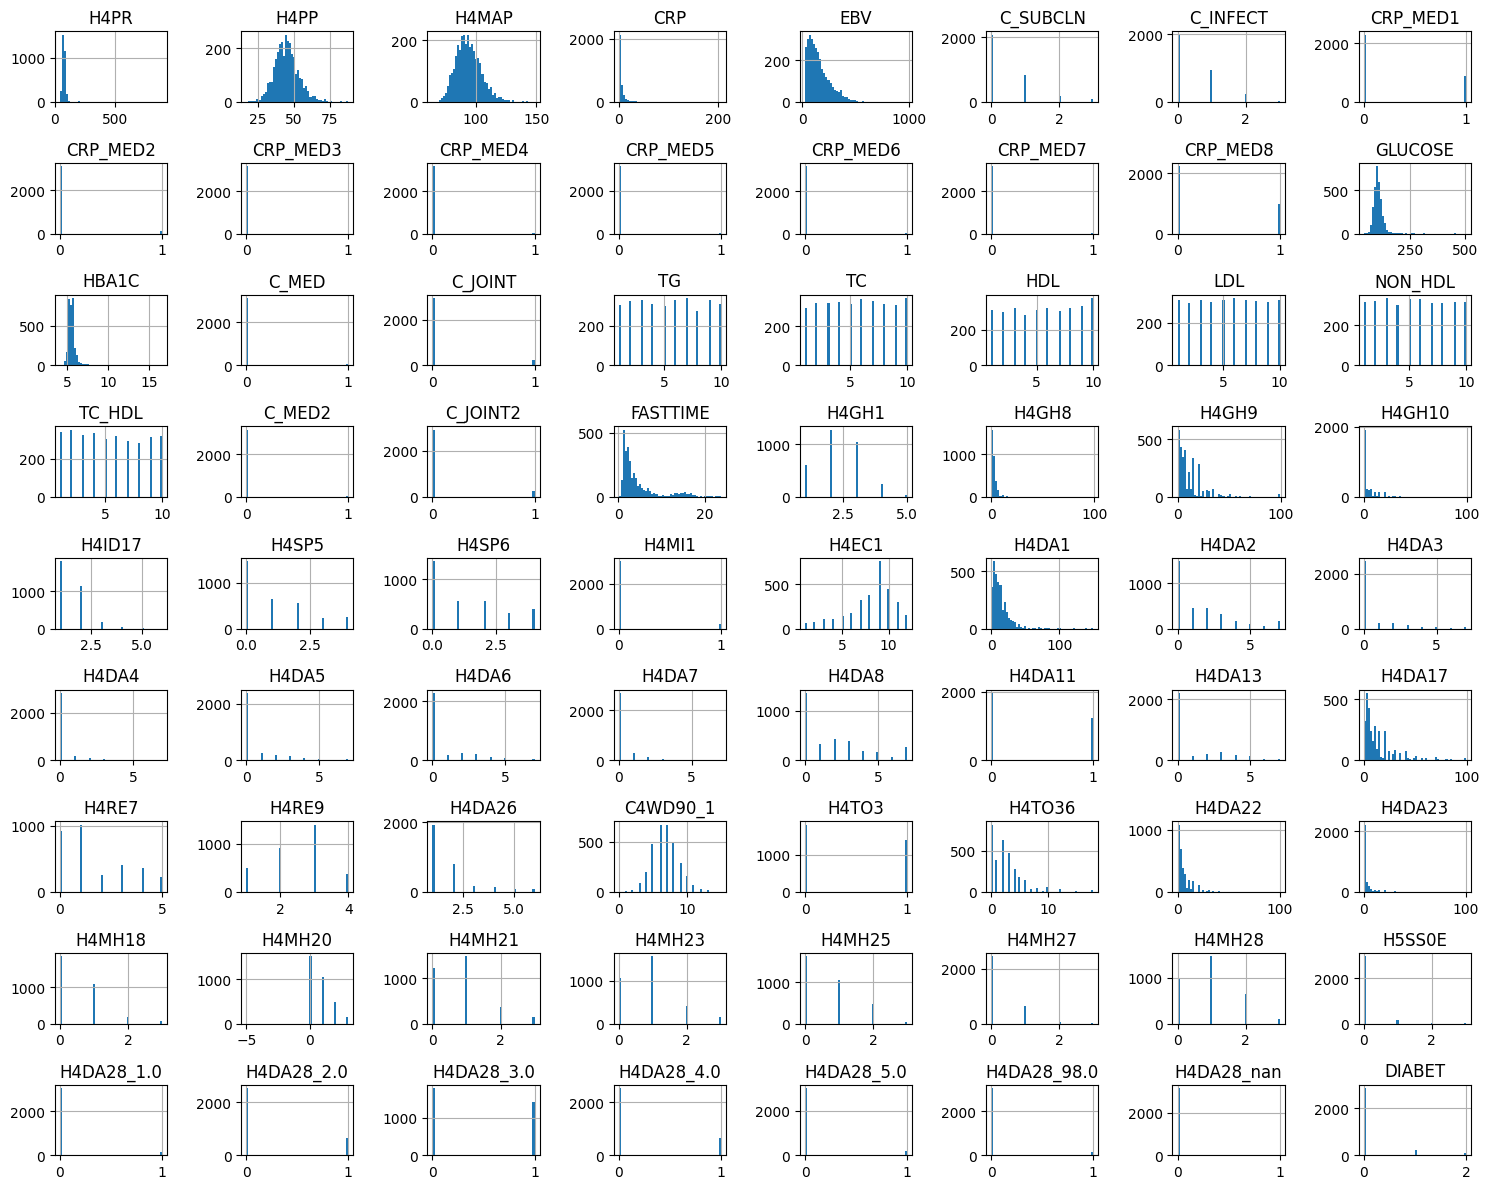

In [9]:

X.hist(bins=50, figsize=(15,12))
plt.tight_layout()
plt.show


#### linearity and multicollinearity VIF and Correlation Matrix

In [ ]:
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

print("Columns in X:\n", X.columns)
#useless, to many variables lol
#scatter_matrix(X, figsize = (15,12))
#plt.show()

# Convert X_train back to a DataFrame with variable names
X_df = pd.DataFrame(X, columns=X.columns)


#Correleation matrix
corr_matrix = X_df.corr()
print(corr_matrix)

#### X_train analysis

In [ ]:
X_train_reduced.shape
X_train.shape

#### Shape of all dataframes before merging + Merged data frame shape and number of rows that contain null entries in merged dataframe (should be 0 after datacleaning)

In [ ]:
#print(merged_df.dtypes)  # Verify data types of each column
print("data frame shapes before merging")
for df in dataframes: # check shape for each dataframe
    print(df.shape)
# check shape for each merged dataframe
print("Merged data frame shape:", merged_df.shape)
#check number of rows with null entires in merged dataframe
print("Number of rows that have at least one null entry:", merged_df.isnull().any(axis=1).sum())
#Check which variables are have Null
print("Variables with null entries:")
print(merged_df.loc[:, merged_df.isnull().any()])

#### Print merged_df to tsv file

In [ ]:
#printdata
merged_df.to_csv("merged_df.tsv", sep='\t', index=True)

#### Print X and y to tsv file

In [ ]:
#printdata
X.to_csv("merged_df.tsv", sep='\t', index=True)
y.to_csv("merged_df.tsv", sep='\t', index=True)

#### Check spread for response variable

In [10]:
print(merged_df['y'].value_counts())

y
 0.00    789
 0.25    569
-0.25    455
 0.50    341
-0.50    246
 0.75    164
-0.75    157
 1.00    101
-1.00     92
 1.25     64
-1.25     54
 1.50     32
 1.75     28
-1.50     24
 2.00     18
 2.25     14
-1.75     13
-2.00     10
-2.25      6
 2.50      6
-2.50      4
 2.75      4
-2.75      1
 3.00      1
Name: count, dtype: int64


#### Display merged dataframe

In [ ]:
display(merged_df)
print(merged_df.shape)
display(X)
print(X.shape)

#### Print name of collumns in merged dataframe

In [ ]:
#prints variables
print(merged_df.columns)

#### Print stats summary for X

In [ ]:
#prints stats summary
print("stats for X:")
print(X.describe())